In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import h5py
import cv2
import os
import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.preprocessing import image as keras_image
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.metrics import top_k_categorical_accuracy, categorical_accuracy

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras.layers import Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D


Using TensorFlow backend.


In [3]:
# Plot the Neural network fitting history
def history_plot(fit_history, n):
    plt.figure(figsize=(18, 12))
    
    plt.subplot(211)
    plt.plot(fit_history.history['loss'][n:], color='slategray', label = 'train')
    plt.plot(fit_history.history['val_loss'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title('Loss Function');  
    
    plt.subplot(212)
    plt.plot(fit_history.history['categorical_accuracy'][n:], color='slategray', label = 'train')
    plt.plot(fit_history.history['val_categorical_accuracy'][n:], color='#4876ff', label = 'valid')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")    
    plt.legend()
    plt.title('Accuracy');


In [4]:
# Hello man
i = 0

data = []
label = []

for (dirname, dirs, files) in os.walk('./small_num/resized'):
    i += 1
    if dirname == './small_num/resized':
        continue
    k = 0
    for filename in files:
        if filename.endswith('.png') :
            k += 1
            path = dirname + '/' + filename
            print(path)
            img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
            img = img[:, :, np.newaxis]
            tar = dirname[-2:]
            data.append(img)
            label.append(tar)


./small_num/resized/03/03_95.png
./small_num/resized/03/03_774.png
./small_num/resized/03/03_760.png
./small_num/resized/03/03_81.png
./small_num/resized/03/03_990.png
./small_num/resized/03/03_748.png
./small_num/resized/03/03_1492.png
./small_num/resized/03/03_1486.png
./small_num/resized/03/03_984.png
./small_num/resized/03/03_2602.png
./small_num/resized/03/03_2164.png
./small_num/resized/03/03_56.png
./small_num/resized/03/03_42.png
./small_num/resized/03/03_1479.png
./small_num/resized/03/03_2170.png
./small_num/resized/03/03_2616.png
./small_num/resized/03/03_1337.png
./small_num/resized/03/03_1451.png
./small_num/resized/03/03_2158.png
./small_num/resized/03/03_953.png
./small_num/resized/03/03_947.png
./small_num/resized/03/03_1445.png
./small_num/resized/03/03_1323.png
./small_num/resized/03/03_576.png
./small_num/resized/03/03_1874.png
./small_num/resized/03/03_210.png
./small_num/resized/03/03_204.png
./small_num/resized/03/03_1860.png
./small_num/resized/03/03_562.png
./sm

./small_num/resized/03/03_164.png
./small_num/resized/03/03_170.png
./small_num/resized/03/03_616.png
./small_num/resized/03/03_399.png
./small_num/resized/03/03_1043.png
./small_num/resized/03/03_1725.png
./small_num/resized/03/03_2238.png
./small_num/resized/03/03_1731.png
./small_num/resized/03/03_1057.png
./small_num/resized/03/03_2576.png
./small_num/resized/03/03_2210.png
./small_num/resized/03/03_1719.png
./small_num/resized/03/03_2204.png
./small_num/resized/03/03_2562.png
./small_num/resized/03/03_1080.png
./small_num/resized/03/03_2589.png
./small_num/resized/03/03_428.png
./small_num/resized/03/03_1094.png
./small_num/resized/03/03_366.png
./small_num/resized/03/03_1902.png
./small_num/resized/03/03_400.png
./small_num/resized/03/03_414.png
./small_num/resized/03/03_1916.png
./small_num/resized/03/03_372.png
./small_num/resized/03/03_1137.png
./small_num/resized/03/03_1889.png
./small_num/resized/03/03_1651.png
./small_num/resized/03/03_2358.png
./small_num/resized/03/03_164

./small_num/resized/03/03_9.png
./small_num/resized/03/03_1656.png
./small_num/resized/03/03_1642.png
./small_num/resized/03/03_598.png
./small_num/resized/03/03_1124.png
./small_num/resized/03/03_2405.png
./small_num/resized/03/03_2363.png
./small_num/resized/03/03_2377.png
./small_num/resized/03/03_1118.png
./small_num/resized/03/03_2411.png
./small_num/resized/03/03_1087.png
./small_num/resized/03/03_1939.png
./small_num/resized/03/03_1093.png
./small_num/resized/03/03_349.png
./small_num/resized/03/03_361.png
./small_num/resized/03/03_407.png
./small_num/resized/03/03_1905.png
./small_num/resized/03/03_1911.png
./small_num/resized/03/03_413.png
./small_num/resized/03/03_375.png
./small_num/resized/03/03_1044.png
./small_num/resized/03/03_1722.png
./small_num/resized/03/03_1736.png
./small_num/resized/03/03_2559.png
./small_num/resized/03/03_1050.png
./small_num/resized/03/03_2571.png
./small_num/resized/03/03_1078.png
./small_num/resized/03/03_2217.png
./small_num/resized/03/03_220

./small_num/resized/03/03_1194.png
./small_num/resized/03/03_528.png
./small_num/resized/03/03_1802.png
./small_num/resized/03/03_500.png
./small_num/resized/03/03_266.png
./small_num/resized/03/03_272.png
./small_num/resized/03/03_514.png
./small_num/resized/03/03_1816.png
./small_num/resized/03/03_1341.png
./small_num/resized/03/03_2648.png
./small_num/resized/03/03_925.png
./small_num/resized/03/03_1427.png
./small_num/resized/03/03_1433.png
./small_num/resized/03/03_931.png
./small_num/resized/03/03_1355.png
./small_num/resized/03/03_2674.png
./small_num/resized/03/03_20.png
./small_num/resized/03/03_919.png
./small_num/resized/03/03_2112.png
./small_num/resized/03/03_2106.png
./small_num/resized/03/03_34.png
./small_num/resized/03/03_1369.png
./small_num/resized/03/03_2660.png
./small_num/resized/03/03_1382.png
./small_num/resized/03/03_1396.png
./small_num/resized/03/03_702.png
./small_num/resized/03/03_716.png
./small_num/resized/03/03_700.png
./small_num/resized/03/03_714.png
.

./small_num/resized/03/03_659.png
./small_num/resized/03/03_881.png
./small_num/resized/03/03_117.png
./small_num/resized/03/03_671.png
./small_num/resized/03/03_665.png
./small_num/resized/03/03_103.png
./small_num/resized/03/03_1232.png
./small_num/resized/03/03_1554.png
./small_num/resized/03/03_856.png
./small_num/resized/03/03_842.png
./small_num/resized/03/03_2049.png
./small_num/resized/03/03_1540.png
./small_num/resized/03/03_1226.png
./small_num/resized/03/03_2707.png
./small_num/resized/03/03_2061.png
./small_num/resized/03/03_1568.png
./small_num/resized/03/03_2075.png
./small_num/resized/03/03_2713.png
./small_num/resized/03/03_2074.png
./small_num/resized/03/03_2712.png
./small_num/resized/03/03_2706.png
./small_num/resized/03/03_1569.png
./small_num/resized/03/03_2060.png
./small_num/resized/03/03_1541.png
./small_num/resized/03/03_2048.png
./small_num/resized/03/03_843.png
./small_num/resized/03/03_1227.png
./small_num/resized/03/03_1233.png
./small_num/resized/03/03_857

./small_num/resized/03/03_28.png
./small_num/resized/03/03_1413.png
./small_num/resized/03/03_911.png
./small_num/resized/03/03_1375.png
./small_num/resized/03/03_1361.png
./small_num/resized/03/03_2668.png
./small_num/resized/03/03_905.png
./small_num/resized/03/03_1407.png
./small_num/resized/03/03_1188.png
./small_num/resized/03/03_2481.png
./small_num/resized/03/03_252.png
./small_num/resized/03/03_534.png
./small_num/resized/03/03_1836.png
./small_num/resized/03/03_1822.png
./small_num/resized/03/03_520.png
./small_num/resized/03/03_246.png
./small_num/resized/03/03_2495.png
./small_num/resized/03/03_508.png
./small_num/resized/03/03_291.png
./small_num/resized/03/03_2442.png
./small_num/resized/03/03_2324.png
./small_num/resized/03/03_2330.png
./small_num/resized/03/03_1639.png
./small_num/resized/03/03_2456.png
./small_num/resized/03/03_285.png
./small_num/resized/03/03_1177.png
./small_num/resized/03/03_2318.png
./small_num/resized/03/03_1611.png
./small_num/resized/03/03_1605.

./small_num/resized/03/03_2044.png
./small_num/resized/03/03_2722.png
./small_num/resized/03/03_668.png
./small_num/resized/03/03_126.png
./small_num/resized/03/03_898.png
./small_num/resized/03/03_640.png
./small_num/resized/03/03_2093.png
./small_num/resized/03/03_2087.png
./small_num/resized/03/03_654.png
./small_num/resized/03/03_132.png
./small_num/resized/03/03_1767.png
./small_num/resized/03/03_2508.png
./small_num/resized/03/03_1001.png
./small_num/resized/03/03_1015.png
./small_num/resized/03/03_1773.png
./small_num/resized/03/03_481.png
./small_num/resized/03/03_2252.png
./small_num/resized/03/03_1983.png
./small_num/resized/03/03_2534.png
./small_num/resized/03/03_2520.png
./small_num/resized/03/03_1029.png
./small_num/resized/03/03_1997.png
./small_num/resized/03/03_2246.png
./small_num/resized/03/03_495.png
./small_num/resized/03/03_318.png
./small_num/resized/03/03_1968.png
./small_num/resized/03/03_1940.png
./small_num/resized/03/03_1798.png
./small_num/resized/03/03_229

./small_num/resized/03/03_2296.png
./small_num/resized/03/03_445.png
./small_num/resized/03/03_1947.png
./small_num/resized/03/03_323.png
./small_num/resized/03/03_337.png
./small_num/resized/03/03_1953.png
./small_num/resized/03/03_451.png
./small_num/resized/03/03_2282.png
./small_num/resized/03/03_2269.png
./small_num/resized/03/03_1760.png
./small_num/resized/03/03_1006.png
./small_num/resized/03/03_1012.png
./small_num/resized/03/03_1774.png
./small_num/resized/03/03_1984.png
./small_num/resized/03/03_486.png
./small_num/resized/03/03_2255.png
./small_num/resized/03/03_2533.png
./small_num/resized/03/03_2527.png
./small_num/resized/03/03_2241.png
./small_num/resized/03/03_492.png
./small_num/resized/03/03_1990.png
./small_num/resized/03/03_1748.png
./small_num/resized/03/03_109.png
./small_num/resized/03/03_121.png
./small_num/resized/03/03_647.png
./small_num/resized/03/03_2094.png
./small_num/resized/03/03_2080.png
./small_num/resized/03/03_653.png
./small_num/resized/03/03_1589

./small_num/resized/03/03_1883.png
./small_num/resized/03/03_1897.png
./small_num/resized/03/03_2346.png
./small_num/resized/03/03_595.png
./small_num/resized/03/03_2420.png
./small_num/resized/03/03_1129.png
./small_num/resized/03/03_218.png
./small_num/resized/03/03_1868.png
./small_num/resized/03/03_224.png
./small_num/resized/03/03_1698.png
./small_num/resized/03/03_1840.png
./small_num/resized/03/03_2391.png
./small_num/resized/03/03_542.png
./small_num/resized/03/03_556.png
./small_num/resized/03/03_2385.png
./small_num/resized/03/03_1854.png
./small_num/resized/03/03_230.png
./small_num/resized/03/03_967.png
./small_num/resized/03/03_1465.png
./small_num/resized/03/03_1303.png
./small_num/resized/03/03_1317.png
./small_num/resized/03/03_1471.png
./small_num/resized/03/03_973.png
./small_num/resized/03/03_2178.png
./small_num/resized/03/03_1459.png
./small_num/resized/03/03_62.png
./small_num/resized/03/03_2150.png
./small_num/resized/03/03_783.png
./small_num/resized/03/03_2636.

./small_num/resized/03/03_1270.png
./small_num/resized/03/03_1264.png
./small_num/resized/03/03_800.png
./small_num/resized/03/03_1502.png
./small_num/resized/03/03_828.png
./small_num/resized/03/03_2023.png
./small_num/resized/03/03_196.png
./small_num/resized/03/03_182.png
./small_num/resized/03/03_1258.png
./small_num/resized/03/03_2037.png
./small_num/resized/03/03_1259.png
./small_num/resized/03/03_183.png
./small_num/resized/03/03_2036.png
./small_num/resized/03/03_2022.png
./small_num/resized/03/03_829.png
./small_num/resized/03/03_197.png
./small_num/resized/03/03_2744.png
./small_num/resized/03/03_1265.png
./small_num/resized/03/03_1503.png
./small_num/resized/03/03_801.png
./small_num/resized/03/03_815.png
./small_num/resized/03/03_1517.png
./small_num/resized/03/03_1271.png
./small_num/resized/03/03_140.png
./small_num/resized/03/03_626.png
./small_num/resized/03/03_632.png
./small_num/resized/03/03_154.png
./small_num/resized/03/03_168.png
./small_num/resized/03/03_2234.png

./small_num/resized/03/03_2169.png
./small_num/resized/03/03_1460.png
./small_num/resized/03/03_1474.png
./small_num/resized/03/03_976.png
./small_num/resized/03/03_1312.png
./small_num/resized/03/03_2196.png
./small_num/resized/03/03_745.png
./small_num/resized/03/03_751.png
./small_num/resized/03/03_2182.png
./small_num/resized/03/03_989.png
./small_num/resized/03/03_98.png
./small_num/resized/03/03_779.png
./small_num/resized/04/04_1839.png
./small_num/resized/04/04_1187.png
./small_num/resized/04/04_293.png
./small_num/resized/04/04_287.png
./small_num/resized/04/04_1193.png
./small_num/resized/04/04_88.png
./small_num/resized/04/04_1805.png
./small_num/resized/04/04_1811.png
./small_num/resized/04/04_1622.png
./small_num/resized/04/04_536.png
./small_num/resized/04/04_250.png
./small_num/resized/04/04_1144.png
./small_num/resized/04/04_1150.png
./small_num/resized/04/04_2459.png
./small_num/resized/04/04_244.png
./small_num/resized/04/04_522.png
./small_num/resized/04/04_1636.png


./small_num/resized/04/04_327.png
./small_num/resized/04/04_1033.png
./small_num/resized/04/04_1755.png
./small_num/resized/04/04_441.png
./small_num/resized/04/04_2274.png
./small_num/resized/04/04_469.png
./small_num/resized/04/04_2512.png
./small_num/resized/04/04_2506.png
./small_num/resized/04/04_2260.png
./small_num/resized/04/04_1769.png
./small_num/resized/04/04_2507.png
./small_num/resized/04/04_1768.png
./small_num/resized/04/04_2261.png
./small_num/resized/04/04_2275.png
./small_num/resized/04/04_468.png
./small_num/resized/04/04_2513.png
./small_num/resized/04/04_1032.png
./small_num/resized/04/04_326.png
./small_num/resized/04/04_440.png
./small_num/resized/04/04_1754.png
./small_num/resized/04/04_1998.png
./small_num/resized/04/04_1740.png
./small_num/resized/04/04_2249.png
./small_num/resized/04/04_454.png
./small_num/resized/04/04_332.png
./small_num/resized/04/04_1026.png
./small_num/resized/04/04_1973.png
./small_num/resized/04/04_1967.png
./small_num/resized/04/04_17

./small_num/resized/04/04_72.png
./small_num/resized/04/04_2306.png
./small_num/resized/04/04_2460.png
./small_num/resized/04/04_1169.png
./small_num/resized/04/04_2448.png
./small_num/resized/04/04_255.png
./small_num/resized/04/04_1141.png
./small_num/resized/04/04_1627.png
./small_num/resized/04/04_533.png
./small_num/resized/04/04_527.png
./small_num/resized/04/04_1633.png
./small_num/resized/04/04_1155.png
./small_num/resized/04/04_241.png
./small_num/resized/04/04_916.png
./small_num/resized/04/04_902.png
./small_num/resized/04/04_1380.png
./small_num/resized/04/04_1394.png
./small_num/resized/04/04_1419.png
./small_num/resized/04/04_2110.png
./small_num/resized/04/04_2676.png
./small_num/resized/04/04_2662.png
./small_num/resized/04/04_2104.png
./small_num/resized/04/04_719.png
./small_num/resized/04/04_731.png
./small_num/resized/04/04_1425.png
./small_num/resized/04/04_1343.png
./small_num/resized/04/04_1357.png
./small_num/resized/04/04_1431.png
./small_num/resized/04/04_2138

./small_num/resized/04/04_1047.png
./small_num/resized/04/04_2566.png
./small_num/resized/04/04_1709.png
./small_num/resized/04/04_2200.png
./small_num/resized/04/04_2214.png
./small_num/resized/04/04_409.png
./small_num/resized/04/04_2572.png
./small_num/resized/04/04_2215.png
./small_num/resized/04/04_408.png
./small_num/resized/04/04_2573.png
./small_num/resized/04/04_2567.png
./small_num/resized/04/04_2201.png
./small_num/resized/04/04_1708.png
./small_num/resized/04/04_2229.png
./small_num/resized/04/04_434.png
./small_num/resized/04/04_1720.png
./small_num/resized/04/04_1046.png
./small_num/resized/04/04_352.png
./small_num/resized/04/04_346.png
./small_num/resized/04/04_1052.png
./small_num/resized/04/04_1734.png
./small_num/resized/04/04_420.png
./small_num/resized/04/04_1907.png
./small_num/resized/04/04_1913.png
./small_num/resized/04/04_391.png
./small_num/resized/04/04_1085.png
./small_num/resized/04/04_1091.png
./small_num/resized/04/04_2598.png
./small_num/resized/04/04_3

./small_num/resized/04/04_580.png
./small_num/resized/04/04_1874.png
./small_num/resized/04/04_1860.png
./small_num/resized/04/04_2399.png
./small_num/resized/04/04_584.png
./small_num/resized/04/04_1690.png
./small_num/resized/04/04_1848.png
./small_num/resized/04/04_1684.png
./small_num/resized/04/04_590.png
./small_num/resized/04/04_2366.png
./small_num/resized/04/04_12.png
./small_num/resized/04/04_1109.png
./small_num/resized/04/04_2400.png
./small_num/resized/04/04_2414.png
./small_num/resized/04/04_209.png
./small_num/resized/04/04_2372.png
./small_num/resized/04/04_1653.png
./small_num/resized/04/04_547.png
./small_num/resized/04/04_221.png
./small_num/resized/04/04_1135.png
./small_num/resized/04/04_1121.png
./small_num/resized/04/04_2428.png
./small_num/resized/04/04_235.png
./small_num/resized/04/04_553.png
./small_num/resized/04/04_1647.png
./small_num/resized/04/04_962.png
./small_num/resized/04/04_976.png
./small_num/resized/04/04_1492.png
./small_num/resized/04/04_786.pn

./small_num/resized/04/04_627.png
./small_num/resized/04/04_1533.png
./small_num/resized/04/04_2012.png
./small_num/resized/04/04_169.png
./small_num/resized/04/04_1269.png
./small_num/resized/04/04_2006.png
./small_num/resized/04/04_828.png
./small_num/resized/04/04_1282.png
./small_num/resized/04/04_196.png
./small_num/resized/04/04_182.png
./small_num/resized/04/04_1296.png
./small_num/resized/04/04_814.png
./small_num/resized/04/04_800.png
./small_num/resized/04/04_1453.png
./small_num/resized/04/04_747.png
./small_num/resized/04/04_1335.png
./small_num/resized/04/04_1321.png
./small_num/resized/04/04_2628.png
./small_num/resized/04/04_753.png
./small_num/resized/04/04_1447.png
./small_num/resized/04/04_2166.png
./small_num/resized/04/04_1309.png
./small_num/resized/04/04_2600.png
./small_num/resized/04/04_2614.png
./small_num/resized/04/04_2172.png
./small_num/resized/04/04_2199.png
./small_num/resized/04/04_784.png
./small_num/resized/04/04_1490.png
./small_num/resized/04/04_1484

./small_num/resized/04/04_359.png
./small_num/resized/04/04_2544.png
./small_num/resized/04/04_2223.png
./small_num/resized/04/04_358.png
./small_num/resized/04/04_2545.png
./small_num/resized/04/04_1058.png
./small_num/resized/04/04_2551.png
./small_num/resized/04/04_2237.png
./small_num/resized/04/04_402.png
./small_num/resized/04/04_1716.png
./small_num/resized/04/04_1070.png
./small_num/resized/04/04_364.png
./small_num/resized/04/04_2579.png
./small_num/resized/04/04_370.png
./small_num/resized/04/04_1064.png
./small_num/resized/04/04_1702.png
./small_num/resized/04/04_416.png
./small_num/resized/04/04_1931.png
./small_num/resized/04/04_2586.png
./small_num/resized/04/04_2592.png
./small_num/resized/04/04_1925.png
./small_num/resized/04/04_1919.png
./small_num/resized/04/04_2021.png
./small_num/resized/04/04_1528.png
./small_num/resized/04/04_628.png
./small_num/resized/04/04_2035.png
./small_num/resized/04/04_166.png
./small_num/resized/04/04_1272.png
./small_num/resized/04/04_15

./small_num/resized/04/04_2385.png
./small_num/resized/04/04_1842.png
./small_num/resized/04/04_2393.png
./small_num/resized/04/04_2387.png
./small_num/resized/04/04_1856.png
./small_num/resized/04/04_2350.png
./small_num/resized/04/04_1881.png
./small_num/resized/04/04_24.png
./small_num/resized/04/04_1659.png
./small_num/resized/04/04_2436.png
./small_num/resized/04/04_2422.png
./small_num/resized/04/04_1895.png
./small_num/resized/04/04_30.png
./small_num/resized/04/04_559.png
./small_num/resized/04/04_2344.png
./small_num/resized/04/04_18.png
./small_num/resized/04/04_1665.png
./small_num/resized/04/04_571.png
./small_num/resized/04/04_217.png
./small_num/resized/04/04_1103.png
./small_num/resized/04/04_1117.png
./small_num/resized/04/04_203.png
./small_num/resized/04/04_565.png
./small_num/resized/04/04_2378.png
./small_num/resized/04/04_1671.png
./small_num/resized/04/04_2191.png
./small_num/resized/04/04_954.png
./small_num/resized/04/04_1498.png
./small_num/resized/04/04_798.pn

./small_num/resized/04/04_2055.png
./small_num/resized/04/04_1548.png
./small_num/resized/04/04_884.png
./small_num/resized/04/04_2041.png
./small_num/resized/04/04_1560.png
./small_num/resized/04/04_674.png
./small_num/resized/04/04_2069.png
./small_num/resized/04/04_112.png
./small_num/resized/04/04_1206.png
./small_num/resized/04/04_1212.png
./small_num/resized/04/04_106.png
./small_num/resized/04/04_660.png
./small_num/resized/04/04_1574.png
./small_num/resized/04/04_2096.png
./small_num/resized/04/04_853.png
./small_num/resized/04/04_2082.png
./small_num/resized/04/04_847.png
./small_num/resized/04/04_2121.png
./small_num/resized/04/04_1428.png
./small_num/resized/04/04_2647.png
./small_num/resized/04/04_2653.png
./small_num/resized/04/04_728.png
./small_num/resized/04/04_2135.png
./small_num/resized/04/04_1414.png
./small_num/resized/04/04_700.png
./small_num/resized/04/04_1372.png
./small_num/resized/04/04_1366.png
./small_num/resized/04/04_714.png
./small_num/resized/04/04_2109

./small_num/resized/04/04_698.png
./small_num/resized/04/04_2085.png
./small_num/resized/04/04_868.png
./small_num/resized/04/04_2052.png
./small_num/resized/04/04_897.png
./small_num/resized/04/04_129.png
./small_num/resized/04/04_1229.png
./small_num/resized/04/04_2046.png
./small_num/resized/04/04_883.png
./small_num/resized/04/04_673.png
./small_num/resized/04/04_1567.png
./small_num/resized/04/04_1201.png
./small_num/resized/04/04_115.png
./small_num/resized/04/04_101.png
./small_num/resized/04/04_1215.png
./small_num/resized/04/04_1573.png
./small_num/resized/04/04_667.png
./small_num/resized/04/04_1942.png
./small_num/resized/04/04_2293.png
./small_num/resized/04/04_2287.png
./small_num/resized/04/04_1956.png
./small_num/resized/04/04_2536.png
./small_num/resized/04/04_2250.png
./small_num/resized/04/04_1759.png
./small_num/resized/04/04_1981.png
./small_num/resized/04/04_1995.png
./small_num/resized/04/04_459.png
./small_num/resized/04/04_2244.png
./small_num/resized/04/04_2522

./small_num/resized/04/04_1607.png
./small_num/resized/04/04_513.png
./small_num/resized/04/04_52.png
./small_num/resized/04/04_2326.png
./small_num/resized/04/04_2440.png
./small_num/resized/04/04_1149.png
./small_num/resized/04/04_249.png
./small_num/resized/04/04_2454.png
./small_num/resized/04/04_2332.png
./small_num/resized/04/04_46.png
./small_num/resized/04/04_1808.png
./small_num/resized/04/04_1834.png
./small_num/resized/04/04_91.png
./small_num/resized/04/04_2483.png
./small_num/resized/04/04_2497.png
./small_num/resized/04/04_1820.png
./small_num/resized/04/04_85.png
./small_num/resized/32/32_3925.png
./small_num/resized/32/32_4092.png
./small_num/resized/32/32_2385.png
./small_num/resized/32/32_1854.png
./small_num/resized/32/32_1698.png
./small_num/resized/32/32_1840.png
./small_num/resized/32/32_2391.png
./small_num/resized/32/32_4938.png
./small_num/resized/32/32_3931.png
./small_num/resized/32/32_4086.png
./small_num/resized/32/32_3919.png
./small_num/resized/32/32_1868

./small_num/resized/32/32_4246.png
./small_num/resized/32/32_5158.png
./small_num/resized/32/32_2637.png
./small_num/resized/32/32_2151.png
./small_num/resized/32/32_4520.png
./small_num/resized/32/32_1458.png
./small_num/resized/32/32_2145.png
./small_num/resized/32/32_4534.png
./small_num/resized/32/32_88.png
./small_num/resized/32/32_4252.png
./small_num/resized/32/32_2623.png
./small_num/resized/32/32_2810.png
./small_num/resized/32/32_63.png
./small_num/resized/32/32_77.png
./small_num/resized/32/32_938.png
./small_num/resized/32/32_2804.png
./small_num/resized/32/32_910.png
./small_num/resized/32/32_4285.png
./small_num/resized/32/32_2192.png
./small_num/resized/32/32_3298.png
./small_num/resized/32/32_2186.png
./small_num/resized/32/32_904.png
./small_num/resized/32/32_2838.png
./small_num/resized/32/32_4291.png
./small_num/resized/32/32_3071.png
./small_num/resized/32/32_253.png
./small_num/resized/32/32_1666.png
./small_num/resized/32/32_1100.png
./small_num/resized/32/32_2409

./small_num/resized/32/32_324.png
./small_num/resized/32/32_4669.png
./small_num/resized/32/32_3106.png
./small_num/resized/32/32_1711.png
./small_num/resized/32/32_2230.png
./small_num/resized/32/32_4899.png
./small_num/resized/32/32_4641.png
./small_num/resized/32/32_1739.png
./small_num/resized/32/32_3648.png
./small_num/resized/32/32_4127.png
./small_num/resized/32/32_3890.png
./small_num/resized/32/32_5239.png
./small_num/resized/32/32_2556.png
./small_num/resized/32/32_4133.png
./small_num/resized/32/32_3884.png
./small_num/resized/32/32_2542.png
./small_num/resized/32/32_2224.png
./small_num/resized/32/32_318.png
./small_num/resized/32/32_4655.png
./small_num/resized/32/32_4866.png
./small_num/resized/32/32_495.png
./small_num/resized/32/32_481.png
./small_num/resized/32/32_4872.png
./small_num/resized/32/32_1922.png
./small_num/resized/32/32_4682.png
./small_num/resized/32/32_3853.png
./small_num/resized/32/32_2595.png
./small_num/resized/32/32_1088.png
./small_num/resized/32/3

./small_num/resized/32/32_446.png
./small_num/resized/32/32_5215.png
./small_num/resized/32/32_3664.png
./small_num/resized/32/32_7.png
./small_num/resized/32/32_1073.png
./small_num/resized/32/32_1067.png
./small_num/resized/32/32_5201.png
./small_num/resized/32/32_452.png
./small_num/resized/32/32_3670.png
./small_num/resized/32/32_4679.png
./small_num/resized/32/32_3116.png
./small_num/resized/32/32_2208.png
./small_num/resized/32/32_334.png
./small_num/resized/32/32_1701.png
./small_num/resized/32/32_4651.png
./small_num/resized/32/32_4889.png
./small_num/resized/32/32_2220.png
./small_num/resized/32/32_1729.png
./small_num/resized/32/32_5229.png
./small_num/resized/32/32_3880.png
./small_num/resized/32/32_2546.png
./small_num/resized/32/32_3658.png
./small_num/resized/32/32_4137.png
./small_num/resized/32/32_3894.png
./small_num/resized/32/32_2552.png
./small_num/resized/32/32_4123.png
./small_num/resized/32/32_4645.png
./small_num/resized/32/32_2234.png
./small_num/resized/32/32_

./small_num/resized/32/32_2828.png
./small_num/resized/32/32_727.png
./small_num/resized/32/32_5174.png
./small_num/resized/32/32_3505.png
./small_num/resized/32/32_1312.png
./small_num/resized/32/32_1474.png
./small_num/resized/32/32_3263.png
./small_num/resized/32/32_4518.png
./small_num/resized/32/32_3277.png
./small_num/resized/32/32_2169.png
./small_num/resized/32/32_1460.png
./small_num/resized/32/32_1306.png
./small_num/resized/32/32_5160.png
./small_num/resized/32/32_733.png
./small_num/resized/32/32_3511.png
./small_num/resized/32/32_5148.png
./small_num/resized/32/32_2627.png
./small_num/resized/32/32_3539.png
./small_num/resized/32/32_4256.png
./small_num/resized/32/32_4530.png
./small_num/resized/32/32_2141.png
./small_num/resized/32/32_1448.png
./small_num/resized/32/32_4524.png
./small_num/resized/32/32_98.png
./small_num/resized/32/32_2155.png
./small_num/resized/32/32_2633.png
./small_num/resized/32/32_4242.png
./small_num/resized/32/32_690.png
./small_num/resized/32/32

./small_num/resized/32/32_3074.png
./small_num/resized/32/32_256.png
./small_num/resized/32/32_1663.png
./small_num/resized/32/32_1677.png
./small_num/resized/32/32_3060.png
./small_num/resized/32/32_242.png
./small_num/resized/32/32_524.png
./small_num/resized/32/32_2418.png
./small_num/resized/32/32_3706.png
./small_num/resized/32/32_4069.png
./small_num/resized/32/32_1111.png
./small_num/resized/32/32_4082.png
./small_num/resized/32/32_3935.png
./small_num/resized/32/32_2395.png
./small_num/resized/32/32_1844.png
./small_num/resized/32/32_1850.png
./small_num/resized/32/32_1688.png
./small_num/resized/32/32_4928.png
./small_num/resized/32/32_2381.png
./small_num/resized/32/32_4096.png
./small_num/resized/32/32_3921.png
./small_num/resized/32/32_3909.png
./small_num/resized/32/32_1878.png
./small_num/resized/32/32_4900.png
./small_num/resized/32/32_295.png
./small_num/resized/32/32_4914.png
./small_num/resized/32/32_281.png
./small_num/resized/32/32_1837.png
./small_num/resized/32/32

./small_num/resized/32/32_3953.png
./small_num/resized/32/32_1822.png
./small_num/resized/32/32_4782.png
./small_num/resized/32/32_4796.png
./small_num/resized/32/32_1836.png
./small_num/resized/32/32_1188.png
./small_num/resized/32/32_2481.png
./small_num/resized/32/32_3947.png
./small_num/resized/32/32_4780.png
./small_num/resized/32/32_4958.png
./small_num/resized/32/32_1820.png
./small_num/resized/32/32_3951.png
./small_num/resized/32/32_2497.png
./small_num/resized/32/32_3789.png
./small_num/resized/32/32_3945.png
./small_num/resized/32/32_2483.png
./small_num/resized/32/32_1834.png
./small_num/resized/32/32_4794.png
./small_num/resized/32/32_4964.png
./small_num/resized/32/32_597.png
./small_num/resized/32/32_583.png
./small_num/resized/32/32_3979.png
./small_num/resized/32/32_4970.png
./small_num/resized/32/32_1808.png
./small_num/resized/32/32_2332.png
./small_num/resized/32/32_4743.png
./small_num/resized/32/32_4025.png
./small_num/resized/32/32_3992.png
./small_num/resized/32

./small_num/resized/32/32_227.png
./small_num/resized/32/32_1612.png
./small_num/resized/32/32_1606.png
./small_num/resized/32/32_3011.png
./small_num/resized/32/32_233.png
./small_num/resized/32/32_2469.png
./small_num/resized/32/32_5306.png
./small_num/resized/32/32_555.png
./small_num/resized/32/32_4018.png
./small_num/resized/32/32_3777.png
./small_num/resized/32/32_1160.png
./small_num/resized/32/32_2441.png
./small_num/resized/32/32_3987.png
./small_num/resized/32/32_4030.png
./small_num/resized/32/32_1148.png
./small_num/resized/32/32_3039.png
./small_num/resized/32/32_4756.png
./small_num/resized/32/32_2327.png
./small_num/resized/32/32_4742.png
./small_num/resized/32/32_2333.png
./small_num/resized/32/32_2455.png
./small_num/resized/32/32_569.png
./small_num/resized/32/32_3993.png
./small_num/resized/32/32_4024.png
./small_num/resized/32/32_3978.png
./small_num/resized/32/32_582.png
./small_num/resized/32/32_1809.png
./small_num/resized/32/32_4971.png
./small_num/resized/32/32

./small_num/resized/32/32_168.png
./small_num/resized/32/32_1549.png
./small_num/resized/32/32_4431.png
./small_num/resized/32/32_2040.png
./small_num/resized/32/32_5049.png
./small_num/resized/32/32_2726.png
./small_num/resized/32/32_3438.png
./small_num/resized/32/32_4357.png
./small_num/resized/32/32_632.png
./small_num/resized/32/32_5061.png
./small_num/resized/32/32_3410.png
./small_num/resized/32/32_1207.png
./small_num/resized/32/32_1561.png
./small_num/resized/32/32_4419.png
./small_num/resized/32/32_3376.png
./small_num/resized/32/32_2068.png
./small_num/resized/32/32_154.png
./small_num/resized/32/32_3362.png
./small_num/resized/32/32_140.png
./small_num/resized/32/32_1575.png
./small_num/resized/32/32_1213.png
./small_num/resized/32/32_5075.png
./small_num/resized/32/32_626.png
./small_num/resized/32/32_3404.png
./small_num/resized/32/32_815.png
./small_num/resized/32/32_2929.png
./small_num/resized/32/32_4380.png
./small_num/resized/32/32_2097.png
./small_num/resized/32/32_

./small_num/resized/32/32_1990.png
./small_num/resized/32/32_1748.png
./small_num/resized/32/32_4156.png
./small_num/resized/32/32_3639.png
./small_num/resized/32/32_2527.png
./small_num/resized/32/32_5248.png
./small_num/resized/32/32_4142.png
./small_num/resized/32/32_2533.png
./small_num/resized/32/32_1984.png
./small_num/resized/32/32_369.png
./small_num/resized/32/32_2255.png
./small_num/resized/32/32_4624.png
./small_num/resized/32/32_1774.png
./small_num/resized/32/32_341.png
./small_num/resized/32/32_3163.png
./small_num/resized/32/32_3605.png
./small_num/resized/32/32_5274.png
./small_num/resized/32/32_427.png
./small_num/resized/32/32_1012.png
./small_num/resized/32/32_1006.png
./small_num/resized/32/32_3611.png
./small_num/resized/32/32_433.png
./small_num/resized/32/32_5260.png
./small_num/resized/32/32_355.png
./small_num/resized/32/32_2269.png
./small_num/resized/32/32_3177.png
./small_num/resized/32/32_4618.png
./small_num/resized/32/32_1760.png
./small_num/resized/32/32

./small_num/resized/32/32_833.png
./small_num/resized/32/32_199.png
./small_num/resized/32/32_827.png
./small_num/resized/32/32_5084.png
./small_num/resized/32/32_2933.png
./small_num/resized/32/32_3393.png
./small_num/resized/32/32_1584.png
./small_num/resized/32/32_1590.png
./small_num/resized/32/32_3387.png
./small_num/resized/32/32_2099.png
./small_num/resized/32/32_5090.png
./small_num/resized/32/32_2927.png
./small_num/resized/32/32_4365.png
./small_num/resized/32/32_628.png
./small_num/resized/32/32_2714.png
./small_num/resized/32/32_2072.png
./small_num/resized/32/32_4403.png
./small_num/resized/32/32_2066.png
./small_num/resized/32/32_4417.png
./small_num/resized/32/32_3378.png
./small_num/resized/32/32_4371.png
./small_num/resized/32/32_2700.png
./small_num/resized/32/32_1209.png
./small_num/resized/32/32_3436.png
./small_num/resized/32/32_4359.png
./small_num/resized/32/32_614.png
./small_num/resized/32/32_5047.png
./small_num/resized/32/32_2728.png
./small_num/resized/32/32

./small_num/resized/32/32_3227.png
./small_num/resized/32/32_4548.png
./small_num/resized/32/32_2139.png
./small_num/resized/32/32_5130.png
./small_num/resized/32/32_763.png
./small_num/resized/32/32_2887.png
./small_num/resized/32/32_3541.png
./small_num/resized/32/32_1356.png
./small_num/resized/32/32_824.png
./small_num/resized/32/32_2918.png
./small_num/resized/32/32_830.png
./small_num/resized/32/32_5093.png
./small_num/resized/32/32_818.png
./small_num/resized/32/32_2924.png
./small_num/resized/32/32_1593.png
./small_num/resized/32/32_3384.png
./small_num/resized/32/32_3390.png
./small_num/resized/32/32_1587.png
./small_num/resized/32/32_5087.png
./small_num/resized/32/32_2930.png
./small_num/resized/32/32_4399.png
./small_num/resized/32/32_4372.png
./small_num/resized/32/32_2703.png
./small_num/resized/32/32_2065.png
./small_num/resized/32/32_159.png
./small_num/resized/32/32_4414.png
./small_num/resized/32/32_2071.png
./small_num/resized/32/32_4400.png
./small_num/resized/32/32

./small_num/resized/32/32_1182.png
./small_num/resized/32/32_3965.png
./small_num/resized/32/32_1814.png
./small_num/resized/32/32_4978.png
./small_num/resized/32/32_1800.png
./small_num/resized/32/32_3971.png
./small_num/resized/32/32_1186.png
./small_num/resized/32/32_3949.png
./small_num/resized/32/32_3791.png
./small_num/resized/32/32_4798.png
./small_num/resized/32/32_4940.png
./small_num/resized/32/32_1838.png
./small_num/resized/32/32_4954.png
./small_num/resized/32/32_3785.png
./small_num/resized/32/32_1192.png
./small_num/resized/32/32_3975.png
./small_num/resized/32/32_1804.png
./small_num/resized/32/32_4968.png
./small_num/resized/32/32_1810.png
./small_num/resized/32/32_3961.png
./small_num/resized/32/32_3752.png
./small_num/resized/32/32_5323.png
./small_num/resized/32/32_570.png
./small_num/resized/32/32_1145.png
./small_num/resized/32/32_1623.png
./small_num/resized/32/32_216.png
./small_num/resized/32/32_4983.png
./small_num/resized/32/32_3034.png
./small_num/resized/32

./small_num/resized/32/32_2667.png
./small_num/resized/32/32_5108.png
./small_num/resized/32/32_1408.png
./small_num/resized/32/32_2101.png
./small_num/resized/32/32_4570.png
./small_num/resized/32/32_2115.png
./small_num/resized/32/32_4564.png
./small_num/resized/32/32_4202.png
./small_num/resized/32/32_997.png
./small_num/resized/32/32_2673.png
./small_num/resized/32/32_1352.png
./small_num/resized/32/32_2883.png
./small_num/resized/32/32_3545.png
./small_num/resized/32/32_5134.png
./small_num/resized/32/32_767.png
./small_num/resized/32/32_3223.png
./small_num/resized/32/32_1434.png
./small_num/resized/32/32_1420.png
./small_num/resized/32/32_2129.png
./small_num/resized/32/32_3237.png
./small_num/resized/32/32_4558.png
./small_num/resized/32/32_2897.png
./small_num/resized/32/32_3551.png
./small_num/resized/32/32_773.png
./small_num/resized/32/32_5120.png
./small_num/resized/32/32_1346.png
./small_num/resized/32/32_798.png
./small_num/resized/32/32_940.png
./small_num/resized/32/32

./small_num/resized/32/32_5269.png
./small_num/resized/32/32_4163.png
./small_num/resized/32/32_2512.png
./small_num/resized/32/32_348.png
./small_num/resized/32/32_2274.png
./small_num/resized/32/32_4605.png
./small_num/resized/32/32_360.png
./small_num/resized/32/32_3142.png
./small_num/resized/32/32_1755.png
./small_num/resized/32/32_1033.png
./small_num/resized/32/32_3624.png
./small_num/resized/32/32_5255.png
./small_num/resized/32/32_406.png
./small_num/resized/32/32_3630.png
./small_num/resized/32/32_412.png
./small_num/resized/32/32_5241.png
./small_num/resized/32/32_1027.png
./small_num/resized/32/32_1999.png
./small_num/resized/32/32_1741.png
./small_num/resized/32/32_374.png
./small_num/resized/32/32_2248.png
./small_num/resized/32/32_3156.png
./small_num/resized/32/32_4639.png
./small_num/resized/32/32_1972.png
./small_num/resized/32/32_3803.png
./small_num/resized/32/32_3817.png
./small_num/resized/32/32_1966.png
./small_num/resized/32/32_1796.png
./small_num/resized/32/32

./small_num/resized/32/32_1530.png
./small_num/resized/32/32_2039.png
./small_num/resized/32/32_105.png
./small_num/resized/32/32_4448.png
./small_num/resized/32/32_3327.png
./small_num/resized/32/32_3870.png
./small_num/resized/32/32_1901.png
./small_num/resized/32/32_4879.png
./small_num/resized/32/32_1915.png
./small_num/resized/32/32_3864.png
./small_num/resized/32/32_1083.png
./small_num/resized/32/32_3694.png
./small_num/resized/32/32_4845.png
./small_num/resized/32/32_1929.png
./small_num/resized/32/32_4851.png
./small_num/resized/32/32_4689.png
./small_num/resized/32/32_3680.png
./small_num/resized/32/32_3858.png
./small_num/resized/32/32_1097.png
./small_num/resized/32/32_2575.png
./small_num/resized/32/32_449.png
./small_num/resized/32/32_8.png
./small_num/resized/32/32_4104.png
./small_num/resized/32/32_4662.png
./small_num/resized/32/32_2213.png
./small_num/resized/32/32_3119.png
./small_num/resized/32/32_4676.png
./small_num/resized/32/32_2207.png
./small_num/resized/32/32

./small_num/resized/32/32_3734.png
./small_num/resized/32/32_516.png
./small_num/resized/32/32_270.png
./small_num/resized/32/32_3052.png
./small_num/resized/32/32_1645.png
./small_num/resized/32/32_1889.png
./small_num/resized/32/32_1651.png
./small_num/resized/32/32_2358.png
./small_num/resized/32/32_264.png
./small_num/resized/32/32_4729.png
./small_num/resized/32/32_3046.png
./small_num/resized/32/32_3720.png
./small_num/resized/32/32_502.png
./small_num/resized/32/32_1137.png
./small_num/resized/32/32_933.png
./small_num/resized/32/32_927.png
./small_num/resized/32/32_68.png
./small_num/resized/32/32_40.png
./small_num/resized/32/32_3293.png
./small_num/resized/32/32_1484.png
./small_num/resized/32/32_2833.png
./small_num/resized/32/32_5184.png
./small_num/resized/32/32_2827.png
./small_num/resized/32/32_5190.png
./small_num/resized/32/32_1490.png
./small_num/resized/32/32_2199.png
./small_num/resized/32/32_54.png
./small_num/resized/32/32_3287.png
./small_num/resized/32/32_4503.p

./small_num/resized/32/32_5185.png
./small_num/resized/32/32_2832.png
./small_num/resized/32/32_926.png
./small_num/resized/32/32_69.png
./small_num/resized/32/32_932.png
./small_num/resized/32/32_3047.png
./small_num/resized/32/32_4728.png
./small_num/resized/32/32_265.png
./small_num/resized/32/32_2359.png
./small_num/resized/32/32_1650.png
./small_num/resized/32/32_1888.png
./small_num/resized/32/32_1136.png
./small_num/resized/32/32_503.png
./small_num/resized/32/32_3721.png
./small_num/resized/32/32_517.png
./small_num/resized/32/32_3735.png
./small_num/resized/32/32_1122.png
./small_num/resized/32/32_1644.png
./small_num/resized/32/32_3053.png
./small_num/resized/32/32_271.png
./small_num/resized/32/32_4714.png
./small_num/resized/32/32_259.png
./small_num/resized/32/32_2365.png
./small_num/resized/32/32_2403.png
./small_num/resized/32/32_4072.png
./small_num/resized/32/32_2417.png
./small_num/resized/32/32_4066.png
./small_num/resized/32/32_3709.png
./small_num/resized/32/32_470

./small_num/resized/32/32_1325.png
./small_num/resized/32/32_3532.png
./small_num/resized/32/32_710.png
./small_num/resized/32/32_5143.png
./small_num/resized/32/32_3254.png
./small_num/resized/32/32_87.png
./small_num/resized/32/32_1443.png
./small_num/resized/32/32_923.png
./small_num/resized/32/32_937.png
./small_num/resized/32/32_78.png
./small_num/resized/32/32_3283.png
./small_num/resized/32/32_50.png
./small_num/resized/32/32_1494.png
./small_num/resized/32/32_5194.png
./small_num/resized/32/32_2823.png
./small_num/resized/32/32_5180.png
./small_num/resized/32/32_2837.png
./small_num/resized/32/32_1480.png
./small_num/resized/32/32_3297.png
./small_num/resized/32/32_44.png
./small_num/resized/32/32_2189.png
./small_num/resized/32/32_2406.png
./small_num/resized/32/32_3718.png
./small_num/resized/32/32_4077.png
./small_num/resized/32/32_1669.png
./small_num/resized/32/32_4711.png
./small_num/resized/32/32_2360.png
./small_num/resized/32/32_4705.png
./small_num/resized/32/32_2374.

./small_num/resized/32/32_707.png
./small_num/resized/32/32_1332.png
./small_num/resized/32/32_1454.png
./small_num/resized/32/32_90.png
./small_num/resized/32/32_3243.png
./small_num/resized/32/32_2808.png
./small_num/resized/32/32_934.png
./small_num/resized/32/32_920.png
./small_num/resized/32/32_1483.png
./small_num/resized/32/32_47.png
./small_num/resized/32/32_3294.png
./small_num/resized/32/32_5183.png
./small_num/resized/32/32_2834.png
./small_num/resized/32/32_908.png
./small_num/resized/32/32_5197.png
./small_num/resized/32/32_4289.png
./small_num/resized/32/32_2820.png
./small_num/resized/32/32_53.png
./small_num/resized/32/32_3280.png
./small_num/resized/32/32_1497.png
./small_num/resized/32/32_1118.png
./small_num/resized/32/32_2411.png
./small_num/resized/32/32_4060.png
./small_num/resized/32/32_4706.png
./small_num/resized/32/32_3069.png
./small_num/resized/32/32_2377.png
./small_num/resized/32/32_4712.png
./small_num/resized/32/32_2363.png
./small_num/resized/32/32_539.

./small_num/resized/35/35_1615.png
./small_num/resized/35/35_1601.png
./small_num/resized/35/35_83.png
./small_num/resized/35/35_2308.png
./small_num/resized/35/35_1167.png
./small_num/resized/35/35_2446.png
./small_num/resized/35/35_1629.png
./small_num/resized/35/35_2320.png
./small_num/resized/35/35_2334.png
./small_num/resized/35/35_2452.png
./small_num/resized/35/35_359.png
./small_num/resized/35/35_403.png
./small_num/resized/35/35_2297.png
./small_num/resized/35/35_365.png
./small_num/resized/35/35_1946.png
./small_num/resized/35/35_1952.png
./small_num/resized/35/35_2283.png
./small_num/resized/35/35_371.png
./small_num/resized/35/35_417.png
./small_num/resized/35/35_1007.png
./small_num/resized/35/35_2268.png
./small_num/resized/35/35_1761.png
./small_num/resized/35/35_1775.png
./small_num/resized/35/35_1013.png
./small_num/resized/35/35_2532.png
./small_num/resized/35/35_1985.png
./small_num/resized/35/35_2254.png
./small_num/resized/35/35_2240.png
./small_num/resized/35/35_1

./small_num/resized/35/35_177.png
./small_num/resized/35/35_2085.png
./small_num/resized/35/35_611.png
./small_num/resized/35/35_605.png
./small_num/resized/35/35_163.png
./small_num/resized/35/35_2091.png
./small_num/resized/35/35_1598.png
./small_num/resized/35/35_1017.png
./small_num/resized/35/35_2278.png
./small_num/resized/35/35_1771.png
./small_num/resized/35/35_1765.png
./small_num/resized/35/35_1003.png
./small_num/resized/35/35_2522.png
./small_num/resized/35/35_1995.png
./small_num/resized/35/35_2244.png
./small_num/resized/35/35_2250.png
./small_num/resized/35/35_1759.png
./small_num/resized/35/35_1981.png
./small_num/resized/35/35_2536.png
./small_num/resized/35/35_349.png
./small_num/resized/35/35_413.png
./small_num/resized/35/35_2287.png
./small_num/resized/35/35_375.png
./small_num/resized/35/35_1956.png
./small_num/resized/35/35_1942.png
./small_num/resized/35/35_2293.png
./small_num/resized/35/35_361.png
./small_num/resized/35/35_407.png
./small_num/resized/35/35_116

./small_num/resized/35/35_339.png
./small_num/resized/35/35_311.png
./small_num/resized/35/35_1932.png
./small_num/resized/35/35_477.png
./small_num/resized/35/35_2585.png
./small_num/resized/35/35_463.png
./small_num/resized/35/35_2591.png
./small_num/resized/35/35_1098.png
./small_num/resized/35/35_1926.png
./small_num/resized/35/35_305.png
./small_num/resized/35/35_1715.png
./small_num/resized/35/35_1073.png
./small_num/resized/35/35_488.png
./small_num/resized/35/35_1067.png
./small_num/resized/35/35_1701.png
./small_num/resized/35/35_2208.png
./small_num/resized/35/35_1729.png
./small_num/resized/35/35_2220.png
./small_num/resized/35/35_2546.png
./small_num/resized/35/35_2552.png
./small_num/resized/35/35_2234.png
./small_num/resized/35/35_891.png
./small_num/resized/35/35_649.png
./small_num/resized/35/35_885.png
./small_num/resized/35/35_2787.png
./small_num/resized/35/35_675.png
./small_num/resized/35/35_113.png
./small_num/resized/35/35_107.png
./small_num/resized/35/35_2793.p

./small_num/resized/35/35_2418.png
./small_num/resized/35/35_501.png
./small_num/resized/35/35_1844.png
./small_num/resized/35/35_2395.png
./small_num/resized/35/35_267.png
./small_num/resized/35/35_2381.png
./small_num/resized/35/35_273.png
./small_num/resized/35/35_1688.png
./small_num/resized/35/35_1850.png
./small_num/resized/35/35_515.png
./small_num/resized/35/35_22.png
./small_num/resized/35/35_1878.png
./small_num/resized/35/35_36.png
./small_num/resized/35/35_529.png
./small_num/resized/35/35_2154.png
./small_num/resized/35/35_2632.png
./small_num/resized/35/35_918.png
./small_num/resized/35/35_2626.png
./small_num/resized/35/35_2140.png
./small_num/resized/35/35_1449.png
./small_num/resized/35/35_2168.png
./small_num/resized/35/35_1461.png
./small_num/resized/35/35_1307.png
./small_num/resized/35/35_924.png
./small_num/resized/35/35_930.png
./small_num/resized/35/35_1313.png
./small_num/resized/35/35_1475.png
./small_num/resized/35/35_2197.png
./small_num/resized/35/35_2829.p

./small_num/resized/35/35_31.png
./small_num/resized/35/35_248.png
./small_num/resized/35/35_2437.png
./small_num/resized/35/35_1658.png
./small_num/resized/35/35_1880.png
./small_num/resized/35/35_2351.png
./small_num/resized/35/35_2345.png
./small_num/resized/35/35_1894.png
./small_num/resized/35/35_2423.png
./small_num/resized/35/35_1102.png
./small_num/resized/35/35_1664.png
./small_num/resized/35/35_1670.png
./small_num/resized/35/35_2379.png
./small_num/resized/35/35_1116.png
./small_num/resized/35/35_1089.png
./small_num/resized/35/35_2580.png
./small_num/resized/35/35_472.png
./small_num/resized/35/35_314.png
./small_num/resized/35/35_1937.png
./small_num/resized/35/35_1923.png
./small_num/resized/35/35_300.png
./small_num/resized/35/35_2594.png
./small_num/resized/35/35_466.png
./small_num/resized/35/35_328.png
./small_num/resized/35/35_2543.png
./small_num/resized/35/35_2225.png
./small_num/resized/35/35_2231.png
./small_num/resized/35/35_1738.png
./small_num/resized/35/35_25

./small_num/resized/35/35_441.png
./small_num/resized/35/35_455.png
./small_num/resized/35/35_1910.png
./small_num/resized/35/35_333.png
./small_num/resized/35/35_1723.png
./small_num/resized/35/35_1045.png
./small_num/resized/35/35_2558.png
./small_num/resized/35/35_1051.png
./small_num/resized/35/35_1737.png
./small_num/resized/35/35_2216.png
./small_num/resized/35/35_482.png
./small_num/resized/35/35_2570.png
./small_num/resized/35/35_1079.png
./small_num/resized/35/35_496.png
./small_num/resized/35/35_2564.png
./small_num/resized/35/35_2202.png
./small_num/resized/35/35_1284.png
./small_num/resized/35/35_119.png
./small_num/resized/35/35_2799.png
./small_num/resized/35/35_1290.png
./small_num/resized/35/35_643.png
./small_num/resized/35/35_125.png
./small_num/resized/35/35_131.png
./small_num/resized/35/35_657.png
./small_num/resized/35/35_864.png
./small_num/resized/35/35_1247.png
./small_num/resized/35/35_1521.png
./small_num/resized/35/35_2028.png
./small_num/resized/35/35_1535.

./small_num/resized/35/35_1479.png
./small_num/resized/35/35_2164.png
./small_num/resized/35/35_2602.png
./small_num/resized/35/35_928.png
./small_num/resized/35/35_2831.png
./small_num/resized/35/35_1486.png
./small_num/resized/35/35_1492.png
./small_num/resized/35/35_2825.png
./small_num/resized/35/35_727.png
./small_num/resized/35/35_2819.png
./small_num/resized/35/35_733.png
./small_num/resized/35/35_725.png
./small_num/resized/35/35_731.png
./small_num/resized/35/35_1484.png
./small_num/resized/35/35_719.png
./small_num/resized/35/35_2833.png
./small_num/resized/35/35_2827.png
./small_num/resized/35/35_2199.png
./small_num/resized/35/35_1490.png
./small_num/resized/35/35_2172.png
./small_num/resized/35/35_2614.png
./small_num/resized/35/35_1309.png
./small_num/resized/35/35_2600.png
./small_num/resized/35/35_2166.png
./small_num/resized/35/35_1447.png
./small_num/resized/35/35_1321.png
./small_num/resized/35/35_902.png
./small_num/resized/35/35_2628.png
./small_num/resized/35/35_9

./small_num/resized/35/35_2464.png
./small_num/resized/35/35_596.png
./small_num/resized/35/35_409.png
./small_num/resized/35/35_1794.png
./small_num/resized/35/35_2289.png
./small_num/resized/35/35_1780.png
./small_num/resized/35/35_1958.png
./small_num/resized/35/35_435.png
./small_num/resized/35/35_353.png
./small_num/resized/35/35_1970.png
./small_num/resized/35/35_1964.png
./small_num/resized/35/35_347.png
./small_num/resized/35/35_421.png
./small_num/resized/35/35_1031.png
./small_num/resized/35/35_2538.png
./small_num/resized/35/35_1757.png
./small_num/resized/35/35_1743.png
./small_num/resized/35/35_1025.png
./small_num/resized/35/35_2504.png
./small_num/resized/35/35_2262.png
./small_num/resized/35/35_390.png
./small_num/resized/35/35_2276.png
./small_num/resized/35/35_384.png
./small_num/resized/35/35_1019.png
./small_num/resized/35/35_2510.png
./small_num/resized/35/35_1596.png
./small_num/resized/35/35_2921.png
./small_num/resized/35/35_1582.png
./small_num/resized/35/35_17

./small_num/resized/35/35_2062.png
./small_num/resized/35/35_190.png
./small_num/resized/35/35_2076.png
./small_num/resized/35/35_184.png
./small_num/resized/35/35_1219.png
./small_num/resized/35/35_2710.png
./small_num/resized/35/35_1231.png
./small_num/resized/35/35_812.png
./small_num/resized/35/35_2738.png
./small_num/resized/35/35_1557.png
./small_num/resized/35/35_1543.png
./small_num/resized/35/35_806.png
./small_num/resized/35/35_1225.png
./small_num/resized/35/35_635.png
./small_num/resized/35/35_153.png
./small_num/resized/35/35_147.png
./small_num/resized/35/35_621.png
./small_num/resized/35/35_609.png
./small_num/resized/35/35_2923.png
./small_num/resized/35/35_1594.png
./small_num/resized/35/35_2089.png
./small_num/resized/35/35_1580.png
./small_num/resized/35/35_392.png
./small_num/resized/35/35_2260.png
./small_num/resized/35/35_1769.png
./small_num/resized/35/35_2506.png
./small_num/resized/35/35_2512.png
./small_num/resized/35/35_386.png
./small_num/resized/35/35_2274.

./small_num/resized/35/35_2107.png
./small_num/resized/35/35_2852.png
./small_num/resized/35/35_778.png
./small_num/resized/35/35_1383.png
./small_num/resized/35/35_1397.png
./small_num/resized/35/35_2846.png
./small_num/resized/35/35_744.png
./small_num/resized/35/35_988.png
./small_num/resized/35/35_750.png
./small_num/resized/35/35_746.png
./small_num/resized/35/35_752.png
./small_num/resized/35/35_2878.png
./small_num/resized/35/35_1381.png
./small_num/resized/35/35_2688.png
./small_num/resized/35/35_2850.png
./small_num/resized/35/35_2844.png
./small_num/resized/35/35_1395.png
./small_num/resized/35/35_2677.png
./small_num/resized/35/35_785.png
./small_num/resized/35/35_2111.png
./small_num/resized/35/35_1418.png
./small_num/resized/35/35_2105.png
./small_num/resized/35/35_949.png
./small_num/resized/35/35_2663.png
./small_num/resized/35/35_791.png
./small_num/resized/35/35_2893.png
./small_num/resized/35/35_961.png
./small_num/resized/35/35_1342.png
./small_num/resized/35/35_1424

./small_num/resized/34/34_2451.png
./small_num/resized/34/34_4020.png
./small_num/resized/34/34_1158.png
./small_num/resized/34/34_3029.png
./small_num/resized/34/34_2337.png
./small_num/resized/34/34_1979.png
./small_num/resized/34/34_3808.png
./small_num/resized/34/34_149.png
./small_num/resized/34/34_607.png
./small_num/resized/34/34_1945.png
./small_num/resized/34/34_2294.png
./small_num/resized/34/34_3834.png
./small_num/resized/34/34_4183.png
./small_num/resized/34/34_161.png
./small_num/resized/34/34_175.png
./small_num/resized/34/34_3820.png
./small_num/resized/34/34_4197.png
./small_num/resized/34/34_2280.png
./small_num/resized/34/34_1789.png
./small_num/resized/34/34_613.png
./small_num/resized/34/34_1951.png
./small_num/resized/34/34_820.png
./small_num/resized/34/34_1762.png
./small_num/resized/34/34_3175.png
./small_num/resized/34/34_3613.png
./small_num/resized/34/34_1004.png
./small_num/resized/34/34_1010.png
./small_num/resized/34/34_4168.png
./small_num/resized/34/34_

./small_num/resized/34/34_2254.png
./small_num/resized/34/34_1985.png
./small_num/resized/34/34_348.png
./small_num/resized/34/34_2903.png
./small_num/resized/34/34_2917.png
./small_num/resized/34/34_28.png
./small_num/resized/34/34_374.png
./small_num/resized/34/34_412.png
./small_num/resized/34/34_1588.png
./small_num/resized/34/34_2081.png
./small_num/resized/34/34_2095.png
./small_num/resized/34/34_406.png
./small_num/resized/34/34_360.png
./small_num/resized/34/34_14.png
./small_num/resized/34/34_2718.png
./small_num/resized/34/34_3406.png
./small_num/resized/34/34_1211.png
./small_num/resized/34/34_1577.png
./small_num/resized/34/34_3360.png
./small_num/resized/34/34_3374.png
./small_num/resized/34/34_1563.png
./small_num/resized/34/34_1205.png
./small_num/resized/34/34_3412.png
./small_num/resized/34/34_2724.png
./small_num/resized/34/34_2042.png
./small_num/resized/34/34_3348.png
./small_num/resized/34/34_2056.png
./small_num/resized/34/34_2730.png
./small_num/resized/34/34_123

./small_num/resized/34/34_2906.png
./small_num/resized/34/34_2912.png
./small_num/resized/34/34_359.png
./small_num/resized/34/34_3359.png
./small_num/resized/34/34_2047.png
./small_num/resized/34/34_1228.png
./small_num/resized/34/34_2721.png
./small_num/resized/34/34_2735.png
./small_num/resized/34/34_2053.png
./small_num/resized/34/34_1572.png
./small_num/resized/34/34_3365.png
./small_num/resized/34/34_3403.png
./small_num/resized/34/34_1214.png
./small_num/resized/34/34_1200.png
./small_num/resized/34/34_2709.png
./small_num/resized/34/34_3417.png
./small_num/resized/34/34_3371.png
./small_num/resized/34/34_1566.png
./small_num/resized/34/34_3416.png
./small_num/resized/34/34_2708.png
./small_num/resized/34/34_1201.png
./small_num/resized/34/34_1567.png
./small_num/resized/34/34_3370.png
./small_num/resized/34/34_3364.png
./small_num/resized/34/34_1573.png
./small_num/resized/34/34_1215.png
./small_num/resized/34/34_3402.png
./small_num/resized/34/34_2734.png
./small_num/resized/3

./small_num/resized/34/34_1559.png
./small_num/resized/34/34_2050.png
./small_num/resized/34/34_2736.png
./small_num/resized/34/34_3428.png
./small_num/resized/34/34_2722.png
./small_num/resized/34/34_2044.png
./small_num/resized/34/34_3372.png
./small_num/resized/34/34_1565.png
./small_num/resized/34/34_399.png
./small_num/resized/34/34_1203.png
./small_num/resized/34/34_3414.png
./small_num/resized/34/34_3400.png
./small_num/resized/34/34_1217.png
./small_num/resized/34/34_1571.png
./small_num/resized/34/34_3366.png
./small_num/resized/34/34_2078.png
./small_num/resized/34/34_1216.png
./small_num/resized/34/34_3401.png
./small_num/resized/34/34_2079.png
./small_num/resized/34/34_3367.png
./small_num/resized/34/34_1570.png
./small_num/resized/34/34_1564.png
./small_num/resized/34/34_3373.png
./small_num/resized/34/34_3415.png
./small_num/resized/34/34_1202.png
./small_num/resized/34/34_398.png
./small_num/resized/34/34_2723.png
./small_num/resized/34/34_2045.png
./small_num/resized/34

./small_num/resized/34/34_329.png
./small_num/resized/34/34_2962.png
./small_num/resized/34/34_2976.png
./small_num/resized/34/34_49.png
./small_num/resized/34/34_1728.png
./small_num/resized/34/34_2221.png
./small_num/resized/34/34_3881.png
./small_num/resized/34/34_2547.png
./small_num/resized/34/34_3659.png
./small_num/resized/34/34_4136.png
./small_num/resized/34/34_3895.png
./small_num/resized/34/34_2553.png
./small_num/resized/34/34_4122.png
./small_num/resized/34/34_2235.png
./small_num/resized/34/34_3103.png
./small_num/resized/34/34_1714.png
./small_num/resized/34/34_856.png
./small_num/resized/34/34_1072.png
./small_num/resized/34/34_3665.png
./small_num/resized/34/34_3671.png
./small_num/resized/34/34_1066.png
./small_num/resized/34/34_1700.png
./small_num/resized/34/34_842.png
./small_num/resized/34/34_3117.png
./small_num/resized/34/34_2209.png
./small_num/resized/34/34_1933.png
./small_num/resized/34/34_671.png
./small_num/resized/34/34_117.png
./small_num/resized/34/34_3

./small_num/resized/34/34_1887.png
./small_num/resized/34/34_2356.png
./small_num/resized/34/34_3048.png
./small_num/resized/34/34_935.png
./small_num/resized/34/34_1677.png
./small_num/resized/34/34_3060.png
./small_num/resized/34/34_4069.png
./small_num/resized/34/34_3706.png
./small_num/resized/34/34_2418.png
./small_num/resized/34/34_1111.png
./small_num/resized/34/34_1105.png
./small_num/resized/34/34_3712.png
./small_num/resized/34/34_3074.png
./small_num/resized/34/34_921.png
./small_num/resized/34/34_1663.png
./small_num/resized/34/34_1688.png
./small_num/resized/34/34_712.png
./small_num/resized/34/34_1850.png
./small_num/resized/34/34_2381.png
./small_num/resized/34/34_3921.png
./small_num/resized/34/34_4096.png
./small_num/resized/34/34_3935.png
./small_num/resized/34/34_4082.png
./small_num/resized/34/34_2395.png
./small_num/resized/34/34_706.png
./small_num/resized/34/34_1844.png
./small_num/resized/34/34_3909.png
./small_num/resized/34/34_1878.png
./small_num/resized/34/3

./small_num/resized/34/34_1048.png
./small_num/resized/34/34_139.png
./small_num/resized/34/34_887.png
./small_num/resized/34/34_1909.png
./small_num/resized/34/34_893.png
./small_num/resized/34/34_3878.png
./small_num/resized/34/34_3688.png
./small_num/resized/34/34_2596.png
./small_num/resized/34/34_3850.png
./small_num/resized/34/34_105.png
./small_num/resized/34/34_1921.png
./small_num/resized/34/34_663.png
./small_num/resized/34/34_1935.png
./small_num/resized/34/34_677.png
./small_num/resized/34/34_111.png
./small_num/resized/34/34_2582.png
./small_num/resized/34/34_3844.png
./small_num/resized/34/34_3703.png
./small_num/resized/34/34_1114.png
./small_num/resized/34/34_930.png
./small_num/resized/34/34_1672.png
./small_num/resized/34/34_3065.png
./small_num/resized/34/34_3071.png
./small_num/resized/34/34_924.png
./small_num/resized/34/34_1666.png
./small_num/resized/34/34_1100.png
./small_num/resized/34/34_3717.png
./small_num/resized/34/34_4078.png
./small_num/resized/34/34_240

./small_num/resized/34/34_648.png
./small_num/resized/34/34_884.png
./small_num/resized/34/34_112.png
./small_num/resized/34/34_1088.png
./small_num/resized/34/34_2581.png
./small_num/resized/34/34_3847.png
./small_num/resized/34/34_1936.png
./small_num/resized/34/34_674.png
./small_num/resized/34/34_1922.png
./small_num/resized/34/34_660.png
./small_num/resized/34/34_2595.png
./small_num/resized/34/34_3853.png
./small_num/resized/34/34_106.png
./small_num/resized/34/34_1103.png
./small_num/resized/34/34_3714.png
./small_num/resized/34/34_3072.png
./small_num/resized/34/34_927.png
./small_num/resized/34/34_1665.png
./small_num/resized/34/34_933.png
./small_num/resized/34/34_1671.png
./small_num/resized/34/34_2378.png
./small_num/resized/34/34_3066.png
./small_num/resized/34/34_3700.png
./small_num/resized/34/34_1117.png
./small_num/resized/34/34_3728.png
./small_num/resized/34/34_4047.png
./small_num/resized/34/34_2436.png
./small_num/resized/34/34_1881.png
./small_num/resized/34/34_16

./small_num/resized/34/34_929.png
./small_num/resized/34/34_2404.png
./small_num/resized/34/34_4075.png
./small_num/resized/34/34_3685.png
./small_num/resized/34/34_108.png
./small_num/resized/34/34_1092.png
./small_num/resized/34/34_1938.png
./small_num/resized/34/34_1086.png
./small_num/resized/34/34_3849.png
./small_num/resized/34/34_3691.png
./small_num/resized/34/34_134.png
./small_num/resized/34/34_3861.png
./small_num/resized/34/34_652.png
./small_num/resized/34/34_1910.png
./small_num/resized/34/34_646.png
./small_num/resized/34/34_1904.png
./small_num/resized/34/34_3875.png
./small_num/resized/34/34_120.png
./small_num/resized/34/34_1051.png
./small_num/resized/34/34_4129.png
./small_num/resized/34/34_3646.png
./small_num/resized/34/34_2558.png
./small_num/resized/34/34_3120.png
./small_num/resized/34/34_875.png
./small_num/resized/34/34_1737.png
./small_num/resized/34/34_861.png
./small_num/resized/34/34_1723.png
./small_num/resized/34/34_3134.png
./small_num/resized/34/34_36

./small_num/resized/34/34_3680.png
./small_num/resized/34/34_1097.png
./small_num/resized/34/34_1083.png
./small_num/resized/34/34_119.png
./small_num/resized/34/34_3694.png
./small_num/resized/34/34_694.png
./small_num/resized/34/34_2207.png
./small_num/resized/34/34_3119.png
./small_num/resized/34/34_4110.png
./small_num/resized/34/34_2561.png
./small_num/resized/34/34_1068.png
./small_num/resized/34/34_4104.png
./small_num/resized/34/34_2575.png
./small_num/resized/34/34_2213.png
./small_num/resized/34/34_858.png
./small_num/resized/34/34_680.png
./small_num/resized/34/34_3125.png
./small_num/resized/34/34_870.png
./small_num/resized/34/34_1732.png
./small_num/resized/34/34_1054.png
./small_num/resized/34/34_3643.png
./small_num/resized/34/34_3657.png
./small_num/resized/34/34_4138.png
./small_num/resized/34/34_2549.png
./small_num/resized/34/34_1040.png
./small_num/resized/34/34_864.png
./small_num/resized/34/34_1726.png
./small_num/resized/34/34_3131.png
./small_num/resized/34/34_

./small_num/resized/34/34_4112.png
./small_num/resized/34/34_2205.png
./small_num/resized/34/34_696.png
./small_num/resized/34/34_1718.png
./small_num/resized/34/34_682.png
./small_num/resized/34/34_2211.png
./small_num/resized/34/34_2577.png
./small_num/resized/34/34_4106.png
./small_num/resized/34/34_3669.png
./small_num/resized/34/34_1095.png
./small_num/resized/34/34_3682.png
./small_num/resized/34/34_669.png
./small_num/resized/34/34_3696.png
./small_num/resized/34/34_2588.png
./small_num/resized/34/34_1081.png
./small_num/resized/34/34_3866.png
./small_num/resized/34/34_133.png
./small_num/resized/34/34_1917.png
./small_num/resized/34/34_655.png
./small_num/resized/34/34_1903.png
./small_num/resized/34/34_899.png
./small_num/resized/34/34_641.png
./small_num/resized/34/34_127.png
./small_num/resized/34/34_3872.png
./small_num/resized/34/34_3735.png
./small_num/resized/34/34_1122.png
./small_num/resized/34/34_906.png
./small_num/resized/34/34_1644.png
./small_num/resized/34/34_305

./small_num/resized/34/34_2288.png
./small_num/resized/34/34_3196.png
./small_num/resized/34/34_1959.png
./small_num/resized/34/34_1781.png
./small_num/resized/34/34_3828.png
./small_num/resized/34/34_4000.png
./small_num/resized/34/34_2471.png
./small_num/resized/34/34_1178.png
./small_num/resized/34/34_784.png
./small_num/resized/34/34_2317.png
./small_num/resized/34/34_3009.png
./small_num/resized/34/34_2303.png
./small_num/resized/34/34_948.png
./small_num/resized/34/34_790.png
./small_num/resized/34/34_4014.png
./small_num/resized/34/34_2465.png
./small_num/resized/34/34_1144.png
./small_num/resized/34/34_3753.png
./small_num/resized/34/34_3035.png
./small_num/resized/34/34_960.png
./small_num/resized/34/34_1622.png
./small_num/resized/34/34_974.png
./small_num/resized/34/34_1636.png
./small_num/resized/34/34_3021.png
./small_num/resized/34/34_4028.png
./small_num/resized/34/34_3747.png
./small_num/resized/34/34_2459.png
./small_num/resized/34/34_1150.png
./small_num/resized/34/34

./small_num/resized/34/34_630.png
./small_num/resized/34/34_156.png
./small_num/resized/34/34_3803.png
./small_num/resized/34/34_3195.png
./small_num/resized/34/34_618.png
./small_num/resized/34/34_1782.png
./small_num/resized/34/34_1796.png
./small_num/resized/34/34_3181.png
./small_num/resized/34/34_4188.png
./small_num/resized/34/34_4017.png
./small_num/resized/34/34_3778.png
./small_num/resized/34/34_2466.png
./small_num/resized/34/34_2300.png
./small_num/resized/34/34_1609.png
./small_num/resized/34/34_793.png
./small_num/resized/34/34_787.png
./small_num/resized/34/34_2314.png
./small_num/resized/34/34_4003.png
./small_num/resized/34/34_2472.png
./small_num/resized/34/34_3744.png
./small_num/resized/34/34_1153.png
./small_num/resized/34/34_977.png
./small_num/resized/34/34_1635.png
./small_num/resized/34/34_3022.png
./small_num/resized/34/34_2328.png
./small_num/resized/34/34_3036.png
./small_num/resized/34/34_963.png
./small_num/resized/34/34_1621.png
./small_num/resized/34/34_1

./small_num/resized/34/34_741.png
./small_num/resized/34/34_999.png
./small_num/resized/34/34_1803.png
./small_num/resized/34/34_1354.png
./small_num/resized/34/34_2885.png
./small_num/resized/34/34_3543.png
./small_num/resized/34/34_3225.png
./small_num/resized/34/34_1432.png
./small_num/resized/34/34_9.png
./small_num/resized/34/34_1426.png
./small_num/resized/34/34_3231.png
./small_num/resized/34/34_2649.png
./small_num/resized/34/34_2891.png
./small_num/resized/34/34_4238.png
./small_num/resized/34/34_3557.png
./small_num/resized/34/34_1340.png
./small_num/resized/34/34_2661.png
./small_num/resized/34/34_4210.png
./small_num/resized/34/34_1368.png
./small_num/resized/34/34_594.png
./small_num/resized/34/34_3219.png
./small_num/resized/34/34_2107.png
./small_num/resized/34/34_2113.png
./small_num/resized/34/34_580.png
./small_num/resized/34/34_2675.png
./small_num/resized/34/34_4204.png
./small_num/resized/34/34_2846.png
./small_num/resized/34/34_3580.png
./small_num/resized/34/34_1

./small_num/resized/33/33_2391.png
./small_num/resized/33/33_1698.png
./small_num/resized/33/33_1840.png
./small_num/resized/33/33_914.png
./small_num/resized/33/33_1854.png
./small_num/resized/33/33_900.png
./small_num/resized/33/33_2385.png
./small_num/resized/33/33_928.png
./small_num/resized/33/33_1868.png
./small_num/resized/33/33_1883.png
./small_num/resized/33/33_2352.png
./small_num/resized/33/33_2434.png
./small_num/resized/33/33_1129.png
./small_num/resized/33/33_2420.png
./small_num/resized/33/33_2346.png
./small_num/resized/33/33_1897.png
./small_num/resized/33/33_1667.png
./small_num/resized/33/33_733.png
./small_num/resized/33/33_1101.png
./small_num/resized/33/33_2408.png
./small_num/resized/33/33_1115.png
./small_num/resized/33/33_1673.png
./small_num/resized/33/33_727.png
./small_num/resized/33/33_2193.png
./small_num/resized/33/33_2187.png
./small_num/resized/33/33_2839.png
./small_num/resized/33/33_294.png
./small_num/resized/33/33_2811.png
./small_num/resized/33/33_

./small_num/resized/33/33_863.png
./small_num/resized/33/33_1937.png
./small_num/resized/33/33_693.png
./small_num/resized/33/33_687.png
./small_num/resized/33/33_2231.png
./small_num/resized/33/33_1738.png
./small_num/resized/33/33_2557.png
./small_num/resized/33/33_2543.png
./small_num/resized/33/33_678.png
./small_num/resized/33/33_2225.png
./small_num/resized/33/33_650.png
./small_num/resized/33/33_1704.png
./small_num/resized/33/33_888.png
./small_num/resized/33/33_1062.png
./small_num/resized/33/33_136.png
./small_num/resized/33/33_1076.png
./small_num/resized/33/33_122.png
./small_num/resized/33/33_2219.png
./small_num/resized/33/33_644.png
./small_num/resized/33/33_1710.png
./small_num/resized/33/33_123.png
./small_num/resized/33/33_1077.png
./small_num/resized/33/33_1711.png
./small_num/resized/33/33_645.png
./small_num/resized/33/33_2218.png
./small_num/resized/33/33_889.png
./small_num/resized/33/33_1705.png
./small_num/resized/33/33_651.png
./small_num/resized/33/33_137.png

./small_num/resized/33/33_278.png
./small_num/resized/33/33_2625.png
./small_num/resized/33/33_1304.png
./small_num/resized/33/33_250.png
./small_num/resized/33/33_536.png
./small_num/resized/33/33_1462.png
./small_num/resized/33/33_522.png
./small_num/resized/33/33_1476.png
./small_num/resized/33/33_2619.png
./small_num/resized/33/33_1310.png
./small_num/resized/33/33_244.png
./small_num/resized/33/33_2194.png
./small_num/resized/33/33_1489.png
./small_num/resized/33/33_2180.png
./small_num/resized/33/33_2816.png
./small_num/resized/33/33_293.png
./small_num/resized/33/33_287.png
./small_num/resized/33/33_2802.png
./small_num/resized/33/33_2355.png
./small_num/resized/33/33_708.png
./small_num/resized/33/33_1884.png
./small_num/resized/33/33_2433.png
./small_num/resized/33/33_2427.png
./small_num/resized/33/33_1648.png
./small_num/resized/33/33_1890.png
./small_num/resized/33/33_2341.png
./small_num/resized/33/33_1660.png
./small_num/resized/33/33_734.png
./small_num/resized/33/33_236

./small_num/resized/33/33_2331.png
./small_num/resized/33/33_1638.png
./small_num/resized/33/33_778.png
./small_num/resized/33/33_2325.png
./small_num/resized/33/33_2443.png
./small_num/resized/33/33_1162.png
./small_num/resized/33/33_2.png
./small_num/resized/33/33_988.png
./small_num/resized/33/33_1604.png
./small_num/resized/33/33_750.png
./small_num/resized/33/33_2319.png
./small_num/resized/33/33_1610.png
./small_num/resized/33/33_744.png
./small_num/resized/33/33_1176.png
./small_num/resized/33/33_2696.png
./small_num/resized/33/33_2682.png
./small_num/resized/33/33_591.png
./small_num/resized/33/33_2872.png
./small_num/resized/33/33_2866.png
./small_num/resized/33/33_585.png
./small_num/resized/33/33_2133.png
./small_num/resized/33/33_2655.png
./small_num/resized/33/33_208.png
./small_num/resized/33/33_1348.png
./small_num/resized/33/33_2641.png
./small_num/resized/33/33_2899.png
./small_num/resized/33/33_2127.png
./small_num/resized/33/33_552.png
./small_num/resized/33/33_1406.

./small_num/resized/33/33_2078.png
./small_num/resized/33/33_1571.png
./small_num/resized/33/33_425.png
./small_num/resized/33/33_56.png
./small_num/resized/33/33_2291.png
./small_num/resized/33/33_814.png
./small_num/resized/33/33_1940.png
./small_num/resized/33/33_1798.png
./small_num/resized/33/33_800.png
./small_num/resized/33/33_1954.png
./small_num/resized/33/33_2285.png
./small_num/resized/33/33_42.png
./small_num/resized/33/33_196.png
./small_num/resized/33/33_828.png
./small_num/resized/33/33_1968.png
./small_num/resized/33/33_182.png
./small_num/resized/33/33_2534.png
./small_num/resized/33/33_169.png
./small_num/resized/33/33_95.png
./small_num/resized/33/33_1983.png
./small_num/resized/33/33_2252.png
./small_num/resized/33/33_2246.png
./small_num/resized/33/33_1997.png
./small_num/resized/33/33_1029.png
./small_num/resized/33/33_81.png
./small_num/resized/33/33_2520.png
./small_num/resized/33/33_1001.png
./small_num/resized/33/33_155.png
./small_num/resized/33/33_2508.png
.

./small_num/resized/33/33_2108.png
./small_num/resized/33/33_1367.png
./small_num/resized/33/33_233.png
./small_num/resized/33/33_1373.png
./small_num/resized/33/33_227.png
./small_num/resized/33/33_541.png
./small_num/resized/33/33_1415.png
./small_num/resized/33/33_2691.png
./small_num/resized/33/33_2849.png
./small_num/resized/33/33_1398.png
./small_num/resized/33/33_2685.png
./small_num/resized/33/33_596.png
./small_num/resized/33/33_2875.png
./small_num/resized/33/33_2861.png
./small_num/resized/33/33_582.png
./small_num/resized/33/33_2450.png
./small_num/resized/33/33_1159.png
./small_num/resized/33/33_2336.png
./small_num/resized/33/33_2322.png
./small_num/resized/33/33_2444.png
./small_num/resized/33/33_1165.png
./small_num/resized/33/33_1603.png
./small_num/resized/33/33_757.png
./small_num/resized/33/33_5.png
./small_num/resized/33/33_1617.png
./small_num/resized/33/33_743.png
./small_num/resized/33/33_2478.png
./small_num/resized/33/33_1171.png
./small_num/resized/33/33_2493

./small_num/resized/33/33_981.png
./small_num/resized/33/33_759.png
./small_num/resized/33/33_2462.png
./small_num/resized/33/33_1143.png
./small_num/resized/33/33_1625.png
./small_num/resized/33/33_771.png
./small_num/resized/33/33_1631.png
./small_num/resized/33/33_765.png
./small_num/resized/33/33_2338.png
./small_num/resized/33/33_1157.png
./small_num/resized/33/33_598.png
./small_num/resized/33/33_1382.png
./small_num/resized/33/33_2853.png
./small_num/resized/33/33_2847.png
./small_num/resized/33/33_1396.png
./small_num/resized/33/33_2112.png
./small_num/resized/33/33_229.png
./small_num/resized/33/33_2674.png
./small_num/resized/33/33_2660.png
./small_num/resized/33/33_1369.png
./small_num/resized/33/33_2106.png
./small_num/resized/33/33_573.png
./small_num/resized/33/33_1427.png
./small_num/resized/33/33_2648.png
./small_num/resized/33/33_2890.png
./small_num/resized/33/33_1341.png
./small_num/resized/33/33_215.png
./small_num/resized/33/33_1355.png
./small_num/resized/33/33_20

./small_num/resized/33/33_808.png
./small_num/resized/33/33_1974.png
./small_num/resized/33/33_820.png
./small_num/resized/33/33_62.png
./small_num/resized/33/33_76.png
./small_num/resized/33/33_1960.png
./small_num/resized/33/33_834.png
./small_num/resized/33/33_1237.png
./small_num/resized/33/33_363.png
./small_num/resized/33/33_2058.png
./small_num/resized/33/33_405.png
./small_num/resized/33/33_1551.png
./small_num/resized/33/33_411.png
./small_num/resized/33/33_1545.png
./small_num/resized/33/33_1223.png
./small_num/resized/33/33_377.png
./small_num/resized/33/33_2702.png
./small_num/resized/33/33_439.png
./small_num/resized/33/33_2064.png
./small_num/resized/33/33_2070.png
./small_num/resized/33/33_1579.png
./small_num/resized/33/33_2716.png
./small_num/resized/33/33_2925.png
./small_num/resized/33/33_1592.png
./small_num/resized/33/33_1586.png
./small_num/resized/33/33_2931.png
./small_num/resized/33/33_2919.png
./small_num/resized/33/33_388.png
./small_num/resized/33/33_217.png

./small_num/resized/33/33_762.png
./small_num/resized/33/33_1150.png
./small_num/resized/33/33_2459.png
./small_num/resized/33/33_1805.png
./small_num/resized/33/33_951.png
./small_num/resized/33/33_789.png
./small_num/resized/33/33_1811.png
./small_num/resized/33/33_945.png
./small_num/resized/33/33_1187.png
./small_num/resized/33/33_1839.png
./small_num/resized/33/33_979.png
./small_num/resized/33/33_1193.png
./small_num/resized/33/33_1185.png
./small_num/resized/33/33_1191.png
./small_num/resized/33/33_2498.png
./small_num/resized/33/33_953.png
./small_num/resized/33/33_1807.png
./small_num/resized/33/33_947.png
./small_num/resized/33/33_1813.png
./small_num/resized/33/33_2329.png
./small_num/resized/33/33_774.png
./small_num/resized/33/33_1620.png
./small_num/resized/33/33_1146.png
./small_num/resized/33/33_1152.png
./small_num/resized/33/33_760.png
./small_num/resized/33/33_1634.png
./small_num/resized/33/33_990.png
./small_num/resized/33/33_748.png
./small_num/resized/33/33_2315.

./small_num/resized/33/33_1524.png
./small_num/resized/33/33_470.png
./small_num/resized/33/33_316.png
./small_num/resized/33/33_1242.png
./small_num/resized/33/33_841.png
./small_num/resized/33/33_1915.png
./small_num/resized/33/33_699.png
./small_num/resized/33/33_17.png
./small_num/resized/33/33_855.png
./small_num/resized/33/33_1901.png
./small_num/resized/33/33_1929.png
./small_num/resized/33/33_1097.png
./small_num/resized/33/33_1083.png
./small_num/resized/33/33_869.png
./small_num/resized/33/33_2207.png
./small_num/resized/33/33_882.png
./small_num/resized/33/33_1068.png
./small_num/resized/33/33_2561.png
./small_num/resized/33/33_2575.png
./small_num/resized/33/33_128.png
./small_num/resized/33/33_896.png
./small_num/resized/33/33_2213.png
./small_num/resized/33/33_666.png
./small_num/resized/33/33_1732.png
./small_num/resized/33/33_1054.png
./small_num/resized/33/33_100.png
./small_num/resized/33/33_1040.png
./small_num/resized/33/33_114.png
./small_num/resized/33/33_2549.png

./small_num/resized/33/33_2163.png
./small_num/resized/33/33_258.png
./small_num/resized/33/33_2605.png
./small_num/resized/33/33_2611.png
./small_num/resized/33/33_1318.png
./small_num/resized/33/33_2177.png
./small_num/resized/33/33_1287.png
./small_num/resized/33/33_2956.png
./small_num/resized/33/33_2942.png
./small_num/resized/33/33_1293.png
./small_num/resized/33/33_489.png
./small_num/resized/33/33_476.png
./small_num/resized/33/33_1522.png
./small_num/resized/33/33_1244.png
./small_num/resized/33/33_310.png
./small_num/resized/33/33_1250.png
./small_num/resized/33/33_304.png
./small_num/resized/33/33_2981.png
./small_num/resized/33/33_2759.png
./small_num/resized/33/33_462.png
./small_num/resized/33/33_1536.png
./small_num/resized/33/33_2017.png
./small_num/resized/33/33_1278.png
./small_num/resized/33/33_2771.png
./small_num/resized/33/33_2765.png
./small_num/resized/33/33_338.png
./small_num/resized/33/33_2003.png
./small_num/resized/33/33_1085.png
./small_num/resized/33/33_3

./small_num/resized/05/05_1193.png
./small_num/resized/05/05_1839.png
./small_num/resized/05/05_1187.png
./small_num/resized/05/05_902.png
./small_num/resized/05/05_1811.png
./small_num/resized/05/05_1805.png
./small_num/resized/05/05_916.png
./small_num/resized/05/05_725.png
./small_num/resized/05/05_1150.png
./small_num/resized/05/05_1636.png
./small_num/resized/05/05_1622.png
./small_num/resized/05/05_731.png
./small_num/resized/05/05_1144.png
./small_num/resized/05/05_719.png
./small_num/resized/05/05_2303.png
./small_num/resized/05/05_2317.png
./small_num/resized/05/05_1178.png
./small_num/resized/05/05_282.png
./small_num/resized/05/05_1391.png
./small_num/resized/05/05_1385.png
./small_num/resized/05/05_296.png
./small_num/resized/05/05_1434.png
./small_num/resized/05/05_241.png
./small_num/resized/05/05_1352.png
./small_num/resized/05/05_527.png
./small_num/resized/05/05_1346.png
./small_num/resized/05/05_533.png
./small_num/resized/05/05_1420.png
./small_num/resized/05/05_255.

./small_num/resized/05/05_737.png
./small_num/resized/05/05_1156.png
./small_num/resized/05/05_723.png
./small_num/resized/05/05_1630.png
./small_num/resized/05/05_2339.png
./small_num/resized/05/05_1383.png
./small_num/resized/05/05_290.png
./small_num/resized/05/05_284.png
./small_num/resized/05/05_1397.png
./small_num/resized/05/05_509.png
./small_num/resized/05/05_2113.png
./small_num/resized/05/05_2107.png
./small_num/resized/05/05_1368.png
./small_num/resized/05/05_535.png
./small_num/resized/05/05_1340.png
./small_num/resized/05/05_253.png
./small_num/resized/05/05_1426.png
./small_num/resized/05/05_247.png
./small_num/resized/05/05_1432.png
./small_num/resized/05/05_521.png
./small_num/resized/05/05_1354.png
./small_num/resized/05/05_482.png
./small_num/resized/05/05_2098.png
./small_num/resized/05/05_1591.png
./small_num/resized/05/05_1585.png
./small_num/resized/05/05_496.png
./small_num/resized/05/05_1208.png
./small_num/resized/05/05_19.png
./small_num/resized/05/05_2067.pn

./small_num/resized/05/05_2406.png
./small_num/resized/05/05_2412.png
./small_num/resized/05/05_2374.png
./small_num/resized/05/05_587.png
./small_num/resized/05/05_1494.png
./small_num/resized/05/05_1480.png
./small_num/resized/05/05_2189.png
./small_num/resized/05/05_593.png
./small_num/resized/05/05_544.png
./small_num/resized/05/05_1331.png
./small_num/resized/05/05_222.png
./small_num/resized/05/05_1457.png
./small_num/resized/05/05_236.png
./small_num/resized/05/05_1443.png
./small_num/resized/05/05_550.png
./small_num/resized/05/05_1325.png
./small_num/resized/05/05_578.png
./small_num/resized/05/05_2162.png
./small_num/resized/05/05_2176.png
./small_num/resized/05/05_1319.png
./small_num/resized/05/05_1286.png
./small_num/resized/05/05_97.png
./small_num/resized/05/05_395.png
./small_num/resized/05/05_381.png
./small_num/resized/05/05_83.png
./small_num/resized/05/05_1292.png
./small_num/resized/05/05_54.png
./small_num/resized/05/05_430.png
./small_num/resized/05/05_1245.png
.

./small_num/resized/05/05_988.png
./small_num/resized/05/05_1125.png
./small_num/resized/05/05_750.png
./small_num/resized/05/05_963.png
./small_num/resized/05/05_1870.png
./small_num/resized/05/05_1864.png
./small_num/resized/05/05_977.png
./small_num/resized/05/05_787.png
./small_num/resized/05/05_1694.png
./small_num/resized/05/05_1858.png
./small_num/resized/05/05_1680.png
./small_num/resized/05/05_2389.png
./small_num/resized/05/05_793.png
./small_num/resized/05/05_973.png
./small_num/resized/05/05_1860.png
./small_num/resized/05/05_1874.png
./small_num/resized/05/05_967.png
./small_num/resized/05/05_797.png
./small_num/resized/05/05_1684.png
./small_num/resized/05/05_1690.png
./small_num/resized/05/05_1848.png
./small_num/resized/05/05_2399.png
./small_num/resized/05/05_783.png
./small_num/resized/05/05_768.png
./small_num/resized/05/05_2414.png
./small_num/resized/05/05_2372.png
./small_num/resized/05/05_2366.png
./small_num/resized/05/05_2400.png
./small_num/resized/05/05_1109.

./small_num/resized/05/05_623.png
./small_num/resized/05/05_2238.png
./small_num/resized/05/05_144.png
./small_num/resized/05/05_1731.png
./small_num/resized/05/05_622.png
./small_num/resized/05/05_1057.png
./small_num/resized/05/05_636.png
./small_num/resized/05/05_1043.png
./small_num/resized/05/05_150.png
./small_num/resized/05/05_1725.png
./small_num/resized/05/05_178.png
./small_num/resized/05/05_2204.png
./small_num/resized/05/05_2210.png
./small_num/resized/05/05_1719.png
./small_num/resized/05/05_187.png
./small_num/resized/05/05_839.png
./small_num/resized/05/05_1094.png
./small_num/resized/05/05_1080.png
./small_num/resized/05/05_193.png
./small_num/resized/05/05_1916.png
./small_num/resized/05/05_805.png
./small_num/resized/05/05_811.png
./small_num/resized/05/05_1902.png
./small_num/resized/05/05_44.png
./small_num/resized/05/05_1255.png
./small_num/resized/05/05_420.png
./small_num/resized/05/05_1533.png
./small_num/resized/05/05_346.png
./small_num/resized/05/05_1527.png


./small_num/resized/05/05_62.png
./small_num/resized/05/05_1273.png
./small_num/resized/05/05_406.png
./small_num/resized/05/05_1515.png
./small_num/resized/05/05_360.png
./small_num/resized/05/05_2008.png
./small_num/resized/05/05_1501.png
./small_num/resized/05/05_374.png
./small_num/resized/05/05_1267.png
./small_num/resized/05/05_412.png
./small_num/resized/05/05_76.png
./small_num/resized/05/05_2020.png
./small_num/resized/05/05_1529.png
./small_num/resized/05/05_348.png
./small_num/resized/05/05_2034.png
./small_num/resized/05/05_1918.png
./small_num/resized/05/05_1930.png
./small_num/resized/05/05_823.png
./small_num/resized/05/05_837.png
./small_num/resized/05/05_1924.png
./small_num/resized/05/05_189.png
./small_num/resized/05/05_162.png
./small_num/resized/05/05_1717.png
./small_num/resized/05/05_604.png
./small_num/resized/05/05_1071.png
./small_num/resized/05/05_610.png
./small_num/resized/05/05_1065.png
./small_num/resized/05/05_176.png
./small_num/resized/05/05_1703.png
.

./small_num/resized/05/05_1315.png
./small_num/resized/05/05_574.png
./small_num/resized/05/05_1301.png
./small_num/resized/05/05_212.png
./small_num/resized/05/05_1467.png
./small_num/resized/05/05_399.png
./small_num/resized/05/05_2032.png
./small_num/resized/05/05_428.png
./small_num/resized/05/05_1249.png
./small_num/resized/05/05_58.png
./small_num/resized/05/05_2026.png
./small_num/resized/05/05_372.png
./small_num/resized/05/05_1507.png
./small_num/resized/05/05_414.png
./small_num/resized/05/05_1261.png
./small_num/resized/05/05_70.png
./small_num/resized/05/05_64.png
./small_num/resized/05/05_400.png
./small_num/resized/05/05_1275.png
./small_num/resized/05/05_366.png
./small_num/resized/05/05_1513.png
./small_num/resized/05/05_831.png
./small_num/resized/05/05_1922.png
./small_num/resized/05/05_1936.png
./small_num/resized/05/05_1088.png
./small_num/resized/05/05_825.png
./small_num/resized/05/05_819.png
./small_num/resized/05/05_2230.png
./small_num/resized/05/05_1739.png
./

./small_num/resized/05/05_2335.png
./small_num/resized/05/05_1628.png
./small_num/resized/05/05_2321.png
./small_num/resized/05/05_288.png
./small_num/resized/05/05_277.png
./small_num/resized/05/05_1402.png
./small_num/resized/05/05_511.png
./small_num/resized/05/05_1364.png
./small_num/resized/05/05_505.png
./small_num/resized/05/05_1370.png
./small_num/resized/05/05_263.png
./small_num/resized/05/05_1416.png
./small_num/resized/05/05_2137.png
./small_num/resized/05/05_1358.png
./small_num/resized/05/05_539.png
./small_num/resized/05/05_2123.png
./small_num/resized/05/05_2080.png
./small_num/resized/05/05_1589.png
./small_num/resized/05/05_2094.png
./small_num/resized/05/05_303.png
./small_num/resized/05/05_1576.png
./small_num/resized/05/05_465.png
./small_num/resized/05/05_1210.png
./small_num/resized/05/05_15.png
./small_num/resized/05/05_471.png
./small_num/resized/05/05_1204.png
./small_num/resized/05/05_317.png
./small_num/resized/05/05_1562.png
./small_num/resized/05/05_2043.p

./small_num/resized/05/05_1599.png
./small_num/resized/05/05_2084.png
./small_num/resized/05/05_1412.png
./small_num/resized/05/05_267.png
./small_num/resized/05/05_1374.png
./small_num/resized/05/05_501.png
./small_num/resized/05/05_1360.png
./small_num/resized/05/05_515.png
./small_num/resized/05/05_1406.png
./small_num/resized/05/05_273.png
./small_num/resized/05/05_2127.png
./small_num/resized/05/05_1348.png
./small_num/resized/05/05_529.png
./small_num/resized/05/05_2133.png
./small_num/resized/05/05_298.png
./small_num/resized/05/05_703.png
./small_num/resized/05/05_1176.png
./small_num/resized/05/05_1610.png
./small_num/resized/05/05_2319.png
./small_num/resized/05/05_1604.png
./small_num/resized/05/05_717.png
./small_num/resized/05/05_1162.png
./small_num/resized/05/05_2443.png
./small_num/resized/05/05_2325.png
./small_num/resized/05/05_1638.png
./small_num/resized/05/05_2331.png
./small_num/resized/05/05_918.png
./small_num/resized/05/05_1189.png
./small_num/resized/05/05_924

./small_num/resized/02/02_348.png
./small_num/resized/02/02_1295.png
./small_num/resized/02/02_406.png
./small_num/resized/02/02_360.png
./small_num/resized/02/02_374.png
./small_num/resized/02/02_412.png
./small_num/resized/02/02_1726.png
./small_num/resized/02/02_823.png
./small_num/resized/02/02_1040.png
./small_num/resized/02/02_2549.png
./small_num/resized/02/02_17.png
./small_num/resized/02/02_837.png
./small_num/resized/02/02_1054.png
./small_num/resized/02/02_1732.png
./small_num/resized/02/02_189.png
./small_num/resized/02/02_2213.png
./small_num/resized/02/02_2575.png
./small_num/resized/02/02_1068.png
./small_num/resized/02/02_2561.png
./small_num/resized/02/02_2207.png
./small_num/resized/02/02_1083.png
./small_num/resized/02/02_638.png
./small_num/resized/02/02_1097.png
./small_num/resized/02/02_1929.png
./small_num/resized/02/02_1901.png
./small_num/resized/02/02_162.png
./small_num/resized/02/02_604.png
./small_num/resized/02/02_610.png
./small_num/resized/02/02_1915.png

./small_num/resized/02/02_2016.png
./small_num/resized/02/02_2002.png
./small_num/resized/02/02_2003.png
./small_num/resized/02/02_1278.png
./small_num/resized/02/02_2017.png
./small_num/resized/02/02_1536.png
./small_num/resized/02/02_1250.png
./small_num/resized/02/02_1244.png
./small_num/resized/02/02_1522.png
./small_num/resized/02/02_399.png
./small_num/resized/02/02_372.png
./small_num/resized/02/02_414.png
./small_num/resized/02/02_400.png
./small_num/resized/02/02_366.png
./small_num/resized/02/02_1293.png
./small_num/resized/02/02_428.png
./small_num/resized/02/02_1287.png
./small_num/resized/02/02_39.png
./small_num/resized/02/02_2567.png
./small_num/resized/02/02_2201.png
./small_num/resized/02/02_1708.png
./small_num/resized/02/02_2215.png
./small_num/resized/02/02_2573.png
./small_num/resized/02/02_819.png
./small_num/resized/02/02_831.png
./small_num/resized/02/02_1052.png
./small_num/resized/02/02_1734.png
./small_num/resized/02/02_2229.png
./small_num/resized/02/02_1720

./small_num/resized/02/02_1354.png
./small_num/resized/02/02_1803.png
./small_num/resized/02/02_706.png
./small_num/resized/02/02_712.png
./small_num/resized/02/02_1817.png
./small_num/resized/02/02_1181.png
./small_num/resized/02/02_2488.png
./small_num/resized/02/02_1195.png
./small_num/resized/02/02_2311.png
./small_num/resized/02/02_1618.png
./small_num/resized/02/02_2477.png
./small_num/resized/02/02_2463.png
./small_num/resized/02/02_909.png
./small_num/resized/02/02_2305.png
./small_num/resized/02/02_1624.png
./small_num/resized/02/02_921.png
./small_num/resized/02/02_1142.png
./small_num/resized/02/02_935.png
./small_num/resized/02/02_1156.png
./small_num/resized/02/02_2339.png
./small_num/resized/02/02_1630.png
./small_num/resized/02/02_114.png
./small_num/resized/02/02_1977.png
./small_num/resized/02/02_672.png
./small_num/resized/02/02_666.png
./small_num/resized/02/02_100.png
./small_num/resized/02/02_1963.png
./small_num/resized/02/02_1793.png
./small_num/resized/02/02_128

./small_num/resized/02/02_2475.png
./small_num/resized/02/02_2313.png
./small_num/resized/02/02_2307.png
./small_num/resized/02/02_1168.png
./small_num/resized/02/02_2461.png
./small_num/resized/02/02_1183.png
./small_num/resized/02/02_738.png
./small_num/resized/02/02_1829.png
./small_num/resized/02/02_1197.png
./small_num/resized/02/02_704.png
./small_num/resized/02/02_1801.png
./small_num/resized/02/02_1815.png
./small_num/resized/02/02_710.png
./small_num/resized/02/02_1424.png
./small_num/resized/02/02_1342.png
./small_num/resized/02/02_1356.png
./small_num/resized/02/02_2139.png
./small_num/resized/02/02_1430.png
./small_num/resized/02/02_2111.png
./small_num/resized/02/02_1418.png
./small_num/resized/02/02_2105.png
./small_num/resized/02/02_1381.png
./small_num/resized/02/02_1395.png
./small_num/resized/02/02_248.png
./small_num/resized/02/02_260.png
./small_num/resized/02/02_506.png
./small_num/resized/02/02_512.png
./small_num/resized/02/02_274.png
./small_num/resized/02/02_13

./small_num/resized/02/02_474.png
./small_num/resized/02/02_1581.png
./small_num/resized/02/02_2088.png
./small_num/resized/02/02_1595.png
./small_num/resized/02/02_448.png
./small_num/resized/02/02_2275.png
./small_num/resized/02/02_879.png
./small_num/resized/02/02_2513.png
./small_num/resized/02/02_59.png
./small_num/resized/02/02_2507.png
./small_num/resized/02/02_1768.png
./small_num/resized/02/02_2261.png
./small_num/resized/02/02_1740.png
./small_num/resized/02/02_1998.png
./small_num/resized/02/02_2249.png
./small_num/resized/02/02_71.png
./small_num/resized/02/02_845.png
./small_num/resized/02/02_1026.png
./small_num/resized/02/02_851.png
./small_num/resized/02/02_689.png
./small_num/resized/02/02_1032.png
./small_num/resized/02/02_65.png
./small_num/resized/02/02_1754.png
./small_num/resized/02/02_1967.png
./small_num/resized/02/02_104.png
./small_num/resized/02/02_662.png
./small_num/resized/02/02_676.png
./small_num/resized/02/02_1973.png
./small_num/resized/02/02_110.png
.

./small_num/resized/02/02_1014.png
./small_num/resized/02/02_877.png
./small_num/resized/02/02_43.png
./small_num/resized/02/02_1772.png
./small_num/resized/02/02_446.png
./small_num/resized/02/02_2092.png
./small_num/resized/02/02_320.png
./small_num/resized/02/02_334.png
./small_num/resized/02/02_2086.png
./small_num/resized/02/02_452.png
./small_num/resized/02/02_308.png
./small_num/resized/02/02_485.png
./small_num/resized/02/02_1558.png
./small_num/resized/02/02_2051.png
./small_num/resized/02/02_2045.png
./small_num/resized/02/02_491.png
./small_num/resized/02/02_1202.png
./small_num/resized/02/02_1564.png
./small_num/resized/02/02_1570.png
./small_num/resized/02/02_2079.png
./small_num/resized/02/02_1216.png
./small_num/resized/02/02_2078.png
./small_num/resized/02/02_1571.png
./small_num/resized/02/02_1217.png
./small_num/resized/02/02_1203.png
./small_num/resized/02/02_1565.png
./small_num/resized/02/02_2044.png
./small_num/resized/02/02_490.png
./small_num/resized/02/02_484.p

./small_num/resized/02/02_2451.png
./small_num/resized/02/02_2445.png
./small_num/resized/02/02_2323.png
./small_num/resized/02/02_1602.png
./small_num/resized/02/02_1164.png
./small_num/resized/02/02_907.png
./small_num/resized/02/02_1170.png
./small_num/resized/02/02_913.png
./small_num/resized/02/02_2479.png
./small_num/resized/02/02_1616.png
./small_num/resized/02/02_1825.png
./small_num/resized/02/02_2492.png
./small_num/resized/02/02_720.png
./small_num/resized/02/02_734.png
./small_num/resized/02/02_2486.png
./small_num/resized/02/02_1831.png
./small_num/resized/02/02_1819.png
./small_num/resized/02/02_708.png
./small_num/resized/02/02_287.png
./small_num/resized/02/02_2135.png
./small_num/resized/02/02_2121.png
./small_num/resized/02/02_1428.png
./small_num/resized/02/02_293.png
./small_num/resized/02/02_1366.png
./small_num/resized/02/02_2109.png
./small_num/resized/02/02_1400.png
./small_num/resized/02/02_1414.png
./small_num/resized/02/02_1372.png
./small_num/resized/02/02_1

./small_num/resized/02/02_817.png
./small_num/resized/02/02_1712.png
./small_num/resized/02/02_1706.png
./small_num/resized/02/02_1060.png
./small_num/resized/02/02_803.png
./small_num/resized/02/02_37.png
./small_num/resized/02/02_2569.png
./small_num/resized/02/02_354.png
./small_num/resized/02/02_432.png
./small_num/resized/02/02_1289.png
./small_num/resized/02/02_426.png
./small_num/resized/02/02_340.png
./small_num/resized/02/02_368.png
./small_num/resized/02/02_397.png
./small_num/resized/02/02_2025.png
./small_num/resized/02/02_2031.png
./small_num/resized/02/02_383.png
./small_num/resized/02/02_1538.png
./small_num/resized/02/02_2019.png
./small_num/resized/02/02_1510.png
./small_num/resized/02/02_1276.png
./small_num/resized/02/02_1262.png
./small_num/resized/02/02_1504.png
./small_num/resized/02/02_1263.png
./small_num/resized/02/02_1505.png
./small_num/resized/02/02_1511.png
./small_num/resized/02/02_2018.png
./small_num/resized/02/02_1277.png
./small_num/resized/02/02_1539.

./small_num/resized/02/02_1857.png
./small_num/resized/02/02_2386.png
./small_num/resized/02/02_2609.png
./small_num/resized/02/02_1300.png
./small_num/resized/02/02_1466.png
./small_num/resized/02/02_1472.png
./small_num/resized/02/02_1314.png
./small_num/resized/02/02_587.png
./small_num/resized/02/02_2153.png
./small_num/resized/02/02_2147.png
./small_num/resized/02/02_2621.png
./small_num/resized/02/02_593.png
./small_num/resized/02/02_1328.png
./small_num/resized/02/02_578.png
./small_num/resized/02/02_544.png
./small_num/resized/02/02_222.png
./small_num/resized/02/02_1499.png
./small_num/resized/02/02_2190.png
./small_num/resized/02/02_2184.png
./small_num/resized/02/02_236.png
./small_num/resized/02/02_550.png
./small_num/resized/02/02_568.png
./small_num/resized/02/02_554.png
./small_num/resized/02/02_1489.png
./small_num/resized/02/02_232.png
./small_num/resized/02/02_2180.png
./small_num/resized/02/02_2194.png
./small_num/resized/02/02_226.png
./small_num/resized/02/02_540.p

./small_num/resized/02/02_1703.png
./small_num/resized/02/02_2222.png
./small_num/resized/02/02_190.png
./small_num/resized/02/02_2544.png
./small_num/resized/02/02_2550.png
./small_num/resized/02/02_1059.png
./small_num/resized/02/02_184.png
./small_num/resized/02/02_2236.png
./small_num/resized/02/02_379.png
./small_num/resized/02/02_437.png
./small_num/resized/02/02_351.png
./small_num/resized/02/02_345.png
./small_num/resized/02/02_423.png
./small_num/resized/02/02_1298.png
./small_num/resized/02/02_1273.png
./small_num/resized/02/02_1515.png
./small_num/resized/02/02_1501.png
./small_num/resized/02/02_2008.png
./small_num/resized/02/02_1267.png
./small_num/resized/02/02_392.png
./small_num/resized/02/02_1529.png
./small_num/resized/02/02_2020.png
./small_num/resized/02/02_2034.png
./small_num/resized/02/02_386.png
./small_num/resized/02/02_387.png
./small_num/resized/02/02_2035.png
./small_num/resized/02/02_2021.png
./small_num/resized/02/02_1528.png
./small_num/resized/02/02_393.

./small_num/resized/20/20_587.png
./small_num/resized/20/20_1695.png
./small_num/resized/20/20_3082.png
./small_num/resized/20/20_2388.png
./small_num/resized/20/20_3096.png
./small_num/resized/20/20_593.png
./small_num/resized/20/20_1859.png
./small_num/resized/20/20_1681.png
./small_num/resized/20/20_1871.png
./small_num/resized/20/20_1865.png
./small_num/resized/20/20_222.png
./small_num/resized/20/20_1130.png
./small_num/resized/20/20_2439.png
./small_num/resized/20/20_3041.png
./small_num/resized/20/20_1656.png
./small_num/resized/20/20_544.png
./small_num/resized/20/20_1642.png
./small_num/resized/20/20_550.png
./small_num/resized/20/20_3055.png
./small_num/resized/20/20_236.png
./small_num/resized/20/20_1124.png
./small_num/resized/20/20_2405.png
./small_num/resized/20/20_578.png
./small_num/resized/20/20_2363.png
./small_num/resized/20/20_3069.png
./small_num/resized/20/20_2377.png
./small_num/resized/20/20_1118.png
./small_num/resized/20/20_2411.png
./small_num/resized/20/20_3

./small_num/resized/20/20_1866.png
./small_num/resized/20/20_1872.png
./small_num/resized/20/20_235.png
./small_num/resized/20/20_1127.png
./small_num/resized/20/20_1641.png
./small_num/resized/20/20_553.png
./small_num/resized/20/20_1899.png
./small_num/resized/20/20_3056.png
./small_num/resized/20/20_2348.png
./small_num/resized/20/20_3042.png
./small_num/resized/20/20_1655.png
./small_num/resized/20/20_547.png
./small_num/resized/20/20_221.png
./small_num/resized/20/20_1133.png
./small_num/resized/20/20_209.png
./small_num/resized/20/20_2412.png
./small_num/resized/20/20_2374.png
./small_num/resized/20/20_1669.png
./small_num/resized/20/20_2360.png
./small_num/resized/20/20_2406.png
./small_num/resized/20/20_382.png
./small_num/resized/20/20_1090.png
./small_num/resized/20/20_2599.png
./small_num/resized/20/20_396.png
./small_num/resized/20/20_1084.png
./small_num/resized/20/20_1912.png
./small_num/resized/20/20_1906.png
./small_num/resized/20/20_1053.png
./small_num/resized/20/20_3

./small_num/resized/20/20_3325.png
./small_num/resized/20/20_1532.png
./small_num/resized/20/20_620.png
./small_num/resized/20/20_1526.png
./small_num/resized/20/20_634.png
./small_num/resized/20/20_3331.png
./small_num/resized/20/20_2749.png
./small_num/resized/20/20_2991.png
./small_num/resized/20/20_3457.png
./small_num/resized/20/20_152.png
./small_num/resized/20/20_1240.png
./small_num/resized/20/20_622.png
./small_num/resized/20/20_1530.png
./small_num/resized/20/20_2039.png
./small_num/resized/20/20_3327.png
./small_num/resized/20/20_3441.png
./small_num/resized/20/20_2987.png
./small_num/resized/20/20_1256.png
./small_num/resized/20/20_144.png
./small_num/resized/20/20_1242.png
./small_num/resized/20/20_150.png
./small_num/resized/20/20_3455.png
./small_num/resized/20/20_2993.png
./small_num/resized/20/20_3333.png
./small_num/resized/20/20_636.png
./small_num/resized/20/20_1524.png
./small_num/resized/20/20_2005.png
./small_num/resized/20/20_178.png
./small_num/resized/20/20_27

./small_num/resized/20/20_1531.png
./small_num/resized/20/20_623.png
./small_num/resized/20/20_145.png
./small_num/resized/20/20_1257.png
./small_num/resized/20/20_2986.png
./small_num/resized/20/20_3440.png
./small_num/resized/20/20_678.png
./small_num/resized/20/20_2063.png
./small_num/resized/20/20_2705.png
./small_num/resized/20/20_1218.png
./small_num/resized/20/20_2711.png
./small_num/resized/20/20_2077.png
./small_num/resized/20/20_3369.png
./small_num/resized/20/20_3341.png
./small_num/resized/20/20_644.png
./small_num/resized/20/20_1556.png
./small_num/resized/20/20_1230.png
./small_num/resized/20/20_122.png
./small_num/resized/20/20_3427.png
./small_num/resized/20/20_2739.png
./small_num/resized/20/20_3433.png
./small_num/resized/20/20_1224.png
./small_num/resized/20/20_136.png
./small_num/resized/20/20_650.png
./small_num/resized/20/20_1542.png
./small_num/resized/20/20_888.png
./small_num/resized/20/20_3355.png
./small_num/resized/20/20_863.png
./small_num/resized/20/20_877

./small_num/resized/20/20_1179.png
./small_num/resized/20/20_2470.png
./small_num/resized/20/20_1151.png
./small_num/resized/20/20_243.png
./small_num/resized/20/20_2458.png
./small_num/resized/20/20_3020.png
./small_num/resized/20/20_525.png
./small_num/resized/20/20_1637.png
./small_num/resized/20/20_531.png
./small_num/resized/20/20_1623.png
./small_num/resized/20/20_3034.png
./small_num/resized/20/20_1145.png
./small_num/resized/20/20_257.png
./small_num/resized/20/20_1810.png
./small_num/resized/20/20_1804.png
./small_num/resized/20/20_280.png
./small_num/resized/20/20_1192.png
./small_num/resized/20/20_1838.png
./small_num/resized/20/20_294.png
./small_num/resized/20/20_1186.png
./small_num/resized/20/20_2100.png
./small_num/resized/20/20_1409.png
./small_num/resized/20/20_2666.png
./small_num/resized/20/20_2672.png
./small_num/resized/20/20_2114.png
./small_num/resized/20/20_1435.png
./small_num/resized/20/20_727.png
./small_num/resized/20/20_3222.png
./small_num/resized/20/20_2

./small_num/resized/20/20_2272.png
./small_num/resized/20/20_469.png
./small_num/resized/20/20_2514.png
./small_num/resized/20/20_1035.png
./small_num/resized/20/20_327.png
./small_num/resized/20/20_3144.png
./small_num/resized/20/20_441.png
./small_num/resized/20/20_1753.png
./small_num/resized/20/20_455.png
./small_num/resized/20/20_1747.png
./small_num/resized/20/20_3150.png
./small_num/resized/20/20_2528.png
./small_num/resized/20/20_1021.png
./small_num/resized/20/20_333.png
./small_num/resized/20/20_864.png
./small_num/resized/20/20_2919.png
./small_num/resized/20/20_870.png
./small_num/resized/20/20_3385.png
./small_num/resized/20/20_680.png
./small_num/resized/20/20_1592.png
./small_num/resized/20/20_858.png
./small_num/resized/20/20_2925.png
./small_num/resized/20/20_2931.png
./small_num/resized/20/20_694.png
./small_num/resized/20/20_1586.png
./small_num/resized/20/20_3391.png
./small_num/resized/20/20_2064.png
./small_num/resized/20/20_119.png
./small_num/resized/20/20_2702.

./small_num/resized/20/20_3437.png
./small_num/resized/20/20_3423.png
./small_num/resized/20/20_126.png
./small_num/resized/20/20_1234.png
./small_num/resized/20/20_1552.png
./small_num/resized/20/20_898.png
./small_num/resized/20/20_640.png
./small_num/resized/20/20_3345.png
./small_num/resized/20/20_2042.png
./small_num/resized/20/20_659.png
./small_num/resized/20/20_881.png
./small_num/resized/20/20_2724.png
./small_num/resized/20/20_2730.png
./small_num/resized/20/20_1239.png
./small_num/resized/20/20_895.png
./small_num/resized/20/20_2056.png
./small_num/resized/20/20_3348.png
./small_num/resized/20/20_665.png
./small_num/resized/20/20_1577.png
./small_num/resized/20/20_3360.png
./small_num/resized/20/20_3406.png
./small_num/resized/20/20_2718.png
./small_num/resized/20/20_1211.png
./small_num/resized/20/20_103.png
./small_num/resized/20/20_1205.png
./small_num/resized/20/20_117.png
./small_num/resized/20/20_3412.png
./small_num/resized/20/20_3374.png
./small_num/resized/20/20_671

./small_num/resized/20/20_2914.png
./small_num/resized/20/20_2900.png
./small_num/resized/20/20_1038.png
./small_num/resized/20/20_2531.png
./small_num/resized/20/20_3149.png
./small_num/resized/20/20_2257.png
./small_num/resized/20/20_1986.png
./small_num/resized/20/20_458.png
./small_num/resized/20/20_1992.png
./small_num/resized/20/20_2243.png
./small_num/resized/20/20_2525.png
./small_num/resized/20/20_316.png
./small_num/resized/20/20_1004.png
./small_num/resized/20/20_1762.png
./small_num/resized/20/20_470.png
./small_num/resized/20/20_3175.png
./small_num/resized/20/20_3161.png
./small_num/resized/20/20_1776.png
./small_num/resized/20/20_464.png
./small_num/resized/20/20_302.png
./small_num/resized/20/20_1010.png
./small_num/resized/20/20_2519.png
./small_num/resized/20/20_1945.png
./small_num/resized/20/20_2294.png
./small_num/resized/20/20_2280.png
./small_num/resized/20/20_1951.png
./small_num/resized/20/20_1789.png
./small_num/resized/20/20_1979.png
./small_num/resized/20/20

./small_num/resized/20/20_2291.png
./small_num/resized/20/20_2285.png
./small_num/resized/20/20_1954.png
./small_num/resized/20/20_501.png
./small_num/resized/20/20_1613.png
./small_num/resized/20/20_3004.png
./small_num/resized/20/20_1175.png
./small_num/resized/20/20_267.png
./small_num/resized/20/20_1161.png
./small_num/resized/20/20_273.png
./small_num/resized/20/20_2468.png
./small_num/resized/20/20_3010.png
./small_num/resized/20/20_515.png
./small_num/resized/20/20_1607.png
./small_num/resized/20/20_2326.png
./small_num/resized/20/20_3038.png
./small_num/resized/20/20_1149.png
./small_num/resized/20/20_2440.png
./small_num/resized/20/20_2454.png
./small_num/resized/20/20_529.png
./small_num/resized/20/20_2332.png
./small_num/resized/20/20_1808.png
./small_num/resized/20/20_1834.png
./small_num/resized/20/20_2483.png
./small_num/resized/20/20_298.png
./small_num/resized/20/20_2497.png
./small_num/resized/20/20_1820.png
./small_num/resized/20/20_32.png
./small_num/resized/20/20_13

./small_num/resized/20/20_2866.png
./small_num/resized/20/20_2696.png
./small_num/resized/20/20_933.png
./small_num/resized/20/20_927.png
./small_num/resized/20/20_2682.png
./small_num/resized/20/20_926.png
./small_num/resized/20/20_2683.png
./small_num/resized/20/20_2697.png
./small_num/resized/20/20_932.png
./small_num/resized/20/20_2867.png
./small_num/resized/20/20_2873.png
./small_num/resized/20/20_2126.png
./small_num/resized/20/20_3238.png
./small_num/resized/20/20_1349.png
./small_num/resized/20/20_2898.png
./small_num/resized/20/20_2640.png
./small_num/resized/20/20_2654.png
./small_num/resized/20/20_18.png
./small_num/resized/20/20_729.png
./small_num/resized/20/20_2132.png
./small_num/resized/20/20_701.png
./small_num/resized/20/20_1413.png
./small_num/resized/20/20_3204.png
./small_num/resized/20/20_1375.png
./small_num/resized/20/20_30.png
./small_num/resized/20/20_1361.png
./small_num/resized/20/20_24.png
./small_num/resized/20/20_2668.png
./small_num/resized/20/20_3210.p

./small_num/resized/20/20_411.png
./small_num/resized/20/20_1703.png
./small_num/resized/20/20_3114.png
./small_num/resized/20/20_3100.png
./small_num/resized/20/20_405.png
./small_num/resized/20/20_1717.png
./small_num/resized/20/20_1071.png
./small_num/resized/20/20_363.png
./small_num/resized/20/20_2578.png
./small_num/resized/20/20_1059.png
./small_num/resized/20/20_2550.png
./small_num/resized/20/20_2236.png
./small_num/resized/20/20_3128.png
./small_num/resized/20/20_439.png
./small_num/resized/20/20_2222.png
./small_num/resized/20/20_2544.png
./small_num/resized/20/20_808.png
./small_num/resized/20/20_2975.png
./small_num/resized/20/20_2961.png
./small_num/resized/20/20_834.png
./small_num/resized/20/20_1298.png
./small_num/resized/20/20_2949.png
./small_num/resized/20/20_2791.png
./small_num/resized/20/20_2785.png
./small_num/resized/20/20_820.png
./small_num/resized/20/20_3316.png
./small_num/resized/20/20_2008.png
./small_num/resized/20/20_1501.png
./small_num/resized/20/20_6

./small_num/resized/20/20_638.png
./small_num/resized/20/20_2745.png
./small_num/resized/20/20_2751.png
./small_num/resized/20/20_2989.png
./small_num/resized/20/20_1258.png
./small_num/resized/20/20_3329.png
./small_num/resized/20/20_2037.png
./small_num/resized/20/20_614.png
./small_num/resized/20/20_1506.png
./small_num/resized/20/20_3311.png
./small_num/resized/20/20_3477.png
./small_num/resized/20/20_2769.png
./small_num/resized/20/20_1260.png
./small_num/resized/20/20_172.png
./small_num/resized/20/20_1274.png
./small_num/resized/20/20_166.png
./small_num/resized/20/20_3463.png
./small_num/resized/20/20_3305.png
./small_num/resized/20/20_600.png
./small_num/resized/20/20_1512.png
./small_num/resized/20/20_2033.png
./small_num/resized/20/20_628.png
./small_num/resized/20/20_2755.png
./small_num/resized/20/20_2999.png
./small_num/resized/20/20_2741.png
./small_num/resized/20/20_1248.png
./small_num/resized/20/20_2027.png
./small_num/resized/20/20_3339.png
./small_num/resized/20/20_

./small_num/resized/20/20_2795.png
./small_num/resized/20/20_830.png
./small_num/resized/20/20_367.png
./small_num/resized/20/20_1075.png
./small_num/resized/20/20_1713.png
./small_num/resized/20/20_401.png
./small_num/resized/20/20_3104.png
./small_num/resized/20/20_3110.png
./small_num/resized/20/20_1707.png
./small_num/resized/20/20_415.png
./small_num/resized/20/20_373.png
./small_num/resized/20/20_1061.png
./small_num/resized/20/20_2568.png
./small_num/resized/20/20_1049.png
./small_num/resized/20/20_2540.png
./small_num/resized/20/20_3138.png
./small_num/resized/20/20_2226.png
./small_num/resized/20/20_429.png
./small_num/resized/20/20_2232.png
./small_num/resized/20/20_2554.png
./small_num/resized/20/20_1908.png
./small_num/resized/20/20_2583.png
./small_num/resized/20/20_398.png
./small_num/resized/20/20_1934.png
./small_num/resized/20/20_1920.png
./small_num/resized/20/20_2597.png
./small_num/resized/20/20_2408.png
./small_num/resized/20/20_1101.png
./small_num/resized/20/20_2

./small_num/resized/18/18_1948.png
./small_num/resized/18/18_1790.png
./small_num/resized/18/18_666.png
./small_num/resized/18/18_2299.png
./small_num/resized/18/18_1960.png
./small_num/resized/18/18_896.png
./small_num/resized/18/18_128.png
./small_num/resized/18/18_1974.png
./small_num/resized/18/18_882.png
./small_num/resized/18/18_883.png
./small_num/resized/18/18_1975.png
./small_num/resized/18/18_897.png
./small_num/resized/18/18_1961.png
./small_num/resized/18/18_129.png
./small_num/resized/18/18_101.png
./small_num/resized/18/18_2298.png
./small_num/resized/18/18_667.png
./small_num/resized/18/18_1791.png
./small_num/resized/18/18_1949.png
./small_num/resized/18/18_673.png
./small_num/resized/18/18_1785.png
./small_num/resized/18/18_115.png
./small_num/resized/18/18_1008.png
./small_num/resized/18/18_2501.png
./small_num/resized/18/18_2267.png
./small_num/resized/18/18_840.png
./small_num/resized/18/18_698.png
./small_num/resized/18/18_854.png
./small_num/resized/18/18_2273.png

./small_num/resized/18/18_2304.png
./small_num/resized/18/18_2310.png
./small_num/resized/18/18_1619.png
./small_num/resized/18/18_937.png
./small_num/resized/18/18_2476.png
./small_num/resized/18/18_1157.png
./small_num/resized/18/18_2338.png
./small_num/resized/18/18_1631.png
./small_num/resized/18/18_1625.png
./small_num/resized/18/18_1143.png
./small_num/resized/18/18_2472.png
./small_num/resized/18/18_933.png
./small_num/resized/18/18_2314.png
./small_num/resized/18/18_2300.png
./small_num/resized/18/18_927.png
./small_num/resized/18/18_1609.png
./small_num/resized/18/18_2466.png
./small_num/resized/18/18_1147.png
./small_num/resized/18/18_2328.png
./small_num/resized/18/18_1621.png
./small_num/resized/18/18_1635.png
./small_num/resized/18/18_1153.png
./small_num/resized/18/18_728.png
./small_num/resized/18/18_1806.png
./small_num/resized/18/18_1812.png
./small_num/resized/18/18_1184.png
./small_num/resized/18/18_714.png
./small_num/resized/18/18_700.png
./small_num/resized/18/18_

./small_num/resized/18/18_1959.png
./small_num/resized/18/18_677.png
./small_num/resized/18/18_1781.png
./small_num/resized/18/18_663.png
./small_num/resized/18/18_1795.png
./small_num/resized/18/18_105.png
./small_num/resized/18/18_1794.png
./small_num/resized/18/18_662.png
./small_num/resized/18/18_104.png
./small_num/resized/18/18_110.png
./small_num/resized/18/18_1780.png
./small_num/resized/18/18_676.png
./small_num/resized/18/18_1958.png
./small_num/resized/18/18_2289.png
./small_num/resized/18/18_1970.png
./small_num/resized/18/18_886.png
./small_num/resized/18/18_138.png
./small_num/resized/18/18_1964.png
./small_num/resized/18/18_892.png
./small_num/resized/18/18_879.png
./small_num/resized/18/18_1757.png
./small_num/resized/18/18_2538.png
./small_num/resized/18/18_1031.png
./small_num/resized/18/18_1025.png
./small_num/resized/18/18_1743.png
./small_num/resized/18/18_2262.png
./small_num/resized/18/18_845.png
./small_num/resized/18/18_2504.png
./small_num/resized/18/18_2510.p

./small_num/resized/18/18_2170.png
./small_num/resized/18/18_2616.png
./small_num/resized/18/18_2602.png
./small_num/resized/18/18_2164.png
./small_num/resized/18/18_1486.png
./small_num/resized/18/18_570.png
./small_num/resized/18/18_216.png
./small_num/resized/18/18_202.png
./small_num/resized/18/18_1492.png
./small_num/resized/18/18_564.png
./small_num/resized/18/18_558.png
./small_num/resized/18/18_2038.png
./small_num/resized/18/18_1531.png
./small_num/resized/18/18_1257.png
./small_num/resized/18/18_1243.png
./small_num/resized/18/18_1525.png
./small_num/resized/18/18_2004.png
./small_num/resized/18/18_389.png
./small_num/resized/18/18_2010.png
./small_num/resized/18/18_1519.png
./small_num/resized/18/18_404.png
./small_num/resized/18/18_12.png
./small_num/resized/18/18_1294.png
./small_num/resized/18/18_362.png
./small_num/resized/18/18_1280.png
./small_num/resized/18/18_376.png
./small_num/resized/18/18_410.png
./small_num/resized/18/18_438.png
./small_num/resized/18/18_1055.pn

./small_num/resized/18/18_1696.png
./small_num/resized/18/18_760.png
./small_num/resized/18/18_1682.png
./small_num/resized/18/18_774.png
./small_num/resized/18/18_2604.png
./small_num/resized/18/18_2162.png
./small_num/resized/18/18_589.png
./small_num/resized/18/18_2176.png
./small_num/resized/18/18_2610.png
./small_num/resized/18/18_1319.png
./small_num/resized/18/18_2638.png
./small_num/resized/18/18_1331.png
./small_num/resized/18/18_1457.png
./small_num/resized/18/18_1443.png
./small_num/resized/18/18_1325.png
./small_num/resized/18/18_238.png
./small_num/resized/18/18_204.png
./small_num/resized/18/18_562.png
./small_num/resized/18/18_1494.png
./small_num/resized/18/18_576.png
./small_num/resized/18/18_1480.png
./small_num/resized/18/18_2189.png
./small_num/resized/18/18_210.png
./small_num/resized/18/18_1279.png
./small_num/resized/18/18_2016.png
./small_num/resized/18/18_2002.png
./small_num/resized/18/18_1245.png
./small_num/resized/18/18_1523.png
./small_num/resized/18/18_15

./small_num/resized/18/18_194.png
./small_num/resized/18/18_1704.png
./small_num/resized/18/18_369.png
./small_num/resized/18/18_19.png
./small_num/resized/18/18_341.png
./small_num/resized/18/18_31.png
./small_num/resized/18/18_427.png
./small_num/resized/18/18_433.png
./small_num/resized/18/18_355.png
./small_num/resized/18/18_25.png
./small_num/resized/18/18_1248.png
./small_num/resized/18/18_2027.png
./small_num/resized/18/18_2033.png
./small_num/resized/18/18_382.png
./small_num/resized/18/18_1274.png
./small_num/resized/18/18_1512.png
./small_num/resized/18/18_1506.png
./small_num/resized/18/18_396.png
./small_num/resized/18/18_1260.png
./small_num/resized/18/18_209.png
./small_num/resized/18/18_2190.png
./small_num/resized/18/18_1499.png
./small_num/resized/18/18_2184.png
./small_num/resized/18/18_235.png
./small_num/resized/18/18_553.png
./small_num/resized/18/18_547.png
./small_num/resized/18/18_221.png
./small_num/resized/18/18_2635.png
./small_num/resized/18/18_2153.png
./sm

./small_num/resized/18/18_2183.png
./small_num/resized/18/18_232.png
./small_num/resized/18/18_554.png
./small_num/resized/18/18_540.png
./small_num/resized/18/18_226.png
./small_num/resized/18/18_2020.png
./small_num/resized/18/18_1529.png
./small_num/resized/18/18_2034.png
./small_num/resized/18/18_385.png
./small_num/resized/18/18_1273.png
./small_num/resized/18/18_1515.png
./small_num/resized/18/18_2008.png
./small_num/resized/18/18_1501.png
./small_num/resized/18/18_391.png
./small_num/resized/18/18_1267.png
./small_num/resized/18/18_408.png
./small_num/resized/18/18_1298.png
./small_num/resized/18/18_346.png
./small_num/resized/18/18_36.png
./small_num/resized/18/18_420.png
./small_num/resized/18/18_434.png
./small_num/resized/18/18_352.png
./small_num/resized/18/18_22.png
./small_num/resized/18/18_805.png
./small_num/resized/18/18_2222.png
./small_num/resized/18/18_2544.png
./small_num/resized/18/18_1059.png
./small_num/resized/18/18_2550.png
./small_num/resized/18/18_2236.png
.

./small_num/resized/18/18_807.png
./small_num/resized/18/18_1729.png
./small_num/resized/18/18_813.png
./small_num/resized/18/18_2234.png
./small_num/resized/18/18_2552.png
./small_num/resized/18/18_422.png
./small_num/resized/18/18_34.png
./small_num/resized/18/18_344.png
./small_num/resized/18/18_20.png
./small_num/resized/18/18_350.png
./small_num/resized/18/18_436.png
./small_num/resized/18/18_378.png
./small_num/resized/18/18_1517.png
./small_num/resized/18/18_1271.png
./small_num/resized/18/18_387.png
./small_num/resized/18/18_1265.png
./small_num/resized/18/18_393.png
./small_num/resized/18/18_1503.png
./small_num/resized/18/18_2022.png
./small_num/resized/18/18_1259.png
./small_num/resized/18/18_2036.png
./small_num/resized/18/18_556.png
./small_num/resized/18/18_230.png
./small_num/resized/18/18_224.png
./small_num/resized/18/18_542.png
./small_num/resized/18/18_2195.png
./small_num/resized/18/18_218.png
./small_num/resized/18/18_1488.png
./small_num/resized/18/18_2181.png
./s

./small_num/resized/18/18_2456.png
./small_num/resized/18/18_2442.png
./small_num/resized/18/18_903.png
./small_num/resized/18/18_2324.png
./small_num/resized/18/18_730.png
./small_num/resized/18/18_724.png
./small_num/resized/18/18_1822.png
./small_num/resized/18/18_2495.png
./small_num/resized/18/18_1188.png
./small_num/resized/18/18_2481.png
./small_num/resized/18/18_718.png
./small_num/resized/18/18_1836.png
./small_num/resized/18/18_297.png
./small_num/resized/18/18_1361.png
./small_num/resized/18/18_2668.png
./small_num/resized/18/18_1407.png
./small_num/resized/18/18_1413.png
./small_num/resized/18/18_283.png
./small_num/resized/18/18_1375.png
./small_num/resized/18/18_2654.png
./small_num/resized/18/18_2132.png
./small_num/resized/18/18_2126.png
./small_num/resized/18/18_1349.png
./small_num/resized/18/18_2640.png
./small_num/resized/18/18_254.png
./small_num/resized/18/18_532.png
./small_num/resized/18/18_526.png
./small_num/resized/18/18_240.png
./small_num/resized/18/18_268.

./small_num/resized/18/18_1760.png
./small_num/resized/18/18_1006.png
./small_num/resized/18/18_1953.png
./small_num/resized/18/18_2282.png
./small_num/resized/18/18_2296.png
./small_num/resized/18/18_1947.png
./small_num/resized/18/18_669.png
./small_num/resized/18/18_127.png
./small_num/resized/18/18_899.png
./small_num/resized/18/18_641.png
./small_num/resized/18/18_655.png
./small_num/resized/18/18_133.png
./small_num/resized/18/18_654.png
./small_num/resized/18/18_132.png
./small_num/resized/18/18_126.png
./small_num/resized/18/18_640.png
./small_num/resized/18/18_898.png
./small_num/resized/18/18_668.png
./small_num/resized/18/18_1946.png
./small_num/resized/18/18_2297.png
./small_num/resized/18/18_2283.png
./small_num/resized/18/18_1952.png
./small_num/resized/18/18_1761.png
./small_num/resized/18/18_697.png
./small_num/resized/18/18_2268.png
./small_num/resized/18/18_1007.png
./small_num/resized/18/18_1013.png
./small_num/resized/18/18_1775.png
./small_num/resized/18/18_683.png

./small_num/resized/18/18_290.png
./small_num/resized/18/18_1366.png
./small_num/resized/18/18_1400.png
./small_num/resized/18/18_2109.png
./small_num/resized/18/18_1414.png
./small_num/resized/18/18_284.png
./small_num/resized/18/18_1372.png
./small_num/resized/18/18_2653.png
./small_num/resized/18/18_2135.png
./small_num/resized/18/18_1428.png
./small_num/resized/18/18_2121.png
./small_num/resized/18/18_2647.png
./small_num/resized/18/18_1819.png
./small_num/resized/18/18_737.png
./small_num/resized/18/18_723.png
./small_num/resized/18/18_1825.png
./small_num/resized/18/18_2492.png
./small_num/resized/18/18_2486.png
./small_num/resized/18/18_1831.png
./small_num/resized/18/18_1602.png
./small_num/resized/18/18_1164.png
./small_num/resized/18/18_2479.png
./small_num/resized/18/18_1170.png
./small_num/resized/18/18_1616.png
./small_num/resized/18/18_938.png
./small_num/resized/18/18_910.png
./small_num/resized/18/18_2337.png
./small_num/resized/18/18_2451.png
./small_num/resized/18/18_

./small_num/resized/27/27_1230.png
./small_num/resized/27/27_1224.png
./small_num/resized/27/27_1542.png
./small_num/resized/27/27_846.png
./small_num/resized/27/27_675.png
./small_num/resized/27/27_113.png
./small_num/resized/27/27_107.png
./small_num/resized/27/27_661.png
./small_num/resized/27/27_649.png
./small_num/resized/27/27_1595.png
./small_num/resized/27/27_891.png
./small_num/resized/27/27_1581.png
./small_num/resized/27/27_885.png
./small_num/resized/27/27_1378.png
./small_num/resized/27/27_926.png
./small_num/resized/27/27_1422.png
./small_num/resized/27/27_1344.png
./small_num/resized/27/27_1350.png
./small_num/resized/27/27_932.png
./small_num/resized/27/27_1436.png
./small_num/resized/27/27_701.png
./small_num/resized/27/27_715.png
./small_num/resized/27/27_1387.png
./small_num/resized/27/27_1393.png
./small_num/resized/27/27_729.png
./small_num/resized/27/27_79.png
./small_num/resized/27/27_1608.png
./small_num/resized/27/27_1146.png
./small_num/resized/27/27_45.png
./

./small_num/resized/27/27_770.png
./small_num/resized/27/27_764.png
./small_num/resized/27/27_1137.png
./small_num/resized/27/27_34.png
./small_num/resized/27/27_1651.png
./small_num/resized/27/27_1645.png
./small_num/resized/27/27_599.png
./small_num/resized/27/27_20.png
./small_num/resized/27/27_1123.png
./small_num/resized/27/27_1679.png
./small_num/resized/27/27_228.png
./small_num/resized/27/27_1692.png
./small_num/resized/27/27_1686.png
./small_num/resized/27/27_214.png
./small_num/resized/27/27_572.png
./small_num/resized/27/27_566.png
./small_num/resized/27/27_200.png
./small_num/resized/27/27_567.png
./small_num/resized/27/27_201.png
./small_num/resized/27/27_215.png
./small_num/resized/27/27_573.png
./small_num/resized/27/27_1687.png
./small_num/resized/27/27_229.png
./small_num/resized/27/27_1693.png
./small_num/resized/27/27_1678.png
./small_num/resized/27/27_598.png
./small_num/resized/27/27_1644.png
./small_num/resized/27/27_21.png
./small_num/resized/27/27_1122.png
./sma

./small_num/resized/27/27_1285.png
./small_num/resized/27/27_1291.png
./small_num/resized/27/27_603.png
./small_num/resized/27/27_165.png
./small_num/resized/27/27_171.png
./small_num/resized/27/27_617.png
./small_num/resized/27/27_824.png
./small_num/resized/27/27_1520.png
./small_num/resized/27/27_1246.png
./small_num/resized/27/27_1252.png
./small_num/resized/27/27_830.png
./small_num/resized/27/27_1534.png
./small_num/resized/27/27_818.png
./small_num/resized/27/27_1508.png
./small_num/resized/27/27_1087.png
./small_num/resized/27/27_429.png
./small_num/resized/27/27_1093.png
./small_num/resized/27/27_367.png
./small_num/resized/27/27_401.png
./small_num/resized/27/27_415.png
./small_num/resized/27/27_373.png
./small_num/resized/27/27_398.png
./small_num/resized/27/27_1044.png
./small_num/resized/27/27_1050.png
./small_num/resized/27/27_1078.png
./small_num/resized/27/27_1046.png
./small_num/resized/27/27_1052.png
./small_num/resized/27/27_403.png
./small_num/resized/27/27_365.png


./small_num/resized/27/27_544.png
./small_num/resized/27/27_550.png
./small_num/resized/27/27_236.png
./small_num/resized/27/27_551.png
./small_num/resized/27/27_237.png
./small_num/resized/27/27_223.png
./small_num/resized/27/27_545.png
./small_num/resized/27/27_579.png
./small_num/resized/27/27_592.png
./small_num/resized/27/27_1128.png
./small_num/resized/27/27_586.png
./small_num/resized/27/27_1672.png
./small_num/resized/27/27_1114.png
./small_num/resized/27/27_17.png
./small_num/resized/27/27_1100.png
./small_num/resized/27/27_1666.png
./small_num/resized/27/27_753.png
./small_num/resized/27/27_747.png
./small_num/resized/27/27_948.png
./small_num/resized/27/27_790.png
./small_num/resized/27/27_1458.png
./small_num/resized/27/27_784.png
./small_num/resized/27/27_1316.png
./small_num/resized/27/27_974.png
./small_num/resized/27/27_1470.png
./small_num/resized/27/27_960.png
./small_num/resized/27/27_1464.png
./small_num/resized/27/27_1302.png
./small_num/resized/27/27_141.png
./sma

./small_num/resized/27/27_351.png
./small_num/resized/27/27_437.png
./small_num/resized/27/27_423.png
./small_num/resized/27/27_1099.png
./small_num/resized/27/27_345.png
./small_num/resized/27/27_1072.png
./small_num/resized/27/27_1066.png
./small_num/resized/27/27_392.png
./small_num/resized/27/27_386.png
./small_num/resized/27/27_1001.png
./small_num/resized/27/27_1015.png
./small_num/resized/27/27_487.png
./small_num/resized/27/27_1029.png
./small_num/resized/27/27_493.png
./small_num/resized/27/27_478.png
./small_num/resized/27/27_4.png
./small_num/resized/27/27_444.png
./small_num/resized/27/27_322.png
./small_num/resized/27/27_336.png
./small_num/resized/27/27_450.png
./small_num/resized/27/27_1203.png
./small_num/resized/27/27_861.png
./small_num/resized/27/27_1565.png
./small_num/resized/27/27_875.png
./small_num/resized/27/27_1571.png
./small_num/resized/27/27_1217.png
./small_num/resized/27/27_1559.png
./small_num/resized/27/27_685.png
./small_num/resized/27/27_849.png
./sma

./small_num/resized/27/27_668.png
./small_num/resized/27/27_1359.png
./small_num/resized/27/27_907.png
./small_num/resized/27/27_1403.png
./small_num/resized/27/27_1365.png
./small_num/resized/27/27_1371.png
./small_num/resized/27/27_913.png
./small_num/resized/27/27_1417.png
./small_num/resized/27/27_720.png
./small_num/resized/27/27_734.png
./small_num/resized/27/27_708.png
./small_num/resized/27/27_287.png
./small_num/resized/27/27_58.png
./small_num/resized/27/27_1629.png
./small_num/resized/27/27_293.png
./small_num/resized/27/27_64.png
./small_num/resized/27/27_1167.png
./small_num/resized/27/27_1601.png
./small_num/resized/27/27_1615.png
./small_num/resized/27/27_1173.png
./small_num/resized/27/27_70.png
./small_num/resized/27/27_1198.png
./small_num/resized/27/27_244.png
./small_num/resized/27/27_522.png
./small_num/resized/27/27_536.png
./small_num/resized/27/27_250.png
./small_num/resized/27/27_278.png
./small_num/resized/27/27_279.png
./small_num/resized/27/27_537.png
./smal

./small_num/resized/11/11_713.png
./small_num/resized/11/11_920.png
./small_num/resized/11/11_934.png
./small_num/resized/11/11_83.png
./small_num/resized/11/11_908.png
./small_num/resized/11/11_97.png
./small_num/resized/11/11_897.png
./small_num/resized/11/11_129.png
./small_num/resized/11/11_883.png
./small_num/resized/11/11_673.png
./small_num/resized/11/11_115.png
./small_num/resized/11/11_101.png
./small_num/resized/11/11_667.png
./small_num/resized/11/11_854.png
./small_num/resized/11/11_840.png
./small_num/resized/11/11_698.png
./small_num/resized/11/11_868.png
./small_num/resized/11/11_459.png
./small_num/resized/11/11_317.png
./small_num/resized/11/11_471.png
./small_num/resized/11/11_465.png
./small_num/resized/11/11_303.png
./small_num/resized/11/11_449.png
./small_num/resized/11/11_307.png
./small_num/resized/11/11_461.png
./small_num/resized/11/11_475.png
./small_num/resized/11/11_313.png
./small_num/resized/11/11_844.png
./small_num/resized/11/11_688.png
./small_num/resi

./small_num/resized/11/11_3.png
./small_num/resized/11/11_33.png
./small_num/resized/11/11_774.png
./small_num/resized/11/11_760.png
./small_num/resized/11/11_27.png
./small_num/resized/11/11_589.png
./small_num/resized/11/11_238.png
./small_num/resized/11/11_576.png
./small_num/resized/11/11_210.png
./small_num/resized/11/11_204.png
./small_num/resized/11/11_562.png
./small_num/resized/11/11_205.png
./small_num/resized/11/11_563.png
./small_num/resized/11/11_577.png
./small_num/resized/11/11_211.png
./small_num/resized/11/11_239.png
./small_num/resized/11/11_588.png
./small_num/resized/11/11_26.png
./small_num/resized/11/11_761.png
./small_num/resized/11/11_775.png
./small_num/resized/11/11_32.png
./small_num/resized/11/11_985.png
./small_num/resized/11/11_2.png
./small_num/resized/11/11_991.png
./small_num/resized/11/11_749.png
./small_num/resized/11/11_946.png
./small_num/resized/11/11_952.png
./small_num/resized/11/11_615.png
./small_num/resized/11/11_173.png
./small_num/resized/11

./small_num/resized/11/11_13.png
./small_num/resized/11/11_754.png
./small_num/resized/11/11_768.png
./small_num/resized/11/11_783.png
./small_num/resized/11/11_797.png
./small_num/resized/11/11_967.png
./small_num/resized/11/11_973.png
./small_num/resized/11/11_634.png
./small_num/resized/11/11_152.png
./small_num/resized/11/11_146.png
./small_num/resized/11/11_620.png
./small_num/resized/11/11_608.png
./small_num/resized/11/11_191.png
./small_num/resized/11/11_185.png
./small_num/resized/11/11_813.png
./small_num/resized/11/11_807.png
./small_num/resized/11/11_350.png
./small_num/resized/11/11_436.png
./small_num/resized/11/11_422.png
./small_num/resized/11/11_344.png
./small_num/resized/11/11_378.png
./small_num/resized/11/11_393.png
./small_num/resized/11/11_1008.png
./small_num/resized/11/11_387.png
./small_num/resized/11/11_1034.png
./small_num/resized/11/11_1020.png
./small_num/resized/11/11_1036.png
./small_num/resized/11/11_1022.png
./small_num/resized/11/11_391.png
./small_nu

./small_num/resized/11/11_327.png
./small_num/resized/11/11_441.png
./small_num/resized/11/11_469.png
./small_num/resized/11/11_496.png
./small_num/resized/11/11_482.png
./small_num/resized/11/11_494.png
./small_num/resized/11/11_480.png
./small_num/resized/11/11_319.png
./small_num/resized/11/11_331.png
./small_num/resized/11/11_457.png
./small_num/resized/11/11_443.png
./small_num/resized/11/11_325.png
./small_num/resized/11/11_872.png
./small_num/resized/11/11_866.png
./small_num/resized/11/11_696.png
./small_num/resized/11/11_682.png
./small_num/resized/11/11_669.png
./small_num/resized/11/11_655.png
./small_num/resized/11/11_133.png
./small_num/resized/11/11_127.png
./small_num/resized/11/11_899.png
./small_num/resized/11/11_641.png
./small_num/resized/11/11_906.png
./small_num/resized/11/11_99.png
./small_num/resized/11/11_912.png
./small_num/resized/11/11_709.png
./small_num/resized/11/11_721.png
./small_num/resized/11/11_66.png
./small_num/resized/11/11_72.png
./small_num/resiz

./small_num/resized/29/29_584.png
./small_num/resized/29/29_2694.png
./small_num/resized/29/29_2858.png
./small_num/resized/29/29_2680.png
./small_num/resized/29/29_1389.png
./small_num/resized/29/29_590.png
./small_num/resized/29/29_2870.png
./small_num/resized/29/29_2864.png
./small_num/resized/29/29_2657.png
./small_num/resized/29/29_547.png
./small_num/resized/29/29_1438.png
./small_num/resized/29/29_221.png
./small_num/resized/29/29_2131.png
./small_num/resized/29/29_2125.png
./small_num/resized/29/29_235.png
./small_num/resized/29/29_3.png
./small_num/resized/29/29_553.png
./small_num/resized/29/29_2643.png
./small_num/resized/29/29_1362.png
./small_num/resized/29/29_1404.png
./small_num/resized/29/29_209.png
./small_num/resized/29/29_1410.png
./small_num/resized/29/29_2119.png
./small_num/resized/29/29_1376.png
./small_num/resized/29/29_1406.png
./small_num/resized/29/29_2669.png
./small_num/resized/29/29_579.png
./small_num/resized/29/29_1360.png
./small_num/resized/29/29_1374.

./small_num/resized/29/29_2863.png
./small_num/resized/29/29_2334.png
./small_num/resized/29/29_2452.png
./small_num/resized/29/29_742.png
./small_num/resized/29/29_756.png
./small_num/resized/29/29_2446.png
./small_num/resized/29/29_2320.png
./small_num/resized/29/29_1629.png
./small_num/resized/29/29_3016.png
./small_num/resized/29/29_2308.png
./small_num/resized/29/29_1601.png
./small_num/resized/29/29_1167.png
./small_num/resized/29/29_1173.png
./small_num/resized/29/29_1615.png
./small_num/resized/29/29_3002.png
./small_num/resized/29/29_1826.png
./small_num/resized/29/29_781.png
./small_num/resized/29/29_1198.png
./small_num/resized/29/29_959.png
./small_num/resized/29/29_2491.png
./small_num/resized/29/29_2485.png
./small_num/resized/29/29_795.png
./small_num/resized/29/29_1832.png
./small_num/resized/29/29_965.png
./small_num/resized/29/29_971.png
./small_num/resized/29/29_1991.png
./small_num/resized/29/29_150.png
./small_num/resized/29/29_1749.png
./small_num/resized/29/29_22

./small_num/resized/29/29_1776.png
./small_num/resized/29/29_184.png
./small_num/resized/29/29_1945.png
./small_num/resized/29/29_2294.png
./small_num/resized/29/29_2280.png
./small_num/resized/29/29_1789.png
./small_num/resized/29/29_190.png
./small_num/resized/29/29_1951.png
./small_num/resized/29/29_1979.png
./small_num/resized/29/29_806.png
./small_num/resized/29/29_812.png
./small_num/resized/29/29_2733.png
./small_num/resized/29/29_43.png
./small_num/resized/29/29_423.png
./small_num/resized/29/29_345.png
./small_num/resized/29/29_2055.png
./small_num/resized/29/29_2041.png
./small_num/resized/29/29_351.png
./small_num/resized/29/29_1548.png
./small_num/resized/29/29_437.png
./small_num/resized/29/29_2727.png
./small_num/resized/29/29_57.png
./small_num/resized/29/29_1206.png
./small_num/resized/29/29_2069.png
./small_num/resized/29/29_1560.png
./small_num/resized/29/29_379.png
./small_num/resized/29/29_1574.png
./small_num/resized/29/29_1212.png
./small_num/resized/29/29_2928.pn

./small_num/resized/29/29_1659.png
./small_num/resized/29/29_2350.png
./small_num/resized/29/29_2344.png
./small_num/resized/29/29_1895.png
./small_num/resized/29/29_732.png
./small_num/resized/29/29_2422.png
./small_num/resized/29/29_1103.png
./small_num/resized/29/29_3072.png
./small_num/resized/29/29_1665.png
./small_num/resized/29/29_1671.png
./small_num/resized/29/29_2378.png
./small_num/resized/29/29_3066.png
./small_num/resized/29/29_1117.png
./small_num/resized/29/29_281.png
./small_num/resized/29/29_1498.png
./small_num/resized/29/29_2191.png
./small_num/resized/29/29_2185.png
./small_num/resized/29/29_295.png
./small_num/resized/29/29_2813.png
./small_num/resized/29/29_2807.png
./small_num/resized/29/29_2152.png
./small_num/resized/29/29_242.png
./small_num/resized/29/29_524.png
./small_num/resized/29/29_2634.png
./small_num/resized/29/29_2620.png
./small_num/resized/29/29_530.png
./small_num/resized/29/29_1329.png
./small_num/resized/29/29_256.png
./small_num/resized/29/29_2

./small_num/resized/29/29_286.png
./small_num/resized/29/29_2828.png
./small_num/resized/29/29_292.png
./small_num/resized/29/29_2182.png
./small_num/resized/29/29_2814.png
./small_num/resized/29/29_2800.png
./small_num/resized/29/29_1138.png
./small_num/resized/29/29_721.png
./small_num/resized/29/29_2431.png
./small_num/resized/29/29_3049.png
./small_num/resized/29/29_2357.png
./small_num/resized/29/29_1886.png
./small_num/resized/29/29_1892.png
./small_num/resized/29/29_2343.png
./small_num/resized/29/29_2425.png
./small_num/resized/29/29_735.png
./small_num/resized/29/29_1104.png
./small_num/resized/29/29_1662.png
./small_num/resized/29/29_3075.png
./small_num/resized/29/29_3061.png
./small_num/resized/29/29_1676.png
./small_num/resized/29/29_709.png
./small_num/resized/29/29_1110.png
./small_num/resized/29/29_2419.png
./small_num/resized/29/29_1845.png
./small_num/resized/29/29_2394.png
./small_num/resized/29/29_2380.png
./small_num/resized/29/29_1851.png
./small_num/resized/29/29

./small_num/resized/29/29_1926.png
./small_num/resized/29/29_1932.png
./small_num/resized/29/29_2585.png
./small_num/resized/29/29_695.png
./small_num/resized/29/29_865.png
./small_num/resized/29/29_871.png
./small_num/resized/29/29_2036.png
./small_num/resized/29/29_326.png
./small_num/resized/29/29_1259.png
./small_num/resized/29/29_440.png
./small_num/resized/29/29_20.png
./small_num/resized/29/29_2750.png
./small_num/resized/29/29_2988.png
./small_num/resized/29/29_34.png
./small_num/resized/29/29_2744.png
./small_num/resized/29/29_454.png
./small_num/resized/29/29_332.png
./small_num/resized/29/29_2022.png
./small_num/resized/29/29_1503.png
./small_num/resized/29/29_1265.png
./small_num/resized/29/29_468.png
./small_num/resized/29/29_1271.png
./small_num/resized/29/29_2778.png
./small_num/resized/29/29_1517.png
./small_num/resized/29/29_2793.png
./small_num/resized/29/29_483.png
./small_num/resized/29/29_497.png
./small_num/resized/29/29_2787.png
./small_num/resized/29/29_2977.png

./small_num/resized/29/29_1693.png
./small_num/resized/29/29_934.png
./small_num/resized/29/29_707.png
./small_num/resized/29/29_2417.png
./small_num/resized/29/29_2371.png
./small_num/resized/29/29_1678.png
./small_num/resized/29/29_2365.png
./small_num/resized/29/29_2403.png
./small_num/resized/29/29_713.png
./small_num/resized/29/29_1122.png
./small_num/resized/29/29_1644.png
./small_num/resized/29/29_3053.png
./small_num/resized/29/29_2359.png
./small_num/resized/29/29_3047.png
./small_num/resized/29/29_1888.png
./small_num/resized/29/29_1650.png
./small_num/resized/29/29_1136.png
./small_num/resized/29/29_1485.png
./small_num/resized/29/29_2832.png
./small_num/resized/29/29_2826.png
./small_num/resized/29/29_2198.png
./small_num/resized/29/29_1491.png
./small_num/resized/29/29_288.png
./small_num/resized/29/29_263.png
./small_num/resized/29/29_2173.png
./small_num/resized/29/29_2615.png
./small_num/resized/29/29_505.png
./small_num/resized/29/29_511.png
./small_num/resized/29/29_1

./small_num/resized/29/29_674.png
./small_num/resized/29/29_112.png
./small_num/resized/29/29_2202.png
./small_num/resized/29/29_2216.png
./small_num/resized/29/29_106.png
./small_num/resized/29/29_1079.png
./small_num/resized/29/29_660.png
./small_num/resized/29/29_2570.png
./small_num/resized/29/29_648.png
./small_num/resized/29/29_1051.png
./small_num/resized/29/29_890.png
./small_num/resized/29/29_2558.png
./small_num/resized/29/29_1737.png
./small_num/resized/29/29_1723.png
./small_num/resized/29/29_1045.png
./small_num/resized/29/29_884.png
./small_num/resized/29/29_1910.png
./small_num/resized/29/29_1904.png
./small_num/resized/29/29_853.png
./small_num/resized/29/29_1092.png
./small_num/resized/29/29_1938.png
./small_num/resized/29/29_847.png
./small_num/resized/29/29_1086.png
./small_num/resized/29/29_2000.png
./small_num/resized/29/29_310.png
./small_num/resized/29/29_1509.png
./small_num/resized/29/29_476.png
./small_num/resized/29/29_2766.png
./small_num/resized/29/29_16.pn

./small_num/resized/29/29_460.png
./small_num/resized/29/29_1279.png
./small_num/resized/29/29_2770.png
./small_num/resized/29/29_689.png
./small_num/resized/29/29_1090.png
./small_num/resized/29/29_851.png
./small_num/resized/29/29_2599.png
./small_num/resized/29/29_1084.png
./small_num/resized/29/29_845.png
./small_num/resized/29/29_1912.png
./small_num/resized/29/29_879.png
./small_num/resized/29/29_1906.png
./small_num/resized/29/29_1735.png
./small_num/resized/29/29_892.png
./small_num/resized/29/29_1053.png
./small_num/resized/29/29_886.png
./small_num/resized/29/29_1047.png
./small_num/resized/29/29_2228.png
./small_num/resized/29/29_138.png
./small_num/resized/29/29_1721.png
./small_num/resized/29/29_2200.png
./small_num/resized/29/29_1709.png
./small_num/resized/29/29_110.png
./small_num/resized/29/29_676.png
./small_num/resized/29/29_2566.png
./small_num/resized/29/29_2572.png
./small_num/resized/29/29_662.png
./small_num/resized/29/29_104.png
./small_num/resized/29/29_2214.p

./small_num/resized/29/29_558.png
./small_num/resized/29/29_1341.png
./small_num/resized/29/29_8.png
./small_num/resized/29/29_2890.png
./small_num/resized/29/29_2648.png
./small_num/resized/29/29_2884.png
./small_num/resized/29/29_1355.png
./small_num/resized/29/29_1433.png
./small_num/resized/29/29_202.png
./small_num/resized/29/29_2112.png
./small_num/resized/29/29_2674.png
./small_num/resized/29/29_564.png
./small_num/resized/29/29_1369.png
./small_num/resized/29/29_570.png
./small_num/resized/29/29_2660.png
./small_num/resized/29/29_2106.png
./small_num/resized/29/29_216.png
./small_num/resized/29/29_2853.png
./small_num/resized/29/29_1382.png
./small_num/resized/29/29_1396.png
./small_num/resized/29/29_2847.png
./small_num/resized/29/29_982.png
./small_num/resized/29/29_1143.png
./small_num/resized/29/29_1625.png
./small_num/resized/29/29_3032.png
./small_num/resized/29/29_3026.png
./small_num/resized/29/29_2338.png
./small_num/resized/29/29_1631.png
./small_num/resized/29/29_996

./small_num/resized/29/29_819.png
./small_num/resized/29/29_1966.png
./small_num/resized/29/29_1972.png
./small_num/resized/29/29_1027.png
./small_num/resized/29/29_158.png
./small_num/resized/29/29_1741.png
./small_num/resized/29/29_1999.png
./small_num/resized/29/29_2248.png
./small_num/resized/29/29_1755.png
./small_num/resized/29/29_1033.png
./small_num/resized/29/29_602.png
./small_num/resized/29/29_2512.png
./small_num/resized/29/29_2274.png
./small_num/resized/29/29_164.png
./small_num/resized/29/29_1769.png
./small_num/resized/29/29_170.png
./small_num/resized/29/29_2260.png
./small_num/resized/29/29_2506.png
./small_num/resized/29/29_616.png
./small_num/resized/29/29_951.png
./small_num/resized/29/29_789.png
./small_num/resized/29/29_1190.png
./small_num/resized/29/29_2499.png
./small_num/resized/29/29_945.png
./small_num/resized/29/29_1184.png
./small_num/resized/29/29_1812.png
./small_num/resized/29/29_1806.png
./small_num/resized/29/29_979.png
./small_num/resized/29/29_1153

./small_num/resized/16/16_3373.png
./small_num/resized/16/16_157.png
./small_num/resized/16/16_1564.png
./small_num/resized/16/16_1202.png
./small_num/resized/16/16_631.png
./small_num/resized/16/16_3415.png
./small_num/resized/16/16_3401.png
./small_num/resized/16/16_1216.png
./small_num/resized/16/16_625.png
./small_num/resized/16/16_143.png
./small_num/resized/16/16_1570.png
./small_num/resized/16/16_2079.png
./small_num/resized/16/16_3367.png
./small_num/resized/16/16_1558.png
./small_num/resized/16/16_2051.png
./small_num/resized/16/16_3429.png
./small_num/resized/16/16_2737.png
./small_num/resized/16/16_619.png
./small_num/resized/16/16_2723.png
./small_num/resized/16/16_2045.png
./small_num/resized/16/16_194.png
./small_num/resized/16/16_2910.png
./small_num/resized/16/16_2904.png
./small_num/resized/16/16_180.png
./small_num/resized/16/16_2092.png
./small_num/resized/16/16_816.png
./small_num/resized/16/16_2938.png
./small_num/resized/16/16_802.png
./small_num/resized/16/16_339

./small_num/resized/16/16_2050.png
./small_num/resized/16/16_1559.png
./small_num/resized/16/16_2736.png
./small_num/resized/16/16_3428.png
./small_num/resized/16/16_624.png
./small_num/resized/16/16_1217.png
./small_num/resized/16/16_3400.png
./small_num/resized/16/16_3366.png
./small_num/resized/16/16_2078.png
./small_num/resized/16/16_1571.png
./small_num/resized/16/16_142.png
./small_num/resized/16/16_1565.png
./small_num/resized/16/16_156.png
./small_num/resized/16/16_3372.png
./small_num/resized/16/16_3414.png
./small_num/resized/16/16_630.png
./small_num/resized/16/16_1203.png
./small_num/resized/16/16_140.png
./small_num/resized/16/16_1573.png
./small_num/resized/16/16_3364.png
./small_num/resized/16/16_3402.png
./small_num/resized/16/16_1215.png
./small_num/resized/16/16_626.png
./small_num/resized/16/16_1201.png
./small_num/resized/16/16_632.png
./small_num/resized/16/16_3416.png
./small_num/resized/16/16_2708.png
./small_num/resized/16/16_3370.png
./small_num/resized/16/16_1

./small_num/resized/16/16_3417.png
./small_num/resized/16/16_633.png
./small_num/resized/16/16_1200.png
./small_num/resized/16/16_1566.png
./small_num/resized/16/16_155.png
./small_num/resized/16/16_3371.png
./small_num/resized/16/16_3365.png
./small_num/resized/16/16_1572.png
./small_num/resized/16/16_141.png
./small_num/resized/16/16_627.png
./small_num/resized/16/16_1214.png
./small_num/resized/16/16_3403.png
./small_num/resized/16/16_2725.png
./small_num/resized/16/16_2043.png
./small_num/resized/16/16_179.png
./small_num/resized/16/16_2057.png
./small_num/resized/16/16_3349.png
./small_num/resized/16/16_2731.png
./small_num/resized/16/16_1238.png
./small_num/resized/16/16_3407.png
./small_num/resized/16/16_2719.png
./small_num/resized/16/16_1210.png
./small_num/resized/16/16_623.png
./small_num/resized/16/16_145.png
./small_num/resized/16/16_1576.png
./small_num/resized/16/16_3361.png
./small_num/resized/16/16_3375.png
./small_num/resized/16/16_151.png
./small_num/resized/16/16_15

./small_num/resized/16/16_1207.png
./small_num/resized/16/16_634.png
./small_num/resized/16/16_3410.png
./small_num/resized/16/16_2068.png
./small_num/resized/16/16_3376.png
./small_num/resized/16/16_152.png
./small_num/resized/16/16_1561.png
./small_num/resized/16/16_146.png
./small_num/resized/16/16_1575.png
./small_num/resized/16/16_3362.png
./small_num/resized/16/16_3404.png
./small_num/resized/16/16_1213.png
./small_num/resized/16/16_620.png
./small_num/resized/16/16_813.png
./small_num/resized/16/16_2929.png
./small_num/resized/16/16_3389.png
./small_num/resized/16/16_2097.png
./small_num/resized/16/16_2083.png
./small_num/resized/16/16_807.png
./small_num/resized/16/16_2915.png
./small_num/resized/16/16_191.png
./small_num/resized/16/16_185.png
./small_num/resized/16/16_2901.png
./small_num/resized/16/16_3148.png
./small_num/resized/16/16_2256.png
./small_num/resized/16/16_1987.png
./small_num/resized/16/16_1039.png
./small_num/resized/16/16_2530.png
./small_num/resized/16/16_41

./small_num/resized/16/16_3439.png
./small_num/resized/16/16_609.png
./small_num/resized/16/16_2733.png
./small_num/resized/16/16_2055.png
./small_num/resized/16/16_3476.png
./small_num/resized/16/16_2768.png
./small_num/resized/16/16_1261.png
./small_num/resized/16/16_652.png
./small_num/resized/16/16_134.png
./small_num/resized/16/16_1507.png
./small_num/resized/16/16_3310.png
./small_num/resized/16/16_3304.png
./small_num/resized/16/16_120.png
./small_num/resized/16/16_1513.png
./small_num/resized/16/16_1275.png
./small_num/resized/16/16_646.png
./small_num/resized/16/16_3462.png
./small_num/resized/16/16_2754.png
./small_num/resized/16/16_2032.png
./small_num/resized/16/16_108.png
./small_num/resized/16/16_2026.png
./small_num/resized/16/16_3338.png
./small_num/resized/16/16_2998.png
./small_num/resized/16/16_2740.png
./small_num/resized/16/16_1249.png
./small_num/resized/16/16_691.png
./small_num/resized/16/16_849.png
./small_num/resized/16/16_2973.png
./small_num/resized/16/16_29

./small_num/resized/16/16_3461.png
./small_num/resized/16/16_2019.png
./small_num/resized/16/16_3307.png
./small_num/resized/16/16_123.png
./small_num/resized/16/16_1510.png
./small_num/resized/16/16_137.png
./small_num/resized/16/16_1504.png
./small_num/resized/16/16_3313.png
./small_num/resized/16/16_3475.png
./small_num/resized/16/16_1262.png
./small_num/resized/16/16_889.png
./small_num/resized/16/16_651.png
./small_num/resized/16/16_2743.png
./small_num/resized/16/16_679.png
./small_num/resized/16/16_2025.png
./small_num/resized/16/16_2031.png
./small_num/resized/16/16_1538.png
./small_num/resized/16/16_3449.png
./small_num/resized/16/16_2757.png
./small_num/resized/16/16_2964.png
./small_num/resized/16/16_686.png
./small_num/resized/16/16_692.png
./small_num/resized/16/16_2970.png
./small_num/resized/16/16_862.png
./small_num/resized/16/16_1289.png
./small_num/resized/16/16_2780.png
./small_num/resized/16/16_2958.png
./small_num/resized/16/16_2794.png
./small_num/resized/16/16_87

./small_num/resized/16/16_2018.png
./small_num/resized/16/16_1529.png
./small_num/resized/16/16_2020.png
./small_num/resized/16/16_3458.png
./small_num/resized/16/16_2746.png
./small_num/resized/16/16_668.png
./small_num/resized/16/16_2752.png
./small_num/resized/16/16_2034.png
./small_num/resized/16/16_3302.png
./small_num/resized/16/16_126.png
./small_num/resized/16/16_1515.png
./small_num/resized/16/16_898.png
./small_num/resized/16/16_1273.png
./small_num/resized/16/16_640.png
./small_num/resized/16/16_3464.png
./small_num/resized/16/16_3470.png
./small_num/resized/16/16_1267.png
./small_num/resized/16/16_654.png
./small_num/resized/16/16_132.png
./small_num/resized/16/16_1501.png
./small_num/resized/16/16_2008.png
./small_num/resized/16/16_3316.png
./small_num/resized/16/16_867.png
./small_num/resized/16/16_2785.png
./small_num/resized/16/16_2791.png
./small_num/resized/16/16_2949.png
./small_num/resized/16/16_1298.png
./small_num/resized/16/16_873.png
./small_num/resized/16/16_29

./small_num/resized/16/16_327.png
./small_num/resized/16/16_3103.png
./small_num/resized/16/16_3665.png
./small_num/resized/16/16_441.png
./small_num/resized/16/16_1072.png
./small_num/resized/16/16_1099.png
./small_num/resized/16/16_3856.png
./small_num/resized/16/16_2590.png
./small_num/resized/16/16_1927.png
./small_num/resized/16/16_1933.png
./small_num/resized/16/16_3842.png
./small_num/resized/16/16_2584.png
./small_num/resized/16/16_496.png
./small_num/resized/16/16_482.png
./small_num/resized/16/16_4056.png
./small_num/resized/16/16_3739.png
./small_num/resized/16/16_2427.png
./small_num/resized/16/16_1890.png
./small_num/resized/16/16_1648.png
./small_num/resized/16/16_2341.png
./small_num/resized/16/16_2355.png
./small_num/resized/16/16_1884.png
./small_num/resized/16/16_509.png
./small_num/resized/16/16_4042.png
./small_num/resized/16/16_2433.png
./small_num/resized/16/16_1112.png
./small_num/resized/16/16_521.png
./small_num/resized/16/16_3705.png
./small_num/resized/16/16_

./small_num/resized/16/16_2588.png
./small_num/resized/16/16_3682.png
./small_num/resized/16/16_1095.png
./small_num/resized/16/16_1903.png
./small_num/resized/16/16_3872.png
./small_num/resized/16/16_3866.png
./small_num/resized/16/16_1917.png
./small_num/resized/16/16_1888.png
./small_num/resized/16/16_263.png
./small_num/resized/16/16_1650.png
./small_num/resized/16/16_2359.png
./small_num/resized/16/16_3047.png
./small_num/resized/16/16_3721.png
./small_num/resized/16/16_1136.png
./small_num/resized/16/16_505.png
./small_num/resized/16/16_1122.png
./small_num/resized/16/16_511.png
./small_num/resized/16/16_3735.png
./small_num/resized/16/16_3053.png
./small_num/resized/16/16_277.png
./small_num/resized/16/16_1644.png
./small_num/resized/16/16_2365.png
./small_num/resized/16/16_539.png
./small_num/resized/16/16_4072.png
./small_num/resized/16/16_2403.png
./small_num/resized/16/16_3709.png
./small_num/resized/16/16_4066.png
./small_num/resized/16/16_2417.png
./small_num/resized/16/16

./small_num/resized/16/16_3736.png
./small_num/resized/16/16_4059.png
./small_num/resized/16/16_2428.png
./small_num/resized/16/16_3722.png
./small_num/resized/16/16_1135.png
./small_num/resized/16/16_506.png
./small_num/resized/16/16_260.png
./small_num/resized/16/16_1653.png
./small_num/resized/16/16_3044.png
./small_num/resized/16/16_248.png
./small_num/resized/16/16_2372.png
./small_num/resized/16/16_4065.png
./small_num/resized/16/16_2414.png
./small_num/resized/16/16_1109.png
./small_num/resized/16/16_4071.png
./small_num/resized/16/16_2400.png
./small_num/resized/16/16_2366.png
./small_num/resized/16/16_3078.png
./small_num/resized/16/16_1684.png
./small_num/resized/16/16_3093.png
./small_num/resized/16/16_3939.png
./small_num/resized/16/16_3087.png
./small_num/resized/16/16_2399.png
./small_num/resized/16/16_1690.png
./small_num/resized/16/16_1848.png
./small_num/resized/16/16_1860.png
./small_num/resized/16/16_3911.png
./small_num/resized/16/16_22.png
./small_num/resized/16/16

./small_num/resized/16/16_4074.png
./small_num/resized/16/16_2405.png
./small_num/resized/16/16_1124.png
./small_num/resized/16/16_517.png
./small_num/resized/16/16_3733.png
./small_num/resized/16/16_3055.png
./small_num/resized/16/16_271.png
./small_num/resized/16/16_1642.png
./small_num/resized/16/16_265.png
./small_num/resized/16/16_1656.png
./small_num/resized/16/16_3041.png
./small_num/resized/16/16_4048.png
./small_num/resized/16/16_3727.png
./small_num/resized/16/16_2439.png
./small_num/resized/16/16_1130.png
./small_num/resized/16/16_503.png
./small_num/resized/16/16_27.png
./small_num/resized/16/16_3914.png
./small_num/resized/16/16_1865.png
./small_num/resized/16/16_1871.png
./small_num/resized/16/16_33.png
./small_num/resized/16/16_3900.png
./small_num/resized/16/16_3928.png
./small_num/resized/16/16_1681.png
./small_num/resized/16/16_1859.png
./small_num/resized/16/16_3096.png
./small_num/resized/16/16_2388.png
./small_num/resized/16/16_3082.png
./small_num/resized/16/16_16

./small_num/resized/16/16_3724.png
./small_num/resized/16/16_1133.png
./small_num/resized/16/16_500.png
./small_num/resized/16/16_266.png
./small_num/resized/16/16_1655.png
./small_num/resized/16/16_3042.png
./small_num/resized/16/16_2348.png
./small_num/resized/16/16_3056.png
./small_num/resized/16/16_272.png
./small_num/resized/16/16_1899.png
./small_num/resized/16/16_1641.png
./small_num/resized/16/16_1127.png
./small_num/resized/16/16_514.png
./small_num/resized/16/16_3730.png
./small_num/resized/16/16_30.png
./small_num/resized/16/16_3903.png
./small_num/resized/16/16_1872.png
./small_num/resized/16/16_299.png
./small_num/resized/16/16_1866.png
./small_num/resized/16/16_24.png
./small_num/resized/16/16_3917.png
./small_num/resized/16/16_4088.png
./small_num/resized/16/16_3081.png
./small_num/resized/16/16_1696.png
./small_num/resized/16/16_1682.png
./small_num/resized/16/16_3095.png
./small_num/resized/16/16_18.png
./small_num/resized/16/16_2162.png
./small_num/resized/16/16_2604.

./small_num/resized/16/16_2460.png
./small_num/resized/16/16_1169.png
./small_num/resized/16/16_2306.png
./small_num/resized/16/16_3018.png
./small_num/resized/16/16_2312.png
./small_num/resized/16/16_228.png
./small_num/resized/16/16_4005.png
./small_num/resized/16/16_2474.png
./small_num/resized/16/16_81.png
./small_num/resized/16/16_3959.png
./small_num/resized/16/16_3781.png
./small_num/resized/16/16_1196.png
./small_num/resized/16/16_1828.png
./small_num/resized/16/16_9.png
./small_num/resized/16/16_1182.png
./small_num/resized/16/16_3795.png
./small_num/resized/16/16_599.png
./small_num/resized/16/16_3965.png
./small_num/resized/16/16_56.png
./small_num/resized/16/16_1814.png
./small_num/resized/16/16_1800.png
./small_num/resized/16/16_3971.png
./small_num/resized/16/16_42.png
./small_num/resized/16/16_1431.png
./small_num/resized/16/16_3226.png
./small_num/resized/16/16_2138.png
./small_num/resized/16/16_2886.png
./small_num/resized/16/16_3540.png
./small_num/resized/16/16_764.p

./small_num/resized/16/16_3741.png
./small_num/resized/16/16_3999.png
./small_num/resized/16/16_3769.png
./small_num/resized/16/16_4006.png
./small_num/resized/16/16_2477.png
./small_num/resized/16/16_82.png
./small_num/resized/16/16_2311.png
./small_num/resized/16/16_1618.png
./small_num/resized/16/16_2305.png
./small_num/resized/16/16_4012.png
./small_num/resized/16/16_96.png
./small_num/resized/16/16_2463.png
./small_num/resized/16/16_559.png
./small_num/resized/16/16_1181.png
./small_num/resized/16/16_2488.png
./small_num/resized/16/16_3796.png
./small_num/resized/16/16_69.png
./small_num/resized/16/16_3782.png
./small_num/resized/16/16_1195.png
./small_num/resized/16/16_3972.png
./small_num/resized/16/16_41.png
./small_num/resized/16/16_1803.png
./small_num/resized/16/16_1817.png
./small_num/resized/16/16_3966.png
./small_num/resized/16/16_55.png
./small_num/resized/16/16_3231.png
./small_num/resized/16/16_1426.png
./small_num/resized/16/16_773.png
./small_num/resized/16/16_1340.p

./small_num/resized/16/16_1609.png
./small_num/resized/16/16_2300.png
./small_num/resized/16/16_212.png
./small_num/resized/16/16_1621.png
./small_num/resized/16/16_2328.png
./small_num/resized/16/16_3036.png
./small_num/resized/16/16_3750.png
./small_num/resized/16/16_3988.png
./small_num/resized/16/16_1147.png
./small_num/resized/16/16_574.png
./small_num/resized/16/16_1153.png
./small_num/resized/16/16_560.png
./small_num/resized/16/16_3744.png
./small_num/resized/16/16_3022.png
./small_num/resized/16/16_206.png
./small_num/resized/16/16_1635.png
./small_num/resized/16/16_1806.png
./small_num/resized/16/16_44.png
./small_num/resized/16/16_3977.png
./small_num/resized/16/16_50.png
./small_num/resized/16/16_3963.png
./small_num/resized/16/16_1812.png
./small_num/resized/16/16_1184.png
./small_num/resized/16/16_78.png
./small_num/resized/16/16_3793.png
./small_num/resized/16/16_2499.png
./small_num/resized/16/16_3787.png
./small_num/resized/16/16_1190.png
./small_num/resized/16/16_2670

./small_num/resized/16/16_1144.png
./small_num/resized/16/16_577.png
./small_num/resized/16/16_211.png
./small_num/resized/16/16_1622.png
./small_num/resized/16/16_3035.png
./small_num/resized/16/16_1811.png
./small_num/resized/16/16_53.png
./small_num/resized/16/16_3960.png
./small_num/resized/16/16_47.png
./small_num/resized/16/16_3974.png
./small_num/resized/16/16_588.png
./small_num/resized/16/16_1805.png
./small_num/resized/16/16_3784.png
./small_num/resized/16/16_1193.png
./small_num/resized/16/16_1187.png
./small_num/resized/16/16_3948.png
./small_num/resized/16/16_3790.png
./small_num/resized/16/16_1839.png
./small_num/resized/16/16_985.png
./small_num/resized/16/16_2667.png
./small_num/resized/16/16_3579.png
./small_num/resized/16/16_2101.png
./small_num/resized/16/16_1408.png
./small_num/resized/16/16_2115.png
./small_num/resized/16/16_2673.png
./small_num/resized/16/16_4202.png
./small_num/resized/16/16_749.png
./small_num/resized/16/16_991.png
./small_num/resized/16/16_3545

./small_num/resized/28/28_1001.png
./small_num/resized/28/28_379.png
./small_num/resized/28/28_2508.png
./small_num/resized/28/28_1767.png
./small_num/resized/28/28_2246.png
./small_num/resized/28/28_437.png
./small_num/resized/28/28_1997.png
./small_num/resized/28/28_1029.png
./small_num/resized/28/28_2520.png
./small_num/resized/28/28_351.png
./small_num/resized/28/28_345.png
./small_num/resized/28/28_2534.png
./small_num/resized/28/28_1983.png
./small_num/resized/28/28_423.png
./small_num/resized/28/28_2252.png
./small_num/resized/28/28_1968.png
./small_num/resized/28/28_1954.png
./small_num/resized/28/28_2285.png
./small_num/resized/28/28_392.png
./small_num/resized/28/28_386.png
./small_num/resized/28/28_2291.png
./small_num/resized/28/28_1798.png
./small_num/resized/28/28_1940.png
./small_num/resized/28/28_1217.png
./small_num/resized/28/28_609.png
./small_num/resized/28/28_2078.png
./small_num/resized/28/28_1571.png
./small_num/resized/28/28_1565.png
./small_num/resized/28/28_12

./small_num/resized/28/28_1349.png
./small_num/resized/28/28_2126.png
./small_num/resized/28/28_757.png
./small_num/resized/28/28_1407.png
./small_num/resized/28/28_2668.png
./small_num/resized/28/28_1361.png
./small_num/resized/28/28_1375.png
./small_num/resized/28/28_1413.png
./small_num/resized/28/28_753.png
./small_num/resized/28/28_2122.png
./small_num/resized/28/28_2644.png
./small_num/resized/28/28_2888.png
./small_num/resized/28/28_2650.png
./small_num/resized/28/28_1359.png
./small_num/resized/28/28_2136.png
./small_num/resized/28/28_747.png
./small_num/resized/28/28_1417.png
./small_num/resized/28/28_2678.png
./small_num/resized/28/28_1371.png
./small_num/resized/28/28_1365.png
./small_num/resized/28/28_1403.png
./small_num/resized/28/28_948.png
./small_num/resized/28/28_790.png
./small_num/resized/28/28_2687.png
./small_num/resized/28/28_2693.png
./small_num/resized/28/28_784.png
./small_num/resized/28/28_974.png
./small_num/resized/28/28_2863.png
./small_num/resized/28/28_2

./small_num/resized/28/28_397.png
./small_num/resized/28/28_1789.png
./small_num/resized/28/28_1951.png
./small_num/resized/28/28_2280.png
./small_num/resized/28/28_2294.png
./small_num/resized/28/28_1945.png
./small_num/resized/28/28_383.png
./small_num/resized/28/28_1979.png
./small_num/resized/28/28_1548.png
./small_num/resized/28/28_2041.png
./small_num/resized/28/28_630.png
./small_num/resized/28/28_2727.png
./small_num/resized/28/28_156.png
./small_num/resized/28/28_142.png
./small_num/resized/28/28_2733.png
./small_num/resized/28/28_624.png
./small_num/resized/28/28_2055.png
./small_num/resized/28/28_1574.png
./small_num/resized/28/28_1212.png
./small_num/resized/28/28_1206.png
./small_num/resized/28/28_1560.png
./small_num/resized/28/28_618.png
./small_num/resized/28/28_2069.png
./small_num/resized/28/28_2082.png
./small_num/resized/28/28_195.png
./small_num/resized/28/28_2928.png
./small_num/resized/28/28_181.png
./small_num/resized/28/28_2096.png
./small_num/resized/28/28_817

./small_num/resized/28/28_253.png
./small_num/resized/28/28_2422.png
./small_num/resized/28/28_2436.png
./small_num/resized/28/28_247.png
./small_num/resized/28/28_2350.png
./small_num/resized/28/28_521.png
./small_num/resized/28/28_1881.png
./small_num/resized/28/28_1659.png
./small_num/resized/28/28_509.png
./small_num/resized/28/28_2378.png
./small_num/resized/28/28_64.png
./small_num/resized/28/28_1671.png
./small_num/resized/28/28_1117.png
./small_num/resized/28/28_1103.png
./small_num/resized/28/28_70.png
./small_num/resized/28/28_1665.png
./small_num/resized/28/28_2185.png
./small_num/resized/28/28_2191.png
./small_num/resized/28/28_938.png
./small_num/resized/28/28_1498.png
./small_num/resized/28/28_2807.png
./small_num/resized/28/28_910.png
./small_num/resized/28/28_904.png
./small_num/resized/28/28_2813.png
./small_num/resized/28/28_1329.png
./small_num/resized/28/28_2620.png
./small_num/resized/28/28_2146.png
./small_num/resized/28/28_737.png
./small_num/resized/28/28_723.pn

./small_num/resized/28/28_320.png
./small_num/resized/28/28_334.png
./small_num/resized/28/28_2545.png
./small_num/resized/28/28_452.png
./small_num/resized/28/28_2223.png
./small_num/resized/28/28_1702.png
./small_num/resized/28/28_1064.png
./small_num/resized/28/28_1070.png
./small_num/resized/28/28_308.png
./small_num/resized/28/28_2579.png
./small_num/resized/28/28_1716.png
./small_num/resized/28/28_1925.png
./small_num/resized/28/28_485.png
./small_num/resized/28/28_2592.png
./small_num/resized/28/28_2586.png
./small_num/resized/28/28_491.png
./small_num/resized/28/28_1931.png
./small_num/resized/28/28_1919.png
./small_num/resized/28/28_122.png
./small_num/resized/28/28_2753.png
./small_num/resized/28/28_644.png
./small_num/resized/28/28_2035.png
./small_num/resized/28/28_7.png
./small_num/resized/28/28_888.png
./small_num/resized/28/28_2021.png
./small_num/resized/28/28_650.png
./small_num/resized/28/28_1528.png
./small_num/resized/28/28_2747.png
./small_num/resized/28/28_136.png

./small_num/resized/28/28_2786.png
./small_num/resized/28/28_849.png
./small_num/resized/28/28_691.png
./small_num/resized/28/28_1502.png
./small_num/resized/28/28_1264.png
./small_num/resized/28/28_1270.png
./small_num/resized/28/28_108.png
./small_num/resized/28/28_2779.png
./small_num/resized/28/28_1516.png
./small_num/resized/28/28_5.png
./small_num/resized/28/28_2037.png
./small_num/resized/28/28_646.png
./small_num/resized/28/28_1258.png
./small_num/resized/28/28_2989.png
./small_num/resized/28/28_2751.png
./small_num/resized/28/28_120.png
./small_num/resized/28/28_134.png
./small_num/resized/28/28_2745.png
./small_num/resized/28/28_652.png
./small_num/resized/28/28_2023.png
./small_num/resized/28/28_1099.png
./small_num/resized/28/28_2590.png
./small_num/resized/28/28_487.png
./small_num/resized/28/28_1927.png
./small_num/resized/28/28_1933.png
./small_num/resized/28/28_493.png
./small_num/resized/28/28_2584.png
./small_num/resized/28/28_1066.png
./small_num/resized/28/28_478.pn

./small_num/resized/28/28_53.png
./small_num/resized/28/28_2429.png
./small_num/resized/28/28_258.png
./small_num/resized/28/28_1120.png
./small_num/resized/28/28_270.png
./small_num/resized/28/28_2401.png
./small_num/resized/28/28_1108.png
./small_num/resized/28/28_516.png
./small_num/resized/28/28_2367.png
./small_num/resized/28/28_2373.png
./small_num/resized/28/28_502.png
./small_num/resized/28/28_2415.png
./small_num/resized/28/28_264.png
./small_num/resized/28/28_84.png
./small_num/resized/28/28_1849.png
./small_num/resized/28/28_1691.png
./small_num/resized/28/28_2398.png
./small_num/resized/28/28_90.png
./small_num/resized/28/28_1685.png
./small_num/resized/28/28_1875.png
./small_num/resized/28/28_1861.png
./small_num/resized/28/28_1040.png
./small_num/resized/28/28_2549.png
./small_num/resized/28/28_338.png
./small_num/resized/28/28_1726.png
./small_num/resized/28/28_1732.png
./small_num/resized/28/28_1054.png
./small_num/resized/28/28_2575.png
./small_num/resized/28/28_304.pn

./small_num/resized/28/28_894.png
./small_num/resized/28/28_2983.png
./small_num/resized/28/28_1252.png
./small_num/resized/28/28_1246.png
./small_num/resized/28/28_2997.png
./small_num/resized/28/28_2029.png
./small_num/resized/28/28_658.png
./small_num/resized/28/28_880.png
./small_num/resized/28/28_1520.png
./small_num/resized/28/28_670.png
./small_num/resized/28/28_2001.png
./small_num/resized/28/28_1508.png
./small_num/resized/28/28_116.png
./small_num/resized/28/28_2767.png
./small_num/resized/28/28_2773.png
./small_num/resized/28/28_102.png
./small_num/resized/28/28_2015.png
./small_num/resized/28/28_664.png
./small_num/resized/28/28_1093.png
./small_num/resized/28/28_499.png
./small_num/resized/28/28_1939.png
./small_num/resized/28/28_1087.png
./small_num/resized/28/28_1911.png
./small_num/resized/28/28_1905.png
./small_num/resized/28/28_1050.png
./small_num/resized/28/28_2559.png
./small_num/resized/28/28_328.png
./small_num/resized/28/28_1736.png
./small_num/resized/28/28_172

./small_num/resized/28/28_934.png
./small_num/resized/28/28_2823.png
./small_num/resized/28/28_2837.png
./small_num/resized/28/28_2189.png
./small_num/resized/28/28_920.png
./small_num/resized/28/28_1480.png
./small_num/resized/28/28_908.png
./small_num/resized/28/28_1457.png
./small_num/resized/28/28_1331.png
./small_num/resized/28/28_2638.png
./small_num/resized/28/28_1325.png
./small_num/resized/28/28_1443.png
./small_num/resized/28/28_2162.png
./small_num/resized/28/28_713.png
./small_num/resized/28/28_2604.png
./small_num/resized/28/28_1319.png
./small_num/resized/28/28_2610.png
./small_num/resized/28/28_707.png
./small_num/resized/28/28_2176.png
./small_num/resized/28/28_2893.png
./small_num/resized/28/28_1342.png
./small_num/resized/28/28_1424.png
./small_num/resized/28/28_984.png
./small_num/resized/28/28_2139.png
./small_num/resized/28/28_748.png
./small_num/resized/28/28_990.png
./small_num/resized/28/28_1430.png
./small_num/resized/28/28_1356.png
./small_num/resized/28/28_28

./small_num/resized/28/28_207.png
./small_num/resized/28/28_2476.png
./small_num/resized/28/28_1619.png
./small_num/resized/28/28_561.png
./small_num/resized/28/28_2310.png
./small_num/resized/28/28_1194.png
./small_num/resized/28/28_2489.png
./small_num/resized/28/28_1180.png
./small_num/resized/28/28_1816.png
./small_num/resized/28/28_1802.png
./small_num/resized/28/28_1745.png
./small_num/resized/28/28_1023.png
./small_num/resized/28/28_1037.png
./small_num/resized/28/28_2258.png
./small_num/resized/28/28_429.png
./small_num/resized/28/28_1989.png
./small_num/resized/28/28_1751.png
./small_num/resized/28/28_401.png
./small_num/resized/28/28_2270.png
./small_num/resized/28/28_1779.png
./small_num/resized/28/28_367.png
./small_num/resized/28/28_2516.png
./small_num/resized/28/28_2502.png
./small_num/resized/28/28_373.png
./small_num/resized/28/28_2264.png
./small_num/resized/28/28_415.png
./small_num/resized/28/28_1786.png
./small_num/resized/28/28_398.png
./small_num/resized/28/28_17

./small_num/resized/28/28_1755.png
./small_num/resized/28/28_1033.png
./small_num/resized/28/28_1027.png
./small_num/resized/28/28_2248.png
./small_num/resized/28/28_439.png
./small_num/resized/28/28_1741.png
./small_num/resized/28/28_1999.png
./small_num/resized/28/28_411.png
./small_num/resized/28/28_2260.png
./small_num/resized/28/28_1769.png
./small_num/resized/28/28_377.png
./small_num/resized/28/28_2506.png
./small_num/resized/28/28_2512.png
./small_num/resized/28/28_363.png
./small_num/resized/28/28_2274.png
./small_num/resized/28/28_405.png
./small_num/resized/28/28_1184.png
./small_num/resized/28/28_2499.png
./small_num/resized/28/28_1190.png
./small_num/resized/28/28_1806.png
./small_num/resized/28/28_1812.png
./small_num/resized/28/28_34.png
./small_num/resized/28/28_1621.png
./small_num/resized/28/28_2328.png
./small_num/resized/28/28_559.png
./small_num/resized/28/28_1147.png
./small_num/resized/28/28_1153.png
./small_num/resized/28/28_3022.png
./small_num/resized/28/28_20

./small_num/resized/28/28_1420.png
./small_num/resized/28/28_1346.png
./small_num/resized/28/28_2897.png
./small_num/resized/28/28_2667.png
./small_num/resized/28/28_770.png
./small_num/resized/28/28_2101.png
./small_num/resized/28/28_1408.png
./small_num/resized/28/28_2115.png
./small_num/resized/28/28_764.png
./small_num/resized/28/28_2673.png
./small_num/resized/17/17_1216.png
./small_num/resized/17/17_344.png
./small_num/resized/17/17_3401.png
./small_num/resized/17/17_2079.png
./small_num/resized/17/17_3367.png
./small_num/resized/17/17_422.png
./small_num/resized/17/17_1570.png
./small_num/resized/17/17_1564.png
./small_num/resized/17/17_3373.png
./small_num/resized/17/17_436.png
./small_num/resized/17/17_350.png
./small_num/resized/17/17_3415.png
./small_num/resized/17/17_1202.png
./small_num/resized/17/17_378.png
./small_num/resized/17/17_2723.png
./small_num/resized/17/17_2045.png
./small_num/resized/17/17_2051.png
./small_num/resized/17/17_1558.png
./small_num/resized/17/17_3

./small_num/resized/17/17_379.png
./small_num/resized/17/17_2044.png
./small_num/resized/17/17_437.png
./small_num/resized/17/17_3372.png
./small_num/resized/17/17_1565.png
./small_num/resized/17/17_1203.png
./small_num/resized/17/17_3414.png
./small_num/resized/17/17_351.png
./small_num/resized/17/17_3400.png
./small_num/resized/17/17_345.png
./small_num/resized/17/17_1217.png
./small_num/resized/17/17_1571.png
./small_num/resized/17/17_423.png
./small_num/resized/17/17_3366.png
./small_num/resized/17/17_2078.png
./small_num/resized/17/17_353.png
./small_num/resized/17/17_3416.png
./small_num/resized/17/17_2708.png
./small_num/resized/17/17_1201.png
./small_num/resized/17/17_1567.png
./small_num/resized/17/17_3370.png
./small_num/resized/17/17_435.png
./small_num/resized/17/17_3364.png
./small_num/resized/17/17_421.png
./small_num/resized/17/17_1573.png
./small_num/resized/17/17_1215.png
./small_num/resized/17/17_347.png
./small_num/resized/17/17_3402.png
./small_num/resized/17/17_273

./small_num/resized/17/17_2047.png
./small_num/resized/17/17_1228.png
./small_num/resized/17/17_2721.png
./small_num/resized/17/17_2735.png
./small_num/resized/17/17_408.png
./small_num/resized/17/17_2053.png
./small_num/resized/17/17_1572.png
./small_num/resized/17/17_420.png
./small_num/resized/17/17_3365.png
./small_num/resized/17/17_3403.png
./small_num/resized/17/17_346.png
./small_num/resized/17/17_1214.png
./small_num/resized/17/17_1200.png
./small_num/resized/17/17_2709.png
./small_num/resized/17/17_3417.png
./small_num/resized/17/17_352.png
./small_num/resized/17/17_434.png
./small_num/resized/17/17_3371.png
./small_num/resized/17/17_1566.png
./small_num/resized/17/17_2057.png
./small_num/resized/17/17_3349.png
./small_num/resized/17/17_1238.png
./small_num/resized/17/17_2731.png
./small_num/resized/17/17_2725.png
./small_num/resized/17/17_2043.png
./small_num/resized/17/17_418.png
./small_num/resized/17/17_1562.png
./small_num/resized/17/17_430.png
./small_num/resized/17/17_3

./small_num/resized/17/17_2524.png
./small_num/resized/17/17_619.png
./small_num/resized/17/17_2242.png
./small_num/resized/17/17_1993.png
./small_num/resized/17/17_1987.png
./small_num/resized/17/17_3148.png
./small_num/resized/17/17_2256.png
./small_num/resized/17/17_2530.png
./small_num/resized/17/17_1039.png
./small_num/resized/17/17_2518.png
./small_num/resized/17/17_143.png
./small_num/resized/17/17_3606.png
./small_num/resized/17/17_1011.png
./small_num/resized/17/17_1777.png
./small_num/resized/17/17_3160.png
./small_num/resized/17/17_625.png
./small_num/resized/17/17_3174.png
./small_num/resized/17/17_631.png
./small_num/resized/17/17_1763.png
./small_num/resized/17/17_1005.png
./small_num/resized/17/17_157.png
./small_num/resized/17/17_3612.png
./small_num/resized/17/17_3821.png
./small_num/resized/17/17_1950.png
./small_num/resized/17/17_1788.png
./small_num/resized/17/17_2281.png
./small_num/resized/17/17_802.png
./small_num/resized/17/17_2295.png
./small_num/resized/17/17_

./small_num/resized/17/17_2768.png
./small_num/resized/17/17_3310.png
./small_num/resized/17/17_455.png
./small_num/resized/17/17_97.png
./small_num/resized/17/17_1507.png
./small_num/resized/17/17_2026.png
./small_num/resized/17/17_3338.png
./small_num/resized/17/17_1249.png
./small_num/resized/17/17_2998.png
./small_num/resized/17/17_2740.png
./small_num/resized/17/17_2754.png
./small_num/resized/17/17_2032.png
./small_num/resized/17/17_469.png
./small_num/resized/17/17_482.png
./small_num/resized/17/17_40.png
./small_num/resized/17/17_2967.png
./small_num/resized/17/17_2973.png
./small_num/resized/17/17_54.png
./small_num/resized/17/17_496.png
./small_num/resized/17/17_2783.png
./small_num/resized/17/17_2797.png
./small_num/resized/17/17_3489.png
./small_num/resized/17/17_68.png
./small_num/resized/17/17_1077.png
./small_num/resized/17/17_3660.png
./small_num/resized/17/17_125.png
./small_num/resized/17/17_643.png
./small_num/resized/17/17_3106.png
./small_num/resized/17/17_2218.png

./small_num/resized/17/17_481.png
./small_num/resized/17/17_43.png
./small_num/resized/17/17_2794.png
./small_num/resized/17/17_2780.png
./small_num/resized/17/17_2958.png
./small_num/resized/17/17_1289.png
./small_num/resized/17/17_2569.png
./small_num/resized/17/17_3677.png
./small_num/resized/17/17_132.png
./small_num/resized/17/17_1060.png
./small_num/resized/17/17_1706.png
./small_num/resized/17/17_654.png
./small_num/resized/17/17_3111.png
./small_num/resized/17/17_640.png
./small_num/resized/17/17_3105.png
./small_num/resized/17/17_898.png
./small_num/resized/17/17_1712.png
./small_num/resized/17/17_1074.png
./small_num/resized/17/17_3663.png
./small_num/resized/17/17_126.png
./small_num/resized/17/17_3893.png
./small_num/resized/17/17_2555.png
./small_num/resized/17/17_668.png
./small_num/resized/17/17_2233.png
./small_num/resized/17/17_3139.png
./small_num/resized/17/17_2227.png
./small_num/resized/17/17_3887.png
./small_num/resized/17/17_2541.png
./small_num/resized/17/17_104

./small_num/resized/17/17_2593.png
./small_num/resized/17/17_3855.png
./small_num/resized/17/17_5.png
./small_num/resized/17/17_3699.png
./small_num/resized/17/17_2587.png
./small_num/resized/17/17_3841.png
./small_num/resized/17/17_862.png
./small_num/resized/17/17_1930.png
./small_num/resized/17/17_692.png
./small_num/resized/17/17_1918.png
./small_num/resized/17/17_3869.png
./small_num/resized/17/17_686.png
./small_num/resized/17/17_2342.png
./small_num/resized/17/17_719.png
./small_num/resized/17/17_1893.png
./small_num/resized/17/17_2424.png
./small_num/resized/17/17_2430.png
./small_num/resized/17/17_1139.png
./small_num/resized/17/17_1887.png
./small_num/resized/17/17_2356.png
./small_num/resized/17/17_3048.png
./small_num/resized/17/17_1677.png
./small_num/resized/17/17_725.png
./small_num/resized/17/17_3060.png
./small_num/resized/17/17_3706.png
./small_num/resized/17/17_2418.png
./small_num/resized/17/17_1111.png
./small_num/resized/17/17_1105.png
./small_num/resized/17/17_37

./small_num/resized/17/17_1700.png
./small_num/resized/17/17_3117.png
./small_num/resized/17/17_652.png
./small_num/resized/17/17_2209.png
./small_num/resized/17/17_861.png
./small_num/resized/17/17_1933.png
./small_num/resized/17/17_2584.png
./small_num/resized/17/17_3842.png
./small_num/resized/17/17_2590.png
./small_num/resized/17/17_3856.png
./small_num/resized/17/17_1099.png
./small_num/resized/17/17_6.png
./small_num/resized/17/17_1927.png
./small_num/resized/17/17_875.png
./small_num/resized/17/17_685.png
./small_num/resized/17/17_849.png
./small_num/resized/17/17_691.png
./small_num/resized/17/17_1884.png
./small_num/resized/17/17_2355.png
./small_num/resized/17/17_2433.png
./small_num/resized/17/17_3739.png
./small_num/resized/17/17_2427.png
./small_num/resized/17/17_2341.png
./small_num/resized/17/17_1890.png
./small_num/resized/17/17_1648.png
./small_num/resized/17/17_2369.png
./small_num/resized/17/17_732.png
./small_num/resized/17/17_3077.png
./small_num/resized/17/17_1660

./small_num/resized/17/17_1122.png
./small_num/resized/17/17_1644.png
./small_num/resized/17/17_3053.png
./small_num/resized/17/17_716.png
./small_num/resized/17/17_2359.png
./small_num/resized/17/17_3047.png
./small_num/resized/17/17_702.png
./small_num/resized/17/17_1888.png
./small_num/resized/17/17_1650.png
./small_num/resized/17/17_1136.png
./small_num/resized/17/17_3721.png
./small_num/resized/17/17_3709.png
./small_num/resized/17/17_2417.png
./small_num/resized/17/17_2371.png
./small_num/resized/17/17_1678.png
./small_num/resized/17/17_2365.png
./small_num/resized/17/17_2403.png
./small_num/resized/17/17_3090.png
./small_num/resized/17/17_1687.png
./small_num/resized/17/17_1693.png
./small_num/resized/17/17_3084.png
./small_num/resized/17/17_919.png
./small_num/resized/17/17_3912.png
./small_num/resized/17/17_1863.png
./small_num/resized/17/17_931.png
./small_num/resized/17/17_925.png
./small_num/resized/17/17_1877.png
./small_num/resized/17/17_3906.png
./small_num/resized/17/17

./small_num/resized/17/17_932.png
./small_num/resized/17/17_3911.png
./small_num/resized/17/17_1451.png
./small_num/resized/17/17_503.png
./small_num/resized/17/17_3246.png
./small_num/resized/17/17_2158.png
./small_num/resized/17/17_3520.png
./small_num/resized/17/17_265.png
./small_num/resized/17/17_1337.png
./small_num/resized/17/17_1323.png
./small_num/resized/17/17_3534.png
./small_num/resized/17/17_271.png
./small_num/resized/17/17_517.png
./small_num/resized/17/17_3252.png
./small_num/resized/17/17_1445.png
./small_num/resized/17/17_2164.png
./small_num/resized/17/17_2602.png
./small_num/resized/17/17_259.png
./small_num/resized/17/17_2616.png
./small_num/resized/17/17_3508.png
./small_num/resized/17/17_1479.png
./small_num/resized/17/17_2170.png
./small_num/resized/17/17_3285.png
./small_num/resized/17/17_1492.png
./small_num/resized/17/17_2825.png
./small_num/resized/17/17_2831.png
./small_num/resized/17/17_1486.png
./small_num/resized/17/17_3291.png
./small_num/resized/17/17_

./small_num/resized/17/17_2149.png
./small_num/resized/17/17_1440.png
./small_num/resized/17/17_1326.png
./small_num/resized/17/17_274.png
./small_num/resized/17/17_3531.png
./small_num/resized/17/17_2808.png
./small_num/resized/17/17_2820.png
./small_num/resized/17/17_3280.png
./small_num/resized/17/17_1497.png
./small_num/resized/17/17_1483.png
./small_num/resized/17/17_3294.png
./small_num/resized/17/17_2834.png
./small_num/resized/17/17_3295.png
./small_num/resized/17/17_1482.png
./small_num/resized/17/17_2835.png
./small_num/resized/17/17_2821.png
./small_num/resized/17/17_1496.png
./small_num/resized/17/17_3281.png
./small_num/resized/17/17_2809.png
./small_num/resized/17/17_1441.png
./small_num/resized/17/17_2148.png
./small_num/resized/17/17_513.png
./small_num/resized/17/17_3256.png
./small_num/resized/17/17_3530.png
./small_num/resized/17/17_275.png
./small_num/resized/17/17_1327.png
./small_num/resized/17/17_1333.png
./small_num/resized/17/17_3524.png
./small_num/resized/17/

./small_num/resized/17/17_2163.png
./small_num/resized/17/17_538.png
./small_num/resized/17/17_2605.png
./small_num/resized/17/17_1318.png
./small_num/resized/17/17_2611.png
./small_num/resized/17/17_2177.png
./small_num/resized/17/17_3269.png
./small_num/resized/17/17_3080.png
./small_num/resized/17/17_1697.png
./small_num/resized/17/17_1683.png
./small_num/resized/17/17_909.png
./small_num/resized/17/17_3094.png
./small_num/resized/17/17_3902.png
./small_num/resized/17/17_1873.png
./small_num/resized/17/17_921.png
./small_num/resized/17/17_935.png
./small_num/resized/17/17_1867.png
./small_num/resized/17/17_3916.png
./small_num/resized/17/17_3725.png
./small_num/resized/17/17_1132.png
./small_num/resized/17/17_1654.png
./small_num/resized/17/17_3043.png
./small_num/resized/17/17_706.png
./small_num/resized/17/17_3057.png
./small_num/resized/17/17_712.png
./small_num/resized/17/17_2349.png
./small_num/resized/17/17_1640.png
./small_num/resized/17/17_1898.png
./small_num/resized/17/17_

./small_num/resized/17/17_3025.png
./small_num/resized/17/17_1632.png
./small_num/resized/17/17_1626.png
./small_num/resized/17/17_774.png
./small_num/resized/17/17_3031.png
./small_num/resized/17/17_2449.png
./small_num/resized/17/17_3757.png
./small_num/resized/17/17_4038.png
./small_num/resized/17/17_1140.png
./small_num/resized/17/17_3810.png
./small_num/resized/17/17_833.png
./small_num/resized/17/17_1961.png
./small_num/resized/17/17_1975.png
./small_num/resized/17/17_827.png
./small_num/resized/17/17_3804.png
./small_num/resized/17/17_199.png
./small_num/resized/17/17_1785.png
./small_num/resized/17/17_3192.png
./small_num/resized/17/17_3186.png
./small_num/resized/17/17_2298.png
./small_num/resized/17/17_1791.png
./small_num/resized/17/17_1949.png
./small_num/resized/17/17_3838.png
./small_num/resized/17/17_2515.png
./small_num/resized/17/17_2273.png
./small_num/resized/17/17_628.png
./small_num/resized/17/17_2267.png
./small_num/resized/17/17_3179.png
./small_num/resized/17/17

./small_num/resized/17/17_2476.png
./small_num/resized/17/17_3768.png
./small_num/resized/17/17_4007.png
./small_num/resized/17/17_2310.png
./small_num/resized/17/17_993.png
./small_num/resized/17/17_1619.png
./small_num/resized/17/17_2304.png
./small_num/resized/17/17_987.png
./small_num/resized/17/17_2462.png
./small_num/resized/17/17_4013.png
./small_num/resized/17/17_3754.png
./small_num/resized/17/17_1143.png
./small_num/resized/17/17_1625.png
./small_num/resized/17/17_777.png
./small_num/resized/17/17_3032.png
./small_num/resized/17/17_763.png
./small_num/resized/17/17_3026.png
./small_num/resized/17/17_2338.png
./small_num/resized/17/17_1631.png
./small_num/resized/17/17_1157.png
./small_num/resized/17/17_3998.png
./small_num/resized/17/17_3740.png
./small_num/resized/17/17_3807.png
./small_num/resized/17/17_1976.png
./small_num/resized/17/17_824.png
./small_num/resized/17/17_830.png
./small_num/resized/17/17_1962.png
./small_num/resized/17/17_3813.png
./small_num/resized/17/17_

./small_num/resized/17/17_2473.png
./small_num/resized/17/17_4002.png
./small_num/resized/17/17_2467.png
./small_num/resized/17/17_4016.png
./small_num/resized/17/17_3779.png
./small_num/resized/17/17_1608.png
./small_num/resized/17/17_2301.png
./small_num/resized/17/17_982.png
./small_num/resized/17/17_3180.png
./small_num/resized/17/17_1797.png
./small_num/resized/17/17_1783.png
./small_num/resized/17/17_3194.png
./small_num/resized/17/17_809.png
./small_num/resized/17/17_1973.png
./small_num/resized/17/17_821.png
./small_num/resized/17/17_3802.png
./small_num/resized/17/17_3816.png
./small_num/resized/17/17_835.png
./small_num/resized/17/17_1967.png
./small_num/resized/17/17_1754.png
./small_num/resized/17/17_606.png
./small_num/resized/17/17_3143.png
./small_num/resized/17/17_3625.png
./small_num/resized/17/17_160.png
./small_num/resized/17/17_1032.png
./small_num/resized/17/17_1026.png
./small_num/resized/17/17_3631.png
./small_num/resized/17/17_174.png
./small_num/resized/17/17_2

./small_num/resized/17/17_981.png
./small_num/resized/17/17_2302.png
./small_num/resized/17/17_2464.png
./small_num/resized/17/17_4015.png
./small_num/resized/17/17_1179.png
./small_num/resized/17/17_2470.png
./small_num/resized/17/17_4001.png
./small_num/resized/17/17_3008.png
./small_num/resized/17/17_995.png
./small_num/resized/17/17_2316.png
./small_num/resized/17/17_1780.png
./small_num/resized/17/17_1958.png
./small_num/resized/17/17_3197.png
./small_num/resized/17/17_2289.png
./small_num/resized/17/17_3829.png
./small_num/resized/17/17_3183.png
./small_num/resized/17/17_1794.png
./small_num/resized/17/17_836.png
./small_num/resized/17/17_1964.png
./small_num/resized/17/17_3815.png
./small_num/resized/17/17_188.png
./small_num/resized/17/17_3801.png
./small_num/resized/17/17_1970.png
./small_num/resized/17/17_822.png
./small_num/resized/17/17_611.png
./small_num/resized/17/17_3154.png
./small_num/resized/17/17_1743.png
./small_num/resized/17/17_1025.png
./small_num/resized/17/17_

./small_num/resized/10/10_1676.png
./small_num/resized/10/10_5410.png
./small_num/resized/10/10_932.png
./small_num/resized/10/10_3061.png
./small_num/resized/10/10_4068.png
./small_num/resized/10/10_3707.png
./small_num/resized/10/10_2419.png
./small_num/resized/10/10_5376.png
./small_num/resized/10/10_1110.png
./small_num/resized/10/10_4040.png
./small_num/resized/10/10_2431.png
./small_num/resized/10/10_1138.png
./small_num/resized/10/10_1886.png
./small_num/resized/10/10_5438.png
./small_num/resized/10/10_2357.png
./small_num/resized/10/10_3049.png
./small_num/resized/10/10_4726.png
./small_num/resized/10/10_2343.png
./small_num/resized/10/10_4732.png
./small_num/resized/10/10_1892.png
./small_num/resized/10/10_4054.png
./small_num/resized/10/10_2425.png
./small_num/resized/10/10_259.png
./small_num/resized/10/10_2814.png
./small_num/resized/10/10_2800.png
./small_num/resized/10/10_5809.png
./small_num/resized/10/10_2196.png
./small_num/resized/10/10_503.png
./small_num/resized/10/

./small_num/resized/10/10_2792.png
./small_num/resized/10/10_2962.png
./small_num/resized/10/10_5.png
./small_num/resized/10/10_449.png
./small_num/resized/10/10_2976.png
./small_num/resized/10/10_4240.png
./small_num/resized/10/10_2631.png
./small_num/resized/10/10_1338.png
./small_num/resized/10/10_5638.png
./small_num/resized/10/10_2157.png
./small_num/resized/10/10_3249.png
./small_num/resized/10/10_4526.png
./small_num/resized/10/10_2143.png
./small_num/resized/10/10_4532.png
./small_num/resized/10/10_4254.png
./small_num/resized/10/10_2625.png
./small_num/resized/10/10_1304.png
./small_num/resized/10/10_298.png
./small_num/resized/10/10_3513.png
./small_num/resized/10/10_5162.png
./small_num/resized/10/10_5604.png
./small_num/resized/10/10_3275.png
./small_num/resized/10/10_1462.png
./small_num/resized/10/10_1476.png
./small_num/resized/10/10_5610.png
./small_num/resized/10/10_3261.png
./small_num/resized/10/10_4268.png
./small_num/resized/10/10_3507.png
./small_num/resized/10/10

./small_num/resized/10/10_1077.png
./small_num/resized/10/10_1711.png
./small_num/resized/10/10_2218.png
./small_num/resized/10/10_855.png
./small_num/resized/10/10_5577.png
./small_num/resized/10/10_4669.png
./small_num/resized/10/10_3106.png
./small_num/resized/10/10_841.png
./small_num/resized/10/10_5563.png
./small_num/resized/10/10_699.png
./small_num/resized/10/10_3112.png
./small_num/resized/10/10_1705.png
./small_num/resized/10/10_1063.png
./small_num/resized/10/10_3674.png
./small_num/resized/10/10_5205.png
./small_num/resized/10/10_4133.png
./small_num/resized/10/10_3884.png
./small_num/resized/10/10_2542.png
./small_num/resized/10/10_869.png
./small_num/resized/10/10_2224.png
./small_num/resized/10/10_4655.png
./small_num/resized/10/10_1739.png
./small_num/resized/10/10_4899.png
./small_num/resized/10/10_2230.png
./small_num/resized/10/10_4641.png
./small_num/resized/10/10_3648.png
./small_num/resized/10/10_4127.png
./small_num/resized/10/10_5239.png
./small_num/resized/10/1

./small_num/resized/10/10_4324.png
./small_num/resized/10/10_2755.png
./small_num/resized/10/10_2033.png
./small_num/resized/10/10_4442.png
./small_num/resized/10/10_2027.png
./small_num/resized/10/10_5748.png
./small_num/resized/10/10_4456.png
./small_num/resized/10/10_3339.png
./small_num/resized/10/10_1248.png
./small_num/resized/10/10_4330.png
./small_num/resized/10/10_2999.png
./small_num/resized/10/10_2741.png
./small_num/resized/10/10_1260.png
./small_num/resized/10/10_3477.png
./small_num/resized/10/10_4318.png
./small_num/resized/10/10_5006.png
./small_num/resized/10/10_2769.png
./small_num/resized/10/10_5760.png
./small_num/resized/10/10_3311.png
./small_num/resized/10/10_1506.png
./small_num/resized/10/10_1512.png
./small_num/resized/10/10_5774.png
./small_num/resized/10/10_3305.png
./small_num/resized/10/10_3463.png
./small_num/resized/10/10_5012.png
./small_num/resized/10/10_1274.png
./small_num/resized/10/10_1923.png
./small_num/resized/10/10_667.png
./small_num/resized/1

./small_num/resized/10/10_5399.png
./small_num/resized/10/10_704.png
./small_num/resized/10/10_4938.png
./small_num/resized/10/10_2391.png
./small_num/resized/10/10_1698.png
./small_num/resized/10/10_1840.png
./small_num/resized/10/10_5398.png
./small_num/resized/10/10_3931.png
./small_num/resized/10/10_4086.png
./small_num/resized/10/10_3925.png
./small_num/resized/10/10_4092.png
./small_num/resized/10/10_1854.png
./small_num/resized/10/10_710.png
./small_num/resized/10/10_2385.png
./small_num/resized/10/10_738.png
./small_num/resized/10/10_4904.png
./small_num/resized/10/10_3919.png
./small_num/resized/10/10_4910.png
./small_num/resized/10/10_1868.png
./small_num/resized/10/10_1883.png
./small_num/resized/10/10_2352.png
./small_num/resized/10/10_4723.png
./small_num/resized/10/10_4045.png
./small_num/resized/10/10_2434.png
./small_num/resized/10/10_1129.png
./small_num/resized/10/10_4051.png
./small_num/resized/10/10_2420.png
./small_num/resized/10/10_2346.png
./small_num/resized/10/

./small_num/resized/10/10_4383.png
./small_num/resized/10/10_4397.png
./small_num/resized/10/10_373.png
./small_num/resized/10/10_5089.png
./small_num/resized/10/10_1589.png
./small_num/resized/10/10_2080.png
./small_num/resized/10/10_415.png
./small_num/resized/10/10_2916.png
./small_num/resized/10/10_2902.png
./small_num/resized/10/10_429.png
./small_num/resized/10/10_2123.png
./small_num/resized/10/10_4552.png
./small_num/resized/10/10_4234.png
./small_num/resized/10/10_2645.png
./small_num/resized/10/10_1358.png
./small_num/resized/10/10_2889.png
./small_num/resized/10/10_4220.png
./small_num/resized/10/10_2651.png
./small_num/resized/10/10_5658.png
./small_num/resized/10/10_2137.png
./small_num/resized/10/10_3229.png
./small_num/resized/10/10_4546.png
./small_num/resized/10/10_5670.png
./small_num/resized/10/10_3201.png
./small_num/resized/10/10_1416.png
./small_num/resized/10/10_1370.png
./small_num/resized/10/10_4208.png
./small_num/resized/10/10_3567.png
./small_num/resized/10/

./small_num/resized/10/10_48.png
./small_num/resized/10/10_1775.png
./small_num/resized/10/10_3162.png
./small_num/resized/10/10_831.png
./small_num/resized/10/10_5513.png
./small_num/resized/10/10_5275.png
./small_num/resized/10/10_3604.png
./small_num/resized/10/10_1013.png
./small_num/resized/10/10_1007.png
./small_num/resized/10/10_5261.png
./small_num/resized/10/10_3610.png
./small_num/resized/10/10_4619.png
./small_num/resized/10/10_3176.png
./small_num/resized/10/10_825.png
./small_num/resized/10/10_2268.png
./small_num/resized/10/10_5507.png
./small_num/resized/10/10_1761.png
./small_num/resized/10/10_4631.png
./small_num/resized/10/10_2240.png
./small_num/resized/10/10_1749.png
./small_num/resized/10/10_1991.png
./small_num/resized/10/10_5249.png
./small_num/resized/10/10_2526.png
./small_num/resized/10/10_3638.png
./small_num/resized/10/10_4157.png
./small_num/resized/10/10_2532.png
./small_num/resized/10/10_4143.png
./small_num/resized/10/10_1985.png
./small_num/resized/10/1

./small_num/resized/10/10_2900.png
./small_num/resized/10/10_2928.png
./small_num/resized/10/10_4381.png
./small_num/resized/10/10_365.png
./small_num/resized/10/10_3388.png
./small_num/resized/10/10_403.png
./small_num/resized/10/10_2096.png
./small_num/resized/10/10_417.png
./small_num/resized/10/10_2082.png
./small_num/resized/10/10_371.png
./small_num/resized/10/10_4395.png
./small_num/resized/10/10_3411.png
./small_num/resized/10/10_5060.png
./small_num/resized/10/10_1206.png
./small_num/resized/10/10_1560.png
./small_num/resized/10/10_5706.png
./small_num/resized/10/10_2069.png
./small_num/resized/10/10_3377.png
./small_num/resized/10/10_4418.png
./small_num/resized/10/10_5712.png
./small_num/resized/10/10_3363.png
./small_num/resized/10/10_1574.png
./small_num/resized/10/10_1212.png
./small_num/resized/10/10_3405.png
./small_num/resized/10/10_5074.png
./small_num/resized/10/10_4342.png
./small_num/resized/10/10_2733.png
./small_num/resized/10/10_2055.png
./small_num/resized/10/1

./small_num/resized/10/10_4024.png
./small_num/resized/10/10_1148.png
./small_num/resized/10/10_2441.png
./small_num/resized/10/10_3987.png
./small_num/resized/10/10_4030.png
./small_num/resized/10/10_3039.png
./small_num/resized/10/10_4756.png
./small_num/resized/10/10_5448.png
./small_num/resized/10/10_2327.png
./small_num/resized/10/10_4965.png
./small_num/resized/10/10_981.png
./small_num/resized/10/10_759.png
./small_num/resized/10/10_3978.png
./small_num/resized/10/10_995.png
./small_num/resized/10/10_4971.png
./small_num/resized/10/10_1809.png
./small_num/resized/10/10_4959.png
./small_num/resized/10/10_4781.png
./small_num/resized/10/10_765.png
./small_num/resized/10/10_1821.png
./small_num/resized/10/10_3788.png
./small_num/resized/10/10_2496.png
./small_num/resized/10/10_3950.png
./small_num/resized/10/10_2482.png
./small_num/resized/10/10_3944.png
./small_num/resized/10/10_1835.png
./small_num/resized/10/10_771.png
./small_num/resized/10/10_4795.png
./small_num/resized/10/10

./small_num/resized/10/10_148.png
./small_num/resized/10/10_64.png
./small_num/resized/10/10_4812.png
./small_num/resized/10/10_1942.png
./small_num/resized/10/10_606.png
./small_num/resized/10/10_2293.png
./small_num/resized/10/10_3833.png
./small_num/resized/10/10_160.png
./small_num/resized/10/10_4184.png
./small_num/resized/10/10_3827.png
./small_num/resized/10/10_4190.png
./small_num/resized/10/10_174.png
./small_num/resized/10/10_612.png
./small_num/resized/10/10_3199.png
./small_num/resized/10/10_2287.png
./small_num/resized/10/10_58.png
./small_num/resized/10/10_1956.png
./small_num/resized/10/10_1201.png
./small_num/resized/10/10_2708.png
./small_num/resized/10/10_5067.png
./small_num/resized/10/10_4379.png
./small_num/resized/10/10_3416.png
./small_num/resized/10/10_3370.png
./small_num/resized/10/10_5701.png
./small_num/resized/10/10_1567.png
./small_num/resized/10/10_1573.png
./small_num/resized/10/10_3364.png
./small_num/resized/10/10_5715.png
./small_num/resized/10/10_507

./small_num/resized/10/10_5072.png
./small_num/resized/10/10_3417.png
./small_num/resized/10/10_4378.png
./small_num/resized/10/10_5066.png
./small_num/resized/10/10_2709.png
./small_num/resized/10/10_1200.png
./small_num/resized/10/10_1566.png
./small_num/resized/10/10_5700.png
./small_num/resized/10/10_3371.png
./small_num/resized/10/10_4191.png
./small_num/resized/10/10_175.png
./small_num/resized/10/10_3826.png
./small_num/resized/10/10_1957.png
./small_num/resized/10/10_59.png
./small_num/resized/10/10_2286.png
./small_num/resized/10/10_3198.png
./small_num/resized/10/10_613.png
./small_num/resized/10/10_2292.png
./small_num/resized/10/10_607.png
./small_num/resized/10/10_1943.png
./small_num/resized/10/10_161.png
./small_num/resized/10/10_4185.png
./small_num/resized/10/10_3832.png
./small_num/resized/10/10_149.png
./small_num/resized/10/10_4813.png
./small_num/resized/10/10_65.png
./small_num/resized/10/10_71.png
./small_num/resized/10/10_4807.png
./small_num/resized/10/10_2523.

./small_num/resized/10/10_1807.png
./small_num/resized/10/10_3976.png
./small_num/resized/10/10_3962.png
./small_num/resized/10/10_1813.png
./small_num/resized/10/10_757.png
./small_num/resized/10/10_5446.png
./small_num/resized/10/10_4980.png
./small_num/resized/10/10_964.png
./small_num/resized/10/10_2329.png
./small_num/resized/10/10_3037.png
./small_num/resized/10/10_4758.png
./small_num/resized/10/10_1620.png
./small_num/resized/10/10_1146.png
./small_num/resized/10/10_3751.png
./small_num/resized/10/10_5320.png
./small_num/resized/10/10_3989.png
./small_num/resized/10/10_3745.png
./small_num/resized/10/10_5334.png
./small_num/resized/10/10_1152.png
./small_num/resized/10/10_1634.png
./small_num/resized/10/10_5452.png
./small_num/resized/10/10_970.png
./small_num/resized/10/10_4994.png
./small_num/resized/10/10_3023.png
./small_num/resized/10/10_2315.png
./small_num/resized/10/10_958.png
./small_num/resized/10/10_4764.png
./small_num/resized/10/10_780.png
./small_num/resized/10/10

./small_num/resized/10/10_3357.png
./small_num/resized/10/10_2049.png
./small_num/resized/10/10_5726.png
./small_num/resized/10/10_437.png
./small_num/resized/10/10_351.png
./small_num/resized/10/10_345.png
./small_num/resized/10/10_2908.png
./small_num/resized/10/10_423.png
./small_num/resized/10/10_1597.png
./small_num/resized/10/10_3380.png
./small_num/resized/10/10_2920.png
./small_num/resized/10/10_4389.png
./small_num/resized/10/10_5097.png
./small_num/resized/10/10_2934.png
./small_num/resized/10/10_379.png
./small_num/resized/10/10_5083.png
./small_num/resized/10/10_3394.png
./small_num/resized/10/10_1583.png
./small_num/resized/10/10_2115.png
./small_num/resized/10/10_4564.png
./small_num/resized/10/10_580.png
./small_num/resized/10/10_4202.png
./small_num/resized/10/10_2673.png
./small_num/resized/10/10_4216.png
./small_num/resized/10/10_3579.png
./small_num/resized/10/10_2667.png
./small_num/resized/10/10_5108.png
./small_num/resized/10/10_2101.png
./small_num/resized/10/10_

./small_num/resized/10/10_5294.png
./small_num/resized/10/10_1794.png
./small_num/resized/10/10_42.png
./small_num/resized/10/10_4834.png
./small_num/resized/10/10_608.png
./small_num/resized/10/10_3183.png
./small_num/resized/10/10_1964.png
./small_num/resized/10/10_620.png
./small_num/resized/10/10_146.png
./small_num/resized/10/10_3815.png
./small_num/resized/10/10_152.png
./small_num/resized/10/10_3801.png
./small_num/resized/10/10_4808.png
./small_num/resized/10/10_634.png
./small_num/resized/10/10_1970.png
./small_num/resized/10/10_1743.png
./small_num/resized/10/10_95.png
./small_num/resized/10/10_3154.png
./small_num/resized/10/10_807.png
./small_num/resized/10/10_5525.png
./small_num/resized/10/10_5243.png
./small_num/resized/10/10_3632.png
./small_num/resized/10/10_1025.png
./small_num/resized/10/10_1031.png
./small_num/resized/10/10_5257.png
./small_num/resized/10/10_2538.png
./small_num/resized/10/10_3626.png
./small_num/resized/10/10_4149.png
./small_num/resized/10/10_3140

./small_num/resized/10/10_1829.png
./small_num/resized/10/10_779.png
./small_num/resized/10/10_4945.png
./small_num/resized/10/10_5483.png
./small_num/resized/10/10_3794.png
./small_num/resized/10/10_1183.png
./small_num/resized/10/10_1168.png
./small_num/resized/10/10_4010.png
./small_num/resized/10/10_2461.png
./small_num/resized/10/10_2307.png
./small_num/resized/10/10_5468.png
./small_num/resized/10/10_792.png
./small_num/resized/10/10_4776.png
./small_num/resized/10/10_3019.png
./small_num/resized/10/10_2313.png
./small_num/resized/10/10_4762.png
./small_num/resized/10/10_786.png
./small_num/resized/10/10_4004.png
./small_num/resized/10/10_2475.png
./small_num/resized/10/10_3743.png
./small_num/resized/10/10_5332.png
./small_num/resized/10/10_1154.png
./small_num/resized/10/10_1632.png
./small_num/resized/10/10_976.png
./small_num/resized/10/10_4992.png
./small_num/resized/10/10_5454.png
./small_num/resized/10/10_3025.png
./small_num/resized/10/10_4986.png
./small_num/resized/10/1

./small_num/resized/10/10_4370.png
./small_num/resized/10/10_1208.png
./small_num/resized/10/10_2932.png
./small_num/resized/10/10_5085.png
./small_num/resized/10/10_3392.png
./small_num/resized/10/10_419.png
./small_num/resized/10/10_1585.png
./small_num/resized/10/10_1591.png
./small_num/resized/10/10_2098.png
./small_num/resized/10/10_3386.png
./small_num/resized/10/10_2926.png
./small_num/resized/10/10_5091.png
./small_num/resized/10/10_343.png
./small_num/resized/10/10_425.png
./small_num/resized/10/10_431.png
./small_num/resized/10/10_357.png
./small_num/resized/10/10_3543.png
./small_num/resized/10/10_2885.png
./small_num/resized/10/10_5132.png
./small_num/resized/10/10_1354.png
./small_num/resized/10/10_1432.png
./small_num/resized/10/10_5654.png
./small_num/resized/10/10_3225.png
./small_num/resized/10/10_5640.png
./small_num/resized/10/10_3231.png
./small_num/resized/10/10_1426.png
./small_num/resized/10/10_1340.png
./small_num/resized/10/10_3557.png
./small_num/resized/10/10

./small_num/resized/10/10_5251.png
./small_num/resized/10/10_3620.png
./small_num/resized/10/10_3146.png
./small_num/resized/10/10_4629.png
./small_num/resized/10/10_5537.png
./small_num/resized/10/10_815.png
./small_num/resized/10/10_2258.png
./small_num/resized/10/10_87.png
./small_num/resized/10/10_1751.png
./small_num/resized/10/10_1989.png
./small_num/resized/10/10_1745.png
./small_num/resized/10/10_93.png
./small_num/resized/10/10_3152.png
./small_num/resized/10/10_5523.png
./small_num/resized/10/10_801.png
./small_num/resized/10/10_5245.png
./small_num/resized/10/10_3634.png
./small_num/resized/10/10_1023.png
./small_num/resized/10/10_5578.png
./small_num/resized/10/10_2217.png
./small_num/resized/10/10_3109.png
./small_num/resized/10/10_682.png
./small_num/resized/10/10_4666.png
./small_num/resized/10/10_1078.png
./small_num/resized/10/10_4100.png
./small_num/resized/10/10_2571.png
./small_num/resized/10/10_4114.png
./small_num/resized/10/10_2565.png
./small_num/resized/10/10_2

./small_num/resized/10/10_4539.png
./small_num/resized/10/10_3256.png
./small_num/resized/10/10_2148.png
./small_num/resized/10/10_5627.png
./small_num/resized/10/10_1441.png
./small_num/resized/10/10_1327.png
./small_num/resized/10/10_5141.png
./small_num/resized/10/10_3530.png
./small_num/resized/10/10_5155.png
./small_num/resized/10/10_3524.png
./small_num/resized/10/10_1333.png
./small_num/resized/10/10_1455.png
./small_num/resized/10/10_3242.png
./small_num/resized/10/10_5633.png
./small_num/resized/10/10_4505.png
./small_num/resized/10/10_2174.png
./small_num/resized/10/10_2612.png
./small_num/resized/10/10_4263.png
./small_num/resized/10/10_287.png
./small_num/resized/10/10_5169.png
./small_num/resized/10/10_2606.png
./small_num/resized/10/10_3518.png
./small_num/resized/10/10_293.png
./small_num/resized/10/10_4277.png
./small_num/resized/10/10_4511.png
./small_num/resized/10/10_2160.png
./small_num/resized/10/10_1469.png
./small_num/resized/10/10_5790.png
./small_num/resized/10

./small_num/resized/10/10_3241.png
./small_num/resized/10/10_5630.png
./small_num/resized/10/10_5156.png
./small_num/resized/10/10_2639.png
./small_num/resized/10/10_3527.png
./small_num/resized/10/10_4248.png
./small_num/resized/10/10_1330.png
./small_num/resized/10/10_1324.png
./small_num/resized/10/10_5142.png
./small_num/resized/10/10_3533.png
./small_num/resized/10/10_3255.png
./small_num/resized/10/10_5624.png
./small_num/resized/10/10_1442.png
./small_num/resized/10/10_4512.png
./small_num/resized/10/10_2163.png
./small_num/resized/10/10_2605.png
./small_num/resized/10/10_4274.png
./small_num/resized/10/10_290.png
./small_num/resized/10/10_2611.png
./small_num/resized/10/10_284.png
./small_num/resized/10/10_4260.png
./small_num/resized/10/10_1318.png
./small_num/resized/10/10_4506.png
./small_num/resized/10/10_3269.png
./small_num/resized/10/10_2177.png
./small_num/resized/10/10_5618.png
./small_num/resized/10/10_4499.png
./small_num/resized/10/10_5787.png
./small_num/resized/10

./small_num/resized/10/10_3913.png
./small_num/resized/10/10_1862.png
./small_num/resized/10/10_726.png
./small_num/resized/10/10_1692.png
./small_num/resized/10/10_3085.png
./small_num/resized/10/10_4932.png
./small_num/resized/10/10_5392.png
./small_num/resized/10/10_5386.png
./small_num/resized/10/10_4098.png
./small_num/resized/10/10_3091.png
./small_num/resized/10/10_4926.png
./small_num/resized/10/10_1686.png
./small_num/resized/10/10_2364.png
./small_num/resized/10/10_929.png
./small_num/resized/10/10_4715.png
./small_num/resized/10/10_4073.png
./small_num/resized/10/10_2402.png
./small_num/resized/10/10_3708.png
./small_num/resized/10/10_4067.png
./small_num/resized/10/10_5379.png
./small_num/resized/10/10_2416.png
./small_num/resized/10/10_2370.png
./small_num/resized/10/10_4701.png
./small_num/resized/10/10_1679.png
./small_num/resized/10/10_915.png
./small_num/resized/10/10_2358.png
./small_num/resized/10/10_5437.png
./small_num/resized/10/10_4729.png
./small_num/resized/10/

./small_num/resized/10/10_240.png
./small_num/resized/10/10_526.png
./small_num/resized/10/10_5804.png
./small_num/resized/10/10_5353.png
./small_num/resized/10/10_3722.png
./small_num/resized/10/10_1135.png
./small_num/resized/10/10_1653.png
./small_num/resized/10/10_3044.png
./small_num/resized/10/10_5435.png
./small_num/resized/10/10_917.png
./small_num/resized/10/10_3050.png
./small_num/resized/10/10_5421.png
./small_num/resized/10/10_903.png
./small_num/resized/10/10_1647.png
./small_num/resized/10/10_1121.png
./small_num/resized/10/10_2428.png
./small_num/resized/10/10_5347.png
./small_num/resized/10/10_4059.png
./small_num/resized/10/10_3736.png
./small_num/resized/10/10_1109.png
./small_num/resized/10/10_2400.png
./small_num/resized/10/10_4071.png
./small_num/resized/10/10_3078.png
./small_num/resized/10/10_4717.png
./small_num/resized/10/10_5409.png
./small_num/resized/10/10_2366.png
./small_num/resized/10/10_4703.png
./small_num/resized/10/10_2372.png
./small_num/resized/10/1

./small_num/resized/19/19_267.png
./small_num/resized/19/19_501.png
./small_num/resized/19/19_1196.png
./small_num/resized/19/19_529.png
./small_num/resized/19/19_1800.png
./small_num/resized/19/19_32.png
./small_num/resized/19/19_26.png
./small_num/resized/19/19_1814.png
./small_num/resized/19/19_1425.png
./small_num/resized/19/19_1343.png
./small_num/resized/19/19_918.png
./small_num/resized/19/19_1357.png
./small_num/resized/19/19_1431.png
./small_num/resized/19/19_2138.png
./small_num/resized/19/19_1419.png
./small_num/resized/19/19_2110.png
./small_num/resized/19/19_930.png
./small_num/resized/19/19_924.png
./small_num/resized/19/19_2104.png
./small_num/resized/19/19_717.png
./small_num/resized/19/19_1380.png
./small_num/resized/19/19_1394.png
./small_num/resized/19/19_703.png
./small_num/resized/19/19_2058.png
./small_num/resized/19/19_1551.png
./small_num/resized/19/19_1237.png
./small_num/resized/19/19_878.png
./small_num/resized/19/19_1223.png
./small_num/resized/19/19_1545.pn

./small_num/resized/19/19_729.png
./small_num/resized/19/19_1382.png
./small_num/resized/19/19_715.png
./small_num/resized/19/19_701.png
./small_num/resized/19/19_1396.png
./small_num/resized/19/19_932.png
./small_num/resized/19/19_2112.png
./small_num/resized/19/19_2106.png
./small_num/resized/19/19_926.png
./small_num/resized/19/19_1369.png
./small_num/resized/19/19_1341.png
./small_num/resized/19/19_1427.png
./small_num/resized/19/19_1433.png
./small_num/resized/19/19_1355.png
./small_num/resized/19/19_30.png
./small_num/resized/19/19_1802.png
./small_num/resized/19/19_1816.png
./small_num/resized/19/19_259.png
./small_num/resized/19/19_24.png
./small_num/resized/19/19_271.png
./small_num/resized/19/19_517.png
./small_num/resized/19/19_2489.png
./small_num/resized/19/19_1180.png
./small_num/resized/19/19_1194.png
./small_num/resized/19/19_503.png
./small_num/resized/19/19_265.png
./small_num/resized/19/19_18.png
./small_num/resized/19/19_1619.png
./small_num/resized/19/19_2310.png
.

./small_num/resized/19/19_698.png
./small_num/resized/19/19_840.png
./small_num/resized/19/19_2060.png
./small_num/resized/19/19_1569.png
./small_num/resized/19/19_707.png
./small_num/resized/19/19_1390.png
./small_num/resized/19/19_1384.png
./small_num/resized/19/19_713.png
./small_num/resized/19/19_1435.png
./small_num/resized/19/19_1353.png
./small_num/resized/19/19_908.png
./small_num/resized/19/19_1347.png
./small_num/resized/19/19_1421.png
./small_num/resized/19/19_2128.png
./small_num/resized/19/19_1409.png
./small_num/resized/19/19_2100.png
./small_num/resized/19/19_920.png
./small_num/resized/19/19_934.png
./small_num/resized/19/19_2114.png
./small_num/resized/19/19_1192.png
./small_num/resized/19/19_505.png
./small_num/resized/19/19_263.png
./small_num/resized/19/19_1838.png
./small_num/resized/19/19_277.png
./small_num/resized/19/19_511.png
./small_num/resized/19/19_1186.png
./small_num/resized/19/19_539.png
./small_num/resized/19/19_1810.png
./small_num/resized/19/19_22.png

./small_num/resized/19/19_429.png
./small_num/resized/19/19_1914.png
./small_num/resized/19/19_1915.png
./small_num/resized/19/19_1901.png
./small_num/resized/19/19_428.png
./small_num/resized/19/19_1097.png
./small_num/resized/19/19_400.png
./small_num/resized/19/19_366.png
./small_num/resized/19/19_1929.png
./small_num/resized/19/19_372.png
./small_num/resized/19/19_414.png
./small_num/resized/19/19_1083.png
./small_num/resized/19/19_1068.png
./small_num/resized/19/19_399.png
./small_num/resized/19/19_2207.png
./small_num/resized/19/19_2213.png
./small_num/resized/19/19_1054.png
./small_num/resized/19/19_1732.png
./small_num/resized/19/19_1726.png
./small_num/resized/19/19_1040.png
./small_num/resized/19/19_158.png
./small_num/resized/19/19_164.png
./small_num/resized/19/19_602.png
./small_num/resized/19/19_1295.png
./small_num/resized/19/19_1281.png
./small_num/resized/19/19_616.png
./small_num/resized/19/19_170.png
./small_num/resized/19/19_2005.png
./small_num/resized/19/19_825.pn

./small_num/resized/19/19_2189.png
./small_num/resized/19/19_1480.png
./small_num/resized/19/19_771.png
./small_num/resized/19/19_765.png
./small_num/resized/19/19_1494.png
./small_num/resized/19/19_2002.png
./small_num/resized/19/19_822.png
./small_num/resized/19/19_836.png
./small_num/resized/19/19_1279.png
./small_num/resized/19/19_2016.png
./small_num/resized/19/19_188.png
./small_num/resized/19/19_1537.png
./small_num/resized/19/19_1251.png
./small_num/resized/19/19_1245.png
./small_num/resized/19/19_1523.png
./small_num/resized/19/19_639.png
./small_num/resized/19/19_163.png
./small_num/resized/19/19_1292.png
./small_num/resized/19/19_605.png
./small_num/resized/19/19_611.png
./small_num/resized/19/19_1286.png
./small_num/resized/19/19_177.png
./small_num/resized/19/19_1709.png
./small_num/resized/19/19_2200.png
./small_num/resized/19/19_2214.png
./small_num/resized/19/19_1053.png
./small_num/resized/19/19_1735.png
./small_num/resized/19/19_1721.png
./small_num/resized/19/19_2228

./small_num/resized/19/19_554.png
./small_num/resized/19/19_232.png
./small_num/resized/19/19_67.png
./small_num/resized/19/19_2384.png
./small_num/resized/19/19_1855.png
./small_num/resized/19/19_568.png
./small_num/resized/19/19_1699.png
./small_num/resized/19/19_1841.png
./small_num/resized/19/19_73.png
./small_num/resized/19/19_2390.png
./small_num/resized/19/19_781.png
./small_num/resized/19/19_6.png
./small_num/resized/19/19_959.png
./small_num/resized/19/19_1316.png
./small_num/resized/19/19_1470.png
./small_num/resized/19/19_2179.png
./small_num/resized/19/19_1464.png
./small_num/resized/19/19_1302.png
./small_num/resized/19/19_795.png
./small_num/resized/19/19_965.png
./small_num/resized/19/19_2145.png
./small_num/resized/19/19_1458.png
./small_num/resized/19/19_2151.png
./small_num/resized/19/19_971.png
./small_num/resized/19/19_742.png
./small_num/resized/19/19_756.png
./small_num/resized/19/19_2186.png
./small_num/resized/19/19_2192.png
./small_num/resized/19/19_1262.png
./

./small_num/resized/19/19_1312.png
./small_num/resized/19/19_2.png
./small_num/resized/19/19_785.png
./small_num/resized/19/19_975.png
./small_num/resized/19/19_2155.png
./small_num/resized/19/19_1448.png
./small_num/resized/19/19_2141.png
./small_num/resized/19/19_961.png
./small_num/resized/19/19_1879.png
./small_num/resized/19/19_236.png
./small_num/resized/19/19_550.png
./small_num/resized/19/19_544.png
./small_num/resized/19/19_222.png
./small_num/resized/19/19_2394.png
./small_num/resized/19/19_77.png
./small_num/resized/19/19_1845.png
./small_num/resized/19/19_578.png
./small_num/resized/19/19_1851.png
./small_num/resized/19/19_1689.png
./small_num/resized/19/19_2380.png
./small_num/resized/19/19_63.png
./small_num/resized/19/19_88.png
./small_num/resized/19/19_1662.png
./small_num/resized/19/19_1104.png
./small_num/resized/19/19_593.png
./small_num/resized/19/19_2419.png
./small_num/resized/19/19_587.png
./small_num/resized/19/19_1110.png
./small_num/resized/19/19_1676.png
./sm

./small_num/resized/19/19_535.png
./small_num/resized/19/19_253.png
./small_num/resized/19/19_2326.png
./small_num/resized/19/19_2440.png
./small_num/resized/19/19_1149.png
./small_num/resized/19/19_2454.png
./small_num/resized/19/19_2332.png
./small_num/resized/19/19_284.png
./small_num/resized/19/19_1613.png
./small_num/resized/19/19_1175.png
./small_num/resized/19/19_2468.png
./small_num/resized/19/19_1161.png
./small_num/resized/19/19_1607.png
./small_num/resized/19/19_290.png
./small_num/resized/19/19_1177.png
./small_num/resized/19/19_1611.png
./small_num/resized/19/19_286.png
./small_num/resized/19/19_2318.png
./small_num/resized/19/19_292.png
./small_num/resized/19/19_1605.png
./small_num/resized/19/19_1163.png
./small_num/resized/19/19_2442.png
./small_num/resized/19/19_2324.png
./small_num/resized/19/19_1639.png
./small_num/resized/19/19_2330.png
./small_num/resized/19/19_2456.png
./small_num/resized/19/19_523.png
./small_num/resized/19/19_38.png
./small_num/resized/19/19_245

./small_num/resized/19/19_484.png
./small_num/resized/19/19_1013.png
./small_num/resized/19/19_1775.png
./small_num/resized/19/19_2268.png
./small_num/resized/19/19_1761.png
./small_num/resized/19/19_1007.png
./small_num/resized/19/19_490.png
./small_num/resized/19/19_2240.png
./small_num/resized/19/19_1991.png
./small_num/resized/19/19_1749.png
./small_num/resized/19/19_1985.png
./small_num/resized/19/19_2254.png
./small_num/resized/19/19_123.png
./small_num/resized/19/19_645.png
./small_num/resized/19/19_889.png
./small_num/resized/19/19_651.png
./small_num/resized/19/19_137.png
./small_num/resized/19/19_2081.png
./small_num/resized/19/19_1588.png
./small_num/resized/19/19_679.png
./small_num/resized/19/19_2095.png
./small_num/resized/19/19_1577.png
./small_num/resized/19/19_1211.png
./small_num/resized/19/19_686.png
./small_num/resized/19/19_692.png
./small_num/resized/19/19_1205.png
./small_num/resized/19/19_1563.png
./small_num/resized/19/19_2042.png
./small_num/resized/19/19_862.

./small_num/resized/26/26_1424.png
./small_num/resized/26/26_1342.png
./small_num/resized/26/26_1356.png
./small_num/resized/26/26_1430.png
./small_num/resized/26/26_2139.png
./small_num/resized/26/26_1418.png
./small_num/resized/26/26_2111.png
./small_num/resized/26/26_2677.png
./small_num/resized/26/26_2663.png
./small_num/resized/26/26_2105.png
./small_num/resized/26/26_2688.png
./small_num/resized/26/26_1381.png
./small_num/resized/26/26_1395.png
./small_num/resized/26/26_528.png
./small_num/resized/26/26_266.png
./small_num/resized/26/26_500.png
./small_num/resized/26/26_514.png
./small_num/resized/26/26_272.png
./small_num/resized/26/26_2449.png
./small_num/resized/26/26_925.png
./small_num/resized/26/26_1140.png
./small_num/resized/26/26_1626.png
./small_num/resized/26/26_1632.png
./small_num/resized/26/26_1154.png
./small_num/resized/26/26_931.png
./small_num/resized/26/26_2475.png
./small_num/resized/26/26_919.png
./small_num/resized/26/26_2313.png
./small_num/resized/26/26_23

./small_num/resized/26/26_2073.png
./small_num/resized/26/26_15.png
./small_num/resized/26/26_2715.png
./small_num/resized/26/26_489.png
./small_num/resized/26/26_1234.png
./small_num/resized/26/26_1552.png
./small_num/resized/26/26_29.png
./small_num/resized/26/26_1546.png
./small_num/resized/26/26_1220.png
./small_num/resized/26/26_2729.png
./small_num/resized/26/26_112.png
./small_num/resized/26/26_1977.png
./small_num/resized/26/26_674.png
./small_num/resized/26/26_660.png
./small_num/resized/26/26_1963.png
./small_num/resized/26/26_106.png
./small_num/resized/26/26_1793.png
./small_num/resized/26/26_648.png
./small_num/resized/26/26_890.png
./small_num/resized/26/26_884.png
./small_num/resized/26/26_1787.png
./small_num/resized/26/26_2265.png
./small_num/resized/26/26_2503.png
./small_num/resized/26/26_2517.png
./small_num/resized/26/26_2271.png
./small_num/resized/26/26_1778.png
./small_num/resized/26/26_2259.png
./small_num/resized/26/26_1750.png
./small_num/resized/26/26_1988.p

./small_num/resized/26/26_1186.png
./small_num/resized/26/26_1192.png
./small_num/resized/26/26_1193.png
./small_num/resized/26/26_1839.png
./small_num/resized/26/26_1187.png
./small_num/resized/26/26_712.png
./small_num/resized/26/26_1811.png
./small_num/resized/26/26_1805.png
./small_num/resized/26/26_706.png
./small_num/resized/26/26_2459.png
./small_num/resized/26/26_935.png
./small_num/resized/26/26_1150.png
./small_num/resized/26/26_1636.png
./small_num/resized/26/26_1622.png
./small_num/resized/26/26_1144.png
./small_num/resized/26/26_921.png
./small_num/resized/26/26_2465.png
./small_num/resized/26/26_909.png
./small_num/resized/26/26_2303.png
./small_num/resized/26/26_2317.png
./small_num/resized/26/26_2471.png
./small_num/resized/26/26_1178.png
./small_num/resized/26/26_2698.png
./small_num/resized/26/26_1391.png
./small_num/resized/26/26_1385.png
./small_num/resized/26/26_538.png
./small_num/resized/26/26_276.png
./small_num/resized/26/26_510.png
./small_num/resized/26/26_50

./small_num/resized/26/26_399.png
./small_num/resized/26/26_1524.png
./small_num/resized/26/26_1530.png
./small_num/resized/26/26_2039.png
./small_num/resized/26/26_1256.png
./small_num/resized/26/26_1518.png
./small_num/resized/26/26_77.png
./small_num/resized/26/26_2011.png
./small_num/resized/26/26_63.png
./small_num/resized/26/26_2005.png
./small_num/resized/26/26_1281.png
./small_num/resized/26/26_88.png
./small_num/resized/26/26_1295.png
./small_num/resized/26/26_428.png
./small_num/resized/26/26_400.png
./small_num/resized/26/26_366.png
./small_num/resized/26/26_372.png
./small_num/resized/26/26_414.png
./small_num/resized/26/26_1336.png
./small_num/resized/26/26_2159.png
./small_num/resized/26/26_1450.png
./small_num/resized/26/26_1444.png
./small_num/resized/26/26_1322.png
./small_num/resized/26/26_2603.png
./small_num/resized/26/26_2165.png
./small_num/resized/26/26_2171.png
./small_num/resized/26/26_1478.png
./small_num/resized/26/26_2617.png
./small_num/resized/26/26_548.pn

./small_num/resized/26/26_362.png
./small_num/resized/26/26_404.png
./small_num/resized/26/26_1252.png
./small_num/resized/26/26_389.png
./small_num/resized/26/26_1534.png
./small_num/resized/26/26_1520.png
./small_num/resized/26/26_2029.png
./small_num/resized/26/26_1246.png
./small_num/resized/26/26_1508.png
./small_num/resized/26/26_2001.png
./small_num/resized/26/26_67.png
./small_num/resized/26/26_2015.png
./small_num/resized/26/26_73.png
./small_num/resized/26/26_148.png
./small_num/resized/26/26_1093.png
./small_num/resized/26/26_1087.png
./small_num/resized/26/26_1939.png
./small_num/resized/26/26_1911.png
./small_num/resized/26/26_174.png
./small_num/resized/26/26_612.png
./small_num/resized/26/26_606.png
./small_num/resized/26/26_160.png
./small_num/resized/26/26_1905.png
./small_num/resized/26/26_1736.png
./small_num/resized/26/26_835.png
./small_num/resized/26/26_2559.png
./small_num/resized/26/26_1050.png
./small_num/resized/26/26_1044.png
./small_num/resized/26/26_821.png

./small_num/resized/26/26_2351.png
./small_num/resized/26/26_1658.png
./small_num/resized/26/26_1880.png
./small_num/resized/26/26_2437.png
./small_num/resized/26/26_783.png
./small_num/resized/26/26_2423.png
./small_num/resized/26/26_797.png
./small_num/resized/26/26_1894.png
./small_num/resized/26/26_2345.png
./small_num/resized/26/26_768.png
./small_num/resized/26/26_7.png
./small_num/resized/26/26_1843.png
./small_num/resized/26/26_2392.png
./small_num/resized/26/26_740.png
./small_num/resized/26/26_998.png
./small_num/resized/26/26_754.png
./small_num/resized/26/26_2386.png
./small_num/resized/26/26_1857.png
./small_num/resized/26/26_755.png
./small_num/resized/26/26_1856.png
./small_num/resized/26/26_2387.png
./small_num/resized/26/26_2393.png
./small_num/resized/26/26_1842.png
./small_num/resized/26/26_999.png
./small_num/resized/26/26_741.png
./small_num/resized/26/26_769.png
./small_num/resized/26/26_6.png
./small_num/resized/26/26_796.png
./small_num/resized/26/26_2422.png
./

./small_num/resized/26/26_1510.png
./small_num/resized/26/26_2019.png
./small_num/resized/26/26_1276.png
./small_num/resized/26/26_1262.png
./small_num/resized/26/26_1504.png
./small_num/resized/26/26_636.png
./small_num/resized/26/26_2582.png
./small_num/resized/26/26_150.png
./small_num/resized/26/26_1935.png
./small_num/resized/26/26_1921.png
./small_num/resized/26/26_144.png
./small_num/resized/26/26_622.png
./small_num/resized/26/26_2596.png
./small_num/resized/26/26_1909.png
./small_num/resized/26/26_178.png
./small_num/resized/26/26_2541.png
./small_num/resized/26/26_1048.png
./small_num/resized/26/26_193.png
./small_num/resized/26/26_2227.png
./small_num/resized/26/26_187.png
./small_num/resized/26/26_2233.png
./small_num/resized/26/26_2555.png
./small_num/resized/26/26_839.png
./small_num/resized/26/26_1074.png
./small_num/resized/26/26_811.png
./small_num/resized/26/26_1712.png
./small_num/resized/26/26_1706.png
./small_num/resized/26/26_2569.png
./small_num/resized/26/26_805

./small_num/resized/26/26_221.png
./small_num/resized/26/26_2195.png
./small_num/resized/26/26_547.png
./small_num/resized/26/26_553.png
./small_num/resized/26/26_1488.png
./small_num/resized/26/26_235.png
./small_num/resized/26/26_2181.png
./small_num/resized/26/26_209.png
./small_num/resized/26/26_2432.png
./small_num/resized/26/26_786.png
./small_num/resized/26/26_2354.png
./small_num/resized/26/26_1885.png
./small_num/resized/26/26_1649.png
./small_num/resized/26/26_1891.png
./small_num/resized/26/26_2340.png
./small_num/resized/26/26_2426.png
./small_num/resized/26/26_792.png
./small_num/resized/26/26_962.png
./small_num/resized/26/26_1107.png
./small_num/resized/26/26_1661.png
./small_num/resized/26/26_2368.png
./small_num/resized/26/26_1675.png
./small_num/resized/26/26_1113.png
./small_num/resized/26/26_976.png
./small_num/resized/26/26_745.png
./small_num/resized/26/26_1846.png
./small_num/resized/26/26_2397.png
./small_num/resized/26/26_2383.png
./small_num/resized/26/26_1852

./small_num/resized/26/26_865.png
./small_num/resized/26/26_871.png
./small_num/resized/26/26_1014.png
./small_num/resized/26/26_1772.png
./small_num/resized/26/26_867.png
./small_num/resized/26/26_1002.png
./small_num/resized/26/26_1764.png
./small_num/resized/26/26_2279.png
./small_num/resized/26/26_1770.png
./small_num/resized/26/26_1016.png
./small_num/resized/26/26_873.png
./small_num/resized/26/26_683.png
./small_num/resized/26/26_2537.png
./small_num/resized/26/26_2251.png
./small_num/resized/26/26_1980.png
./small_num/resized/26/26_1758.png
./small_num/resized/26/26_1994.png
./small_num/resized/26/26_2245.png
./small_num/resized/26/26_697.png
./small_num/resized/26/26_2523.png
./small_num/resized/26/26_668.png
./small_num/resized/26/26_898.png
./small_num/resized/26/26_640.png
./small_num/resized/26/26_1943.png
./small_num/resized/26/26_126.png
./small_num/resized/26/26_2292.png
./small_num/resized/26/26_132.png
./small_num/resized/26/26_2286.png
./small_num/resized/26/26_1957.

./small_num/resized/26/26_902.png
./small_num/resized/26/26_2308.png
./small_num/resized/26/26_1601.png
./small_num/resized/26/26_1832.png
./small_num/resized/26/26_731.png
./small_num/resized/26/26_2485.png
./small_num/resized/26/26_1198.png
./small_num/resized/26/26_725.png
./small_num/resized/26/26_2491.png
./small_num/resized/26/26_1826.png
./small_num/resized/26/26_719.png
./small_num/resized/26/26_718.png
./small_num/resized/26/26_2490.png
./small_num/resized/26/26_724.png
./small_num/resized/26/26_1199.png
./small_num/resized/26/26_1827.png
./small_num/resized/26/26_1833.png
./small_num/resized/26/26_2484.png
./small_num/resized/26/26_730.png
./small_num/resized/26/26_903.png
./small_num/resized/26/26_1166.png
./small_num/resized/26/26_1600.png
./small_num/resized/26/26_2309.png
./small_num/resized/26/26_1614.png
./small_num/resized/26/26_1172.png
./small_num/resized/26/26_917.png
./small_num/resized/26/26_2453.png
./small_num/resized/26/26_2335.png
./small_num/resized/26/26_162

./small_num/resized/26/26_121.png
./small_num/resized/26/26_1944.png
./small_num/resized/26/26_1950.png
./small_num/resized/26/26_1788.png
./small_num/resized/26/26_2281.png
./small_num/resized/26/26_135.png
./small_num/resized/26/26_653.png
./small_num/resized/26/26_1005.png
./small_num/resized/26/26_860.png
./small_num/resized/26/26_1763.png
./small_num/resized/26/26_1777.png
./small_num/resized/26/26_874.png
./small_num/resized/26/26_2518.png
./small_num/resized/26/26_1011.png
./small_num/resized/26/26_2530.png
./small_num/resized/26/26_684.png
./small_num/resized/26/26_1039.png
./small_num/resized/26/26_1987.png
./small_num/resized/26/26_2256.png
./small_num/resized/26/26_2242.png
./small_num/resized/26/26_1993.png
./small_num/resized/26/26_848.png
./small_num/resized/26/26_2524.png
./small_num/resized/26/26_690.png
./small_num/resized/21/21_2014.png
./small_num/resized/21/21_408.png
./small_num/resized/21/21_1509.png
./small_num/resized/21/21_2000.png
./small_num/resized/21/21_152

./small_num/resized/21/21_2162.png
./small_num/resized/21/21_218.png
./small_num/resized/21/21_2176.png
./small_num/resized/21/21_1319.png
./small_num/resized/21/21_2610.png
./small_num/resized/21/21_1696.png
./small_num/resized/21/21_783.png
./small_num/resized/21/21_797.png
./small_num/resized/21/21_1682.png
./small_num/resized/21/21_1872.png
./small_num/resized/21/21_967.png
./small_num/resized/21/21_973.png
./small_num/resized/21/21_1866.png
./small_num/resized/21/21_1655.png
./small_num/resized/21/21_998.png
./small_num/resized/21/21_740.png
./small_num/resized/21/21_1133.png
./small_num/resized/21/21_1127.png
./small_num/resized/21/21_754.png
./small_num/resized/21/21_2348.png
./small_num/resized/21/21_1641.png
./small_num/resized/21/21_1899.png
./small_num/resized/21/21_2360.png
./small_num/resized/21/21_1669.png
./small_num/resized/21/21_2406.png
./small_num/resized/21/21_2412.png
./small_num/resized/21/21_768.png
./small_num/resized/21/21_2374.png
./small_num/resized/21/21_191

./small_num/resized/21/21_1097.png
./small_num/resized/21/21_182.png
./small_num/resized/21/21_1929.png
./small_num/resized/21/21_1901.png
./small_num/resized/21/21_814.png
./small_num/resized/21/21_800.png
./small_num/resized/21/21_1915.png
./small_num/resized/21/21_1652.png
./small_num/resized/21/21_1134.png
./small_num/resized/21/21_747.png
./small_num/resized/21/21_753.png
./small_num/resized/21/21_2429.png
./small_num/resized/21/21_1120.png
./small_num/resized/21/21_1646.png
./small_num/resized/21/21_2367.png
./small_num/resized/21/21_2401.png
./small_num/resized/21/21_1108.png
./small_num/resized/21/21_2415.png
./small_num/resized/21/21_2373.png
./small_num/resized/21/21_1691.png
./small_num/resized/21/21_1849.png
./small_num/resized/21/21_2398.png
./small_num/resized/21/21_784.png
./small_num/resized/21/21_948.png
./small_num/resized/21/21_790.png
./small_num/resized/21/21_1685.png
./small_num/resized/21/21_1875.png
./small_num/resized/21/21_960.png
./small_num/resized/21/21_974

./small_num/resized/21/21_83.png
./small_num/resized/21/21_97.png
./small_num/resized/21/21_1966.png
./small_num/resized/21/21_873.png
./small_num/resized/21/21_640.png
./small_num/resized/21/21_898.png
./small_num/resized/21/21_1033.png
./small_num/resized/21/21_1755.png
./small_num/resized/21/21_126.png
./small_num/resized/21/21_68.png
./small_num/resized/21/21_2248.png
./small_num/resized/21/21_132.png
./small_num/resized/21/21_1999.png
./small_num/resized/21/21_1741.png
./small_num/resized/21/21_1027.png
./small_num/resized/21/21_654.png
./small_num/resized/21/21_2506.png
./small_num/resized/21/21_2260.png
./small_num/resized/21/21_40.png
./small_num/resized/21/21_1769.png
./small_num/resized/21/21_54.png
./small_num/resized/21/21_2274.png
./small_num/resized/21/21_668.png
./small_num/resized/21/21_2512.png
./small_num/resized/21/21_1594.png
./small_num/resized/21/21_481.png
./small_num/resized/21/21_495.png
./small_num/resized/21/21_2089.png
./small_num/resized/21/21_1580.png
./sm

./small_num/resized/21/21_1034.png
./small_num/resized/21/21_647.png
./small_num/resized/21/21_121.png
./small_num/resized/21/21_1752.png
./small_num/resized/21/21_1746.png
./small_num/resized/21/21_135.png
./small_num/resized/21/21_2529.png
./small_num/resized/21/21_653.png
./small_num/resized/21/21_1020.png
./small_num/resized/21/21_2501.png
./small_num/resized/21/21_1008.png
./small_num/resized/21/21_47.png
./small_num/resized/21/21_2267.png
./small_num/resized/21/21_109.png
./small_num/resized/21/21_2273.png
./small_num/resized/21/21_53.png
./small_num/resized/21/21_2515.png
./small_num/resized/21/21_684.png
./small_num/resized/21/21_1949.png
./small_num/resized/21/21_1791.png
./small_num/resized/21/21_2298.png
./small_num/resized/21/21_1785.png
./small_num/resized/21/21_690.png
./small_num/resized/21/21_848.png
./small_num/resized/21/21_860.png
./small_num/resized/21/21_84.png
./small_num/resized/21/21_1975.png
./small_num/resized/21/21_1961.png
./small_num/resized/21/21_90.png
./

./small_num/resized/21/21_2674.png
./small_num/resized/21/21_268.png
./small_num/resized/21/21_2112.png
./small_num/resized/21/21_283.png
./small_num/resized/21/21_1396.png
./small_num/resized/21/21_1382.png
./small_num/resized/21/21_297.png
./small_num/resized/21/21_1383.png
./small_num/resized/21/21_296.png
./small_num/resized/21/21_282.png
./small_num/resized/21/21_1397.png
./small_num/resized/21/21_2675.png
./small_num/resized/21/21_2113.png
./small_num/resized/21/21_269.png
./small_num/resized/21/21_2107.png
./small_num/resized/21/21_1368.png
./small_num/resized/21/21_2661.png
./small_num/resized/21/21_1340.png
./small_num/resized/21/21_533.png
./small_num/resized/21/21_2649.png
./small_num/resized/21/21_255.png
./small_num/resized/21/21_1426.png
./small_num/resized/21/21_1432.png
./small_num/resized/21/21_241.png
./small_num/resized/21/21_527.png
./small_num/resized/21/21_1354.png
./small_num/resized/21/21_1803.png
./small_num/resized/21/21_916.png
./small_num/resized/21/21_902.p

./small_num/resized/21/21_2257.png
./small_num/resized/21/21_77.png
./small_num/resized/21/21_1776.png
./small_num/resized/21/21_105.png
./small_num/resized/21/21_2519.png
./small_num/resized/21/21_663.png
./small_num/resized/21/21_1010.png
./small_num/resized/21/21_1004.png
./small_num/resized/21/21_677.png
./small_num/resized/21/21_111.png
./small_num/resized/21/21_1762.png
./small_num/resized/21/21_1951.png
./small_num/resized/21/21_1789.png
./small_num/resized/21/21_2280.png
./small_num/resized/21/21_844.png
./small_num/resized/21/21_688.png
./small_num/resized/21/21_850.png
./small_num/resized/21/21_2294.png
./small_num/resized/21/21_1945.png
./small_num/resized/21/21_878.png
./small_num/resized/21/21_1979.png
./small_num/resized/21/21_88.png
./small_num/resized/21/21_2337.png
./small_num/resized/21/21_1158.png
./small_num/resized/21/21_2451.png
./small_num/resized/21/21_2445.png
./small_num/resized/21/21_2323.png
./small_num/resized/21/21_1602.png
./small_num/resized/21/21_717.pn

./small_num/resized/21/21_1606.png
./small_num/resized/21/21_1799.png
./small_num/resized/21/21_1941.png
./small_num/resized/21/21_2290.png
./small_num/resized/21/21_854.png
./small_num/resized/21/21_840.png
./small_num/resized/21/21_698.png
./small_num/resized/21/21_2284.png
./small_num/resized/21/21_1955.png
./small_num/resized/21/21_868.png
./small_num/resized/21/21_1969.png
./small_num/resized/21/21_98.png
./small_num/resized/21/21_73.png
./small_num/resized/21/21_2253.png
./small_num/resized/21/21_129.png
./small_num/resized/21/21_1982.png
./small_num/resized/21/21_2535.png
./small_num/resized/21/21_897.png
./small_num/resized/21/21_2521.png
./small_num/resized/21/21_883.png
./small_num/resized/21/21_1028.png
./small_num/resized/21/21_1996.png
./small_num/resized/21/21_2247.png
./small_num/resized/21/21_67.png
./small_num/resized/21/21_1766.png
./small_num/resized/21/21_115.png
./small_num/resized/21/21_673.png
./small_num/resized/21/21_2509.png
./small_num/resized/21/21_1000.png


./small_num/resized/21/21_1925.png
./small_num/resized/21/21_1931.png
./small_num/resized/21/21_2586.png
./small_num/resized/21/21_824.png
./small_num/resized/21/21_1919.png
./small_num/resized/21/21_818.png
./small_num/resized/21/21_987.png
./small_num/resized/21/21_2425.png
./small_num/resized/21/21_2343.png
./small_num/resized/21/21_1892.png
./small_num/resized/21/21_1886.png
./small_num/resized/21/21_2357.png
./small_num/resized/21/21_993.png
./small_num/resized/21/21_2431.png
./small_num/resized/21/21_1138.png
./small_num/resized/21/21_763.png
./small_num/resized/21/21_2419.png
./small_num/resized/21/21_1110.png
./small_num/resized/21/21_1676.png
./small_num/resized/21/21_1662.png
./small_num/resized/21/21_1104.png
./small_num/resized/21/21_777.png
./small_num/resized/21/21_944.png
./small_num/resized/21/21_1689.png
./small_num/resized/21/21_1851.png
./small_num/resized/21/21_2380.png
./small_num/resized/21/21_2394.png
./small_num/resized/21/21_1845.png
./small_num/resized/21/21_9

./small_num/resized/21/21_1248.png
./small_num/resized/21/21_2741.png
./small_num/resized/21/21_2027.png
./small_num/resized/21/21_2033.png
./small_num/resized/21/21_349.png
./small_num/resized/21/21_163.png
./small_num/resized/21/21_2219.png
./small_num/resized/21/21_39.png
./small_num/resized/21/21_1710.png
./small_num/resized/21/21_1076.png
./small_num/resized/21/21_605.png
./small_num/resized/21/21_611.png
./small_num/resized/21/21_1062.png
./small_num/resized/21/21_1704.png
./small_num/resized/21/21_177.png
./small_num/resized/21/21_2225.png
./small_num/resized/21/21_2543.png
./small_num/resized/21/21_639.png
./small_num/resized/21/21_2557.png
./small_num/resized/21/21_11.png
./small_num/resized/21/21_2231.png
./small_num/resized/21/21_1738.png
./small_num/resized/21/21_1937.png
./small_num/resized/21/21_1089.png
./small_num/resized/21/21_822.png
./small_num/resized/21/21_2580.png
./small_num/resized/21/21_836.png
./small_num/resized/21/21_2594.png
./small_num/resized/21/21_1923.p

./small_num/resized/21/21_1316.png
./small_num/resized/21/21_1470.png
./small_num/resized/21/21_2179.png
./small_num/resized/21/21_203.png
./small_num/resized/21/21_954.png
./small_num/resized/21/21_1841.png
./small_num/resized/21/21_1699.png
./small_num/resized/21/21_2390.png
./small_num/resized/21/21_2384.png
./small_num/resized/21/21_1855.png
./small_num/resized/21/21_798.png
./small_num/resized/21/21_940.png
./small_num/resized/21/21_968.png
./small_num/resized/21/21_1869.png
./small_num/resized/21/21_997.png
./small_num/resized/21/21_2435.png
./small_num/resized/21/21_2353.png
./small_num/resized/21/21_1882.png
./small_num/resized/21/21_1896.png
./small_num/resized/21/21_2347.png
./small_num/resized/21/21_983.png
./small_num/resized/21/21_2421.png
./small_num/resized/21/21_1128.png
./small_num/resized/21/21_2409.png
./small_num/resized/21/21_773.png
./small_num/resized/21/21_1100.png
./small_num/resized/21/21_1666.png
./small_num/resized/21/21_1672.png
./small_num/resized/21/21_11

./small_num/resized/07/07_290.png
./small_num/resized/07/07_291.png
./small_num/resized/07/07_285.png
./small_num/resized/07/07_508.png
./small_num/resized/07/07_534.png
./small_num/resized/07/07_252.png
./small_num/resized/07/07_246.png
./small_num/resized/07/07_520.png
./small_num/resized/07/07_736.png
./small_num/resized/07/07_722.png
./small_num/resized/07/07_78.png
./small_num/resized/07/07_44.png
./small_num/resized/07/07_681.png
./small_num/resized/07/07_695.png
./small_num/resized/07/07_50.png
./small_num/resized/07/07_118.png
./small_num/resized/07/07_124.png
./small_num/resized/07/07_87.png
./small_num/resized/07/07_642.png
./small_num/resized/07/07_656.png
./small_num/resized/07/07_130.png
./small_num/resized/07/07_93.png
./small_num/resized/07/07_483.png
./small_num/resized/07/07_497.png
./small_num/resized/07/07_468.png
./small_num/resized/07/07_440.png
./small_num/resized/07/07_326.png
./small_num/resized/07/07_332.png
./small_num/resized/07/07_454.png
./small_num/resized

./small_num/resized/07/07_476.png
./small_num/resized/07/07_310.png
./small_num/resized/07/07_304.png
./small_num/resized/07/07_462.png
./small_num/resized/07/07_328.png
./small_num/resized/07/07_466.png
./small_num/resized/07/07_300.png
./small_num/resized/07/07_314.png
./small_num/resized/07/07_472.png
./small_num/resized/07/07_499.png
./small_num/resized/07/07_658.png
./small_num/resized/07/07_89.png
./small_num/resized/07/07_102.png
./small_num/resized/07/07_664.png
./small_num/resized/07/07_670.png
./small_num/resized/07/07_116.png
./small_num/resized/07/07_62.png
./small_num/resized/07/07_76.png
./small_num/resized/07/07_738.png
./small_num/resized/07/07_710.png
./small_num/resized/07/07_704.png
./small_num/resized/07/07_248.png
./small_num/resized/07/07_512.png
./small_num/resized/07/07_274.png
./small_num/resized/07/07_260.png
./small_num/resized/07/07_506.png
./small_num/resized/07/07_261.png
./small_num/resized/07/07_507.png
./small_num/resized/07/07_513.png
./small_num/resiz

./small_num/resized/09/09_1268.png
./small_num/resized/09/09_2007.png
./small_num/resized/09/09_2013.png
./small_num/resized/09/09_1254.png
./small_num/resized/09/09_298.png
./small_num/resized/09/09_1532.png
./small_num/resized/09/09_1526.png
./small_num/resized/09/09_1240.png
./small_num/resized/09/09_267.png
./small_num/resized/09/09_501.png
./small_num/resized/09/09_515.png
./small_num/resized/09/09_273.png
./small_num/resized/09/09_1297.png
./small_num/resized/09/09_529.png
./small_num/resized/09/09_1283.png
./small_num/resized/09/09_2205.png
./small_num/resized/09/09_918.png
./small_num/resized/09/09_1718.png
./small_num/resized/09/09_2211.png
./small_num/resized/09/09_1730.png
./small_num/resized/09/09_924.png
./small_num/resized/09/09_2239.png
./small_num/resized/09/09_1056.png
./small_num/resized/09/09_1042.png
./small_num/resized/09/09_1724.png
./small_num/resized/09/09_930.png
./small_num/resized/09/09_1917.png
./small_num/resized/09/09_703.png
./small_num/resized/09/09_1903

./small_num/resized/09/09_2029.png
./small_num/resized/09/09_1246.png
./small_num/resized/09/09_1252.png
./small_num/resized/09/09_1534.png
./small_num/resized/09/09_2015.png
./small_num/resized/09/09_1508.png
./small_num/resized/09/09_2001.png
./small_num/resized/09/09_249.png
./small_num/resized/09/09_1285.png
./small_num/resized/09/09_1291.png
./small_num/resized/09/09_513.png
./small_num/resized/09/09_275.png
./small_num/resized/09/09_261.png
./small_num/resized/09/09_507.png
./small_num/resized/09/09_1044.png
./small_num/resized/09/09_1722.png
./small_num/resized/09/09_936.png
./small_num/resized/09/09_1736.png
./small_num/resized/09/09_922.png
./small_num/resized/09/09_1050.png
./small_num/resized/09/09_1078.png
./small_num/resized/09/09_2217.png
./small_num/resized/09/09_2203.png
./small_num/resized/09/09_1087.png
./small_num/resized/09/09_1939.png
./small_num/resized/09/09_31.png
./small_num/resized/09/09_25.png
./small_num/resized/09/09_739.png
./small_num/resized/09/09_1093.p

./small_num/resized/09/09_1708.png
./small_num/resized/09/09_2201.png
./small_num/resized/09/09_934.png
./small_num/resized/09/09_1720.png
./small_num/resized/09/09_2229.png
./small_num/resized/09/09_1046.png
./small_num/resized/09/09_1052.png
./small_num/resized/09/09_920.png
./small_num/resized/09/09_1734.png
./small_num/resized/09/09_277.png
./small_num/resized/09/09_511.png
./small_num/resized/09/09_505.png
./small_num/resized/09/09_263.png
./small_num/resized/09/09_1287.png
./small_num/resized/09/09_539.png
./small_num/resized/09/09_1293.png
./small_num/resized/09/09_1278.png
./small_num/resized/09/09_2017.png
./small_num/resized/09/09_2003.png
./small_num/resized/09/09_288.png
./small_num/resized/09/09_1244.png
./small_num/resized/09/09_1522.png
./small_num/resized/09/09_1536.png
./small_num/resized/09/09_1250.png
./small_num/resized/09/09_2064.png
./small_num/resized/09/09_1579.png
./small_num/resized/09/09_2070.png
./small_num/resized/09/09_1551.png
./small_num/resized/09/09_20

./small_num/resized/09/09_399.png
./small_num/resized/09/09_1355.png
./small_num/resized/09/09_2112.png
./small_num/resized/09/09_2106.png
./small_num/resized/09/09_1369.png
./small_num/resized/09/09_1180.png
./small_num/resized/09/09_1194.png
./small_num/resized/09/09_158.png
./small_num/resized/09/09_1802.png
./small_num/resized/09/09_616.png
./small_num/resized/09/09_170.png
./small_num/resized/09/09_164.png
./small_num/resized/09/09_1816.png
./small_num/resized/09/09_602.png
./small_num/resized/09/09_1625.png
./small_num/resized/09/09_831.png
./small_num/resized/09/09_1143.png
./small_num/resized/09/09_1157.png
./small_num/resized/09/09_1631.png
./small_num/resized/09/09_825.png
./small_num/resized/09/09_1619.png
./small_num/resized/09/09_819.png
./small_num/resized/09/09_42.png
./small_num/resized/09/09_1792.png
./small_num/resized/09/09_986.png
./small_num/resized/09/09_1786.png
./small_num/resized/09/09_992.png
./small_num/resized/09/09_56.png
./small_num/resized/09/09_762.png
.

./small_num/resized/09/09_1408.png
./small_num/resized/09/09_2101.png
./small_num/resized/09/09_349.png
./small_num/resized/09/09_1385.png
./small_num/resized/09/09_1391.png
./small_num/resized/09/09_375.png
./small_num/resized/09/09_413.png
./small_num/resized/09/09_407.png
./small_num/resized/09/09_361.png
./small_num/resized/09/09_406.png
./small_num/resized/09/09_360.png
./small_num/resized/09/09_374.png
./small_num/resized/09/09_412.png
./small_num/resized/09/09_1390.png
./small_num/resized/09/09_1384.png
./small_num/resized/09/09_348.png
./small_num/resized/09/09_2100.png
./small_num/resized/09/09_1409.png
./small_num/resized/09/09_2114.png
./small_num/resized/09/09_1435.png
./small_num/resized/09/09_1353.png
./small_num/resized/09/09_1347.png
./small_num/resized/09/09_2128.png
./small_num/resized/09/09_1421.png
./small_num/resized/09/09_162.png
./small_num/resized/09/09_1810.png
./small_num/resized/09/09_604.png
./small_num/resized/09/09_1804.png
./small_num/resized/09/09_610.pn

./small_num/resized/09/09_1759.png
./small_num/resized/09/09_795.png
./small_num/resized/09/09_1981.png
./small_num/resized/09/09_89.png
./small_num/resized/09/09_2250.png
./small_num/resized/09/09_2244.png
./small_num/resized/09/09_781.png
./small_num/resized/09/09_1995.png
./small_num/resized/09/09_959.png
./small_num/resized/09/09_1003.png
./small_num/resized/09/09_1765.png
./small_num/resized/09/09_971.png
./small_num/resized/09/09_1771.png
./small_num/resized/09/09_965.png
./small_num/resized/09/09_1017.png
./small_num/resized/09/09_1942.png
./small_num/resized/09/09_756.png
./small_num/resized/09/09_1956.png
./small_num/resized/09/09_742.png
./small_num/resized/09/09_76.png
./small_num/resized/09/09_62.png
./small_num/resized/09/09_187.png
./small_num/resized/09/09_839.png
./small_num/resized/09/09_1639.png
./small_num/resized/09/09_193.png
./small_num/resized/09/09_1177.png
./small_num/resized/09/09_805.png
./small_num/resized/09/09_1611.png
./small_num/resized/09/09_811.png
./s

./small_num/resized/09/09_1777.png
./small_num/resized/09/09_963.png
./small_num/resized/09/09_1011.png
./small_num/resized/09/09_1005.png
./small_num/resized/09/09_1763.png
./small_num/resized/09/09_977.png
./small_num/resized/09/09_2242.png
./small_num/resized/09/09_787.png
./small_num/resized/09/09_1993.png
./small_num/resized/09/09_1039.png
./small_num/resized/09/09_793.png
./small_num/resized/09/09_1987.png
./small_num/resized/09/09_2256.png
./small_num/resized/09/09_64.png
./small_num/resized/09/09_778.png
./small_num/resized/09/09_1978.png
./small_num/resized/09/09_70.png
./small_num/resized/09/09_1950.png
./small_num/resized/09/09_744.png
./small_num/resized/09/09_1788.png
./small_num/resized/09/09_58.png
./small_num/resized/09/09_988.png
./small_num/resized/09/09_1944.png
./small_num/resized/09/09_750.png
./small_num/resized/09/09_817.png
./small_num/resized/09/09_1603.png
./small_num/resized/09/09_1165.png
./small_num/resized/09/09_1171.png
./small_num/resized/09/09_803.png
.

./small_num/resized/09/09_2219.png
./small_num/resized/09/09_1076.png
./small_num/resized/09/09_1738.png
./small_num/resized/09/09_2231.png
./small_num/resized/09/09_2225.png
./small_num/resized/09/09_938.png
./small_num/resized/09/09_509.png
./small_num/resized/09/09_535.png
./small_num/resized/09/09_253.png
./small_num/resized/09/09_247.png
./small_num/resized/09/09_521.png
./small_num/resized/09/09_1506.png
./small_num/resized/09/09_1260.png
./small_num/resized/09/09_1274.png
./small_num/resized/09/09_1512.png
./small_num/resized/09/09_2033.png
./small_num/resized/09/09_290.png
./small_num/resized/09/09_1248.png
./small_num/resized/09/09_284.png
./small_num/resized/09/09_2027.png
./small_num/resized/09/09_292.png
./small_num/resized/09/09_1538.png
./small_num/resized/09/09_2031.png
./small_num/resized/09/09_2025.png
./small_num/resized/09/09_286.png
./small_num/resized/09/09_1262.png
./small_num/resized/09/09_1504.png
./small_num/resized/09/09_1510.png
./small_num/resized/09/09_2019

./small_num/resized/09/09_2182.png
./small_num/resized/09/09_321.png
./small_num/resized/09/09_309.png
./small_num/resized/09/09_490.png
./small_num/resized/09/09_2155.png
./small_num/resized/09/09_2141.png
./small_num/resized/09/09_484.png
./small_num/resized/09/09_1448.png
./small_num/resized/09/09_9.png
./small_num/resized/09/09_1306.png
./small_num/resized/09/09_2169.png
./small_num/resized/09/09_1460.png
./small_num/resized/09/09_1474.png
./small_num/resized/09/09_1312.png
./small_num/resized/09/09_1845.png
./small_num/resized/09/09_889.png
./small_num/resized/09/09_651.png
./small_num/resized/09/09_137.png
./small_num/resized/09/09_123.png
./small_num/resized/09/09_1851.png
./small_num/resized/09/09_1689.png
./small_num/resized/09/09_645.png
./small_num/resized/09/09_1879.png
./small_num/resized/09/09_679.png
./small_num/resized/09/09_692.png
./small_num/resized/09/09_1886.png
./small_num/resized/09/09_1138.png
./small_num/resized/09/09_686.png
./small_num/resized/09/09_1892.png


./small_num/resized/31/31_4611.png
./small_num/resized/31/31_2274.png
./small_num/resized/31/31_4605.png
./small_num/resized/31/31_555.png
./small_num/resized/31/31_233.png
./small_num/resized/31/31_4163.png
./small_num/resized/31/31_2512.png
./small_num/resized/31/31_1033.png
./small_num/resized/31/31_3624.png
./small_num/resized/31/31_3142.png
./small_num/resized/31/31_1755.png
./small_num/resized/31/31_569.png
./small_num/resized/31/31_1999.png
./small_num/resized/31/31_1741.png
./small_num/resized/31/31_2248.png
./small_num/resized/31/31_4639.png
./small_num/resized/31/31_3156.png
./small_num/resized/31/31_3630.png
./small_num/resized/31/31_1027.png
./small_num/resized/31/31_780.png
./small_num/resized/31/31_958.png
./small_num/resized/31/31_794.png
./small_num/resized/31/31_3383.png
./small_num/resized/31/31_964.png
./small_num/resized/31/31_1594.png
./small_num/resized/31/31_2923.png
./small_num/resized/31/31_2937.png
./small_num/resized/31/31_1580.png
./small_num/resized/31/31_9

./small_num/resized/31/31_1805.png
./small_num/resized/31/31_393.png
./small_num/resized/31/31_3974.png
./small_num/resized/31/31_1193.png
./small_num/resized/31/31_3784.png
./small_num/resized/31/31_4955.png
./small_num/resized/31/31_1839.png
./small_num/resized/31/31_4941.png
./small_num/resized/31/31_4799.png
./small_num/resized/31/31_3790.png
./small_num/resized/31/31_3948.png
./small_num/resized/31/31_1187.png
./small_num/resized/31/31_344.png
./small_num/resized/31/31_2465.png
./small_num/resized/31/31_4014.png
./small_num/resized/31/31_4772.png
./small_num/resized/31/31_19.png
./small_num/resized/31/31_2303.png
./small_num/resized/31/31_422.png
./small_num/resized/31/31_436.png
./small_num/resized/31/31_3009.png
./small_num/resized/31/31_4766.png
./small_num/resized/31/31_2317.png
./small_num/resized/31/31_2471.png
./small_num/resized/31/31_4000.png
./small_num/resized/31/31_350.png
./small_num/resized/31/31_1178.png
./small_num/resized/31/31_2459.png
./small_num/resized/31/31_4

./small_num/resized/31/31_2500.png
./small_num/resized/31/31_1009.png
./small_num/resized/31/31_221.png
./small_num/resized/31/31_547.png
./small_num/resized/31/31_2266.png
./small_num/resized/31/31_3178.png
./small_num/resized/31/31_4617.png
./small_num/resized/31/31_2931.png
./small_num/resized/31/31_4398.png
./small_num/resized/31/31_976.png
./small_num/resized/31/31_1586.png
./small_num/resized/31/31_3391.png
./small_num/resized/31/31_3385.png
./small_num/resized/31/31_1592.png
./small_num/resized/31/31_962.png
./small_num/resized/31/31_2925.png
./small_num/resized/31/31_792.png
./small_num/resized/31/31_786.png
./small_num/resized/31/31_2919.png
./small_num/resized/31/31_1223.png
./small_num/resized/31/31_3434.png
./small_num/resized/31/31_3352.png
./small_num/resized/31/31_1545.png
./small_num/resized/31/31_1551.png
./small_num/resized/31/31_779.png
./small_num/resized/31/31_4429.png
./small_num/resized/31/31_3346.png
./small_num/resized/31/31_2058.png
./small_num/resized/31/31_3

./small_num/resized/31/31_183.png
./small_num/resized/31/31_4238.png
./small_num/resized/31/31_2891.png
./small_num/resized/31/31_3557.png
./small_num/resized/31/31_2649.png
./small_num/resized/31/31_1340.png
./small_num/resized/31/31_168.png
./small_num/resized/31/31_1426.png
./small_num/resized/31/31_3231.png
./small_num/resized/31/31_3225.png
./small_num/resized/31/31_1432.png
./small_num/resized/31/31_1354.png
./small_num/resized/31/31_2885.png
./small_num/resized/31/31_3543.png
./small_num/resized/31/31_154.png
./small_num/resized/31/31_4204.png
./small_num/resized/31/31_2675.png
./small_num/resized/31/31_2113.png
./small_num/resized/31/31_4562.png
./small_num/resized/31/31_632.png
./small_num/resized/31/31_626.png
./small_num/resized/31/31_2107.png
./small_num/resized/31/31_3219.png
./small_num/resized/31/31_4576.png
./small_num/resized/31/31_4210.png
./small_num/resized/31/31_2661.png
./small_num/resized/31/31_1368.png
./small_num/resized/31/31_140.png
./small_num/resized/31/31_

./small_num/resized/31/31_913.png
./small_num/resized/31/31_1285.png
./small_num/resized/31/31_2954.png
./small_num/resized/31/31_3492.png
./small_num/resized/31/31_2767.png
./small_num/resized/31/31_5008.png
./small_num/resized/31/31_4316.png
./small_num/resized/31/31_3479.png
./small_num/resized/31/31_1508.png
./small_num/resized/31/31_720.png
./small_num/resized/31/31_4470.png
./small_num/resized/31/31_2001.png
./small_num/resized/31/31_4464.png
./small_num/resized/31/31_2015.png
./small_num/resized/31/31_734.png
./small_num/resized/31/31_2773.png
./small_num/resized/31/31_4302.png
./small_num/resized/31/31_1252.png
./small_num/resized/31/31_2983.png
./small_num/resized/31/31_3445.png
./small_num/resized/31/31_3323.png
./small_num/resized/31/31_1534.png
./small_num/resized/31/31_1520.png
./small_num/resized/31/31_708.png
./small_num/resized/31/31_3337.png
./small_num/resized/31/31_4458.png
./small_num/resized/31/31_2029.png
./small_num/resized/31/31_5020.png
./small_num/resized/31/3

./small_num/resized/31/31_1494.png
./small_num/resized/31/31_1480.png
./small_num/resized/31/31_870.png
./small_num/resized/31/31_3297.png
./small_num/resized/31/31_2189.png
./small_num/resized/31/31_2837.png
./small_num/resized/31/31_125.png
./small_num/resized/31/31_4275.png
./small_num/resized/31/31_2604.png
./small_num/resized/31/31_2162.png
./small_num/resized/31/31_4513.png
./small_num/resized/31/31_643.png
./small_num/resized/31/31_657.png
./small_num/resized/31/31_2176.png
./small_num/resized/31/31_4507.png
./small_num/resized/31/31_3268.png
./small_num/resized/31/31_4261.png
./small_num/resized/31/31_2610.png
./small_num/resized/31/31_1319.png
./small_num/resized/31/31_131.png
./small_num/resized/31/31_3526.png
./small_num/resized/31/31_4249.png
./small_num/resized/31/31_2638.png
./small_num/resized/31/31_1331.png
./small_num/resized/31/31_119.png
./small_num/resized/31/31_1457.png
./small_num/resized/31/31_3240.png
./small_num/resized/31/31_3254.png
./small_num/resized/31/31_

./small_num/resized/31/31_43.png
./small_num/resized/31/31_1650.png
./small_num/resized/31/31_478.png
./small_num/resized/31/31_1888.png
./small_num/resized/31/31_1644.png
./small_num/resized/31/31_3053.png
./small_num/resized/31/31_57.png
./small_num/resized/31/31_3735.png
./small_num/resized/31/31_1122.png
./small_num/resized/31/31_2403.png
./small_num/resized/31/31_4072.png
./small_num/resized/31/31_322.png
./small_num/resized/31/31_444.png
./small_num/resized/31/31_4714.png
./small_num/resized/31/31_2365.png
./small_num/resized/31/31_4700.png
./small_num/resized/31/31_2371.png
./small_num/resized/31/31_1678.png
./small_num/resized/31/31_450.png
./small_num/resized/31/31_336.png
./small_num/resized/31/31_2417.png
./small_num/resized/31/31_3709.png
./small_num/resized/31/31_4066.png
./small_num/resized/31/31_2367.png
./small_num/resized/31/31_3079.png
./small_num/resized/31/31_4716.png
./small_num/resized/31/31_446.png
./small_num/resized/31/31_1108.png
./small_num/resized/31/31_320.

./small_num/resized/31/31_3908.png
./small_num/resized/31/31_3920.png
./small_num/resized/31/31_4097.png
./small_num/resized/31/31_4929.png
./small_num/resized/31/31_2380.png
./small_num/resized/31/31_1689.png
./small_num/resized/31/31_1851.png
./small_num/resized/31/31_1845.png
./small_num/resized/31/31_2394.png
./small_num/resized/31/31_3934.png
./small_num/resized/31/31_4083.png
./small_num/resized/31/31_884.png
./small_num/resized/31/31_1474.png
./small_num/resized/31/31_3263.png
./small_num/resized/31/31_3505.png
./small_num/resized/31/31_1312.png
./small_num/resized/31/31_1306.png
./small_num/resized/31/31_3511.png
./small_num/resized/31/31_3277.png
./small_num/resized/31/31_4518.png
./small_num/resized/31/31_2169.png
./small_num/resized/31/31_1460.png
./small_num/resized/31/31_890.png
./small_num/resized/31/31_648.png
./small_num/resized/31/31_4530.png
./small_num/resized/31/31_2141.png
./small_num/resized/31/31_1448.png
./small_num/resized/31/31_660.png
./small_num/resized/31/3

./small_num/resized/31/31_2156.png
./small_num/resized/31/31_2630.png
./small_num/resized/31/31_4241.png
./small_num/resized/31/31_111.png
./small_num/resized/31/31_1339.png
./small_num/resized/31/31_105.png
./small_num/resized/31/31_2624.png
./small_num/resized/31/31_4255.png
./small_num/resized/31/31_4533.png
./small_num/resized/31/31_2142.png
./small_num/resized/31/31_663.png
./small_num/resized/31/31_688.png
./small_num/resized/31/31_850.png
./small_num/resized/31/31_2817.png
./small_num/resized/31/31_2803.png
./small_num/resized/31/31_844.png
./small_num/resized/31/31_2195.png
./small_num/resized/31/31_4282.png
./small_num/resized/31/31_4296.png
./small_num/resized/31/31_878.png
./small_num/resized/31/31_1488.png
./small_num/resized/31/31_2181.png
./small_num/resized/31/31_3300.png
./small_num/resized/31/31_1517.png
./small_num/resized/31/31_1271.png
./small_num/resized/31/31_3466.png
./small_num/resized/31/31_4309.png
./small_num/resized/31/31_5017.png
./small_num/resized/31/31_2

./small_num/resized/31/31_2225.png
./small_num/resized/31/31_504.png
./small_num/resized/31/31_262.png
./small_num/resized/31/31_3885.png
./small_num/resized/31/31_2543.png
./small_num/resized/31/31_4132.png
./small_num/resized/31/31_3891.png
./small_num/resized/31/31_2557.png
./small_num/resized/31/31_3649.png
./small_num/resized/31/31_4126.png
./small_num/resized/31/31_276.png
./small_num/resized/31/31_1738.png
./small_num/resized/31/31_510.png
./small_num/resized/31/31_4640.png
./small_num/resized/31/31_2231.png
./small_num/resized/31/31_4898.png
./small_num/resized/31/31_1710.png
./small_num/resized/31/31_538.png
./small_num/resized/31/31_4668.png
./small_num/resized/31/31_3107.png
./small_num/resized/31/31_2219.png
./small_num/resized/31/31_3661.png
./small_num/resized/31/31_1076.png
./small_num/resized/31/31_1062.png
./small_num/resized/31/31_3675.png
./small_num/resized/31/31_3113.png
./small_num/resized/31/31_1704.png
./small_num/resized/31/31_1937.png
./small_num/resized/31/31

./small_num/resized/31/31_4482.png
./small_num/resized/31/31_4496.png
./small_num/resized/31/31_1288.png
./small_num/resized/31/31_2781.png
./small_num/resized/31/31_2959.png
./small_num/resized/31/31_2971.png
./small_num/resized/31/31_936.png
./small_num/resized/31/31_922.png
./small_num/resized/31/31_2965.png
./small_num/resized/31/31_513.png
./small_num/resized/31/31_4643.png
./small_num/resized/31/31_2232.png
./small_num/resized/31/31_3892.png
./small_num/resized/31/31_2554.png
./small_num/resized/31/31_4125.png
./small_num/resized/31/31_275.png
./small_num/resized/31/31_261.png
./small_num/resized/31/31_1049.png
./small_num/resized/31/31_3886.png
./small_num/resized/31/31_2540.png
./small_num/resized/31/31_4131.png
./small_num/resized/31/31_4657.png
./small_num/resized/31/31_3138.png
./small_num/resized/31/31_2226.png
./small_num/resized/31/31_507.png
./small_num/resized/31/31_3110.png
./small_num/resized/31/31_1707.png
./small_num/resized/31/31_249.png
./small_num/resized/31/31_1

./small_num/resized/31/31_2532.png
./small_num/resized/31/31_4143.png
./small_num/resized/31/31_2526.png
./small_num/resized/31/31_4157.png
./small_num/resized/31/31_3638.png
./small_num/resized/31/31_207.png
./small_num/resized/31/31_1749.png
./small_num/resized/31/31_1991.png
./small_num/resized/31/31_561.png
./small_num/resized/31/31_4631.png
./small_num/resized/31/31_2240.png
./small_num/resized/31/31_4802.png
./small_num/resized/31/31_4816.png
./small_num/resized/31/31_1946.png
./small_num/resized/31/31_2297.png
./small_num/resized/31/31_3189.png
./small_num/resized/31/31_4180.png
./small_num/resized/31/31_3837.png
./small_num/resized/31/31_4194.png
./small_num/resized/31/31_3823.png
./small_num/resized/31/31_2283.png
./small_num/resized/31/31_1952.png
./small_num/resized/31/31_3822.png
./small_num/resized/31/31_4195.png
./small_num/resized/31/31_1953.png
./small_num/resized/31/31_2282.png
./small_num/resized/31/31_3188.png
./small_num/resized/31/31_2296.png
./small_num/resized/31

./small_num/resized/31/31_1367.png
./small_num/resized/31/31_3570.png
./small_num/resized/31/31_2108.png
./small_num/resized/31/31_4579.png
./small_num/resized/31/31_3216.png
./small_num/resized/31/31_629.png
./small_num/resized/31/31_1401.png
./small_num/resized/31/31_3799.png
./small_num/resized/31/31_2487.png
./small_num/resized/31/31_3941.png
./small_num/resized/31/31_4948.png
./small_num/resized/31/31_4790.png
./small_num/resized/31/31_1830.png
./small_num/resized/31/31_1824.png
./small_num/resized/31/31_4784.png
./small_num/resized/31/31_2493.png
./small_num/resized/31/31_3955.png
./small_num/resized/31/31_4974.png
./small_num/resized/31/31_4960.png
./small_num/resized/31/31_1818.png
./small_num/resized/31/31_3969.png
./small_num/resized/31/31_2444.png
./small_num/resized/31/31_3982.png
./small_num/resized/31/31_4035.png
./small_num/resized/31/31_365.png
./small_num/resized/31/31_403.png
./small_num/resized/31/31_4753.png
./small_num/resized/31/31_38.png
./small_num/resized/31/31

./small_num/resized/31/31_4144.png
./small_num/resized/31/31_2535.png
./small_num/resized/31/31_214.png
./small_num/resized/31/31_1028.png
./small_num/resized/31/31_200.png
./small_num/resized/31/31_4150.png
./small_num/resized/31/31_2521.png
./small_num/resized/31/31_2247.png
./small_num/resized/31/31_3159.png
./small_num/resized/31/31_4636.png
./small_num/resized/31/31_1996.png
./small_num/resized/31/31_566.png
./small_num/resized/31/31_2910.png
./small_num/resized/31/31_957.png
./small_num/resized/31/31_943.png
./small_num/resized/31/31_2904.png
./small_num/resized/31/31_4385.png
./small_num/resized/31/31_2092.png
./small_num/resized/31/31_2086.png
./small_num/resized/31/31_3398.png
./small_num/resized/31/31_4391.png
./small_num/resized/31/31_2938.png
./small_num/resized/31/31_3415.png
./small_num/resized/31/31_1202.png
./small_num/resized/31/31_1564.png
./small_num/resized/31/31_994.png
./small_num/resized/31/31_3373.png
./small_num/resized/31/31_4408.png
./small_num/resized/31/31_

./small_num/resized/31/31_2245.png
./small_num/resized/31/31_2523.png
./small_num/resized/31/31_4152.png
./small_num/resized/31/31_202.png
./small_num/resized/31/31_3615.png
./small_num/resized/31/31_1002.png
./small_num/resized/31/31_1764.png
./small_num/resized/31/31_3173.png
./small_num/resized/31/31_4608.png
./small_num/resized/31/31_3167.png
./small_num/resized/31/31_2279.png
./small_num/resized/31/31_1770.png
./small_num/resized/31/31_558.png
./small_num/resized/31/31_1016.png
./small_num/resized/31/31_3601.png
./small_num/resized/31/31_4185.png
./small_num/resized/31/31_3832.png
./small_num/resized/31/31_1943.png
./small_num/resized/31/31_2292.png
./small_num/resized/31/31_2286.png
./small_num/resized/31/31_3198.png
./small_num/resized/31/31_1957.png
./small_num/resized/31/31_4191.png
./small_num/resized/31/31_3826.png
./small_num/resized/31/31_4807.png
./small_num/resized/31/31_4813.png
./small_num/resized/31/31_4812.png
./small_num/resized/31/31_4806.png
./small_num/resized/31

./small_num/resized/30/30_1231.png
./small_num/resized/30/30_5057.png
./small_num/resized/30/30_2738.png
./small_num/resized/30/30_3426.png
./small_num/resized/30/30_578.png
./small_num/resized/30/30_4349.png
./small_num/resized/30/30_381.png
./small_num/resized/30/30_395.png
./small_num/resized/30/30_1392.png
./small_num/resized/30/30_2843.png
./small_num/resized/30/30_3585.png
./small_num/resized/30/30_4598.png
./small_num/resized/30/30_2857.png
./small_num/resized/30/30_3591.png
./small_num/resized/30/30_1386.png
./small_num/resized/30/30_424.png
./small_num/resized/30/30_4215.png
./small_num/resized/30/30_2664.png
./small_num/resized/30/30_2102.png
./small_num/resized/30/30_342.png
./small_num/resized/30/30_4573.png
./small_num/resized/30/30_2116.png
./small_num/resized/30/30_3208.png
./small_num/resized/30/30_4567.png
./small_num/resized/30/30_356.png
./small_num/resized/30/30_4201.png
./small_num/resized/30/30_430.png
./small_num/resized/30/30_2670.png
./small_num/resized/30/30_1

./small_num/resized/30/30_4607.png
./small_num/resized/30/30_3168.png
./small_num/resized/30/30_2276.png
./small_num/resized/30/30_4613.png
./small_num/resized/30/30_2262.png
./small_num/resized/30/30_2504.png
./small_num/resized/30/30_744.png
./small_num/resized/30/30_4175.png
./small_num/resized/30/30_3829.png
./small_num/resized/30/30_5280.png
./small_num/resized/30/30_977.png
./small_num/resized/30/30_2289.png
./small_num/resized/30/30_4820.png
./small_num/resized/30/30_3197.png
./small_num/resized/30/30_1958.png
./small_num/resized/30/30_1780.png
./small_num/resized/30/30_1794.png
./small_num/resized/30/30_4834.png
./small_num/resized/30/30_3183.png
./small_num/resized/30/30_5294.png
./small_num/resized/30/30_963.png
./small_num/resized/30/30_793.png
./small_num/resized/30/30_3815.png
./small_num/resized/30/30_1964.png
./small_num/resized/30/30_4808.png
./small_num/resized/30/30_1970.png
./small_num/resized/30/30_787.png
./small_num/resized/30/30_3801.png
./small_num/resized/30/30

./small_num/resized/30/30_351.png
./small_num/resized/30/30_2111.png
./small_num/resized/30/30_1418.png
./small_num/resized/30/30_2677.png
./small_num/resized/30/30_5118.png
./small_num/resized/30/30_4206.png
./small_num/resized/30/30_437.png
./small_num/resized/30/30_3569.png
./small_num/resized/30/30_1356.png
./small_num/resized/30/30_5130.png
./small_num/resized/30/30_2887.png
./small_num/resized/30/30_3541.png
./small_num/resized/30/30_3227.png
./small_num/resized/30/30_379.png
./small_num/resized/30/30_4548.png
./small_num/resized/30/30_2139.png
./small_num/resized/30/30_1430.png
./small_num/resized/30/30_1424.png
./small_num/resized/30/30_3233.png
./small_num/resized/30/30_5124.png
./small_num/resized/30/30_2893.png
./small_num/resized/30/30_3555.png
./small_num/resized/30/30_1342.png
./small_num/resized/30/30_2878.png
./small_num/resized/30/30_386.png
./small_num/resized/30/30_392.png
./small_num/resized/30/30_2844.png
./small_num/resized/30/30_3582.png
./small_num/resized/30/30

./small_num/resized/30/30_3026.png
./small_num/resized/30/30_193.png
./small_num/resized/30/30_1802.png
./small_num/resized/30/30_3973.png
./small_num/resized/30/30_3967.png
./small_num/resized/30/30_839.png
./small_num/resized/30/30_1816.png
./small_num/resized/30/30_187.png
./small_num/resized/30/30_4946.png
./small_num/resized/30/30_811.png
./small_num/resized/30/30_2489.png
./small_num/resized/30/30_3797.png
./small_num/resized/30/30_1180.png
./small_num/resized/30/30_1194.png
./small_num/resized/30/30_805.png
./small_num/resized/30/30_3783.png
./small_num/resized/30/30_4952.png
./small_num/resized/30/30_2674.png
./small_num/resized/30/30_434.png
./small_num/resized/30/30_4205.png
./small_num/resized/30/30_352.png
./small_num/resized/30/30_4563.png
./small_num/resized/30/30_2112.png
./small_num/resized/30/30_3218.png
./small_num/resized/30/30_4577.png
./small_num/resized/30/30_346.png
./small_num/resized/30/30_2106.png
./small_num/resized/30/30_2660.png
./small_num/resized/30/30_42

./small_num/resized/30/30_4238.png
./small_num/resized/30/30_2891.png
./small_num/resized/30/30_5126.png
./small_num/resized/30/30_2649.png
./small_num/resized/30/30_3231.png
./small_num/resized/30/30_1426.png
./small_num/resized/30/30_2107.png
./small_num/resized/30/30_4576.png
./small_num/resized/30/30_347.png
./small_num/resized/30/30_3219.png
./small_num/resized/30/30_1368.png
./small_num/resized/30/30_4210.png
./small_num/resized/30/30_421.png
./small_num/resized/30/30_2661.png
./small_num/resized/30/30_435.png
./small_num/resized/30/30_4204.png
./small_num/resized/30/30_2675.png
./small_num/resized/30/30_2113.png
./small_num/resized/30/30_353.png
./small_num/resized/30/30_4562.png
./small_num/resized/30/30_3782.png
./small_num/resized/30/30_804.png
./small_num/resized/30/30_1195.png
./small_num/resized/30/30_4953.png
./small_num/resized/30/30_4947.png
./small_num/resized/30/30_1181.png
./small_num/resized/30/30_3796.png
./small_num/resized/30/30_2488.png
./small_num/resized/30/30

./small_num/resized/30/30_1252.png
./small_num/resized/30/30_1534.png
./small_num/resized/30/30_3323.png
./small_num/resized/30/30_484.png
./small_num/resized/30/30_490.png
./small_num/resized/30/30_2808.png
./small_num/resized/30/30_1497.png
./small_num/resized/30/30_3280.png
./small_num/resized/30/30_5197.png
./small_num/resized/30/30_2820.png
./small_num/resized/30/30_4289.png
./small_num/resized/30/30_5183.png
./small_num/resized/30/30_2834.png
./small_num/resized/30/30_3294.png
./small_num/resized/30/30_1483.png
./small_num/resized/30/30_1468.png
./small_num/resized/30/30_2161.png
./small_num/resized/30/30_4510.png
./small_num/resized/30/30_321.png
./small_num/resized/30/30_4276.png
./small_num/resized/30/30_447.png
./small_num/resized/30/30_3519.png
./small_num/resized/30/30_2607.png
./small_num/resized/30/30_5168.png
./small_num/resized/30/30_453.png
./small_num/resized/30/30_4262.png
./small_num/resized/30/30_2613.png
./small_num/resized/30/30_2175.png
./small_num/resized/30/30

./small_num/resized/30/30_2610.png
./small_num/resized/30/30_444.png
./small_num/resized/30/30_4275.png
./small_num/resized/30/30_2604.png
./small_num/resized/30/30_2162.png
./small_num/resized/30/30_322.png
./small_num/resized/30/30_4513.png
./small_num/resized/30/30_1443.png
./small_num/resized/30/30_3254.png
./small_num/resized/30/30_3532.png
./small_num/resized/30/30_5143.png
./small_num/resized/30/30_1325.png
./small_num/resized/30/30_1331.png
./small_num/resized/30/30_478.png
./small_num/resized/30/30_4249.png
./small_num/resized/30/30_3526.png
./small_num/resized/30/30_2638.png
./small_num/resized/30/30_5157.png
./small_num/resized/30/30_3240.png
./small_num/resized/30/30_1457.png
./small_num/resized/30/30_691.png
./small_num/resized/30/30_3917.png
./small_num/resized/30/30_849.png
./small_num/resized/30/30_1866.png
./small_num/resized/30/30_1872.png
./small_num/resized/30/30_685.png
./small_num/resized/30/30_3903.png
./small_num/resized/30/30_875.png
./small_num/resized/30/30_1

./small_num/resized/30/30_3127.png
./small_num/resized/30/30_1730.png
./small_num/resized/30/30_1056.png
./small_num/resized/30/30_3641.png
./small_num/resized/30/30_3899.png
./small_num/resized/30/30_5230.png
./small_num/resized/30/30_3655.png
./small_num/resized/30/30_5224.png
./small_num/resized/30/30_1042.png
./small_num/resized/30/30_1724.png
./small_num/resized/30/30_4884.png
./small_num/resized/30/30_3133.png
./small_num/resized/30/30_2205.png
./small_num/resized/30/30_4674.png
./small_num/resized/30/30_723.png
./small_num/resized/30/30_4112.png
./small_num/resized/30/30_2563.png
./small_num/resized/30/30_3669.png
./small_num/resized/30/30_4106.png
./small_num/resized/30/30_737.png
./small_num/resized/30/30_5218.png
./small_num/resized/30/30_2577.png
./small_num/resized/30/30_2211.png
./small_num/resized/30/30_4660.png
./small_num/resized/30/30_1718.png
./small_num/resized/30/30_1297.png
./small_num/resized/30/30_2946.png
./small_num/resized/30/30_3480.png
./small_num/resized/30

./small_num/resized/30/30_3441.png
./small_num/resized/30/30_2987.png
./small_num/resized/30/30_5030.png
./small_num/resized/30/30_3455.png
./small_num/resized/30/30_2993.png
./small_num/resized/30/30_5024.png
./small_num/resized/30/30_1242.png
./small_num/resized/30/30_1524.png
./small_num/resized/30/30_3333.png
./small_num/resized/30/30_286.png
./small_num/resized/30/30_2978.png
./small_num/resized/30/30_292.png
./small_num/resized/30/30_3482.png
./small_num/resized/30/30_2944.png
./small_num/resized/30/30_1295.png
./small_num/resized/30/30_1281.png
./small_num/resized/30/30_2788.png
./small_num/resized/30/30_3496.png
./small_num/resized/30/30_2950.png
./small_num/resized/30/30_1068.png
./small_num/resized/30/30_2561.png
./small_num/resized/30/30_4110.png
./small_num/resized/30/30_721.png
./small_num/resized/30/30_3119.png
./small_num/resized/30/30_4676.png
./small_num/resized/30/30_2207.png
./small_num/resized/30/30_4662.png
./small_num/resized/30/30_2213.png
./small_num/resized/30/

./small_num/resized/30/30_2948.png
./small_num/resized/30/30_3101.png
./small_num/resized/30/30_1716.png
./small_num/resized/30/30_1070.png
./small_num/resized/30/30_5216.png
./small_num/resized/30/30_2579.png
./small_num/resized/30/30_3667.png
./small_num/resized/30/30_4108.png
./small_num/resized/30/30_739.png
./small_num/resized/30/30_5202.png
./small_num/resized/30/30_3673.png
./small_num/resized/30/30_1064.png
./small_num/resized/30/30_1702.png
./small_num/resized/30/30_3115.png
./small_num/resized/30/30_4652.png
./small_num/resized/30/30_2223.png
./small_num/resized/30/30_3883.png
./small_num/resized/30/30_2545.png
./small_num/resized/30/30_4134.png
./small_num/resized/30/30_705.png
./small_num/resized/30/30_1058.png
./small_num/resized/30/30_3897.png
./small_num/resized/30/30_2551.png
./small_num/resized/30/30_711.png
./small_num/resized/30/30_4120.png
./small_num/resized/30/30_4646.png
./small_num/resized/30/30_3129.png
./small_num/resized/30/30_2237.png
./small_num/resized/30/

./small_num/resized/30/30_5177.png
./small_num/resized/30/30_2618.png
./small_num/resized/30/30_3506.png
./small_num/resized/30/30_4269.png
./small_num/resized/30/30_458.png
./small_num/resized/30/30_3260.png
./small_num/resized/30/30_1477.png
./small_num/resized/30/30_1463.png
./small_num/resized/30/30_3274.png
./small_num/resized/30/30_5163.png
./small_num/resized/30/30_3512.png
./small_num/resized/30/30_1305.png
./small_num/resized/30/30_2624.png
./small_num/resized/30/30_4255.png
./small_num/resized/30/30_464.png
./small_num/resized/30/30_4533.png
./small_num/resized/30/30_302.png
./small_num/resized/30/30_2142.png
./small_num/resized/30/30_316.png
./small_num/resized/30/30_4527.png
./small_num/resized/30/30_3248.png
./small_num/resized/30/30_2156.png
./small_num/resized/30/30_1339.png
./small_num/resized/30/30_2630.png
./small_num/resized/30/30_470.png
./small_num/resized/30/30_4241.png
./small_num/resized/30/30_2803.png
./small_num/resized/30/30_2817.png
./small_num/resized/30/30

./small_num/resized/30/30_1106.png
./small_num/resized/30/30_1660.png
./small_num/resized/30/30_4718.png
./small_num/resized/30/30_129.png
./small_num/resized/30/30_3077.png
./small_num/resized/30/30_2369.png
./small_num/resized/30/30_3063.png
./small_num/resized/30/30_1674.png
./small_num/resized/30/30_1112.png
./small_num/resized/30/30_883.png
./small_num/resized/30/30_3705.png
./small_num/resized/30/30_4052.png
./small_num/resized/30/30_663.png
./small_num/resized/30/30_2423.png
./small_num/resized/30/30_2345.png
./small_num/resized/30/30_4734.png
./small_num/resized/30/30_105.png
./small_num/resized/30/30_1894.png
./small_num/resized/30/30_1880.png
./small_num/resized/30/30_1658.png
./small_num/resized/30/30_2351.png
./small_num/resized/30/30_111.png
./small_num/resized/30/30_4720.png
./small_num/resized/30/30_3729.png
./small_num/resized/30/30_677.png
./small_num/resized/30/30_4046.png
./small_num/resized/30/30_2437.png
./small_num/resized/30/30_3701.png
./small_num/resized/30/30_

./small_num/resized/30/30_2971.png
./small_num/resized/30/30_2540.png
./small_num/resized/30/30_3886.png
./small_num/resized/30/30_700.png
./small_num/resized/30/30_4131.png
./small_num/resized/30/30_1049.png
./small_num/resized/30/30_3138.png
./small_num/resized/30/30_4657.png
./small_num/resized/30/30_2226.png
./small_num/resized/30/30_4643.png
./small_num/resized/30/30_2232.png
./small_num/resized/30/30_2554.png
./small_num/resized/30/30_3892.png
./small_num/resized/30/30_4125.png
./small_num/resized/30/30_714.png
./small_num/resized/30/30_1075.png
./small_num/resized/30/30_5213.png
./small_num/resized/30/30_3662.png
./small_num/resized/30/30_3104.png
./small_num/resized/30/30_1713.png
./small_num/resized/30/30_1707.png
./small_num/resized/30/30_3110.png
./small_num/resized/30/30_2568.png
./small_num/resized/30/30_5207.png
./small_num/resized/30/30_4119.png
./small_num/resized/30/30_728.png
./small_num/resized/30/30_3676.png
./small_num/resized/30/30_1061.png
./small_num/resized/30/

./small_num/resized/30/30_2651.png
./small_num/resized/30/30_1370.png
./small_num/resized/30/30_4208.png
./small_num/resized/30/30_439.png
./small_num/resized/30/30_3567.png
./small_num/resized/30/30_2679.png
./small_num/resized/30/30_5116.png
./small_num/resized/30/30_3201.png
./small_num/resized/30/30_1416.png
./small_num/resized/30/30_1402.png
./small_num/resized/30/30_3215.png
./small_num/resized/30/30_3573.png
./small_num/resized/30/30_5102.png
./small_num/resized/30/30_1364.png
./small_num/resized/30/30_1833.png
./small_num/resized/30/30_4793.png
./small_num/resized/30/30_3942.png
./small_num/resized/30/30_2484.png
./small_num/resized/30/30_1199.png
./small_num/resized/30/30_3956.png
./small_num/resized/30/30_808.png
./small_num/resized/30/30_2490.png
./small_num/resized/30/30_4787.png
./small_num/resized/30/30_1827.png
./small_num/resized/30/30_4977.png
./small_num/resized/30/30_820.png
./small_num/resized/30/30_834.png
./small_num/resized/30/30_4963.png
./small_num/resized/30/3

./small_num/resized/30/30_3835.png
./small_num/resized/30/30_4182.png
./small_num/resized/30/30_1944.png
./small_num/resized/30/30_2295.png
./small_num/resized/30/30_4814.png
./small_num/resized/30/30_943.png
./small_num/resized/30/30_957.png
./small_num/resized/30/30_3809.png
./small_num/resized/30/30_4800.png
./small_num/resized/30/30_1978.png
./small_num/resized/30/30_1993.png
./small_num/resized/30/30_2242.png
./small_num/resized/30/30_4633.png
./small_num/resized/30/30_4155.png
./small_num/resized/30/30_764.png
./small_num/resized/30/30_2524.png
./small_num/resized/30/30_1039.png
./small_num/resized/30/30_770.png
./small_num/resized/30/30_4141.png
./small_num/resized/30/30_2530.png
./small_num/resized/30/30_2256.png
./small_num/resized/30/30_3148.png
./small_num/resized/30/30_4627.png
./small_num/resized/30/30_1987.png
./small_num/resized/30/30_3160.png
./small_num/resized/30/30_1777.png
./small_num/resized/30/30_1011.png
./small_num/resized/30/30_4169.png
./small_num/resized/30/3

./small_num/resized/30/30_2078.png
./small_num/resized/30/30_4409.png
./small_num/resized/30/30_238.png
./small_num/resized/30/30_3366.png
./small_num/resized/30/30_1571.png
./small_num/resized/30/30_1217.png
./small_num/resized/30/30_68.png
./small_num/resized/30/30_3400.png
./small_num/resized/30/30_5071.png
./small_num/resized/30/30_4384.png
./small_num/resized/30/30_83.png
./small_num/resized/30/30_2093.png
./small_num/resized/30/30_3399.png
./small_num/resized/30/30_2087.png
./small_num/resized/30/30_97.png
./small_num/resized/30/30_2939.png
./small_num/resized/30/30_4390.png
./small_num/resized/30/30_589.png
./small_num/resized/30/30_2911.png
./small_num/resized/30/30_2905.png
./small_num/resized/30/30_1983.png
./small_num/resized/30/30_4623.png
./small_num/resized/30/30_2252.png
./small_num/resized/30/30_2534.png
./small_num/resized/30/30_4145.png
./small_num/resized/30/30_774.png
./small_num/resized/30/30_1029.png
./small_num/resized/30/30_2520.png
./small_num/resized/30/30_760

./small_num/resized/30/30_5338.png
./small_num/resized/30/30_2457.png
./small_num/resized/30/30_4032.png
./small_num/resized/30/30_603.png
./small_num/resized/30/30_3985.png
./small_num/resized/30/30_2443.png
./small_num/resized/30/30_2325.png
./small_num/resized/30/30_4754.png
./small_num/resized/30/30_165.png
./small_num/resized/30/30_1604.png
./small_num/resized/30/30_3013.png
./small_num/resized/30/30_3775.png
./small_num/resized/30/30_5304.png
./small_num/resized/30/30_1162.png
./small_num/resized/30/30_1176.png
./small_num/resized/30/30_3761.png
./small_num/resized/30/30_5310.png
./small_num/resized/30/30_2319.png
./small_num/resized/30/30_4768.png
./small_num/resized/30/30_159.png
./small_num/resized/30/30_3007.png
./small_num/resized/30/30_1610.png
./small_num/resized/30/30_1823.png
./small_num/resized/30/30_4783.png
./small_num/resized/30/30_3952.png
./small_num/resized/30/30_2494.png
./small_num/resized/30/30_1189.png
./small_num/resized/30/30_3946.png
./small_num/resized/30/

./small_num/resized/30/30_3953.png
./small_num/resized/30/30_5311.png
./small_num/resized/30/30_3760.png
./small_num/resized/30/30_1177.png
./small_num/resized/30/30_1611.png
./small_num/resized/30/30_3006.png
./small_num/resized/30/30_4769.png
./small_num/resized/30/30_158.png
./small_num/resized/30/30_2318.png
./small_num/resized/30/30_3012.png
./small_num/resized/30/30_1605.png
./small_num/resized/30/30_1163.png
./small_num/resized/30/30_5305.png
./small_num/resized/30/30_3774.png
./small_num/resized/30/30_2442.png
./small_num/resized/30/30_3984.png
./small_num/resized/30/30_4033.png
./small_num/resized/30/30_602.png
./small_num/resized/30/30_4755.png
./small_num/resized/30/30_164.png
./small_num/resized/30/30_2324.png
./small_num/resized/30/30_1639.png
./small_num/resized/30/30_170.png
./small_num/resized/30/30_4741.png
./small_num/resized/30/30_4999.png
./small_num/resized/30/30_2330.png
./small_num/resized/30/30_2456.png
./small_num/resized/30/30_5339.png
./small_num/resized/30/3

./small_num/resized/08/08_1083.png
./small_num/resized/08/08_1097.png
./small_num/resized/08/08_1929.png
./small_num/resized/08/08_274.png
./small_num/resized/08/08_1901.png
./small_num/resized/08/08_512.png
./small_num/resized/08/08_506.png
./small_num/resized/08/08_1915.png
./small_num/resized/08/08_260.png
./small_num/resized/08/08_1726.png
./small_num/resized/08/08_1040.png
./small_num/resized/08/08_2549.png
./small_num/resized/08/08_1054.png
./small_num/resized/08/08_1732.png
./small_num/resized/08/08_2213.png
./small_num/resized/08/08_2575.png
./small_num/resized/08/08_1068.png
./small_num/resized/08/08_2561.png
./small_num/resized/08/08_2207.png
./small_num/resized/08/08_1281.png
./small_num/resized/08/08_738.png
./small_num/resized/08/08_1295.png
./small_num/resized/08/08_710.png
./small_num/resized/08/08_704.png
./small_num/resized/08/08_937.png
./small_num/resized/08/08_1242.png
./small_num/resized/08/08_1524.png
./small_num/resized/08/08_2039.png
./small_num/resized/08/08_15

./small_num/resized/08/08_1913.png
./small_num/resized/08/08_266.png
./small_num/resized/08/08_272.png
./small_num/resized/08/08_1907.png
./small_num/resized/08/08_514.png
./small_num/resized/08/08_1091.png
./small_num/resized/08/08_2598.png
./small_num/resized/08/08_528.png
./small_num/resized/08/08_1085.png
./small_num/resized/08/08_2567.png
./small_num/resized/08/08_2201.png
./small_num/resized/08/08_1708.png
./small_num/resized/08/08_2215.png
./small_num/resized/08/08_2573.png
./small_num/resized/08/08_1052.png
./small_num/resized/08/08_1734.png
./small_num/resized/08/08_299.png
./small_num/resized/08/08_2229.png
./small_num/resized/08/08_1720.png
./small_num/resized/08/08_1046.png
./small_num/resized/08/08_702.png
./small_num/resized/08/08_716.png
./small_num/resized/08/08_1293.png
./small_num/resized/08/08_1287.png
./small_num/resized/08/08_2003.png
./small_num/resized/08/08_919.png
./small_num/resized/08/08_1278.png
./small_num/resized/08/08_2017.png
./small_num/resized/08/08_15

./small_num/resized/08/08_2.png
./small_num/resized/08/08_1231.png
./small_num/resized/08/08_944.png
./small_num/resized/08/08_2738.png
./small_num/resized/08/08_950.png
./small_num/resized/08/08_788.png
./small_num/resized/08/08_1225.png
./small_num/resized/08/08_1543.png
./small_num/resized/08/08_2062.png
./small_num/resized/08/08_978.png
./small_num/resized/08/08_2704.png
./small_num/resized/08/08_1219.png
./small_num/resized/08/08_2710.png
./small_num/resized/08/08_2076.png
./small_num/resized/08/08_1594.png
./small_num/resized/08/08_987.png
./small_num/resized/08/08_993.png
./small_num/resized/08/08_2089.png
./small_num/resized/08/08_1580.png
./small_num/resized/08/08_763.png
./small_num/resized/08/08_777.png
./small_num/resized/08/08_1033.png
./small_num/resized/08/08_1755.png
./small_num/resized/08/08_2248.png
./small_num/resized/08/08_1741.png
./small_num/resized/08/08_1999.png
./small_num/resized/08/08_1027.png
./small_num/resized/08/08_2506.png
./small_num/resized/08/08_2260.

./small_num/resized/08/08_2698.png
./small_num/resized/08/08_628.png
./small_num/resized/08/08_1385.png
./small_num/resized/08/08_39.png
./small_num/resized/08/08_166.png
./small_num/resized/08/08_600.png
./small_num/resized/08/08_11.png
./small_num/resized/08/08_614.png
./small_num/resized/08/08_172.png
./small_num/resized/08/08_615.png
./small_num/resized/08/08_173.png
./small_num/resized/08/08_167.png
./small_num/resized/08/08_10.png
./small_num/resized/08/08_601.png
./small_num/resized/08/08_38.png
./small_num/resized/08/08_1384.png
./small_num/resized/08/08_629.png
./small_num/resized/08/08_2699.png
./small_num/resized/08/08_1390.png
./small_num/resized/08/08_2672.png
./small_num/resized/08/08_2114.png
./small_num/resized/08/08_1409.png
./small_num/resized/08/08_2100.png
./small_num/resized/08/08_2666.png
./small_num/resized/08/08_832.png
./small_num/resized/08/08_1347.png
./small_num/resized/08/08_1421.png
./small_num/resized/08/08_2128.png
./small_num/resized/08/08_198.png
./sma

./small_num/resized/08/08_976.png
./small_num/resized/08/08_1203.png
./small_num/resized/08/08_1565.png
./small_num/resized/08/08_2044.png
./small_num/resized/08/08_2722.png
./small_num/resized/08/08_786.png
./small_num/resized/08/08_792.png
./small_num/resized/08/08_2736.png
./small_num/resized/08/08_2050.png
./small_num/resized/08/08_1559.png
./small_num/resized/08/08_1229.png
./small_num/resized/08/08_784.png
./small_num/resized/08/08_2720.png
./small_num/resized/08/08_2046.png
./small_num/resized/08/08_2052.png
./small_num/resized/08/08_948.png
./small_num/resized/08/08_2734.png
./small_num/resized/08/08_790.png
./small_num/resized/08/08_960.png
./small_num/resized/08/08_1215.png
./small_num/resized/08/08_1573.png
./small_num/resized/08/08_1567.png
./small_num/resized/08/08_1201.png
./small_num/resized/08/08_974.png
./small_num/resized/08/08_2708.png
./small_num/resized/08/08_747.png
./small_num/resized/08/08_2085.png
./small_num/resized/08/08_2091.png
./small_num/resized/08/08_159

./small_num/resized/08/08_636.png
./small_num/resized/08/08_27.png
./small_num/resized/08/08_33.png
./small_num/resized/08/08_622.png
./small_num/resized/08/08_2686.png
./small_num/resized/08/08_144.png
./small_num/resized/08/08_623.png
./small_num/resized/08/08_2687.png
./small_num/resized/08/08_32.png
./small_num/resized/08/08_145.png
./small_num/resized/08/08_151.png
./small_num/resized/08/08_26.png
./small_num/resized/08/08_2693.png
./small_num/resized/08/08_637.png
./small_num/resized/08/08_179.png
./small_num/resized/08/08_838.png
./small_num/resized/08/08_2644.png
./small_num/resized/08/08_2122.png
./small_num/resized/08/08_186.png
./small_num/resized/08/08_192.png
./small_num/resized/08/08_2136.png
./small_num/resized/08/08_2650.png
./small_num/resized/08/08_1359.png
./small_num/resized/08/08_804.png
./small_num/resized/08/08_2678.png
./small_num/resized/08/08_1371.png
./small_num/resized/08/08_1417.png
./small_num/resized/08/08_1403.png
./small_num/resized/08/08_1365.png
./sma

./small_num/resized/08/08_768.png
./small_num/resized/08/08_783.png
./small_num/resized/08/08_2727.png
./small_num/resized/08/08_1548.png
./small_num/resized/08/08_2041.png
./small_num/resized/08/08_2055.png
./small_num/resized/08/08_9.png
./small_num/resized/08/08_2733.png
./small_num/resized/08/08_797.png
./small_num/resized/08/08_1212.png
./small_num/resized/08/08_967.png
./small_num/resized/08/08_1574.png
./small_num/resized/08/08_1560.png
./small_num/resized/08/08_2069.png
./small_num/resized/08/08_973.png
./small_num/resized/08/08_1206.png
./small_num/resized/08/08_2032.png
./small_num/resized/08/08_928.png
./small_num/resized/08/08_2754.png
./small_num/resized/08/08_2740.png
./small_num/resized/08/08_1249.png
./small_num/resized/08/08_2026.png
./small_num/resized/08/08_1507.png
./small_num/resized/08/08_914.png
./small_num/resized/08/08_1261.png
./small_num/resized/08/08_1275.png
./small_num/resized/08/08_900.png
./small_num/resized/08/08_1513.png
./small_num/resized/08/08_733.p

./small_num/resized/08/08_2424.png
./small_num/resized/08/08_480.png
./small_num/resized/08/08_1893.png
./small_num/resized/08/08_2342.png
./small_num/resized/08/08_1878.png
./small_num/resized/08/08_319.png
./small_num/resized/08/08_1844.png
./small_num/resized/08/08_2395.png
./small_num/resized/08/08_331.png
./small_num/resized/08/08_457.png
./small_num/resized/08/08_443.png
./small_num/resized/08/08_325.png
./small_num/resized/08/08_2381.png
./small_num/resized/08/08_1688.png
./small_num/resized/08/08_1850.png
./small_num/resized/08/08_1307.png
./small_num/resized/08/08_872.png
./small_num/resized/08/08_2168.png
./small_num/resized/08/08_1461.png
./small_num/resized/08/08_1475.png
./small_num/resized/08/08_866.png
./small_num/resized/08/08_1313.png
./small_num/resized/08/08_2632.png
./small_num/resized/08/08_696.png
./small_num/resized/08/08_87.png
./small_num/resized/08/08_2154.png
./small_num/resized/08/08_2140.png
./small_num/resized/08/08_1449.png
./small_num/resized/08/08_93.pn

./small_num/resized/01/01_2453.png
./small_num/resized/01/01_2447.png
./small_num/resized/01/01_856.png
./small_num/resized/01/01_2321.png
./small_num/resized/01/01_1628.png
./small_num/resized/01/01_665.png
./small_num/resized/01/01_103.png
./small_num/resized/01/01_117.png
./small_num/resized/01/01_671.png
./small_num/resized/01/01_881.png
./small_num/resized/01/01_659.png
./small_num/resized/01/01_1827.png
./small_num/resized/01/01_1199.png
./small_num/resized/01/01_2490.png
./small_num/resized/01/01_2484.png
./small_num/resized/01/01_1833.png
./small_num/resized/01/01_895.png
./small_num/resized/01/01_3163.png
./small_num/resized/01/01_1774.png
./small_num/resized/01/01_1012.png
./small_num/resized/01/01_1006.png
./small_num/resized/01/01_1760.png
./small_num/resized/01/01_2269.png
./small_num/resized/01/01_3177.png
./small_num/resized/01/01_1990.png
./small_num/resized/01/01_1748.png
./small_num/resized/01/01_2241.png
./small_num/resized/01/01_936.png
./small_num/resized/01/01_252

./small_num/resized/01/01_101.png
./small_num/resized/01/01_667.png
./small_num/resized/01/01_1819.png
./small_num/resized/01/01_673.png
./small_num/resized/01/01_115.png
./small_num/resized/01/01_1158.png
./small_num/resized/01/01_2451.png
./small_num/resized/01/01_2337.png
./small_num/resized/01/01_840.png
./small_num/resized/01/01_3029.png
./small_num/resized/01/01_698.png
./small_num/resized/01/01_2323.png
./small_num/resized/01/01_854.png
./small_num/resized/01/01_2445.png
./small_num/resized/01/01_1164.png
./small_num/resized/01/01_1602.png
./small_num/resized/01/01_3015.png
./small_num/resized/01/01_868.png
./small_num/resized/01/01_3001.png
./small_num/resized/01/01_1616.png
./small_num/resized/01/01_1170.png
./small_num/resized/01/01_2479.png
./small_num/resized/01/01_459.png
./small_num/resized/01/01_1399.png
./small_num/resized/01/01_2848.png
./small_num/resized/01/01_2690.png
./small_num/resized/01/01_2684.png
./small_num/resized/01/01_465.png
./small_num/resized/01/01_2874

./small_num/resized/01/01_2053.png
./small_num/resized/01/01_2047.png
./small_num/resized/01/01_2721.png
./small_num/resized/01/01_1228.png
./small_num/resized/01/01_701.png
./small_num/resized/01/01_715.png
./small_num/resized/01/01_2292.png
./small_num/resized/01/01_1943.png
./small_num/resized/01/01_1957.png
./small_num/resized/01/01_2286.png
./small_num/resized/01/01_729.png
./small_num/resized/01/01_3198.png
./small_num/resized/01/01_3173.png
./small_num/resized/01/01_1764.png
./small_num/resized/01/01_1002.png
./small_num/resized/01/01_1016.png
./small_num/resized/01/01_1770.png
./small_num/resized/01/01_3167.png
./small_num/resized/01/01_2279.png
./small_num/resized/01/01_1758.png
./small_num/resized/01/01_1980.png
./small_num/resized/01/01_2251.png
./small_num/resized/01/01_926.png
./small_num/resized/01/01_2537.png
./small_num/resized/01/01_2523.png
./small_num/resized/01/01_2245.png
./small_num/resized/01/01_932.png
./small_num/resized/01/01_1994.png
./small_num/resized/01/01

./small_num/resized/01/01_1067.png
./small_num/resized/01/01_1701.png
./small_num/resized/01/01_3116.png
./small_num/resized/01/01_2208.png
./small_num/resized/01/01_638.png
./small_num/resized/01/01_3089.png
./small_num/resized/01/01_2397.png
./small_num/resized/01/01_1846.png
./small_num/resized/01/01_1852.png
./small_num/resized/01/01_2383.png
./small_num/resized/01/01_604.png
./small_num/resized/01/01_162.png
./small_num/resized/01/01_176.png
./small_num/resized/01/01_610.png
./small_num/resized/01/01_1885.png
./small_num/resized/01/01_2354.png
./small_num/resized/01/01_823.png
./small_num/resized/01/01_2432.png
./small_num/resized/01/01_189.png
./small_num/resized/01/01_2426.png
./small_num/resized/01/01_2340.png
./small_num/resized/01/01_837.png
./small_num/resized/01/01_1891.png
./small_num/resized/01/01_1649.png
./small_num/resized/01/01_2368.png
./small_num/resized/01/01_3076.png
./small_num/resized/01/01_1661.png
./small_num/resized/01/01_1107.png
./small_num/resized/01/01_11

./small_num/resized/01/01_2186.png
./small_num/resized/01/01_2838.png
./small_num/resized/01/01_2810.png
./small_num/resized/01/01_367.png
./small_num/resized/01/01_401.png
./small_num/resized/01/01_415.png
./small_num/resized/01/01_2804.png
./small_num/resized/01/01_373.png
./small_num/resized/01/01_2353.png
./small_num/resized/01/01_824.png
./small_num/resized/01/01_1882.png
./small_num/resized/01/01_2435.png
./small_num/resized/01/01_2421.png
./small_num/resized/01/01_1128.png
./small_num/resized/01/01_1896.png
./small_num/resized/01/01_3059.png
./small_num/resized/01/01_2347.png
./small_num/resized/01/01_830.png
./small_num/resized/01/01_1666.png
./small_num/resized/01/01_3071.png
./small_num/resized/01/01_818.png
./small_num/resized/01/01_2409.png
./small_num/resized/01/01_1100.png
./small_num/resized/01/01_1114.png
./small_num/resized/01/01_3065.png
./small_num/resized/01/01_1672.png
./small_num/resized/01/01_1841.png
./small_num/resized/01/01_1699.png
./small_num/resized/01/01_2

./small_num/resized/01/01_1534.png
./small_num/resized/01/01_592.png
./small_num/resized/01/01_2983.png
./small_num/resized/01/01_1252.png
./small_num/resized/01/01_1246.png
./small_num/resized/01/01_2997.png
./small_num/resized/01/01_586.png
./small_num/resized/01/01_2029.png
./small_num/resized/01/01_1520.png
./small_num/resized/01/01_2001.png
./small_num/resized/01/01_1508.png
./small_num/resized/01/01_2767.png
./small_num/resized/01/01_2773.png
./small_num/resized/01/01_2015.png
./small_num/resized/01/01_551.png
./small_num/resized/01/01_1291.png
./small_num/resized/01/01_2940.png
./small_num/resized/01/01_11.png
./small_num/resized/01/01_237.png
./small_num/resized/01/01_2798.png
./small_num/resized/01/01_2954.png
./small_num/resized/01/01_223.png
./small_num/resized/01/01_1285.png
./small_num/resized/01/01_545.png
./small_num/resized/01/01_2968.png
./small_num/resized/01/01_39.png
./small_num/resized/01/01_579.png
./small_num/resized/01/01_38.png
./small_num/resized/01/01_2969.pn

./small_num/resized/01/01_3123.png
./small_num/resized/01/01_792.png
./small_num/resized/01/01_1052.png
./small_num/resized/01/01_1046.png
./small_num/resized/01/01_786.png
./small_num/resized/01/01_3137.png
./small_num/resized/01/01_2229.png
./small_num/resized/01/01_1720.png
./small_num/resized/01/01_1867.png
./small_num/resized/01/01_619.png
./small_num/resized/01/01_1873.png
./small_num/resized/01/01_625.png
./small_num/resized/01/01_3094.png
./small_num/resized/01/01_1683.png
./small_num/resized/01/01_143.png
./small_num/resized/01/01_157.png
./small_num/resized/01/01_1697.png
./small_num/resized/01/01_3080.png
./small_num/resized/01/01_631.png
./small_num/resized/01/01_2375.png
./small_num/resized/01/01_802.png
./small_num/resized/01/01_2413.png
./small_num/resized/01/01_2407.png
./small_num/resized/01/01_1668.png
./small_num/resized/01/01_2361.png
./small_num/resized/01/01_816.png
./small_num/resized/01/01_1898.png
./small_num/resized/01/01_1640.png
./small_num/resized/01/01_234

./small_num/resized/01/01_2170.png
./small_num/resized/01/01_1479.png
./small_num/resized/01/01_2164.png
./small_num/resized/01/01_2602.png
./small_num/resized/01/01_385.png
./small_num/resized/01/01_1323.png
./small_num/resized/01/01_1445.png
./small_num/resized/01/01_3252.png
./small_num/resized/01/01_2158.png
./small_num/resized/01/01_3246.png
./small_num/resized/01/01_1451.png
./small_num/resized/01/01_1337.png
./small_num/resized/01/01_391.png
./small_num/resized/01/01_408.png
./small_num/resized/01/01_2819.png
./small_num/resized/01/01_2831.png
./small_num/resized/01/01_346.png
./small_num/resized/01/01_420.png
./small_num/resized/01/01_1486.png
./small_num/resized/01/01_1492.png
./small_num/resized/01/01_434.png
./small_num/resized/01/01_2825.png
./small_num/resized/01/01_352.png
./small_num/resized/01/01_2372.png
./small_num/resized/01/01_805.png
./small_num/resized/01/01_2414.png
./small_num/resized/01/01_1109.png
./small_num/resized/01/01_2400.png
./small_num/resized/01/01_30

./small_num/resized/01/01_678.png
./small_num/resized/01/01_1812.png
./small_num/resized/01/01_1755.png
./small_num/resized/01/01_3142.png
./small_num/resized/01/01_1033.png
./small_num/resized/01/01_1027.png
./small_num/resized/01/01_2248.png
./small_num/resized/01/01_3156.png
./small_num/resized/01/01_1999.png
./small_num/resized/01/01_1741.png
./small_num/resized/01/01_2260.png
./small_num/resized/01/01_917.png
./small_num/resized/01/01_1769.png
./small_num/resized/01/01_2506.png
./small_num/resized/01/01_2512.png
./small_num/resized/01/01_2274.png
./small_num/resized/01/01_903.png
./small_num/resized/01/01_3181.png
./small_num/resized/01/01_730.png
./small_num/resized/01/01_1796.png
./small_num/resized/01/01_1782.png
./small_num/resized/01/01_724.png
./small_num/resized/01/01_3195.png
./small_num/resized/01/01_1972.png
./small_num/resized/01/01_718.png
./small_num/resized/01/01_1966.png
./small_num/resized/01/01_1231.png
./small_num/resized/01/01_2738.png
./small_num/resized/01/01_

./small_num/resized/01/01_2075.png
./small_num/resized/01/01_1568.png
./small_num/resized/01/01_2061.png
./small_num/resized/01/01_2707.png
./small_num/resized/01/01_2934.png
./small_num/resized/01/01_243.png
./small_num/resized/01/01_65.png
./small_num/resized/01/01_525.png
./small_num/resized/01/01_1583.png
./small_num/resized/01/01_1597.png
./small_num/resized/01/01_531.png
./small_num/resized/01/01_2920.png
./small_num/resized/01/01_71.png
./small_num/resized/01/01_257.png
./small_num/resized/01/01_2908.png
./small_num/resized/01/01_59.png
./small_num/resized/01/01_519.png
./small_num/resized/01/01_58.png
./small_num/resized/01/01_2909.png
./small_num/resized/01/01_518.png
./small_num/resized/01/01_530.png
./small_num/resized/01/01_1596.png
./small_num/resized/01/01_70.png
./small_num/resized/01/01_256.png
./small_num/resized/01/01_2921.png
./small_num/resized/01/01_242.png
./small_num/resized/01/01_64.png
./small_num/resized/01/01_2935.png
./small_num/resized/01/01_1582.png
./smal

./small_num/resized/01/01_2501.png
./small_num/resized/01/01_1008.png
./small_num/resized/01/01_2515.png
./small_num/resized/01/01_2273.png
./small_num/resized/01/01_904.png
./small_num/resized/01/01_643.png
./small_num/resized/01/01_125.png
./small_num/resized/01/01_1183.png
./small_num/resized/01/01_1197.png
./small_num/resized/01/01_131.png
./small_num/resized/01/01_657.png
./small_num/resized/01/01_1829.png
./small_num/resized/01/01_1801.png
./small_num/resized/01/01_119.png
./small_num/resized/01/01_1815.png
./small_num/resized/01/01_858.png
./small_num/resized/01/01_3031.png
./small_num/resized/01/01_680.png
./small_num/resized/01/01_1626.png
./small_num/resized/01/01_1140.png
./small_num/resized/01/01_2449.png
./small_num/resized/01/01_1154.png
./small_num/resized/01/01_1632.png
./small_num/resized/01/01_694.png
./small_num/resized/01/01_3025.png
./small_num/resized/01/01_864.png
./small_num/resized/01/01_2313.png
./small_num/resized/01/01_2475.png
./small_num/resized/01/01_1168

./small_num/resized/06/06_2344.png
./small_num/resized/06/06_625.png
./small_num/resized/06/06_1895.png
./small_num/resized/06/06_143.png
./small_num/resized/06/06_4053.png
./small_num/resized/06/06_2422.png
./small_num/resized/06/06_3728.png
./small_num/resized/06/06_157.png
./small_num/resized/06/06_4047.png
./small_num/resized/06/06_2436.png
./small_num/resized/06/06_1881.png
./small_num/resized/06/06_1659.png
./small_num/resized/06/06_2350.png
./small_num/resized/06/06_631.png
./small_num/resized/06/06_1671.png
./small_num/resized/06/06_2378.png
./small_num/resized/06/06_3066.png
./small_num/resized/06/06_619.png
./small_num/resized/06/06_3700.png
./small_num/resized/06/06_1117.png
./small_num/resized/06/06_1103.png
./small_num/resized/06/06_3714.png
./small_num/resized/06/06_3072.png
./small_num/resized/06/06_1665.png
./small_num/resized/06/06_1856.png
./small_num/resized/06/06_3099.png
./small_num/resized/06/06_2387.png
./small_num/resized/06/06_3927.png
./small_num/resized/06/06

./small_num/resized/06/06_4078.png
./small_num/resized/06/06_2409.png
./small_num/resized/06/06_3703.png
./small_num/resized/06/06_1114.png
./small_num/resized/06/06_1672.png
./small_num/resized/06/06_3065.png
./small_num/resized/06/06_2390.png
./small_num/resized/06/06_829.png
./small_num/resized/06/06_1699.png
./small_num/resized/06/06_1841.png
./small_num/resized/06/06_3930.png
./small_num/resized/06/06_197.png
./small_num/resized/06/06_4087.png
./small_num/resized/06/06_3924.png
./small_num/resized/06/06_183.png
./small_num/resized/06/06_4093.png
./small_num/resized/06/06_1855.png
./small_num/resized/06/06_2384.png
./small_num/resized/06/06_815.png
./small_num/resized/06/06_3918.png
./small_num/resized/06/06_801.png
./small_num/resized/06/06_1869.png
./small_num/resized/06/06_2637.png
./small_num/resized/06/06_4246.png
./small_num/resized/06/06_356.png
./small_num/resized/06/06_3529.png
./small_num/resized/06/06_430.png
./small_num/resized/06/06_2151.png
./small_num/resized/06/06_1

./small_num/resized/06/06_3712.png
./small_num/resized/06/06_3074.png
./small_num/resized/06/06_1663.png
./small_num/resized/06/06_1677.png
./small_num/resized/06/06_3060.png
./small_num/resized/06/06_4069.png
./small_num/resized/06/06_179.png
./small_num/resized/06/06_3706.png
./small_num/resized/06/06_2418.png
./small_num/resized/06/06_1111.png
./small_num/resized/06/06_4041.png
./small_num/resized/06/06_151.png
./small_num/resized/06/06_2430.png
./small_num/resized/06/06_1139.png
./small_num/resized/06/06_1887.png
./small_num/resized/06/06_2356.png
./small_num/resized/06/06_637.png
./small_num/resized/06/06_3048.png
./small_num/resized/06/06_2342.png
./small_num/resized/06/06_623.png
./small_num/resized/06/06_1893.png
./small_num/resized/06/06_4055.png
./small_num/resized/06/06_145.png
./small_num/resized/06/06_2424.png
./small_num/resized/06/06_3909.png
./small_num/resized/06/06_1878.png
./small_num/resized/06/06_810.png
./small_num/resized/06/06_804.png
./small_num/resized/06/06_3

./small_num/resized/06/06_2779.png
./small_num/resized/06/06_1270.png
./small_num/resized/06/06_1516.png
./small_num/resized/06/06_3301.png
./small_num/resized/06/06_2037.png
./small_num/resized/06/06_3329.png
./small_num/resized/06/06_556.png
./small_num/resized/06/06_4446.png
./small_num/resized/06/06_2989.png
./small_num/resized/06/06_4320.png
./small_num/resized/06/06_230.png
./small_num/resized/06/06_2751.png
./small_num/resized/06/06_1258.png
./small_num/resized/06/06_4334.png
./small_num/resized/06/06_224.png
./small_num/resized/06/06_2745.png
./small_num/resized/06/06_2023.png
./small_num/resized/06/06_542.png
./small_num/resized/06/06_4452.png
./small_num/resized/06/06_2976.png
./small_num/resized/06/06_2962.png
./small_num/resized/06/06_595.png
./small_num/resized/06/06_4485.png
./small_num/resized/06/06_2792.png
./small_num/resized/06/06_2786.png
./small_num/resized/06/06_3498.png
./small_num/resized/06/06_581.png
./small_num/resized/06/06_4491.png
./small_num/resized/06/06_

./small_num/resized/06/06_2078.png
./small_num/resized/06/06_3372.png
./small_num/resized/06/06_1565.png
./small_num/resized/06/06_1203.png
./small_num/resized/06/06_3414.png
./small_num/resized/06/06_2722.png
./small_num/resized/06/06_4353.png
./small_num/resized/06/06_243.png
./small_num/resized/06/06_525.png
./small_num/resized/06/06_4435.png
./small_num/resized/06/06_2044.png
./small_num/resized/06/06_1559.png
./small_num/resized/06/06_531.png
./small_num/resized/06/06_4421.png
./small_num/resized/06/06_2050.png
./small_num/resized/06/06_2736.png
./small_num/resized/06/06_4347.png
./small_num/resized/06/06_257.png
./small_num/resized/06/06_3428.png
./small_num/resized/06/06_2871.png
./small_num/resized/06/06_2865.png
./small_num/resized/06/06_2695.png
./small_num/resized/06/06_492.png
./small_num/resized/06/06_486.png
./small_num/resized/06/06_1388.png
./small_num/resized/06/06_2681.png
./small_num/resized/06/06_2859.png
./small_num/resized/06/06_3574.png
./small_num/resized/06/06_

./small_num/resized/06/06_4426.png
./small_num/resized/06/06_1238.png
./small_num/resized/06/06_4340.png
./small_num/resized/06/06_250.png
./small_num/resized/06/06_2731.png
./small_num/resized/06/06_2902.png
./small_num/resized/06/06_2916.png
./small_num/resized/06/06_4397.png
./small_num/resized/06/06_287.png
./small_num/resized/06/06_2080.png
./small_num/resized/06/06_1589.png
./small_num/resized/06/06_2094.png
./small_num/resized/06/06_4383.png
./small_num/resized/06/06_293.png
./small_num/resized/06/06_1774.png
./small_num/resized/06/06_3163.png
./small_num/resized/06/06_3605.png
./small_num/resized/06/06_1012.png
./small_num/resized/06/06_1006.png
./small_num/resized/06/06_3611.png
./small_num/resized/06/06_3177.png
./small_num/resized/06/06_708.png
./small_num/resized/06/06_2269.png
./small_num/resized/06/06_1760.png
./small_num/resized/06/06_720.png
./small_num/resized/06/06_2241.png
./small_num/resized/06/06_1748.png
./small_num/resized/06/06_1990.png
./small_num/resized/06/06

./small_num/resized/06/06_2518.png
./small_num/resized/06/06_3606.png
./small_num/resized/06/06_4169.png
./small_num/resized/06/06_1011.png
./small_num/resized/06/06_1777.png
./small_num/resized/06/06_3160.png
./small_num/resized/06/06_1987.png
./small_num/resized/06/06_3148.png
./small_num/resized/06/06_737.png
./small_num/resized/06/06_2256.png
./small_num/resized/06/06_2530.png
./small_num/resized/06/06_4141.png
./small_num/resized/06/06_1039.png
./small_num/resized/06/06_2524.png
./small_num/resized/06/06_4155.png
./small_num/resized/06/06_723.png
./small_num/resized/06/06_2242.png
./small_num/resized/06/06_1993.png
./small_num/resized/06/06_1978.png
./small_num/resized/06/06_910.png
./small_num/resized/06/06_3809.png
./small_num/resized/06/06_14.png
./small_num/resized/06/06_904.png
./small_num/resized/06/06_2295.png
./small_num/resized/06/06_1944.png
./small_num/resized/06/06_4182.png
./small_num/resized/06/06_3835.png
./small_num/resized/06/06_4196.png
./small_num/resized/06/06_

./small_num/resized/06/06_2925.png
./small_num/resized/06/06_3385.png
./small_num/resized/06/06_1592.png
./small_num/resized/06/06_2514.png
./small_num/resized/06/06_4165.png
./small_num/resized/06/06_713.png
./small_num/resized/06/06_2272.png
./small_num/resized/06/06_707.png
./small_num/resized/06/06_3178.png
./small_num/resized/06/06_2266.png
./small_num/resized/06/06_2500.png
./small_num/resized/06/06_4171.png
./small_num/resized/06/06_1009.png
./small_num/resized/06/06_2528.png
./small_num/resized/06/06_4159.png
./small_num/resized/06/06_3636.png
./small_num/resized/06/06_1021.png
./small_num/resized/06/06_1747.png
./small_num/resized/06/06_3150.png
./small_num/resized/06/06_3144.png
./small_num/resized/06/06_1753.png
./small_num/resized/06/06_1035.png
./small_num/resized/06/06_3622.png
./small_num/resized/06/06_3811.png
./small_num/resized/06/06_18.png
./small_num/resized/06/06_1960.png
./small_num/resized/06/06_908.png
./small_num/resized/06/06_1974.png
./small_num/resized/06/06

./small_num/resized/06/06_3543.png
./small_num/resized/06/06_3225.png
./small_num/resized/06/06_1432.png
./small_num/resized/06/06_1383.png
./small_num/resized/06/06_2852.png
./small_num/resized/06/06_3594.png
./small_num/resized/06/06_2846.png
./small_num/resized/06/06_3580.png
./small_num/resized/06/06_1397.png
./small_num/resized/06/06_499.png
./small_num/resized/06/06_2067.png
./small_num/resized/06/06_4416.png
./small_num/resized/06/06_3379.png
./small_num/resized/06/06_506.png
./small_num/resized/06/06_1208.png
./small_num/resized/06/06_260.png
./small_num/resized/06/06_4370.png
./small_num/resized/06/06_2701.png
./small_num/resized/06/06_274.png
./small_num/resized/06/06_4364.png
./small_num/resized/06/06_2715.png
./small_num/resized/06/06_2073.png
./small_num/resized/06/06_4402.png
./small_num/resized/06/06_512.png
./small_num/resized/06/06_1552.png
./small_num/resized/06/06_3345.png
./small_num/resized/06/06_3423.png
./small_num/resized/06/06_1234.png
./small_num/resized/06/06

./small_num/resized/06/06_926.png
./small_num/resized/06/06_3181.png
./small_num/resized/06/06_4188.png
./small_num/resized/06/06_36.png
./small_num/resized/06/06_22.png
./small_num/resized/06/06_932.png
./small_num/resized/06/06_3195.png
./small_num/resized/06/06_1782.png
./small_num/resized/06/06_1972.png
./small_num/resized/06/06_3803.png
./small_num/resized/06/06_3817.png
./small_num/resized/06/06_1966.png
./small_num/resized/06/06_3816.png
./small_num/resized/06/06_1967.png
./small_num/resized/06/06_1973.png
./small_num/resized/06/06_3802.png
./small_num/resized/06/06_23.png
./small_num/resized/06/06_1783.png
./small_num/resized/06/06_3194.png
./small_num/resized/06/06_933.png
./small_num/resized/06/06_3180.png
./small_num/resized/06/06_927.png
./small_num/resized/06/06_1797.png
./small_num/resized/06/06_37.png
./small_num/resized/06/06_4189.png
./small_num/resized/06/06_4162.png
./small_num/resized/06/06_2513.png
./small_num/resized/06/06_2275.png
./small_num/resized/06/06_714.pn

./small_num/resized/06/06_3627.png
./small_num/resized/06/06_4148.png
./small_num/resized/06/06_3141.png
./small_num/resized/06/06_1756.png
./small_num/resized/06/06_3169.png
./small_num/resized/06/06_716.png
./small_num/resized/06/06_2277.png
./small_num/resized/06/06_1018.png
./small_num/resized/06/06_2511.png
./small_num/resized/06/06_4160.png
./small_num/resized/06/06_2505.png
./small_num/resized/06/06_4174.png
./small_num/resized/06/06_702.png
./small_num/resized/06/06_2263.png
./small_num/resized/06/06_2288.png
./small_num/resized/06/06_931.png
./small_num/resized/06/06_3196.png
./small_num/resized/06/06_1959.png
./small_num/resized/06/06_1781.png
./small_num/resized/06/06_21.png
./small_num/resized/06/06_3828.png
./small_num/resized/06/06_35.png
./small_num/resized/06/06_1795.png
./small_num/resized/06/06_925.png
./small_num/resized/06/06_3182.png
./small_num/resized/06/06_1965.png
./small_num/resized/06/06_3814.png
./small_num/resized/06/06_3800.png
./small_num/resized/06/06_91

./small_num/resized/06/06_1297.png
./small_num/resized/06/06_1718.png
./small_num/resized/06/06_770.png
./small_num/resized/06/06_2211.png
./small_num/resized/06/06_2577.png
./small_num/resized/06/06_4106.png
./small_num/resized/06/06_3669.png
./small_num/resized/06/06_2563.png
./small_num/resized/06/06_4112.png
./small_num/resized/06/06_764.png
./small_num/resized/06/06_2205.png
./small_num/resized/06/06_3133.png
./small_num/resized/06/06_994.png
./small_num/resized/06/06_1724.png
./small_num/resized/06/06_1042.png
./small_num/resized/06/06_84.png
./small_num/resized/06/06_3655.png
./small_num/resized/06/06_3899.png
./small_num/resized/06/06_90.png
./small_num/resized/06/06_3641.png
./small_num/resized/06/06_1056.png
./small_num/resized/06/06_1730.png
./small_num/resized/06/06_3127.png
./small_num/resized/06/06_758.png
./small_num/resized/06/06_980.png
./small_num/resized/06/06_2239.png
./small_num/resized/06/06_1903.png
./small_num/resized/06/06_3872.png
./small_num/resized/06/06_386

./small_num/resized/06/06_3858.png
./small_num/resized/06/06_51.png
./small_num/resized/06/06_3680.png
./small_num/resized/06/06_1097.png
./small_num/resized/06/06_79.png
./small_num/resized/06/06_3870.png
./small_num/resized/06/06_1901.png
./small_num/resized/06/06_969.png
./small_num/resized/06/06_1915.png
./small_num/resized/06/06_3864.png
./small_num/resized/06/06_3657.png
./small_num/resized/06/06_4138.png
./small_num/resized/06/06_86.png
./small_num/resized/06/06_2549.png
./small_num/resized/06/06_1040.png
./small_num/resized/06/06_1726.png
./small_num/resized/06/06_996.png
./small_num/resized/06/06_3131.png
./small_num/resized/06/06_982.png
./small_num/resized/06/06_3125.png
./small_num/resized/06/06_1732.png
./small_num/resized/06/06_1054.png
./small_num/resized/06/06_3643.png
./small_num/resized/06/06_92.png
./small_num/resized/06/06_4104.png
./small_num/resized/06/06_2575.png
./small_num/resized/06/06_2213.png
./small_num/resized/06/06_772.png
./small_num/resized/06/06_2207.p

./small_num/resized/06/06_3068.png
./small_num/resized/06/06_617.png
./small_num/resized/06/06_2376.png
./small_num/resized/06/06_1657.png
./small_num/resized/06/06_3040.png
./small_num/resized/06/06_2438.png
./small_num/resized/06/06_3726.png
./small_num/resized/06/06_159.png
./small_num/resized/06/06_4049.png
./small_num/resized/06/06_1131.png
./small_num/resized/06/06_1125.png
./small_num/resized/06/06_3732.png
./small_num/resized/06/06_3054.png
./small_num/resized/06/06_1643.png
./small_num/resized/06/06_1133.png
./small_num/resized/06/06_3724.png
./small_num/resized/06/06_3042.png
./small_num/resized/06/06_1655.png
./small_num/resized/06/06_1899.png
./small_num/resized/06/06_1641.png
./small_num/resized/06/06_2348.png
./small_num/resized/06/06_629.png
./small_num/resized/06/06_3056.png
./small_num/resized/06/06_3730.png
./small_num/resized/06/06_1127.png
./small_num/resized/06/06_4077.png
./small_num/resized/06/06_167.png
./small_num/resized/06/06_3718.png
./small_num/resized/06/0

./small_num/resized/06/06_3255.png
./small_num/resized/06/06_3241.png
./small_num/resized/06/06_1456.png
./small_num/resized/06/06_1330.png
./small_num/resized/06/06_4248.png
./small_num/resized/06/06_358.png
./small_num/resized/06/06_3527.png
./small_num/resized/06/06_2639.png
./small_num/resized/06/06_1867.png
./small_num/resized/06/06_3916.png
./small_num/resized/06/06_3902.png
./small_num/resized/06/06_1873.png
./small_num/resized/06/06_1683.png
./small_num/resized/06/06_833.png
./small_num/resized/06/06_3094.png
./small_num/resized/06/06_199.png
./small_num/resized/06/06_4089.png
./small_num/resized/06/06_827.png
./small_num/resized/06/06_3080.png
./small_num/resized/06/06_1697.png
./small_num/resized/06/06_614.png
./small_num/resized/06/06_2375.png
./small_num/resized/06/06_2413.png
./small_num/resized/06/06_172.png
./small_num/resized/06/06_4062.png
./small_num/resized/06/06_2407.png
./small_num/resized/06/06_3719.png
./small_num/resized/06/06_166.png
./small_num/resized/06/06_4

./small_num/resized/24/24_2828.png
./small_num/resized/24/24_39.png
./small_num/resized/24/24_2182.png
./small_num/resized/24/24_162.png
./small_num/resized/24/24_11.png
./small_num/resized/24/24_604.png
./small_num/resized/24/24_2814.png
./small_num/resized/24/24_610.png
./small_num/resized/24/24_2800.png
./small_num/resized/24/24_176.png
./small_num/resized/24/24_2155.png
./small_num/resized/24/24_823.png
./small_num/resized/24/24_2633.png
./small_num/resized/24/24_837.png
./small_num/resized/24/24_2627.png
./small_num/resized/24/24_1448.png
./small_num/resized/24/24_189.png
./small_num/resized/24/24_2141.png
./small_num/resized/24/24_1460.png
./small_num/resized/24/24_2169.png
./small_num/resized/24/24_1306.png
./small_num/resized/24/24_1312.png
./small_num/resized/24/24_1474.png
./small_num/resized/24/24_2394.png
./small_num/resized/24/24_1845.png
./small_num/resized/24/24_1851.png
./small_num/resized/24/24_1689.png
./small_num/resized/24/24_348.png
./small_num/resized/24/24_2380.p

./small_num/resized/24/24_2145.png
./small_num/resized/24/24_2623.png
./small_num/resized/24/24_833.png
./small_num/resized/24/24_2637.png
./small_num/resized/24/24_827.png
./small_num/resized/24/24_1458.png
./small_num/resized/24/24_199.png
./small_num/resized/24/24_2151.png
./small_num/resized/24/24_1470.png
./small_num/resized/24/24_2179.png
./small_num/resized/24/24_1316.png
./small_num/resized/24/24_1302.png
./small_num/resized/24/24_1464.png
./small_num/resized/24/24_2186.png
./small_num/resized/24/24_2838.png
./small_num/resized/24/24_628.png
./small_num/resized/24/24_29.png
./small_num/resized/24/24_2192.png
./small_num/resized/24/24_172.png
./small_num/resized/24/24_2804.png
./small_num/resized/24/24_614.png
./small_num/resized/24/24_2810.png
./small_num/resized/24/24_600.png
./small_num/resized/24/24_15.png
./small_num/resized/24/24_166.png
./small_num/resized/24/24_2031.png
./small_num/resized/24/24_1538.png
./small_num/resized/24/24_947.png
./small_num/resized/24/24_2757.pn

./small_num/resized/24/24_260.png
./small_num/resized/24/24_506.png
./small_num/resized/24/24_512.png
./small_num/resized/24/24_274.png
./small_num/resized/24/24_1986.png
./small_num/resized/24/24_2257.png
./small_num/resized/24/24_3149.png
./small_num/resized/24/24_2531.png
./small_num/resized/24/24_1038.png
./small_num/resized/24/24_2525.png
./small_num/resized/24/24_2243.png
./small_num/resized/24/24_1992.png
./small_num/resized/24/24_3175.png
./small_num/resized/24/24_1762.png
./small_num/resized/24/24_1004.png
./small_num/resized/24/24_2519.png
./small_num/resized/24/24_1010.png
./small_num/resized/24/24_1776.png
./small_num/resized/24/24_3161.png
./small_num/resized/24/24_2928.png
./small_num/resized/24/24_738.png
./small_num/resized/24/24_2096.png
./small_num/resized/24/24_2082.png
./small_num/resized/24/24_2914.png
./small_num/resized/24/24_704.png
./small_num/resized/24/24_2900.png
./small_num/resized/24/24_710.png
./small_num/resized/24/24_2733.png
./small_num/resized/24/24_9

./small_num/resized/24/24_3017.png
./small_num/resized/24/24_1600.png
./small_num/resized/24/24_1166.png
./small_num/resized/24/24_2447.png
./small_num/resized/24/24_2321.png
./small_num/resized/24/24_1628.png
./small_num/resized/24/24_2335.png
./small_num/resized/24/24_2453.png
./small_num/resized/24/24_470.png
./small_num/resized/24/24_316.png
./small_num/resized/24/24_302.png
./small_num/resized/24/24_464.png
./small_num/resized/24/24_2484.png
./small_num/resized/24/24_1833.png
./small_num/resized/24/24_1827.png
./small_num/resized/24/24_1199.png
./small_num/resized/24/24_458.png
./small_num/resized/24/24_2490.png
./small_num/resized/24/24_1416.png
./small_num/resized/24/24_1370.png
./small_num/resized/24/24_2679.png
./small_num/resized/24/24_869.png
./small_num/resized/24/24_1364.png
./small_num/resized/24/24_1402.png
./small_num/resized/24/24_2123.png
./small_num/resized/24/24_2645.png
./small_num/resized/24/24_855.png
./small_num/resized/24/24_98.png
./small_num/resized/24/24_135

./small_num/resized/24/24_2293.png
./small_num/resized/24/24_529.png
./small_num/resized/24/24_2287.png
./small_num/resized/24/24_1956.png
./small_num/resized/24/24_267.png
./small_num/resized/24/24_501.png
./small_num/resized/24/24_515.png
./small_num/resized/24/24_273.png
./small_num/resized/24/24_503.png
./small_num/resized/24/24_265.png
./small_num/resized/24/24_271.png
./small_num/resized/24/24_1968.png
./small_num/resized/24/24_517.png
./small_num/resized/24/24_259.png
./small_num/resized/24/24_2291.png
./small_num/resized/24/24_1798.png
./small_num/resized/24/24_1940.png
./small_num/resized/24/24_1954.png
./small_num/resized/24/24_2285.png
./small_num/resized/24/24_1001.png
./small_num/resized/24/24_2508.png
./small_num/resized/24/24_3170.png
./small_num/resized/24/24_1767.png
./small_num/resized/24/24_1773.png
./small_num/resized/24/24_3164.png
./small_num/resized/24/24_1015.png
./small_num/resized/24/24_2534.png
./small_num/resized/24/24_1983.png
./small_num/resized/24/24_2252

./small_num/resized/24/24_2316.png
./small_num/resized/24/24_1637.png
./small_num/resized/24/24_3020.png
./small_num/resized/24/24_490.png
./small_num/resized/24/24_2458.png
./small_num/resized/24/24_1151.png
./small_num/resized/24/24_1145.png
./small_num/resized/24/24_484.png
./small_num/resized/24/24_3034.png
./small_num/resized/24/24_1623.png
./small_num/resized/24/24_485.png
./small_num/resized/24/24_1144.png
./small_num/resized/24/24_1622.png
./small_num/resized/24/24_3035.png
./small_num/resized/24/24_3021.png
./small_num/resized/24/24_1636.png
./small_num/resized/24/24_1150.png
./small_num/resized/24/24_491.png
./small_num/resized/24/24_2459.png
./small_num/resized/24/24_1178.png
./small_num/resized/24/24_2471.png
./small_num/resized/24/24_2317.png
./small_num/resized/24/24_3009.png
./small_num/resized/24/24_2303.png
./small_num/resized/24/24_2465.png
./small_num/resized/24/24_1187.png
./small_num/resized/24/24_446.png
./small_num/resized/24/24_320.png
./small_num/resized/24/24_

./small_num/resized/24/24_1225.png
./small_num/resized/24/24_1231.png
./small_num/resized/24/24_928.png
./small_num/resized/24/24_2738.png
./small_num/resized/24/24_1557.png
./small_num/resized/24/24_2076.png
./small_num/resized/24/24_1219.png
./small_num/resized/24/24_900.png
./small_num/resized/24/24_2710.png
./small_num/resized/24/24_914.png
./small_num/resized/24/24_2704.png
./small_num/resized/24/24_2062.png
./small_num/resized/24/24_2089.png
./small_num/resized/24/24_1580.png
./small_num/resized/24/24_727.png
./small_num/resized/24/24_2937.png
./small_num/resized/24/24_733.png
./small_num/resized/24/24_2923.png
./small_num/resized/24/24_1594.png
./small_num/resized/24/24_1027.png
./small_num/resized/24/24_3156.png
./small_num/resized/24/24_280.png
./small_num/resized/24/24_2248.png
./small_num/resized/24/24_1741.png
./small_num/resized/24/24_1999.png
./small_num/resized/24/24_1755.png
./small_num/resized/24/24_3142.png
./small_num/resized/24/24_294.png
./small_num/resized/24/24_1

./small_num/resized/24/24_1544.png
./small_num/resized/24/24_1222.png
./small_num/resized/24/24_1236.png
./small_num/resized/24/24_1550.png
./small_num/resized/24/24_2059.png
./small_num/resized/24/24_1578.png
./small_num/resized/24/24_2071.png
./small_num/resized/24/24_2717.png
./small_num/resized/24/24_907.png
./small_num/resized/24/24_2703.png
./small_num/resized/24/24_913.png
./small_num/resized/24/24_2065.png
./small_num/resized/24/24_132.png
./small_num/resized/24/24_654.png
./small_num/resized/24/24_2844.png
./small_num/resized/24/24_41.png
./small_num/resized/24/24_1395.png
./small_num/resized/24/24_55.png
./small_num/resized/24/24_1381.png
./small_num/resized/24/24_640.png
./small_num/resized/24/24_2688.png
./small_num/resized/24/24_898.png
./small_num/resized/24/24_2850.png
./small_num/resized/24/24_126.png
./small_num/resized/24/24_668.png
./small_num/resized/24/24_2878.png
./small_num/resized/24/24_69.png
./small_num/resized/24/24_2139.png
./small_num/resized/24/24_1430.png

./small_num/resized/24/24_26.png
./small_num/resized/24/24_169.png
./small_num/resized/24/24_948.png
./small_num/resized/24/24_2980.png
./small_num/resized/24/24_790.png
./small_num/resized/24/24_2758.png
./small_num/resized/24/24_1251.png
./small_num/resized/24/24_1537.png
./small_num/resized/24/24_1523.png
./small_num/resized/24/24_1245.png
./small_num/resized/24/24_2994.png
./small_num/resized/24/24_784.png
./small_num/resized/24/24_974.png
./small_num/resized/24/24_2764.png
./small_num/resized/24/24_2002.png
./small_num/resized/24/24_2016.png
./small_num/resized/24/24_960.png
./small_num/resized/24/24_2770.png
./small_num/resized/24/24_1279.png
./small_num/resized/24/24_1292.png
./small_num/resized/24/24_753.png
./small_num/resized/24/24_2943.png
./small_num/resized/24/24_747.png
./small_num/resized/24/24_2957.png
./small_num/resized/24/24_1286.png
./small_num/resized/24/24_3122.png
./small_num/resized/24/24_1735.png
./small_num/resized/24/24_1053.png
./small_num/resized/24/24_592.

./small_num/resized/24/24_3131.png
./small_num/resized/24/24_1726.png
./small_num/resized/24/24_2207.png
./small_num/resized/24/24_3119.png
./small_num/resized/24/24_1068.png
./small_num/resized/24/24_2561.png
./small_num/resized/24/24_2575.png
./small_num/resized/24/24_2213.png
./small_num/resized/24/24_2944.png
./small_num/resized/24/24_754.png
./small_num/resized/24/24_1295.png
./small_num/resized/24/24_1281.png
./small_num/resized/24/24_998.png
./small_num/resized/24/24_2950.png
./small_num/resized/24/24_740.png
./small_num/resized/24/24_2788.png
./small_num/resized/24/24_2978.png
./small_num/resized/24/24_768.png
./small_num/resized/24/24_1256.png
./small_num/resized/24/24_797.png
./small_num/resized/24/24_2987.png
./small_num/resized/24/24_2039.png
./small_num/resized/24/24_1530.png
./small_num/resized/24/24_1524.png
./small_num/resized/24/24_783.png
./small_num/resized/24/24_2993.png
./small_num/resized/24/24_1242.png
./small_num/resized/24/24_2763.png
./small_num/resized/24/24_

./small_num/resized/24/24_192.png
./small_num/resized/24/24_186.png
./small_num/resized/24/24_1447.png
./small_num/resized/24/24_1321.png
./small_num/resized/24/24_838.png
./small_num/resized/24/24_2628.png
./small_num/resized/24/24_1309.png
./small_num/resized/24/24_810.png
./small_num/resized/24/24_2600.png
./small_num/resized/24/24_2166.png
./small_num/resized/24/24_2172.png
./small_num/resized/24/24_804.png
./small_num/resized/24/24_2614.png
./small_num/resized/24/24_1692.png
./small_num/resized/24/24_353.png
./small_num/resized/24/24_3085.png
./small_num/resized/24/24_435.png
./small_num/resized/24/24_421.png
./small_num/resized/24/24_347.png
./small_num/resized/24/24_3091.png
./small_num/resized/24/24_1686.png
./small_num/resized/24/24_1876.png
./small_num/resized/24/24_409.png
./small_num/resized/24/24_1862.png
./small_num/resized/24/24_3046.png
./small_num/resized/24/24_390.png
./small_num/resized/24/24_2358.png
./small_num/resized/24/24_1651.png
./small_num/resized/24/24_1889.

./small_num/resized/23/23_2442.png
./small_num/resized/23/23_444.png
./small_num/resized/23/23_450.png
./small_num/resized/23/23_2456.png
./small_num/resized/23/23_336.png
./small_num/resized/23/23_2330.png
./small_num/resized/23/23_1639.png
./small_num/resized/23/23_8.png
./small_num/resized/23/23_2318.png
./small_num/resized/23/23_1611.png
./small_num/resized/23/23_1177.png
./small_num/resized/23/23_478.png
./small_num/resized/23/23_1163.png
./small_num/resized/23/23_1605.png
./small_num/resized/23/23_1836.png
./small_num/resized/23/23_1188.png
./small_num/resized/23/23_487.png
./small_num/resized/23/23_2481.png
./small_num/resized/23/23_2495.png
./small_num/resized/23/23_493.png
./small_num/resized/23/23_1822.png
./small_num/resized/23/23_26.png
./small_num/resized/23/23_32.png
./small_num/resized/23/23_1981.png
./small_num/resized/23/23_1759.png
./small_num/resized/23/23_256.png
./small_num/resized/23/23_2250.png
./small_num/resized/23/23_530.png
./small_num/resized/23/23_2536.png


./small_num/resized/23/23_1992.png
./small_num/resized/23/23_2243.png
./small_num/resized/23/23_245.png
./small_num/resized/23/23_1762.png
./small_num/resized/23/23_1004.png
./small_num/resized/23/23_1010.png
./small_num/resized/23/23_2519.png
./small_num/resized/23/23_279.png
./small_num/resized/23/23_1776.png
./small_num/resized/23/23_1831.png
./small_num/resized/23/23_480.png
./small_num/resized/23/23_2486.png
./small_num/resized/23/23_2492.png
./small_num/resized/23/23_494.png
./small_num/resized/23/23_1825.png
./small_num/resized/23/23_21.png
./small_num/resized/23/23_35.png
./small_num/resized/23/23_1819.png
./small_num/resized/23/23_2323.png
./small_num/resized/23/23_325.png
./small_num/resized/23/23_2445.png
./small_num/resized/23/23_443.png
./small_num/resized/23/23_457.png
./small_num/resized/23/23_2451.png
./small_num/resized/23/23_1158.png
./small_num/resized/23/23_331.png
./small_num/resized/23/23_2337.png
./small_num/resized/23/23_1616.png
./small_num/resized/23/23_319.pn

./small_num/resized/23/23_2645.png
./small_num/resized/23/23_643.png
./small_num/resized/23/23_657.png
./small_num/resized/23/23_2651.png
./small_num/resized/23/23_1358.png
./small_num/resized/23/23_131.png
./small_num/resized/23/23_2137.png
./small_num/resized/23/23_864.png
./small_num/resized/23/23_870.png
./small_num/resized/23/23_680.png
./small_num/resized/23/23_2686.png
./small_num/resized/23/23_858.png
./small_num/resized/23/23_2692.png
./small_num/resized/23/23_694.png
./small_num/resized/23/23_1172.png
./small_num/resized/23/23_1614.png
./small_num/resized/23/23_1600.png
./small_num/resized/23/23_2309.png
./small_num/resized/23/23_469.png
./small_num/resized/23/23_1166.png
./small_num/resized/23/23_441.png
./small_num/resized/23/23_2447.png
./small_num/resized/23/23_1628.png
./small_num/resized/23/23_327.png
./small_num/resized/23/23_2321.png
./small_num/resized/23/23_2335.png
./small_num/resized/23/23_333.png
./small_num/resized/23/23_2453.png
./small_num/resized/23/23_455.pn

./small_num/resized/23/23_779.png
./small_num/resized/23/23_1276.png
./small_num/resized/23/23_1510.png
./small_num/resized/23/23_2019.png
./small_num/resized/23/23_792.png
./small_num/resized/23/23_786.png
./small_num/resized/23/23_1289.png
./small_num/resized/23/23_976.png
./small_num/resized/23/23_962.png
./small_num/resized/23/23_974.png
./small_num/resized/23/23_960.png
./small_num/resized/23/23_790.png
./small_num/resized/23/23_948.png
./small_num/resized/23/23_784.png
./small_num/resized/23/23_1260.png
./small_num/resized/23/23_1506.png
./small_num/resized/23/23_1512.png
./small_num/resized/23/23_1274.png
./small_num/resized/23/23_753.png
./small_num/resized/23/23_2033.png
./small_num/resized/23/23_2027.png
./small_num/resized/23/23_747.png
./small_num/resized/23/23_1248.png
./small_num/resized/23/23_1923.png
./small_num/resized/23/23_2594.png
./small_num/resized/23/23_592.png
./small_num/resized/23/23_586.png
./small_num/resized/23/23_2580.png
./small_num/resized/23/23_1089.png

./small_num/resized/23/23_408.png
./small_num/resized/23/23_95.png
./small_num/resized/23/23_1107.png
./small_num/resized/23/23_1488.png
./small_num/resized/23/23_187.png
./small_num/resized/23/23_2181.png
./small_num/resized/23/23_839.png
./small_num/resized/23/23_2195.png
./small_num/resized/23/23_193.png
./small_num/resized/23/23_805.png
./small_num/resized/23/23_811.png
./small_num/resized/23/23_2142.png
./small_num/resized/23/23_144.png
./small_num/resized/23/23_2624.png
./small_num/resized/23/23_622.png
./small_num/resized/23/23_636.png
./small_num/resized/23/23_2630.png
./small_num/resized/23/23_1339.png
./small_num/resized/23/23_150.png
./small_num/resized/23/23_2156.png
./small_num/resized/23/23_1477.png
./small_num/resized/23/23_178.png
./small_num/resized/23/23_2618.png
./small_num/resized/23/23_1311.png
./small_num/resized/23/23_1305.png
./small_num/resized/23/23_1463.png
./small_num/resized/23/23_1304.png
./small_num/resized/23/23_1462.png
./small_num/resized/23/23_179.png

./small_num/resized/23/23_1298.png
./small_num/resized/23/23_797.png
./small_num/resized/23/23_783.png
./small_num/resized/23/23_1295.png
./small_num/resized/23/23_942.png
./small_num/resized/23/23_956.png
./small_num/resized/23/23_1281.png
./small_num/resized/23/23_981.png
./small_num/resized/23/23_759.png
./small_num/resized/23/23_1256.png
./small_num/resized/23/23_1530.png
./small_num/resized/23/23_2039.png
./small_num/resized/23/23_1524.png
./small_num/resized/23/23_1242.png
./small_num/resized/23/23_995.png
./small_num/resized/23/23_765.png
./small_num/resized/23/23_2005.png
./small_num/resized/23/23_1518.png
./small_num/resized/23/23_2011.png
./small_num/resized/23/23_771.png
./small_num/resized/23/23_1929.png
./small_num/resized/23/23_598.png
./small_num/resized/23/23_1097.png
./small_num/resized/23/23_1083.png
./small_num/resized/23/23_1915.png
./small_num/resized/23/23_1901.png
./small_num/resized/23/23_1732.png
./small_num/resized/23/23_1054.png
./small_num/resized/23/23_2549

./small_num/resized/23/23_2628.png
./small_num/resized/23/23_1321.png
./small_num/resized/23/23_2600.png
./small_num/resized/23/23_606.png
./small_num/resized/23/23_1309.png
./small_num/resized/23/23_2166.png
./small_num/resized/23/23_160.png
./small_num/resized/23/23_174.png
./small_num/resized/23/23_2172.png
./small_num/resized/23/23_612.png
./small_num/resized/23/23_2614.png
./small_num/resized/23/23_175.png
./small_num/resized/23/23_2173.png
./small_num/resized/23/23_613.png
./small_num/resized/23/23_2615.png
./small_num/resized/23/23_1308.png
./small_num/resized/23/23_2601.png
./small_num/resized/23/23_607.png
./small_num/resized/23/23_2167.png
./small_num/resized/23/23_161.png
./small_num/resized/23/23_149.png
./small_num/resized/23/23_1446.png
./small_num/resized/23/23_1320.png
./small_num/resized/23/23_2629.png
./small_num/resized/23/23_1334.png
./small_num/resized/23/23_1452.png
./small_num/resized/23/23_808.png
./small_num/resized/23/23_1485.png
./small_num/resized/23/23_834.

./small_num/resized/23/23_1084.png
./small_num/resized/23/23_1912.png
./small_num/resized/23/23_1906.png
./small_num/resized/23/23_1251.png
./small_num/resized/23/23_986.png
./small_num/resized/23/23_1537.png
./small_num/resized/23/23_1523.png
./small_num/resized/23/23_992.png
./small_num/resized/23/23_1245.png
./small_num/resized/23/23_762.png
./small_num/resized/23/23_2002.png
./small_num/resized/23/23_2016.png
./small_num/resized/23/23_1279.png
./small_num/resized/23/23_776.png
./small_num/resized/23/23_945.png
./small_num/resized/23/23_1292.png
./small_num/resized/23/23_1286.png
./small_num/resized/23/23_951.png
./small_num/resized/23/23_789.png
./small_num/resized/23/23_979.png
./small_num/resized/23/23_1290.png
./small_num/resized/23/23_947.png
./small_num/resized/23/23_953.png
./small_num/resized/23/23_1284.png
./small_num/resized/23/23_2000.png
./small_num/resized/23/23_1509.png
./small_num/resized/23/23_760.png
./small_num/resized/23/23_774.png
./small_num/resized/23/23_2014.p

./small_num/resized/23/23_855.png
./small_num/resized/23/23_1382.png
./small_num/resized/23/23_1396.png
./small_num/resized/23/23_841.png
./small_num/resized/23/23_699.png
./small_num/resized/23/23_869.png
./small_num/resized/23/23_128.png
./small_num/resized/23/23_1427.png
./small_num/resized/23/23_1341.png
./small_num/resized/23/23_2648.png
./small_num/resized/23/23_896.png
./small_num/resized/23/23_882.png
./small_num/resized/23/23_1355.png
./small_num/resized/23/23_1433.png
./small_num/resized/23/23_114.png
./small_num/resized/23/23_2112.png
./small_num/resized/23/23_672.png
./small_num/resized/23/23_2674.png
./small_num/resized/23/23_1369.png
./small_num/resized/23/23_2660.png
./small_num/resized/23/23_666.png
./small_num/resized/23/23_2106.png
./small_num/resized/23/23_100.png
./small_num/resized/23/23_2661.png
./small_num/resized/23/23_667.png
./small_num/resized/23/23_1368.png
./small_num/resized/23/23_2107.png
./small_num/resized/23/23_101.png
./small_num/resized/23/23_115.png

./small_num/resized/23/23_506.png
./small_num/resized/23/23_1009.png
./small_num/resized/23/23_512.png
./small_num/resized/23/23_2514.png
./small_num/resized/23/23_274.png
./small_num/resized/23/23_2272.png
./small_num/resized/23/23_1753.png
./small_num/resized/23/23_1035.png
./small_num/resized/23/23_2528.png
./small_num/resized/23/23_1021.png
./small_num/resized/23/23_1747.png
./small_num/resized/23/23_248.png
./small_num/resized/23/23_1974.png
./small_num/resized/23/23_1960.png
./small_num/resized/23/23_1790.png
./small_num/resized/23/23_1948.png
./small_num/resized/23/23_2299.png
./small_num/resized/23/23_1784.png
./small_num/resized/23/23_704.png
./small_num/resized/23/23_2702.png
./small_num/resized/23/23_2064.png
./small_num/resized/23/23_1579.png
./small_num/resized/23/23_2070.png
./small_num/resized/23/23_2716.png
./small_num/resized/23/23_710.png
./small_num/resized/23/23_738.png
./small_num/resized/23/23_1237.png
./small_num/resized/23/23_1551.png
./small_num/resized/23/23_2

./small_num/resized/23/23_2467.png
./small_num/resized/23/23_461.png
./small_num/resized/23/23_1608.png
./small_num/resized/23/23_2301.png
./small_num/resized/23/23_307.png
./small_num/resized/23/23_1620.png
./small_num/resized/23/23_2329.png
./small_num/resized/23/23_449.png
./small_num/resized/23/23_1146.png
./small_num/resized/23/23_1152.png
./small_num/resized/23/23_5.png
./small_num/resized/23/23_1634.png
./small_num/resized/23/23_878.png
./small_num/resized/23/23_850.png
./small_num/resized/23/23_688.png
./small_num/resized/23/23_1387.png
./small_num/resized/23/23_1393.png
./small_num/resized/23/23_844.png
./small_num/resized/23/23_2671.png
./small_num/resized/23/23_677.png
./small_num/resized/23/23_1378.png
./small_num/resized/23/23_2117.png
./small_num/resized/23/23_111.png
./small_num/resized/23/23_105.png
./small_num/resized/23/23_2103.png
./small_num/resized/23/23_663.png
./small_num/resized/23/23_2665.png
./small_num/resized/23/23_1344.png
./small_num/resized/23/23_893.png


./small_num/resized/15/15_491.png
./small_num/resized/15/15_485.png
./small_num/resized/15/15_1873.png
./small_num/resized/15/15_1052.png
./small_num/resized/15/15_1734.png
./small_num/resized/15/15_3123.png
./small_num/resized/15/15_2229.png
./small_num/resized/15/15_3137.png
./small_num/resized/15/15_1720.png
./small_num/resized/15/15_1046.png
./small_num/resized/15/15_268.png
./small_num/resized/15/15_240.png
./small_num/resized/15/15_2567.png
./small_num/resized/15/15_2201.png
./small_num/resized/15/15_526.png
./small_num/resized/15/15_1708.png
./small_num/resized/15/15_2215.png
./small_num/resized/15/15_532.png
./small_num/resized/15/15_254.png
./small_num/resized/15/15_2573.png
./small_num/resized/15/15_1091.png
./small_num/resized/15/15_2598.png
./small_num/resized/15/15_1085.png
./small_num/resized/15/15_283.png
./small_num/resized/15/15_1913.png
./small_num/resized/15/15_1907.png
./small_num/resized/15/15_297.png
./small_num/resized/15/15_718.png
./small_num/resized/15/15_1536

./small_num/resized/15/15_509.png
./small_num/resized/15/15_2548.png
./small_num/resized/15/15_1041.png
./small_num/resized/15/15_247.png
./small_num/resized/15/15_2560.png
./small_num/resized/15/15_1069.png
./small_num/resized/15/15_3118.png
./small_num/resized/15/15_2206.png
./small_num/resized/15/15_521.png
./small_num/resized/15/15_2212.png
./small_num/resized/15/15_535.png
./small_num/resized/15/15_253.png
./small_num/resized/15/15_2574.png
./small_num/resized/15/15_1684.png
./small_num/resized/15/15_3093.png
./small_num/resized/15/15_3087.png
./small_num/resized/15/15_2399.png
./small_num/resized/15/15_1690.png
./small_num/resized/15/15_1848.png
./small_num/resized/15/15_496.png
./small_num/resized/15/15_1860.png
./small_num/resized/15/15_1874.png
./small_num/resized/15/15_482.png
./small_num/resized/15/15_1121.png
./small_num/resized/15/15_2428.png
./small_num/resized/15/15_469.png
./small_num/resized/15/15_3050.png
./small_num/resized/15/15_1647.png
./small_num/resized/15/15_16

./small_num/resized/15/15_2198.png
./small_num/resized/15/15_867.png
./small_num/resized/15/15_2826.png
./small_num/resized/15/15_2832.png
./small_num/resized/15/15_873.png
./small_num/resized/15/15_1485.png
./small_num/resized/15/15_683.png
./small_num/resized/15/15_697.png
./small_num/resized/15/15_3245.png
./small_num/resized/15/15_1452.png
./small_num/resized/15/15_1334.png
./small_num/resized/15/15_2629.png
./small_num/resized/15/15_1320.png
./small_num/resized/15/15_1446.png
./small_num/resized/15/15_668.png
./small_num/resized/15/15_898.png
./small_num/resized/15/15_2167.png
./small_num/resized/15/15_640.png
./small_num/resized/15/15_126.png
./small_num/resized/15/15_2601.png
./small_num/resized/15/15_23.png
./small_num/resized/15/15_1308.png
./small_num/resized/15/15_132.png
./small_num/resized/15/15_2615.png
./small_num/resized/15/15_37.png
./small_num/resized/15/15_2173.png
./small_num/resized/15/15_654.png
./small_num/resized/15/15_36.png
./small_num/resized/15/15_2614.png
.

./small_num/resized/15/15_2464.png
./small_num/resized/15/15_343.png
./small_num/resized/15/15_425.png
./small_num/resized/15/15_2302.png
./small_num/resized/15/15_1838.png
./small_num/resized/15/15_1186.png
./small_num/resized/15/15_1192.png
./small_num/resized/15/15_1804.png
./small_num/resized/15/15_394.png
./small_num/resized/15/15_380.png
./small_num/resized/15/15_1810.png
./small_num/resized/15/15_579.png
./small_num/resized/15/15_3140.png
./small_num/resized/15/15_1757.png
./small_num/resized/15/15_1031.png
./small_num/resized/15/15_2538.png
./small_num/resized/15/15_1025.png
./small_num/resized/15/15_1743.png
./small_num/resized/15/15_3154.png
./small_num/resized/15/15_2262.png
./small_num/resized/15/15_545.png
./small_num/resized/15/15_223.png
./small_num/resized/15/15_2504.png
./small_num/resized/15/15_1019.png
./small_num/resized/15/15_237.png
./small_num/resized/15/15_2510.png
./small_num/resized/15/15_2276.png
./small_num/resized/15/15_551.png
./small_num/resized/15/15_316

./small_num/resized/15/15_2932.png
./small_num/resized/15/15_783.png
./small_num/resized/15/15_797.png
./small_num/resized/15/15_7.png
./small_num/resized/15/15_1234.png
./small_num/resized/15/15_1552.png
./small_num/resized/15/15_1546.png
./small_num/resized/15/15_768.png
./small_num/resized/15/15_2729.png
./small_num/resized/15/15_1220.png
./small_num/resized/15/15_2701.png
./small_num/resized/15/15_1208.png
./small_num/resized/15/15_740.png
./small_num/resized/15/15_2067.png
./small_num/resized/15/15_998.png
./small_num/resized/15/15_754.png
./small_num/resized/15/15_2073.png
./small_num/resized/15/15_2715.png
./small_num/resized/15/15_3184.png
./small_num/resized/15/15_1793.png
./small_num/resized/15/15_1787.png
./small_num/resized/15/15_3190.png
./small_num/resized/15/15_1977.png
./small_num/resized/15/15_581.png
./small_num/resized/15/15_595.png
./small_num/resized/15/15_1963.png
./small_num/resized/15/15_1750.png
./small_num/resized/15/15_1988.png
./small_num/resized/15/15_3147.

./small_num/resized/15/15_3024.png
./small_num/resized/15/15_1633.png
./small_num/resized/15/15_1155.png
./small_num/resized/15/15_2448.png
./small_num/resized/15/15_1141.png
./small_num/resized/15/15_1627.png
./small_num/resized/15/15_409.png
./small_num/resized/15/15_3030.png
./small_num/resized/15/15_421.png
./small_num/resized/15/15_2306.png
./small_num/resized/15/15_3018.png
./small_num/resized/15/15_2460.png
./small_num/resized/15/15_347.png
./small_num/resized/15/15_1169.png
./small_num/resized/15/15_2474.png
./small_num/resized/15/15_353.png
./small_num/resized/15/15_435.png
./small_num/resized/15/15_2312.png
./small_num/resized/15/15_1394.png
./small_num/resized/15/15_2845.png
./small_num/resized/15/15_804.png
./small_num/resized/15/15_810.png
./small_num/resized/15/15_2851.png
./small_num/resized/15/15_2689.png
./small_num/resized/15/15_1380.png
./small_num/resized/15/15_83.png
./small_num/resized/15/15_2879.png
./small_num/resized/15/15_186.png
./small_num/resized/15/15_838.

./small_num/resized/15/15_1165.png
./small_num/resized/15/15_2685.png
./small_num/resized/15/15_2849.png
./small_num/resized/15/15_2691.png
./small_num/resized/15/15_1398.png
./small_num/resized/15/15_808.png
./small_num/resized/15/15_820.png
./small_num/resized/15/15_2861.png
./small_num/resized/15/15_2875.png
./small_num/resized/15/15_834.png
./small_num/resized/15/15_1429.png
./small_num/resized/15/15_607.png
./small_num/resized/15/15_2120.png
./small_num/resized/15/15_2646.png
./small_num/resized/15/15_161.png
./small_num/resized/15/15_64.png
./small_num/resized/15/15_2652.png
./small_num/resized/15/15_175.png
./small_num/resized/15/15_70.png
./small_num/resized/15/15_613.png
./small_num/resized/15/15_2134.png
./small_num/resized/15/15_3202.png
./small_num/resized/15/15_1415.png
./small_num/resized/15/15_1373.png
./small_num/resized/15/15_58.png
./small_num/resized/15/15_149.png
./small_num/resized/15/15_1367.png
./small_num/resized/15/15_1401.png
./small_num/resized/15/15_3216.png

./small_num/resized/15/15_1832.png
./small_num/resized/15/15_2485.png
./small_num/resized/15/15_2491.png
./small_num/resized/15/15_1198.png
./small_num/resized/15/15_1826.png
./small_num/resized/15/15_2268.png
./small_num/resized/15/15_3176.png
./small_num/resized/15/15_1761.png
./small_num/resized/15/15_1007.png
./small_num/resized/15/15_229.png
./small_num/resized/15/15_1013.png
./small_num/resized/15/15_1775.png
./small_num/resized/15/15_3162.png
./small_num/resized/15/15_1985.png
./small_num/resized/15/15_2254.png
./small_num/resized/15/15_573.png
./small_num/resized/15/15_215.png
./small_num/resized/15/15_2532.png
./small_num/resized/15/15_201.png
./small_num/resized/15/15_2526.png
./small_num/resized/15/15_2240.png
./small_num/resized/15/15_567.png
./small_num/resized/15/15_1991.png
./small_num/resized/15/15_1749.png
./small_num/resized/15/15_598.png
./small_num/resized/15/15_3189.png
./small_num/resized/15/15_2297.png
./small_num/resized/15/15_1946.png
./small_num/resized/15/15_

./small_num/resized/15/15_2247.png
./small_num/resized/15/15_560.png
./small_num/resized/15/15_1809.png
./small_num/resized/15/15_399.png
./small_num/resized/15/15_1835.png
./small_num/resized/15/15_2482.png
./small_num/resized/15/15_2496.png
./small_num/resized/15/15_1821.png
./small_num/resized/15/15_1612.png
./small_num/resized/15/15_3005.png
./small_num/resized/15/15_1174.png
./small_num/resized/15/15_1160.png
./small_num/resized/15/15_2469.png
./small_num/resized/15/15_428.png
./small_num/resized/15/15_3011.png
./small_num/resized/15/15_1606.png
./small_num/resized/15/15_400.png
./small_num/resized/15/15_2327.png
./small_num/resized/15/15_3039.png
./small_num/resized/15/15_1148.png
./small_num/resized/15/15_2441.png
./small_num/resized/15/15_366.png
./small_num/resized/15/15_2455.png
./small_num/resized/15/15_372.png
./small_num/resized/15/15_414.png
./small_num/resized/15/15_2333.png
./small_num/resized/15/15_2864.png
./small_num/resized/15/15_825.png
./small_num/resized/15/15_83

./small_num/resized/15/15_2624.png
./small_num/resized/15/15_2142.png
./small_num/resized/15/15_665.png
./small_num/resized/15/15_856.png
./small_num/resized/15/15_2817.png
./small_num/resized/15/15_2803.png
./small_num/resized/15/15_842.png
./small_num/resized/15/15_2195.png
./small_num/resized/15/15_2181.png
./small_num/resized/15/15_1488.png
./small_num/resized/15/15_1107.png
./small_num/resized/15/15_329.png
./small_num/resized/15/15_3076.png
./small_num/resized/15/15_2368.png
./small_num/resized/15/15_1661.png
./small_num/resized/15/15_1675.png
./small_num/resized/15/15_3062.png
./small_num/resized/15/15_1113.png
./small_num/resized/15/15_2432.png
./small_num/resized/15/15_315.png
./small_num/resized/15/15_1885.png
./small_num/resized/15/15_473.png
./small_num/resized/15/15_2354.png
./small_num/resized/15/15_467.png
./small_num/resized/15/15_2340.png
./small_num/resized/15/15_1649.png
./small_num/resized/15/15_1891.png
./small_num/resized/15/15_2426.png
./small_num/resized/15/15_3

./small_num/resized/15/15_1266.png
./small_num/resized/15/15_1272.png
./small_num/resized/15/15_1514.png
./small_num/resized/15/15_712.png
./small_num/resized/15/15_2035.png
./small_num/resized/15/15_2753.png
./small_num/resized/15/15_2747.png
./small_num/resized/15/15_706.png
./small_num/resized/15/15_2021.png
./small_num/resized/15/15_1528.png
./small_num/resized/15/15_935.png
./small_num/resized/15/15_2974.png
./small_num/resized/15/15_2960.png
./small_num/resized/15/15_921.png
./small_num/resized/15/15_909.png
./small_num/resized/15/15_1299.png
./small_num/resized/15/15_2948.png
./small_num/resized/15/15_2790.png
./small_num/resized/15/15_2784.png
./small_num/resized/15/15_925.png
./small_num/resized/15/15_2964.png
./small_num/resized/15/15_2970.png
./small_num/resized/15/15_931.png
./small_num/resized/15/15_919.png
./small_num/resized/15/15_1289.png
./small_num/resized/15/15_2780.png
./small_num/resized/15/15_2958.png
./small_num/resized/15/15_2794.png
./small_num/resized/15/15_20

./small_num/resized/15/15_1063.png
./small_num/resized/15/15_3112.png
./small_num/resized/15/15_1705.png
./small_num/resized/15/15_1711.png
./small_num/resized/15/15_3106.png
./small_num/resized/15/15_2218.png
./small_num/resized/15/15_259.png
./small_num/resized/15/15_1077.png
./small_num/resized/15/15_271.png
./small_num/resized/15/15_2556.png
./small_num/resized/15/15_1739.png
./small_num/resized/15/15_2230.png
./small_num/resized/15/15_517.png
./small_num/resized/15/15_2224.png
./small_num/resized/15/15_503.png
./small_num/resized/15/15_265.png
./small_num/resized/15/15_2542.png
./small_num/resized/15/15_488.png
./small_num/resized/15/15_3099.png
./small_num/resized/15/15_2387.png
./small_num/resized/15/15_1856.png
./small_num/resized/15/15_1842.png
./small_num/resized/15/15_2393.png
./small_num/resized/15/15_1117.png
./small_num/resized/15/15_339.png
./small_num/resized/15/15_2378.png
./small_num/resized/15/15_3066.png
./small_num/resized/15/15_1671.png
./small_num/resized/15/15_1

./small_num/resized/12/12_1382.png
./small_num/resized/12/12_604.png
./small_num/resized/12/12_2072.png
./small_num/resized/12/12_943.png
./small_num/resized/12/12_2714.png
./small_num/resized/12/12_2700.png
./small_num/resized/12/12_1209.png
./small_num/resized/12/12_2066.png
./small_num/resized/12/12_957.png
./small_num/resized/12/12_1547.png
./small_num/resized/12/12_2728.png
./small_num/resized/12/12_1221.png
./small_num/resized/12/12_1235.png
./small_num/resized/12/12_1553.png
./small_num/resized/12/12_980.png
./small_num/resized/12/12_758.png
./small_num/resized/12/12_994.png
./small_num/resized/12/12_764.png
./small_num/resized/12/12_1584.png
./small_num/resized/12/12_2933.png
./small_num/resized/12/12_2927.png
./small_num/resized/12/12_1590.png
./small_num/resized/12/12_2099.png
./small_num/resized/12/12_770.png
./small_num/resized/12/12_2516.png
./small_num/resized/12/12_5.png
./small_num/resized/12/12_1779.png
./small_num/resized/12/12_599.png
./small_num/resized/12/12_2270.p

./small_num/resized/12/12_788.png
./small_num/resized/12/12_1568.png
./small_num/resized/12/12_978.png
./small_num/resized/12/12_2049.png
./small_num/resized/12/12_1540.png
./small_num/resized/12/12_1226.png
./small_num/resized/12/12_1232.png
./small_num/resized/12/12_1554.png
./small_num/resized/12/12_159.png
./small_num/resized/12/12_2868.png
./small_num/resized/12/12_617.png
./small_num/resized/12/12_2698.png
./small_num/resized/12/12_171.png
./small_num/resized/12/12_2840.png
./small_num/resized/12/12_1391.png
./small_num/resized/12/12_1385.png
./small_num/resized/12/12_165.png
./small_num/resized/12/12_2854.png
./small_num/resized/12/12_603.png
./small_num/resized/12/12_1408.png
./small_num/resized/12/12_2101.png
./small_num/resized/12/12_830.png
./small_num/resized/12/12_2667.png
./small_num/resized/12/12_2673.png
./small_num/resized/12/12_2115.png
./small_num/resized/12/12_824.png
./small_num/resized/12/12_1434.png
./small_num/resized/12/12_1352.png
./small_num/resized/12/12_288

./small_num/resized/12/12_173.png
./small_num/resized/12/12_615.png
./small_num/resized/12/12_601.png
./small_num/resized/12/12_2856.png
./small_num/resized/12/12_167.png
./small_num/resized/12/12_1387.png
./small_num/resized/12/12_629.png
./small_num/resized/12/12_1224.png
./small_num/resized/12/12_1542.png
./small_num/resized/12/12_1556.png
./small_num/resized/12/12_1230.png
./small_num/resized/12/12_2739.png
./small_num/resized/12/12_1218.png
./small_num/resized/12/12_2711.png
./small_num/resized/12/12_2077.png
./small_num/resized/12/12_946.png
./small_num/resized/12/12_2063.png
./small_num/resized/12/12_952.png
./small_num/resized/12/12_2705.png
./small_num/resized/12/12_2936.png
./small_num/resized/12/12_761.png
./small_num/resized/12/12_2088.png
./small_num/resized/12/12_1581.png
./small_num/resized/12/12_1595.png
./small_num/resized/12/12_775.png
./small_num/resized/12/12_2922.png
./small_num/resized/12/12_985.png
./small_num/resized/12/12_991.png
./small_num/resized/12/12_749.p

./small_num/resized/12/12_511.png
./small_num/resized/12/12_261.png
./small_num/resized/12/12_2588.png
./small_num/resized/12/12_1081.png
./small_num/resized/12/12_507.png
./small_num/resized/12/12_513.png
./small_num/resized/12/12_1095.png
./small_num/resized/12/12_275.png
./small_num/resized/12/12_1903.png
./small_num/resized/12/12_1917.png
./small_num/resized/12/12_249.png
./small_num/resized/12/12_1042.png
./small_num/resized/12/12_3133.png
./small_num/resized/12/12_1724.png
./small_num/resized/12/12_1730.png
./small_num/resized/12/12_2239.png
./small_num/resized/12/12_3127.png
./small_num/resized/12/12_1056.png
./small_num/resized/12/12_2577.png
./small_num/resized/12/12_1718.png
./small_num/resized/12/12_2211.png
./small_num/resized/12/12_2205.png
./small_num/resized/12/12_2563.png
./small_num/resized/12/12_705.png
./small_num/resized/12/12_1283.png
./small_num/resized/12/12_2952.png
./small_num/resized/12/12_2946.png
./small_num/resized/12/12_1297.png
./small_num/resized/12/12_7

./small_num/resized/12/12_3043.png
./small_num/resized/12/12_1132.png
./small_num/resized/12/12_77.png
./small_num/resized/12/12_2413.png
./small_num/resized/12/12_2375.png
./small_num/resized/12/12_488.png
./small_num/resized/12/12_2361.png
./small_num/resized/12/12_1668.png
./small_num/resized/12/12_63.png
./small_num/resized/12/12_2407.png
./small_num/resized/12/12_88.png
./small_num/resized/12/12_305.png
./small_num/resized/12/12_1683.png
./small_num/resized/12/12_3094.png
./small_num/resized/12/12_463.png
./small_num/resized/12/12_3080.png
./small_num/resized/12/12_477.png
./small_num/resized/12/12_1697.png
./small_num/resized/12/12_311.png
./small_num/resized/12/12_339.png
./small_num/resized/12/12_1867.png
./small_num/resized/12/12_1873.png
./small_num/resized/12/12_1442.png
./small_num/resized/12/12_1324.png
./small_num/resized/12/12_1330.png
./small_num/resized/12/12_2639.png
./small_num/resized/12/12_1456.png
./small_num/resized/12/12_846.png
./small_num/resized/12/12_2177.pn

./small_num/resized/12/12_892.png
./small_num/resized/12/12_2809.png
./small_num/resized/12/12_138.png
./small_num/resized/12/12_886.png
./small_num/resized/12/12_2028.png
./small_num/resized/12/12_919.png
./small_num/resized/12/12_1521.png
./small_num/resized/12/12_1247.png
./small_num/resized/12/12_2996.png
./small_num/resized/12/12_2982.png
./small_num/resized/12/12_1253.png
./small_num/resized/12/12_1535.png
./small_num/resized/12/12_2014.png
./small_num/resized/12/12_925.png
./small_num/resized/12/12_2772.png
./small_num/resized/12/12_2766.png
./small_num/resized/12/12_2000.png
./small_num/resized/12/12_931.png
./small_num/resized/12/12_1509.png
./small_num/resized/12/12_702.png
./small_num/resized/12/12_2955.png
./small_num/resized/12/12_1284.png
./small_num/resized/12/12_1290.png
./small_num/resized/12/12_2799.png
./small_num/resized/12/12_2941.png
./small_num/resized/12/12_716.png
./small_num/resized/12/12_2969.png
./small_num/resized/12/12_1045.png
./small_num/resized/12/12_17

./small_num/resized/12/12_650.png
./small_num/resized/12/12_136.png
./small_num/resized/12/12_2807.png
./small_num/resized/12/12_122.png
./small_num/resized/12/12_2813.png
./small_num/resized/12/12_644.png
./small_num/resized/12/12_2185.png
./small_num/resized/12/12_1498.png
./small_num/resized/12/12_2191.png
./small_num/resized/12/12_678.png
./small_num/resized/12/12_693.png
./small_num/resized/12/12_1473.png
./small_num/resized/12/12_1315.png
./small_num/resized/12/12_2608.png
./small_num/resized/12/12_1301.png
./small_num/resized/12/12_1467.png
./small_num/resized/12/12_687.png
./small_num/resized/12/12_2146.png
./small_num/resized/12/12_877.png
./small_num/resized/12/12_2620.png
./small_num/resized/12/12_1329.png
./small_num/resized/12/12_2634.png
./small_num/resized/12/12_2152.png
./small_num/resized/12/12_863.png
./small_num/resized/12/12_334.png
./small_num/resized/12/12_452.png
./small_num/resized/12/12_446.png
./small_num/resized/12/12_320.png
./small_num/resized/12/12_85.png


./small_num/resized/12/12_2630.png
./small_num/resized/12/12_1339.png
./small_num/resized/12/12_2624.png
./small_num/resized/12/12_873.png
./small_num/resized/12/12_2142.png
./small_num/resized/12/12_640.png
./small_num/resized/12/12_898.png
./small_num/resized/12/12_2817.png
./small_num/resized/12/12_126.png
./small_num/resized/12/12_2803.png
./small_num/resized/12/12_132.png
./small_num/resized/12/12_654.png
./small_num/resized/12/12_2195.png
./small_num/resized/12/12_1488.png
./small_num/resized/12/12_2181.png
./small_num/resized/12/12_668.png
./small_num/resized/12/12_1517.png
./small_num/resized/12/12_1271.png
./small_num/resized/12/12_2778.png
./small_num/resized/12/12_1265.png
./small_num/resized/12/12_1503.png
./small_num/resized/12/12_2022.png
./small_num/resized/12/12_913.png
./small_num/resized/12/12_2744.png
./small_num/resized/12/12_1259.png
./small_num/resized/12/12_2988.png
./small_num/resized/12/12_2750.png
./small_num/resized/12/12_2036.png
./small_num/resized/12/12_90

./small_num/resized/12/12_2536.png
./small_num/resized/12/12_1981.png
./small_num/resized/12/12_1759.png
./small_num/resized/12/12_2250.png
./small_num/resized/12/12_2907.png
./small_num/resized/12/12_750.png
./small_num/resized/12/12_988.png
./small_num/resized/12/12_744.png
./small_num/resized/12/12_2913.png
./small_num/resized/12/12_2085.png
./small_num/resized/12/12_1598.png
./small_num/resized/12/12_778.png
./small_num/resized/12/12_2091.png
./small_num/resized/12/12_1215.png
./small_num/resized/12/12_793.png
./small_num/resized/12/12_1573.png
./small_num/resized/12/12_1567.png
./small_num/resized/12/12_787.png
./small_num/resized/12/12_2708.png
./small_num/resized/12/12_1201.png
./small_num/resized/12/12_2720.png
./small_num/resized/12/12_1229.png
./small_num/resized/12/12_977.png
./small_num/resized/12/12_2046.png
./small_num/resized/12/12_963.png
./small_num/resized/12/12_2052.png
./small_num/resized/12/12_2734.png
./small_num/resized/12/12_142.png
./small_num/resized/12/12_287

./small_num/resized/12/12_3010.png
./small_num/resized/12/12_1607.png
./small_num/resized/12/12_1613.png
./small_num/resized/12/12_3004.png
./small_num/resized/12/12_395.png
./small_num/resized/12/12_18.png
./small_num/resized/12/12_1175.png
./small_num/resized/12/12_2497.png
./small_num/resized/12/12_418.png
./small_num/resized/12/12_1820.png
./small_num/resized/12/12_1834.png
./small_num/resized/12/12_2483.png
./small_num/resized/12/12_342.png
./small_num/resized/12/12_424.png
./small_num/resized/12/12_430.png
./small_num/resized/12/12_1808.png
./small_num/resized/12/12_356.png
./small_num/resized/12/12_801.png
./small_num/resized/12/12_2130.png
./small_num/resized/12/12_1439.png
./small_num/resized/12/12_2656.png
./small_num/resized/12/12_2642.png
./small_num/resized/12/12_815.png
./small_num/resized/12/12_2124.png
./small_num/resized/12/12_1405.png
./small_num/resized/12/12_183.png
./small_num/resized/12/12_1363.png
./small_num/resized/12/12_1377.png
./small_num/resized/12/12_197.p

./small_num/resized/12/12_2280.png
./small_num/resized/12/12_569.png
./small_num/resized/12/12_1951.png
./small_num/resized/12/12_1789.png
./small_num/resized/12/12_1945.png
./small_num/resized/12/12_2294.png
./small_num/resized/12/12_1953.png
./small_num/resized/12/12_2282.png
./small_num/resized/12/12_2296.png
./small_num/resized/12/12_1947.png
./small_num/resized/12/12_219.png
./small_num/resized/12/12_231.png
./small_num/resized/12/12_557.png
./small_num/resized/12/12_543.png
./small_num/resized/12/12_225.png
./small_num/resized/12/12_2527.png
./small_num/resized/12/12_2241.png
./small_num/resized/12/12_1990.png
./small_num/resized/12/12_1748.png
./small_num/resized/12/12_1984.png
./small_num/resized/12/12_2255.png
./small_num/resized/12/12_2533.png
./small_num/resized/12/12_1012.png
./small_num/resized/12/12_8.png
./small_num/resized/12/12_1774.png
./small_num/resized/12/12_594.png
./small_num/resized/12/12_580.png
./small_num/resized/12/12_2269.png
./small_num/resized/12/12_1760.

./small_num/resized/13/13_1143.png
./small_num/resized/13/13_1157.png
./small_num/resized/13/13_1631.png
./small_num/resized/13/13_2338.png
./small_num/resized/13/13_1802.png
./small_num/resized/13/13_629.png
./small_num/resized/13/13_1816.png
./small_num/resized/13/13_167.png
./small_num/resized/13/13_601.png
./small_num/resized/13/13_1180.png
./small_num/resized/13/13_615.png
./small_num/resized/13/13_1194.png
./small_num/resized/13/13_173.png
./small_num/resized/13/13_2112.png
./small_num/resized/13/13_2106.png
./small_num/resized/13/13_1369.png
./small_num/resized/13/13_1341.png
./small_num/resized/13/13_1427.png
./small_num/resized/13/13_1433.png
./small_num/resized/13/13_1355.png
./small_num/resized/13/13_359.png
./small_num/resized/13/13_1382.png
./small_num/resized/13/13_403.png
./small_num/resized/13/13_365.png
./small_num/resized/13/13_371.png
./small_num/resized/13/13_1396.png
./small_num/resized/13/13_417.png
./small_num/resized/13/13_588.png
./small_num/resized/13/13_1209.

./small_num/resized/13/13_606.png
./small_num/resized/13/13_1187.png
./small_num/resized/13/13_612.png
./small_num/resized/13/13_1193.png
./small_num/resized/13/13_174.png
./small_num/resized/13/13_2317.png
./small_num/resized/13/13_821.png
./small_num/resized/13/13_1178.png
./small_num/resized/13/13_835.png
./small_num/resized/13/13_2303.png
./small_num/resized/13/13_1622.png
./small_num/resized/13/13_1144.png
./small_num/resized/13/13_809.png
./small_num/resized/13/13_1150.png
./small_num/resized/13/13_1636.png
./small_num/resized/13/13_1151.png
./small_num/resized/13/13_808.png
./small_num/resized/13/13_1637.png
./small_num/resized/13/13_1623.png
./small_num/resized/13/13_1145.png
./small_num/resized/13/13_834.png
./small_num/resized/13/13_2302.png
./small_num/resized/13/13_2316.png
./small_num/resized/13/13_1179.png
./small_num/resized/13/13_820.png
./small_num/resized/13/13_1192.png
./small_num/resized/13/13_613.png
./small_num/resized/13/13_175.png
./small_num/resized/13/13_161.p

./small_num/resized/13/13_1445.png
./small_num/resized/13/13_1323.png
./small_num/resized/13/13_2164.png
./small_num/resized/13/13_2170.png
./small_num/resized/13/13_1479.png
./small_num/resized/13/13_1848.png
./small_num/resized/13/13_111.png
./small_num/resized/13/13_1690.png
./small_num/resized/13/13_677.png
./small_num/resized/13/13_663.png
./small_num/resized/13/13_105.png
./small_num/resized/13/13_1684.png
./small_num/resized/13/13_1874.png
./small_num/resized/13/13_893.png
./small_num/resized/13/13_887.png
./small_num/resized/13/13_1860.png
./small_num/resized/13/13_139.png
./small_num/resized/13/13_1653.png
./small_num/resized/13/13_1135.png
./small_num/resized/13/13_878.png
./small_num/resized/13/13_1121.png
./small_num/resized/13/13_1647.png
./small_num/resized/13/13_7.png
./small_num/resized/13/13_2366.png
./small_num/resized/13/13_850.png
./small_num/resized/13/13_1109.png
./small_num/resized/13/13_688.png
./small_num/resized/13/13_844.png
./small_num/resized/13/13_2372.png

./small_num/resized/13/13_473.png
./small_num/resized/13/13_315.png
./small_num/resized/13/13_1494.png
./small_num/resized/13/13_2176.png
./small_num/resized/13/13_1319.png
./small_num/resized/13/13_498.png
./small_num/resized/13/13_2162.png
./small_num/resized/13/13_1443.png
./small_num/resized/13/13_1325.png
./small_num/resized/13/13_1331.png
./small_num/resized/13/13_1457.png
./small_num/resized/13/13_659.png
./small_num/resized/13/13_881.png
./small_num/resized/13/13_1866.png
./small_num/resized/13/13_1872.png
./small_num/resized/13/13_895.png
./small_num/resized/13/13_665.png
./small_num/resized/13/13_1682.png
./small_num/resized/13/13_103.png
./small_num/resized/13/13_1696.png
./small_num/resized/13/13_117.png
./small_num/resized/13/13_671.png
./small_num/resized/13/13_842.png
./small_num/resized/13/13_2374.png
./small_num/resized/13/13_1.png
./small_num/resized/13/13_2360.png
./small_num/resized/13/13_1669.png
./small_num/resized/13/13_856.png
./small_num/resized/13/13_1127.png


./small_num/resized/13/13_2353.png
./small_num/resized/13/13_1882.png
./small_num/resized/13/13_864.png
./small_num/resized/13/13_1883.png
./small_num/resized/13/13_2352.png
./small_num/resized/13/13_2346.png
./small_num/resized/13/13_1897.png
./small_num/resized/13/13_1129.png
./small_num/resized/13/13_870.png
./small_num/resized/13/13_680.png
./small_num/resized/13/13_1101.png
./small_num/resized/13/13_858.png
./small_num/resized/13/13_1667.png
./small_num/resized/13/13_1673.png
./small_num/resized/13/13_694.png
./small_num/resized/13/13_1115.png
./small_num/resized/13/13_1698.png
./small_num/resized/13/13_119.png
./small_num/resized/13/13_1840.png
./small_num/resized/13/13_1854.png
./small_num/resized/13/13_643.png
./small_num/resized/13/13_125.png
./small_num/resized/13/13_131.png
./small_num/resized/13/13_1868.png
./small_num/resized/13/13_657.png
./small_num/resized/13/13_2150.png
./small_num/resized/13/13_1459.png
./small_num/resized/13/13_2144.png
./small_num/resized/13/13_1465

./small_num/resized/13/13_2156.png
./small_num/resized/13/13_1339.png
./small_num/resized/13/13_453.png
./small_num/resized/13/13_335.png
./small_num/resized/13/13_321.png
./small_num/resized/13/13_447.png
./small_num/resized/13/13_2181.png
./small_num/resized/13/13_1488.png
./small_num/resized/13/13_309.png
./small_num/resized/13/13_2195.png
./small_num/resized/13/13_1265.png
./small_num/resized/13/13_282.png
./small_num/resized/13/13_1503.png
./small_num/resized/13/13_16.png
./small_num/resized/13/13_296.png
./small_num/resized/13/13_1517.png
./small_num/resized/13/13_1271.png
./small_num/resized/13/13_1259.png
./small_num/resized/13/13_2036.png
./small_num/resized/13/13_2022.png
./small_num/resized/13/13_527.png
./small_num/resized/13/13_241.png
./small_num/resized/13/13_255.png
./small_num/resized/13/13_533.png
./small_num/resized/13/13_269.png
./small_num/resized/13/13_1701.png
./small_num/resized/13/13_2208.png
./small_num/resized/13/13_1067.png
./small_num/resized/13/13_1073.png

./small_num/resized/13/13_1610.png
./small_num/resized/13/13_191.png
./small_num/resized/13/13_1823.png
./small_num/resized/13/13_608.png
./small_num/resized/13/13_1189.png
./small_num/resized/13/13_1837.png
./small_num/resized/13/13_146.png
./small_num/resized/13/13_620.png
./small_num/resized/13/13_634.png
./small_num/resized/13/13_152.png
./small_num/resized/13/13_2133.png
./small_num/resized/13/13_2127.png
./small_num/resized/13/13_1348.png
./small_num/resized/13/13_1360.png
./small_num/resized/13/13_387.png
./small_num/resized/13/13_1406.png
./small_num/resized/13/13_393.png
./small_num/resized/13/13_1412.png
./small_num/resized/13/13_1374.png
./small_num/resized/13/13_378.png
./small_num/resized/13/13_422.png
./small_num/resized/13/13_344.png
./small_num/resized/13/13_350.png
./small_num/resized/13/13_436.png
./small_num/resized/13/13_1228.png
./small_num/resized/13/13_2047.png
./small_num/resized/13/13_2053.png
./small_num/resized/13/13_595.png
./small_num/resized/13/13_1214.png

./small_num/resized/13/13_1171.png
./small_num/resized/13/13_1617.png
./small_num/resized/13/13_196.png
./small_num/resized/13/13_1170.png
./small_num/resized/13/13_829.png
./small_num/resized/13/13_197.png
./small_num/resized/13/13_1616.png
./small_num/resized/13/13_183.png
./small_num/resized/13/13_1602.png
./small_num/resized/13/13_1164.png
./small_num/resized/13/13_815.png
./small_num/resized/13/13_2323.png
./small_num/resized/13/13_2337.png
./small_num/resized/13/13_1158.png
./small_num/resized/13/13_801.png
./small_num/resized/13/13_632.png
./small_num/resized/13/13_154.png
./small_num/resized/13/13_140.png
./small_num/resized/13/13_1819.png
./small_num/resized/13/13_626.png
./small_num/resized/13/13_168.png
./small_num/resized/13/13_1831.png
./small_num/resized/13/13_1825.png
./small_num/resized/13/13_1414.png
./small_num/resized/13/13_395.png
./small_num/resized/13/13_1372.png
./small_num/resized/13/13_1366.png
./small_num/resized/13/13_2109.png
./small_num/resized/13/13_1400.p

./small_num/resized/14/14_522.png
./small_num/resized/14/14_536.png
./small_num/resized/14/14_1279.png
./small_num/resized/14/14_2770.png
./small_num/resized/14/14_2016.png
./small_num/resized/14/14_250.png
./small_num/resized/14/14_1537.png
./small_num/resized/14/14_278.png
./small_num/resized/14/14_1251.png
./small_num/resized/14/14_2758.png
./small_num/resized/14/14_1245.png
./small_num/resized/14/14_1523.png
./small_num/resized/14/14_1912.png
./small_num/resized/14/14_1906.png
./small_num/resized/14/14_99.png
./small_num/resized/14/14_1090.png
./small_num/resized/14/14_907.png
./small_num/resized/14/14_2599.png
./small_num/resized/14/14_1084.png
./small_num/resized/14/14_913.png
./small_num/resized/14/14_720.png
./small_num/resized/14/14_2566.png
./small_num/resized/14/14_2200.png
./small_num/resized/14/14_1709.png
./small_num/resized/14/14_2214.png
./small_num/resized/14/14_2572.png
./small_num/resized/14/14_734.png
./small_num/resized/14/14_1053.png
./small_num/resized/14/14_1735

./small_num/resized/14/14_1694.png
./small_num/resized/14/14_1864.png
./small_num/resized/14/14_695.png
./small_num/resized/14/14_681.png
./small_num/resized/14/14_859.png
./small_num/resized/14/14_1870.png
./small_num/resized/14/14_1737.png
./small_num/resized/14/14_70.png
./small_num/resized/14/14_1051.png
./small_num/resized/14/14_2558.png
./small_num/resized/14/14_1045.png
./small_num/resized/14/14_1723.png
./small_num/resized/14/14_64.png
./small_num/resized/14/14_2202.png
./small_num/resized/14/14_2564.png
./small_num/resized/14/14_722.png
./small_num/resized/14/14_736.png
./small_num/resized/14/14_1079.png
./small_num/resized/14/14_2570.png
./small_num/resized/14/14_2216.png
./small_num/resized/14/14_58.png
./small_num/resized/14/14_905.png
./small_num/resized/14/14_1092.png
./small_num/resized/14/14_911.png
./small_num/resized/14/14_1086.png
./small_num/resized/14/14_1938.png
./small_num/resized/14/14_1910.png
./small_num/resized/14/14_939.png
./small_num/resized/14/14_1904.png

./small_num/resized/14/14_2365.png
./small_num/resized/14/14_1485.png
./small_num/resized/14/14_2198.png
./small_num/resized/14/14_1491.png
./small_num/resized/14/14_490.png
./small_num/resized/14/14_484.png
./small_num/resized/14/14_1320.png
./small_num/resized/14/14_2629.png
./small_num/resized/14/14_7.png
./small_num/resized/14/14_1446.png
./small_num/resized/14/14_309.png
./small_num/resized/14/14_1452.png
./small_num/resized/14/14_1334.png
./small_num/resized/14/14_2615.png
./small_num/resized/14/14_453.png
./small_num/resized/14/14_335.png
./small_num/resized/14/14_2173.png
./small_num/resized/14/14_2167.png
./small_num/resized/14/14_321.png
./small_num/resized/14/14_447.png
./small_num/resized/14/14_1308.png
./small_num/resized/14/14_2601.png
./small_num/resized/14/14_320.png
./small_num/resized/14/14_2166.png
./small_num/resized/14/14_2600.png
./small_num/resized/14/14_1309.png
./small_num/resized/14/14_446.png
./small_num/resized/14/14_452.png
./small_num/resized/14/14_2614.pn

./small_num/resized/14/14_2712.png
./small_num/resized/14/14_2706.png
./small_num/resized/14/14_540.png
./small_num/resized/14/14_226.png
./small_num/resized/14/14_1569.png
./small_num/resized/14/14_2060.png
./small_num/resized/14/14_1582.png
./small_num/resized/14/14_1596.png
./small_num/resized/14/14_597.png
./small_num/resized/14/14_583.png
./small_num/resized/14/14_595.png
./small_num/resized/14/14_581.png
./small_num/resized/14/14_1580.png
./small_num/resized/14/14_2089.png
./small_num/resized/14/14_1594.png
./small_num/resized/14/14_2710.png
./small_num/resized/14/14_556.png
./small_num/resized/14/14_1219.png
./small_num/resized/14/14_230.png
./small_num/resized/14/14_2076.png
./small_num/resized/14/14_2062.png
./small_num/resized/14/14_224.png
./small_num/resized/14/14_542.png
./small_num/resized/14/14_2704.png
./small_num/resized/14/14_1225.png
./small_num/resized/14/14_1543.png
./small_num/resized/14/14_1557.png
./small_num/resized/14/14_218.png
./small_num/resized/14/14_2738.

./small_num/resized/14/14_1142.png
./small_num/resized/14/14_625.png
./small_num/resized/14/14_2463.png
./small_num/resized/14/14_2305.png
./small_num/resized/14/14_143.png
./small_num/resized/14/14_157.png
./small_num/resized/14/14_1618.png
./small_num/resized/14/14_2311.png
./small_num/resized/14/14_2477.png
./small_num/resized/14/14_631.png
./small_num/resized/14/14_1397.png
./small_num/resized/14/14_1383.png
./small_num/resized/14/14_382.png
./small_num/resized/14/14_396.png
./small_num/resized/14/14_1432.png
./small_num/resized/14/14_1354.png
./small_num/resized/14/14_2649.png
./small_num/resized/14/14_1340.png
./small_num/resized/14/14_1426.png
./small_num/resized/14/14_369.png
./small_num/resized/14/14_341.png
./small_num/resized/14/14_2107.png
./small_num/resized/14/14_2661.png
./small_num/resized/14/14_427.png
./small_num/resized/14/14_1368.png
./small_num/resized/14/14_433.png
./small_num/resized/14/14_2675.png
./small_num/resized/14/14_2113.png
./small_num/resized/14/14_355.

./small_num/resized/14/14_776.png
./small_num/resized/14/14_18.png
./small_num/resized/14/14_1987.png
./small_num/resized/14/14_2256.png
./small_num/resized/14/14_30.png
./small_num/resized/14/14_1777.png
./small_num/resized/14/14_2518.png
./small_num/resized/14/14_986.png
./small_num/resized/14/14_1011.png
./small_num/resized/14/14_992.png
./small_num/resized/14/14_1005.png
./small_num/resized/14/14_24.png
./small_num/resized/14/14_1763.png
./small_num/resized/14/14_1824.png
./small_num/resized/14/14_2493.png
./small_num/resized/14/14_819.png
./small_num/resized/14/14_2487.png
./small_num/resized/14/14_1830.png
./small_num/resized/14/14_1818.png
./small_num/resized/14/14_831.png
./small_num/resized/14/14_825.png
./small_num/resized/14/14_2336.png
./small_num/resized/14/14_170.png
./small_num/resized/14/14_616.png
./small_num/resized/14/14_1159.png
./small_num/resized/14/14_2450.png
./small_num/resized/14/14_2444.png
./small_num/resized/14/14_602.png
./small_num/resized/14/14_164.png
.

./small_num/resized/14/14_1981.png
./small_num/resized/14/14_2250.png
./small_num/resized/14/14_2244.png
./small_num/resized/14/14_1995.png
./small_num/resized/14/14_764.png
./small_num/resized/14/14_2522.png
./small_num/resized/14/14_823.png
./small_num/resized/14/14_189.png
./small_num/resized/14/14_837.png
./small_num/resized/14/14_1188.png
./small_num/resized/14/14_2481.png
./small_num/resized/14/14_1836.png
./small_num/resized/14/14_1822.png
./small_num/resized/14/14_2495.png
./small_num/resized/14/14_1177.png
./small_num/resized/14/14_638.png
./small_num/resized/14/14_2318.png
./small_num/resized/14/14_1611.png
./small_num/resized/14/14_1605.png
./small_num/resized/14/14_1163.png
./small_num/resized/14/14_2442.png
./small_num/resized/14/14_604.png
./small_num/resized/14/14_162.png
./small_num/resized/14/14_2324.png
./small_num/resized/14/14_2330.png
./small_num/resized/14/14_176.png
./small_num/resized/14/14_1639.png
./small_num/resized/14/14_610.png
./small_num/resized/14/14_245

./small_num/resized/14/14_2547.png
./small_num/resized/14/14_701.png
./small_num/resized/14/14_1728.png
./small_num/resized/14/14_2221.png
./small_num/resized/14/14_2235.png
./small_num/resized/14/14_715.png
./small_num/resized/14/14_2553.png
./small_num/resized/14/14_1072.png
./small_num/resized/14/14_1714.png
./small_num/resized/14/14_53.png
./small_num/resized/14/14_1700.png
./small_num/resized/14/14_47.png
./small_num/resized/14/14_2209.png
./small_num/resized/14/14_1066.png
./small_num/resized/14/14_729.png
./small_num/resized/14/14_2396.png
./small_num/resized/14/14_1847.png
./small_num/resized/14/14_1853.png
./small_num/resized/14/14_2382.png
./small_num/resized/14/14_852.png
./small_num/resized/14/14_846.png
./small_num/resized/14/14_2433.png
./small_num/resized/14/14_675.png
./small_num/resized/14/14_1884.png
./small_num/resized/14/14_113.png
./small_num/resized/14/14_2355.png
./small_num/resized/14/14_2341.png
./small_num/resized/14/14_1890.png
./small_num/resized/14/14_1648.

./small_num/resized/14/14_2579.png
./small_num/resized/14/14_1070.png
./small_num/resized/14/14_1064.png
./small_num/resized/14/14_1702.png
./small_num/resized/14/14_45.png
./small_num/resized/14/14_2223.png
./small_num/resized/14/14_703.png
./small_num/resized/14/14_2545.png
./small_num/resized/14/14_2551.png
./small_num/resized/14/14_717.png
./small_num/resized/14/14_1058.png
./small_num/resized/14/14_79.png
./small_num/resized/14/14_2237.png
./small_num/resized/14/14_92.png
./small_num/resized/14/14_924.png
./small_num/resized/14/14_930.png
./small_num/resized/14/14_86.png
./small_num/resized/14/14_1919.png
./small_num/resized/14/14_1931.png
./small_num/resized/14/14_2586.png
./small_num/resized/14/14_918.png
./small_num/resized/14/14_2592.png
./small_num/resized/14/14_1925.png
./small_num/resized/14/14_1272.png
./small_num/resized/14/14_1514.png
./small_num/resized/14/14_1500.png
./small_num/resized/14/14_2009.png
./small_num/resized/14/14_1266.png
./small_num/resized/14/14_529.png

./small_num/resized/14/14_843.png
./small_num/resized/14/14_2393.png
./small_num/resized/14/14_1842.png
./small_num/resized/14/14_1856.png
./small_num/resized/14/14_2387.png
./small_num/resized/14/14_1665.png
./small_num/resized/14/14_1103.png
./small_num/resized/14/14_894.png
./small_num/resized/14/14_1117.png
./small_num/resized/14/14_658.png
./small_num/resized/14/14_880.png
./small_num/resized/14/14_1671.png
./small_num/resized/14/14_2378.png
./small_num/resized/14/14_1881.png
./small_num/resized/14/14_116.png
./small_num/resized/14/14_1659.png
./small_num/resized/14/14_2350.png
./small_num/resized/14/14_2436.png
./small_num/resized/14/14_670.png
./small_num/resized/14/14_664.png
./small_num/resized/14/14_2422.png
./small_num/resized/14/14_2344.png
./small_num/resized/14/14_1895.png
./small_num/resized/14/14_102.png
./small_num/resized/14/14_2813.png
./small_num/resized/14/14_2807.png
./small_num/resized/14/14_499.png
./small_num/resized/14/14_1498.png
./small_num/resized/14/14_219

./small_num/resized/22/22_870.png
./small_num/resized/22/22_864.png
./small_num/resized/22/22_2522.png
./small_num/resized/22/22_1995.png
./small_num/resized/22/22_723.png
./small_num/resized/22/22_2244.png
./small_num/resized/22/22_2250.png
./small_num/resized/22/22_1981.png
./small_num/resized/22/22_737.png
./small_num/resized/22/22_1759.png
./small_num/resized/22/22_2536.png
./small_num/resized/22/22_1017.png
./small_num/resized/22/22_2278.png
./small_num/resized/22/22_1771.png
./small_num/resized/22/22_1765.png
./small_num/resized/22/22_1003.png
./small_num/resized/22/22_2287.png
./small_num/resized/22/22_938.png
./small_num/resized/22/22_1956.png
./small_num/resized/22/22_1942.png
./small_num/resized/22/22_2293.png
./small_num/resized/22/22_904.png
./small_num/resized/22/22_910.png
./small_num/resized/22/22_2046.png
./small_num/resized/22/22_521.png
./small_num/resized/22/22_1229.png
./small_num/resized/22/22_247.png
./small_num/resized/22/22_253.png
./small_num/resized/22/22_535.

./small_num/resized/22/22_308.png
./small_num/resized/22/22_1366.png
./small_num/resized/22/22_1372.png
./small_num/resized/22/22_1414.png
./small_num/resized/22/22_1373.png
./small_num/resized/22/22_1415.png
./small_num/resized/22/22_1401.png
./small_num/resized/22/22_2108.png
./small_num/resized/22/22_1367.png
./small_num/resized/22/22_309.png
./small_num/resized/22/22_2646.png
./small_num/resized/22/22_321.png
./small_num/resized/22/22_447.png
./small_num/resized/22/22_1429.png
./small_num/resized/22/22_2120.png
./small_num/resized/22/22_2134.png
./small_num/resized/22/22_453.png
./small_num/resized/22/22_335.png
./small_num/resized/22/22_2652.png
./small_num/resized/22/22_2685.png
./small_num/resized/22/22_484.png
./small_num/resized/22/22_490.png
./small_num/resized/22/22_1398.png
./small_num/resized/22/22_679.png
./small_num/resized/22/22_1617.png
./small_num/resized/22/22_2478.png
./small_num/resized/22/22_1171.png
./small_num/resized/22/22_1165.png
./small_num/resized/22/22_160

./small_num/resized/22/22_518.png
./small_num/resized/22/22_1576.png
./small_num/resized/22/22_88.png
./small_num/resized/22/22_1562.png
./small_num/resized/22/22_1204.png
./small_num/resized/22/22_242.png
./small_num/resized/22/22_2043.png
./small_num/resized/22/22_524.png
./small_num/resized/22/22_530.png
./small_num/resized/22/22_2057.png
./small_num/resized/22/22_1238.png
./small_num/resized/22/22_256.png
./small_num/resized/22/22_281.png
./small_num/resized/22/22_1589.png
./small_num/resized/22/22_2080.png
./small_num/resized/22/22_77.png
./small_num/resized/22/22_2094.png
./small_num/resized/22/22_63.png
./small_num/resized/22/22_295.png
./small_num/resized/22/22_38.png
./small_num/resized/22/22_594.png
./small_num/resized/22/22_1288.png
./small_num/resized/22/22_580.png
./small_num/resized/22/22_10.png
./small_num/resized/22/22_1505.png
./small_num/resized/22/22_1263.png
./small_num/resized/22/22_219.png
./small_num/resized/22/22_1277.png
./small_num/resized/22/22_1511.png
./sma

./small_num/resized/22/22_150.png
./small_num/resized/22/22_1880.png
./small_num/resized/22/22_1658.png
./small_num/resized/22/22_636.png
./small_num/resized/22/22_2351.png
./small_num/resized/22/22_2345.png
./small_num/resized/22/22_1894.png
./small_num/resized/22/22_622.png
./small_num/resized/22/22_144.png
./small_num/resized/22/22_2423.png
./small_num/resized/22/22_1499.png
./small_num/resized/22/22_2190.png
./small_num/resized/22/22_391.png
./small_num/resized/22/22_385.png
./small_num/resized/22/22_2184.png
./small_num/resized/22/22_1466.png
./small_num/resized/22/22_408.png
./small_num/resized/22/22_2609.png
./small_num/resized/22/22_1300.png
./small_num/resized/22/22_1314.png
./small_num/resized/22/22_1472.png
./small_num/resized/22/22_2153.png
./small_num/resized/22/22_434.png
./small_num/resized/22/22_352.png
./small_num/resized/22/22_2635.png
./small_num/resized/22/22_2621.png
./small_num/resized/22/22_346.png
./small_num/resized/22/22_1328.png
./small_num/resized/22/22_420.

./small_num/resized/22/22_1266.png
./small_num/resized/22/22_2009.png
./small_num/resized/22/22_1500.png
./small_num/resized/22/22_1514.png
./small_num/resized/22/22_1272.png
./small_num/resized/22/22_1925.png
./small_num/resized/22/22_793.png
./small_num/resized/22/22_2592.png
./small_num/resized/22/22_2586.png
./small_num/resized/22/22_1931.png
./small_num/resized/22/22_787.png
./small_num/resized/22/22_1919.png
./small_num/resized/22/22_977.png
./small_num/resized/22/22_963.png
./small_num/resized/22/22_2237.png
./small_num/resized/22/22_750.png
./small_num/resized/22/22_988.png
./small_num/resized/22/22_1058.png
./small_num/resized/22/22_2551.png
./small_num/resized/22/22_2545.png
./small_num/resized/22/22_744.png
./small_num/resized/22/22_2223.png
./small_num/resized/22/22_1702.png
./small_num/resized/22/22_1064.png
./small_num/resized/22/22_1070.png
./small_num/resized/22/22_2579.png
./small_num/resized/22/22_1716.png
./small_num/resized/22/22_778.png
./small_num/resized/22/22_16

./small_num/resized/22/22_1733.png
./small_num/resized/22/22_1055.png
./small_num/resized/22/22_2.png
./small_num/resized/22/22_2548.png
./small_num/resized/22/22_1041.png
./small_num/resized/22/22_991.png
./small_num/resized/22/22_749.png
./small_num/resized/22/22_1727.png
./small_num/resized/22/22_1914.png
./small_num/resized/22/22_1900.png
./small_num/resized/22/22_946.png
./small_num/resized/22/22_1928.png
./small_num/resized/22/22_1096.png
./small_num/resized/22/22_1082.png
./small_num/resized/22/22_952.png
./small_num/resized/22/22_205.png
./small_num/resized/22/22_2004.png
./small_num/resized/22/22_563.png
./small_num/resized/22/22_577.png
./small_num/resized/22/22_1519.png
./small_num/resized/22/22_2010.png
./small_num/resized/22/22_211.png
./small_num/resized/22/22_1257.png
./small_num/resized/22/22_239.png
./small_num/resized/22/22_1531.png
./small_num/resized/22/22_2038.png
./small_num/resized/22/22_1525.png
./small_num/resized/22/22_1243.png
./small_num/resized/22/22_30.png

./small_num/resized/22/22_1668.png
./small_num/resized/22/22_606.png
./small_num/resized/22/22_2361.png
./small_num/resized/22/22_1898.png
./small_num/resized/22/22_1640.png
./small_num/resized/22/22_2349.png
./small_num/resized/22/22_148.png
./small_num/resized/22/22_1126.png
./small_num/resized/22/22_1132.png
./small_num/resized/22/22_1654.png
./small_num/resized/22/22_389.png
./small_num/resized/22/22_1481.png
./small_num/resized/22/22_2188.png
./small_num/resized/22/22_1495.png
./small_num/resized/22/22_2611.png
./small_num/resized/22/22_376.png
./small_num/resized/22/22_1318.png
./small_num/resized/22/22_410.png
./small_num/resized/22/22_2177.png
./small_num/resized/22/22_2163.png
./small_num/resized/22/22_404.png
./small_num/resized/22/22_362.png
./small_num/resized/22/22_2605.png
./small_num/resized/22/22_1324.png
./small_num/resized/22/22_1442.png
./small_num/resized/22/22_1456.png
./small_num/resized/22/22_438.png
./small_num/resized/22/22_2639.png
./small_num/resized/22/22_13

./small_num/resized/22/22_515.png
./small_num/resized/22/22_2072.png
./small_num/resized/22/22_85.png
./small_num/resized/22/22_2066.png
./small_num/resized/22/22_91.png
./small_num/resized/22/22_501.png
./small_num/resized/22/22_267.png
./small_num/resized/22/22_1209.png
./small_num/resized/22/22_930.png
./small_num/resized/22/22_1786.png
./small_num/resized/22/22_924.png
./small_num/resized/22/22_1792.png
./small_num/resized/22/22_1962.png
./small_num/resized/22/22_1976.png
./small_num/resized/22/22_918.png
./small_num/resized/22/22_1745.png
./small_num/resized/22/22_1023.png
./small_num/resized/22/22_1037.png
./small_num/resized/22/22_2258.png
./small_num/resized/22/22_1751.png
./small_num/resized/22/22_1989.png
./small_num/resized/22/22_2270.png
./small_num/resized/22/22_1779.png
./small_num/resized/22/22_717.png
./small_num/resized/22/22_2516.png
./small_num/resized/22/22_2502.png
./small_num/resized/22/22_703.png
./small_num/resized/22/22_2264.png
./small_num/resized/22/22_844.pn

./small_num/resized/22/22_1800.png
./small_num/resized/22/22_1196.png
./small_num/resized/22/22_846.png
./small_num/resized/22/22_1828.png
./small_num/resized/22/22_852.png
./small_num/resized/22/22_1182.png
./small_num/resized/22/22_2514.png
./small_num/resized/22/22_715.png
./small_num/resized/22/22_2272.png
./small_num/resized/22/22_2266.png
./small_num/resized/22/22_701.png
./small_num/resized/22/22_1009.png
./small_num/resized/22/22_2500.png
./small_num/resized/22/22_1021.png
./small_num/resized/22/22_2528.png
./small_num/resized/22/22_729.png
./small_num/resized/22/22_1747.png
./small_num/resized/22/22_1753.png
./small_num/resized/22/22_1035.png
./small_num/resized/22/22_1960.png
./small_num/resized/22/22_1974.png
./small_num/resized/22/22_1784.png
./small_num/resized/22/22_932.png
./small_num/resized/22/22_2299.png
./small_num/resized/22/22_1790.png
./small_num/resized/22/22_926.png
./small_num/resized/22/22_1948.png
./small_num/resized/22/22_87.png
./small_num/resized/22/22_207

./small_num/resized/22/22_706.png
./small_num/resized/22/22_2261.png
./small_num/resized/22/22_2507.png
./small_num/resized/22/22_1026.png
./small_num/resized/22/22_1740.png
./small_num/resized/22/22_1998.png
./small_num/resized/22/22_2249.png
./small_num/resized/22/22_1754.png
./small_num/resized/22/22_1032.png
./small_num/resized/22/22_1813.png
./small_num/resized/22/22_1807.png
./small_num/resized/22/22_869.png
./small_num/resized/22/22_1191.png
./small_num/resized/22/22_2498.png
./small_num/resized/22/22_699.png
./small_num/resized/22/22_841.png
./small_num/resized/22/22_855.png
./small_num/resized/22/22_1185.png
./small_num/resized/22/22_100.png
./small_num/resized/22/22_2467.png
./small_num/resized/22/22_2301.png
./small_num/resized/22/22_1608.png
./small_num/resized/22/22_666.png
./small_num/resized/22/22_672.png
./small_num/resized/22/22_2315.png
./small_num/resized/22/22_2473.png
./small_num/resized/22/22_114.png
./small_num/resized/22/22_1152.png
./small_num/resized/22/22_882

./small_num/resized/25/25_1700.png
./small_num/resized/25/25_978.png
./small_num/resized/25/25_2209.png
./small_num/resized/25/25_1714.png
./small_num/resized/25/25_1072.png
./small_num/resized/25/25_2553.png
./small_num/resized/25/25_2235.png
./small_num/resized/25/25_84.png
./small_num/resized/25/25_944.png
./small_num/resized/25/25_788.png
./small_num/resized/25/25_1728.png
./small_num/resized/25/25_950.png
./small_num/resized/25/25_2221.png
./small_num/resized/25/25_90.png
./small_num/resized/25/25_2547.png
./small_num/resized/25/25_763.png
./small_num/resized/25/25_777.png
./small_num/resized/25/25_2590.png
./small_num/resized/25/25_1099.png
./small_num/resized/25/25_987.png
./small_num/resized/25/25_1927.png
./small_num/resized/25/25_47.png
./small_num/resized/25/25_53.png
./small_num/resized/25/25_993.png
./small_num/resized/25/25_1933.png
./small_num/resized/25/25_2584.png
./small_num/resized/25/25_45.png
./small_num/resized/25/25_985.png
./small_num/resized/25/25_1925.png
./sm

./small_num/resized/25/25_2408.png
./small_num/resized/25/25_1101.png
./small_num/resized/25/25_2420.png
./small_num/resized/25/25_189.png
./small_num/resized/25/25_1129.png
./small_num/resized/25/25_837.png
./small_num/resized/25/25_1897.png
./small_num/resized/25/25_2346.png
./small_num/resized/25/25_2352.png
./small_num/resized/25/25_823.png
./small_num/resized/25/25_1883.png
./small_num/resized/25/25_2434.png
./small_num/resized/25/25_1882.png
./small_num/resized/25/25_822.png
./small_num/resized/25/25_2353.png
./small_num/resized/25/25_2435.png
./small_num/resized/25/25_1128.png
./small_num/resized/25/25_188.png
./small_num/resized/25/25_2421.png
./small_num/resized/25/25_2347.png
./small_num/resized/25/25_1896.png
./small_num/resized/25/25_836.png
./small_num/resized/25/25_1666.png
./small_num/resized/25/25_1100.png
./small_num/resized/25/25_2409.png
./small_num/resized/25/25_1114.png
./small_num/resized/25/25_1672.png
./small_num/resized/25/25_2390.png
./small_num/resized/25/25_

./small_num/resized/25/25_2026.png
./small_num/resized/25/25_1249.png
./small_num/resized/25/25_2740.png
./small_num/resized/25/25_1261.png
./small_num/resized/25/25_2768.png
./small_num/resized/25/25_1507.png
./small_num/resized/25/25_1513.png
./small_num/resized/25/25_1275.png
./small_num/resized/25/25_2797.png
./small_num/resized/25/25_558.png
./small_num/resized/25/25_2783.png
./small_num/resized/25/25_202.png
./small_num/resized/25/25_564.png
./small_num/resized/25/25_570.png
./small_num/resized/25/25_216.png
./small_num/resized/25/25_2230.png
./small_num/resized/25/25_81.png
./small_num/resized/25/25_799.png
./small_num/resized/25/25_1739.png
./small_num/resized/25/25_941.png
./small_num/resized/25/25_2556.png
./small_num/resized/25/25_2542.png
./small_num/resized/25/25_955.png
./small_num/resized/25/25_2224.png
./small_num/resized/25/25_95.png
./small_num/resized/25/25_1705.png
./small_num/resized/25/25_1063.png
./small_num/resized/25/25_1077.png
./small_num/resized/25/25_2218.p

./small_num/resized/25/25_111.png
./small_num/resized/25/25_677.png
./small_num/resized/25/25_887.png
./small_num/resized/25/25_1827.png
./small_num/resized/25/25_2490.png
./small_num/resized/25/25_139.png
./small_num/resized/25/25_1199.png
./small_num/resized/25/25_2484.png
./small_num/resized/25/25_893.png
./small_num/resized/25/25_1833.png
./small_num/resized/25/25_1364.png
./small_num/resized/25/25_1402.png
./small_num/resized/25/25_1416.png
./small_num/resized/25/25_2679.png
./small_num/resized/25/25_1370.png
./small_num/resized/25/25_2651.png
./small_num/resized/25/25_1358.png
./small_num/resized/25/25_2137.png
./small_num/resized/25/25_2123.png
./small_num/resized/25/25_2645.png
./small_num/resized/25/25_307.png
./small_num/resized/25/25_461.png
./small_num/resized/25/25_475.png
./small_num/resized/25/25_313.png
./small_num/resized/25/25_2692.png
./small_num/resized/25/25_449.png
./small_num/resized/25/25_2686.png
./small_num/resized/25/25_1210.png
./small_num/resized/25/25_2719

./small_num/resized/25/25_506.png
./small_num/resized/25/25_260.png
./small_num/resized/25/25_248.png
./small_num/resized/25/25_2087.png
./small_num/resized/25/25_2093.png
./small_num/resized/25/25_1217.png
./small_num/resized/25/25_1571.png
./small_num/resized/25/25_2078.png
./small_num/resized/25/25_1565.png
./small_num/resized/25/25_1203.png
./small_num/resized/25/25_2722.png
./small_num/resized/25/25_2044.png
./small_num/resized/25/25_1559.png
./small_num/resized/25/25_2050.png
./small_num/resized/25/25_2736.png
./small_num/resized/25/25_300.png
./small_num/resized/25/25_466.png
./small_num/resized/25/25_472.png
./small_num/resized/25/25_314.png
./small_num/resized/25/25_2695.png
./small_num/resized/25/25_1388.png
./small_num/resized/25/25_328.png
./small_num/resized/25/25_2681.png
./small_num/resized/25/25_1363.png
./small_num/resized/25/25_1405.png
./small_num/resized/25/25_2118.png
./small_num/resized/25/25_1411.png
./small_num/resized/25/25_1377.png
./small_num/resized/25/25_26

./small_num/resized/25/25_1385.png
./small_num/resized/25/25_325.png
./small_num/resized/25/25_319.png
./small_num/resized/25/25_1226.png
./small_num/resized/25/25_286.png
./small_num/resized/25/25_2049.png
./small_num/resized/25/25_1540.png
./small_num/resized/25/25_1554.png
./small_num/resized/25/25_1232.png
./small_num/resized/25/25_292.png
./small_num/resized/25/25_2713.png
./small_num/resized/25/25_2075.png
./small_num/resized/25/25_2061.png
./small_num/resized/25/25_1568.png
./small_num/resized/25/25_2707.png
./small_num/resized/25/25_245.png
./small_num/resized/25/25_1583.png
./small_num/resized/25/25_523.png
./small_num/resized/25/25_1597.png
./small_num/resized/25/25_537.png
./small_num/resized/25/25_251.png
./small_num/resized/25/25_279.png
./small_num/resized/25/25_1742.png
./small_num/resized/25/25_1024.png
./small_num/resized/25/25_1030.png
./small_num/resized/25/25_2539.png
./small_num/resized/25/25_1756.png
./small_num/resized/25/25_2277.png
./small_num/resized/25/25_906

./small_num/resized/25/25_1975.png
./small_num/resized/25/25_15.png
./small_num/resized/25/25_719.png
./small_num/resized/25/25_1961.png
./small_num/resized/25/25_1752.png
./small_num/resized/25/25_1034.png
./small_num/resized/25/25_1020.png
./small_num/resized/25/25_2529.png
./small_num/resized/25/25_1746.png
./small_num/resized/25/25_2267.png
./small_num/resized/25/25_916.png
./small_num/resized/25/25_1008.png
./small_num/resized/25/25_2501.png
./small_num/resized/25/25_2515.png
./small_num/resized/25/25_902.png
./small_num/resized/25/25_2273.png
./small_num/resized/25/25_255.png
./small_num/resized/25/25_533.png
./small_num/resized/25/25_1593.png
./small_num/resized/25/25_527.png
./small_num/resized/25/25_1587.png
./small_num/resized/25/25_241.png
./small_num/resized/25/25_269.png
./small_num/resized/25/25_296.png
./small_num/resized/25/25_1236.png
./small_num/resized/25/25_2059.png
./small_num/resized/25/25_1550.png
./small_num/resized/25/25_1544.png
./small_num/resized/25/25_282.p

./small_num/resized/25/25_805.png
./small_num/resized/25/25_2412.png
./small_num/resized/25/25_150.png
./small_num/resized/25/25_1696.png
./small_num/resized/25/25_636.png
./small_num/resized/25/25_1682.png
./small_num/resized/25/25_622.png
./small_num/resized/25/25_144.png
./small_num/resized/25/25_1872.png
./small_num/resized/25/25_1866.png
./small_num/resized/25/25_178.png
./small_num/resized/25/25_1457.png
./small_num/resized/25/25_2638.png
./small_num/resized/25/25_391.png
./small_num/resized/25/25_1331.png
./small_num/resized/25/25_385.png
./small_num/resized/25/25_1325.png
./small_num/resized/25/25_1443.png
./small_num/resized/25/25_2162.png
./small_num/resized/25/25_2604.png
./small_num/resized/25/25_2610.png
./small_num/resized/25/25_1319.png
./small_num/resized/25/25_2176.png
./small_num/resized/25/25_434.png
./small_num/resized/25/25_1494.png
./small_num/resized/25/25_352.png
./small_num/resized/25/25_2823.png
./small_num/resized/25/25_2837.png
./small_num/resized/25/25_346.

./small_num/resized/25/25_355.png
./small_num/resized/25/25_341.png
./small_num/resized/25/25_2830.png
./small_num/resized/25/25_427.png
./small_num/resized/25/25_1487.png
./small_num/resized/25/25_369.png
./small_num/resized/25/25_2818.png
./small_num/resized/25/25_2159.png
./small_num/resized/25/25_1450.png
./small_num/resized/25/25_396.png
./small_num/resized/25/25_1336.png
./small_num/resized/25/25_382.png
./small_num/resized/25/25_1322.png
./small_num/resized/25/25_1444.png
./small_num/resized/25/25_2165.png
./small_num/resized/25/25_2603.png
./small_num/resized/25/25_2617.png
./small_num/resized/25/25_2171.png
./small_num/resized/25/25_1478.png
./small_num/resized/25/25_157.png
./small_num/resized/25/25_2398.png
./small_num/resized/25/25_1849.png
./small_num/resized/25/25_1691.png
./small_num/resized/25/25_631.png
./small_num/resized/25/25_1685.png
./small_num/resized/25/25_625.png
./small_num/resized/25/25_143.png
./small_num/resized/25/25_1875.png
./small_num/resized/25/25_1861

./small_num/resized/25/25_380.png
./small_num/resized/25/25_1320.png
./small_num/resized/25/25_2629.png
./small_num/resized/25/25_419.png
./small_num/resized/25/25_357.png
./small_num/resized/25/25_2826.png
./small_num/resized/25/25_2198.png
./small_num/resized/25/25_431.png
./small_num/resized/25/25_1491.png
./small_num/resized/25/25_425.png
./small_num/resized/25/25_1485.png
./small_num/resized/25/25_2832.png
./small_num/resized/25/25_343.png
./small_num/resized/25/25_2775.png
./small_num/resized/25/25_2013.png
./small_num/resized/25/25_2007.png
./small_num/resized/25/25_2.png
./small_num/resized/25/25_2761.png
./small_num/resized/25/25_1268.png
./small_num/resized/25/25_2749.png
./small_num/resized/25/25_1240.png
./small_num/resized/25/25_586.png
./small_num/resized/25/25_1526.png
./small_num/resized/25/25_592.png
./small_num/resized/25/25_1532.png
./small_num/resized/25/25_1254.png
./small_num/resized/25/25_579.png
./small_num/resized/25/25_223.png
./small_num/resized/25/25_1283.pn

In [5]:
print(len(data))
print(len(label))

110092
110092


In [6]:

new_data = []
new_label = []

for (i, k) in zip(data, label):
    if i.shape == (32, 32, 1, 3):
        continue
    new_data.append(i)
    new_label.append(k)    

In [7]:
tensors = np.array(new_data)
targets = np.array(new_label)

In [8]:
print(tensors.shape)
print(targets.shape)

(102085, 32, 32, 1)
(102085,)


In [9]:
targets = np.int64(targets)

In [10]:
tensors = tensors.astype('float32')/ 255

In [11]:
cat_targets = to_categorical(np.array(targets - 1), 35)

In [12]:
tensors.shape

(102085, 32, 32, 1)

In [13]:
cat_targets.shape

(102085, 35)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(tensors, cat_targets, test_size = 0.2, random_state = 0)

In [15]:
n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]

In [16]:
def top_3_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k = 3)

def model():
    model = Sequential()
    
    # Моделийн архитектурыг тодорхойлох
    model.add(Conv2D(32, (5,5), padding='same', input_shape = x_train.shape[1:]))
    model.add(LeakyReLU(alpha=0.02))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(196, (5,5)))
    model.add(LeakyReLU(alpha=0.02))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    
    model.add(GlobalMaxPooling2D())
    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Dropout(0.5))
    
    model.add(Dense(35))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                 metrics=[categorical_accuracy, top_3_categorical_accuracy])
    
    return model

model = model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:

checkpointer = ModelCheckpoint(filepath='example.hdf5',
                              verbose = 2, save_best_only = True)

lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                patience=5, verbose=2, factor=0.75)


In [ ]:
history = model.fit(x_train, y_train,
                   epochs=10, batch_size = 250, verbose=2,
                   validation_data = (x_valid, y_valid),
                   callbacks = [checkpointer, lr_reduction])

Train on 81668 samples, validate on 10208 samples
Epoch 1/10


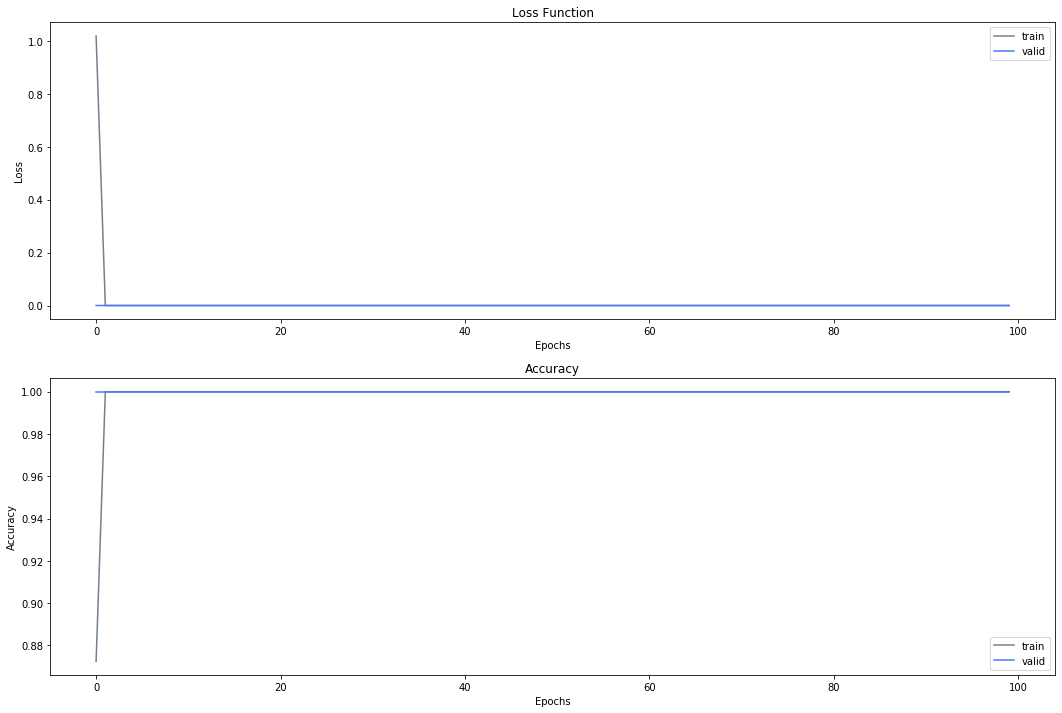

In [127]:
history_plot(history, 0)

In [128]:


model.load_weights('example.hdf5')

score = model.evaluate(x_test, y_test)

score


501/501 [==============================] - 0s 182us/step


[0.0, 1.0, 1.0]

In [ ]:
symbols = ['а','б','в','г','д',
           'е','ё','ж','з','и',
           'й','к','л','м','н',
           'о','ө','п','р','с',
           'т','у','ү','ф','х',
           'ц','ч','ш','щ','ъ',
           'ы','ь','э','ю','я']


In [ ]:
y_test_predict = model.predict_classes(x_test)

In [ ]:
fig = plt.figure(figsize=(14, 14))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4,4,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = y_test_predict[idx]
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(symbols[pred_idx], symbols[true_idx]),
                color=("#4879ff" if pred_idx == true_idx else "darkred"))

